In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [2]:
data_train = pd.read_csv("/Users/Harshitha/Downloads/santander-customer-transaction-prediction/train.csv")
data_test = pd.read_csv("/Users/Harshitha/Downloads/santander-customer-transaction-prediction/test.csv")
data_train.shape

(200000, 202)

In [3]:
data_train.shape

(200000, 202)

In [4]:
data_train.isnull().sum().sum()

0

In [5]:
X_train = data_train.drop(columns=['ID_code','target'])
y_train= data_train['target']
print(X_train.shape,y_train.shape)

(200000, 200) (200000,)


In [6]:
X_test = data_test.drop(columns=['ID_code'])
print(X_test.shape)

(200000, 200)


In [7]:
X_train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [8]:
idx = features = X_train.columns.values
for df in [X_test, X_train]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

In [9]:
X_train.shape

(200000, 208)

In [10]:
X_test.shape

(200000, 208)

In [11]:
features =  X_train.columns.values
print(len(features))

208


In [13]:
#
parameters={'max_depth':2, 
            'objective':'binary:logistic',
            'eval_metric':'auc',
            'learning_rate':.04,
            'silent' : 1,
            'reg_alpha' :10,
            'reg_lambda':10
           }

#88.8 boost round 600 no erly stopping
parameters88={'max_depth':5, 
            'objective':'binary:logistic',
            'eval_metric':'auc',
            'learning_rate':.05,
            'silent' : 1,
            'reg_alpha' :10,
            'reg_lambda':10
           }
# 87%
parameters87={'max_depth':7, 
            'eta':1, 
            'silent':1,
            'objective':'binary:logistic',
            'eval_metric':'auc',
            'learning_rate':.05,
            'silent' : 1
           }

In [14]:
import xgboost as xgb 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
folds_xg = StratifiedKFold(n_splits=10, shuffle=False, random_state=44000)
predictions_xg = np.zeros(len(X_test))
oof_xg = np.zeros(len(X_train))

for fold_, (trn_idx, val_idx) in enumerate(folds_xg.split(X_train.values, y_train.values)):
    print("Fold {}".format(fold_))
    trn_data =  xgb.DMatrix(X_train.iloc[trn_idx], label=y_train.iloc[trn_idx])
    val_data =  xgb.DMatrix(X_train.iloc[val_idx], label=y_train.iloc[val_idx])
    watchlist = [(trn_data, 'train'), (val_data, 'valid')]
    model = xgb.train(parameters, trn_data,num_boost_round =6000, early_stopping_rounds=600,maximize=False,evals=watchlist)
    oof_xg[val_idx] = model.predict(val_data)
    predictions_xg += model.predict(xgb.DMatrix(X_test))/folds_xg.n_splits
    

Fold 0


/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.570625	valid-auc:0.57268
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 600 rounds.
[1]	train-auc:0.607241	valid-auc:0.601283
[2]	train-auc:0.612754	valid-auc:0.607004
[3]	train-auc:0.612769	valid-auc:0.607768
[4]	train-auc:0.614396	valid-auc:0.608432
[5]	train-auc:0.617686	valid-auc:0.609886
[6]	train-auc:0.620071	valid-auc:0.611049
[7]	train-auc:0.628996	valid-auc:0.620068
[8]	train-auc:0.628556	valid-auc:0.619108
[9]	train-auc:0.637203	valid-auc:0.625385
[10]	train-auc:0.64357	valid-auc:0.632819
[11]	train-auc:0.650715	valid-auc:0.641266
[12]	train-auc:0.652751	valid-auc:0.643076
[13]	train-auc:0.652164	valid-auc:0.643251
[14]	train-auc:0.653552	valid-auc:0.643772
[15]	train-auc:0.654183	valid-auc:0.644946
[16]	train-auc:0.655692	valid-auc:0.646426
[17]	train-auc:0.657289	valid-auc:0.648108
[18]	train-auc:0.656335	valid-auc:0.646957
[19]	train-auc:0.665133	valid-auc:0.654835
[20]	tra

[187]	train-auc:0.814064	valid-auc:0.7966
[188]	train-auc:0.814336	valid-auc:0.796861
[189]	train-auc:0.814599	valid-auc:0.797145
[190]	train-auc:0.814939	valid-auc:0.797411
[191]	train-auc:0.815299	valid-auc:0.797765
[192]	train-auc:0.815217	valid-auc:0.79764
[193]	train-auc:0.815448	valid-auc:0.797961
[194]	train-auc:0.81564	valid-auc:0.798286
[195]	train-auc:0.815676	valid-auc:0.798508
[196]	train-auc:0.815491	valid-auc:0.798275
[197]	train-auc:0.816101	valid-auc:0.79861
[198]	train-auc:0.816506	valid-auc:0.798867
[199]	train-auc:0.816923	valid-auc:0.79915
[200]	train-auc:0.817564	valid-auc:0.799673
[201]	train-auc:0.818079	valid-auc:0.800039
[202]	train-auc:0.818459	valid-auc:0.800404
[203]	train-auc:0.818857	valid-auc:0.800555
[204]	train-auc:0.819252	valid-auc:0.800872
[205]	train-auc:0.819461	valid-auc:0.801208
[206]	train-auc:0.819787	valid-auc:0.801415
[207]	train-auc:0.82042	valid-auc:0.802061
[208]	train-auc:0.820944	valid-auc:0.80254
[209]	train-auc:0.821619	valid-auc:0.803

[375]	train-auc:0.854119	valid-auc:0.832821
[376]	train-auc:0.854399	valid-auc:0.833024
[377]	train-auc:0.85454	valid-auc:0.83314
[378]	train-auc:0.854617	valid-auc:0.833198
[379]	train-auc:0.854688	valid-auc:0.833367
[380]	train-auc:0.854905	valid-auc:0.833565
[381]	train-auc:0.85486	valid-auc:0.83356
[382]	train-auc:0.855027	valid-auc:0.833581
[383]	train-auc:0.85521	valid-auc:0.833798
[384]	train-auc:0.855305	valid-auc:0.833844
[385]	train-auc:0.85526	valid-auc:0.833848
[386]	train-auc:0.855374	valid-auc:0.833933
[387]	train-auc:0.855402	valid-auc:0.834025
[388]	train-auc:0.855612	valid-auc:0.834193
[389]	train-auc:0.855718	valid-auc:0.834297
[390]	train-auc:0.855887	valid-auc:0.834423
[391]	train-auc:0.855979	valid-auc:0.834506
[392]	train-auc:0.856093	valid-auc:0.834572
[393]	train-auc:0.856117	valid-auc:0.834609
[394]	train-auc:0.856354	valid-auc:0.834845
[395]	train-auc:0.856469	valid-auc:0.834974
[396]	train-auc:0.85666	valid-auc:0.835235
[397]	train-auc:0.856736	valid-auc:0.83

[563]	train-auc:0.873164	valid-auc:0.849608
[564]	train-auc:0.873267	valid-auc:0.849732
[565]	train-auc:0.873404	valid-auc:0.849851
[566]	train-auc:0.873536	valid-auc:0.849954
[567]	train-auc:0.873586	valid-auc:0.849951
[568]	train-auc:0.873713	valid-auc:0.850026
[569]	train-auc:0.873825	valid-auc:0.85012
[570]	train-auc:0.873857	valid-auc:0.850128
[571]	train-auc:0.873859	valid-auc:0.850135
[572]	train-auc:0.87392	valid-auc:0.850171
[573]	train-auc:0.873995	valid-auc:0.850264
[574]	train-auc:0.874051	valid-auc:0.850321
[575]	train-auc:0.874126	valid-auc:0.850376
[576]	train-auc:0.874235	valid-auc:0.850489
[577]	train-auc:0.874321	valid-auc:0.850579
[578]	train-auc:0.874365	valid-auc:0.850684
[579]	train-auc:0.874455	valid-auc:0.850815
[580]	train-auc:0.87454	valid-auc:0.850942
[581]	train-auc:0.874682	valid-auc:0.851075
[582]	train-auc:0.874781	valid-auc:0.851116
[583]	train-auc:0.874803	valid-auc:0.851124
[584]	train-auc:0.874846	valid-auc:0.851156
[585]	train-auc:0.874891	valid-auc:

[751]	train-auc:0.885121	valid-auc:0.859896
[752]	train-auc:0.88519	valid-auc:0.859996
[753]	train-auc:0.885275	valid-auc:0.860011
[754]	train-auc:0.885313	valid-auc:0.860048
[755]	train-auc:0.885354	valid-auc:0.860119
[756]	train-auc:0.885442	valid-auc:0.860162
[757]	train-auc:0.885489	valid-auc:0.860177
[758]	train-auc:0.885598	valid-auc:0.860288
[759]	train-auc:0.885653	valid-auc:0.860317
[760]	train-auc:0.885682	valid-auc:0.860321
[761]	train-auc:0.885736	valid-auc:0.860359
[762]	train-auc:0.885764	valid-auc:0.860392
[763]	train-auc:0.885842	valid-auc:0.860448
[764]	train-auc:0.885893	valid-auc:0.860476
[765]	train-auc:0.885894	valid-auc:0.860467
[766]	train-auc:0.885899	valid-auc:0.860446
[767]	train-auc:0.885928	valid-auc:0.860458
[768]	train-auc:0.885961	valid-auc:0.86051
[769]	train-auc:0.886014	valid-auc:0.860486
[770]	train-auc:0.886028	valid-auc:0.860482
[771]	train-auc:0.88611	valid-auc:0.860571
[772]	train-auc:0.886178	valid-auc:0.860601
[773]	train-auc:0.886263	valid-auc:

[939]	train-auc:0.893575	valid-auc:0.867133
[940]	train-auc:0.893599	valid-auc:0.867147
[941]	train-auc:0.893657	valid-auc:0.867183
[942]	train-auc:0.89365	valid-auc:0.867172
[943]	train-auc:0.893628	valid-auc:0.867131
[944]	train-auc:0.893671	valid-auc:0.867162
[945]	train-auc:0.89372	valid-auc:0.86723
[946]	train-auc:0.893798	valid-auc:0.867298
[947]	train-auc:0.893814	valid-auc:0.867333
[948]	train-auc:0.893854	valid-auc:0.867328
[949]	train-auc:0.893872	valid-auc:0.867377
[950]	train-auc:0.893906	valid-auc:0.867412
[951]	train-auc:0.89396	valid-auc:0.867477
[952]	train-auc:0.894011	valid-auc:0.86753
[953]	train-auc:0.893996	valid-auc:0.867469
[954]	train-auc:0.89401	valid-auc:0.867465
[955]	train-auc:0.894059	valid-auc:0.867533
[956]	train-auc:0.894078	valid-auc:0.86757
[957]	train-auc:0.894135	valid-auc:0.867617
[958]	train-auc:0.894184	valid-auc:0.86768
[959]	train-auc:0.894245	valid-auc:0.867754
[960]	train-auc:0.894281	valid-auc:0.86777
[961]	train-auc:0.894339	valid-auc:0.8678

[1124]	train-auc:0.899279	valid-auc:0.872178
[1125]	train-auc:0.899284	valid-auc:0.872179
[1126]	train-auc:0.899331	valid-auc:0.872196
[1127]	train-auc:0.899379	valid-auc:0.872263
[1128]	train-auc:0.899367	valid-auc:0.872266
[1129]	train-auc:0.899395	valid-auc:0.872312
[1130]	train-auc:0.899408	valid-auc:0.87232
[1131]	train-auc:0.899407	valid-auc:0.872334
[1132]	train-auc:0.899433	valid-auc:0.872348
[1133]	train-auc:0.899446	valid-auc:0.872336
[1134]	train-auc:0.899465	valid-auc:0.872318
[1135]	train-auc:0.899477	valid-auc:0.872317
[1136]	train-auc:0.899539	valid-auc:0.872353
[1137]	train-auc:0.899576	valid-auc:0.872406
[1138]	train-auc:0.899607	valid-auc:0.872439
[1139]	train-auc:0.899656	valid-auc:0.872476
[1140]	train-auc:0.89969	valid-auc:0.872519
[1141]	train-auc:0.899736	valid-auc:0.872561
[1142]	train-auc:0.899771	valid-auc:0.872587
[1143]	train-auc:0.899786	valid-auc:0.872612
[1144]	train-auc:0.899808	valid-auc:0.872633
[1145]	train-auc:0.899835	valid-auc:0.872676
[1146]	train

[1307]	train-auc:0.903705	valid-auc:0.875973
[1308]	train-auc:0.903719	valid-auc:0.875955
[1309]	train-auc:0.903745	valid-auc:0.87597
[1310]	train-auc:0.903756	valid-auc:0.875952
[1311]	train-auc:0.903785	valid-auc:0.876001
[1312]	train-auc:0.903794	valid-auc:0.876032
[1313]	train-auc:0.903828	valid-auc:0.876049
[1314]	train-auc:0.903864	valid-auc:0.876076
[1315]	train-auc:0.903883	valid-auc:0.876054
[1316]	train-auc:0.903907	valid-auc:0.876063
[1317]	train-auc:0.903926	valid-auc:0.87605
[1318]	train-auc:0.903971	valid-auc:0.876092
[1319]	train-auc:0.903957	valid-auc:0.876082
[1320]	train-auc:0.903979	valid-auc:0.876106
[1321]	train-auc:0.903992	valid-auc:0.876127
[1322]	train-auc:0.904038	valid-auc:0.87615
[1323]	train-auc:0.904066	valid-auc:0.876178
[1324]	train-auc:0.904083	valid-auc:0.876212
[1325]	train-auc:0.904091	valid-auc:0.876232
[1326]	train-auc:0.904106	valid-auc:0.87628
[1327]	train-auc:0.904123	valid-auc:0.876306
[1328]	train-auc:0.904146	valid-auc:0.876326
[1329]	train-a

[1491]	train-auc:0.907447	valid-auc:0.87911
[1492]	train-auc:0.907453	valid-auc:0.879103
[1493]	train-auc:0.907479	valid-auc:0.8791
[1494]	train-auc:0.907459	valid-auc:0.879069
[1495]	train-auc:0.907477	valid-auc:0.87911
[1496]	train-auc:0.907498	valid-auc:0.879153
[1497]	train-auc:0.907518	valid-auc:0.879159
[1498]	train-auc:0.907528	valid-auc:0.879149
[1499]	train-auc:0.907543	valid-auc:0.879157
[1500]	train-auc:0.907561	valid-auc:0.879171
[1501]	train-auc:0.907556	valid-auc:0.879162
[1502]	train-auc:0.907568	valid-auc:0.879224
[1503]	train-auc:0.907587	valid-auc:0.879212
[1504]	train-auc:0.907603	valid-auc:0.879264
[1505]	train-auc:0.907625	valid-auc:0.879252
[1506]	train-auc:0.907652	valid-auc:0.87929
[1507]	train-auc:0.907674	valid-auc:0.879315
[1508]	train-auc:0.907709	valid-auc:0.879334
[1509]	train-auc:0.907707	valid-auc:0.879338
[1510]	train-auc:0.907713	valid-auc:0.879366
[1511]	train-auc:0.907749	valid-auc:0.879392
[1512]	train-auc:0.907776	valid-auc:0.879435
[1513]	train-au

[1674]	train-auc:0.910389	valid-auc:0.881504
[1675]	train-auc:0.910388	valid-auc:0.881476
[1676]	train-auc:0.910402	valid-auc:0.881468
[1677]	train-auc:0.910415	valid-auc:0.881474
[1678]	train-auc:0.910417	valid-auc:0.881477
[1679]	train-auc:0.910441	valid-auc:0.881506
[1680]	train-auc:0.910435	valid-auc:0.881513
[1681]	train-auc:0.910456	valid-auc:0.881525
[1682]	train-auc:0.910471	valid-auc:0.88152
[1683]	train-auc:0.910475	valid-auc:0.881553
[1684]	train-auc:0.9105	valid-auc:0.881581
[1685]	train-auc:0.91052	valid-auc:0.881594
[1686]	train-auc:0.910511	valid-auc:0.881606
[1687]	train-auc:0.910522	valid-auc:0.88162
[1688]	train-auc:0.910535	valid-auc:0.881624
[1689]	train-auc:0.91056	valid-auc:0.881663
[1690]	train-auc:0.910572	valid-auc:0.881663
[1691]	train-auc:0.910604	valid-auc:0.881675
[1692]	train-auc:0.910613	valid-auc:0.881682
[1693]	train-auc:0.910618	valid-auc:0.881682
[1694]	train-auc:0.910633	valid-auc:0.881704
[1695]	train-auc:0.910648	valid-auc:0.881718
[1696]	train-auc

[1858]	train-auc:0.912842	valid-auc:0.88341
[1859]	train-auc:0.912859	valid-auc:0.883404
[1860]	train-auc:0.912853	valid-auc:0.883413
[1861]	train-auc:0.912868	valid-auc:0.883407
[1862]	train-auc:0.912881	valid-auc:0.883433
[1863]	train-auc:0.912891	valid-auc:0.883444
[1864]	train-auc:0.912903	valid-auc:0.883449
[1865]	train-auc:0.91292	valid-auc:0.883469
[1866]	train-auc:0.912936	valid-auc:0.883475
[1867]	train-auc:0.912957	valid-auc:0.883475
[1868]	train-auc:0.91297	valid-auc:0.883505
[1869]	train-auc:0.912982	valid-auc:0.883514
[1870]	train-auc:0.913	valid-auc:0.883527
[1871]	train-auc:0.913006	valid-auc:0.883517
[1872]	train-auc:0.913022	valid-auc:0.883528
[1873]	train-auc:0.913045	valid-auc:0.883539
[1874]	train-auc:0.913059	valid-auc:0.88355
[1875]	train-auc:0.913071	valid-auc:0.883567
[1876]	train-auc:0.913081	valid-auc:0.883569
[1877]	train-auc:0.913095	valid-auc:0.883584
[1878]	train-auc:0.913114	valid-auc:0.883604
[1879]	train-auc:0.913124	valid-auc:0.8836
[1880]	train-auc:0.

[2041]	train-auc:0.91497	valid-auc:0.885066
[2042]	train-auc:0.914987	valid-auc:0.885087
[2043]	train-auc:0.915	valid-auc:0.885083
[2044]	train-auc:0.915019	valid-auc:0.885112
[2045]	train-auc:0.915036	valid-auc:0.885135
[2046]	train-auc:0.915045	valid-auc:0.88514
[2047]	train-auc:0.915055	valid-auc:0.885147
[2048]	train-auc:0.915058	valid-auc:0.885149
[2049]	train-auc:0.915072	valid-auc:0.885156
[2050]	train-auc:0.915077	valid-auc:0.885145
[2051]	train-auc:0.915085	valid-auc:0.885149
[2052]	train-auc:0.915092	valid-auc:0.88514
[2053]	train-auc:0.915106	valid-auc:0.885174
[2054]	train-auc:0.915119	valid-auc:0.885176
[2055]	train-auc:0.915128	valid-auc:0.885192
[2056]	train-auc:0.915139	valid-auc:0.885166
[2057]	train-auc:0.915134	valid-auc:0.885164
[2058]	train-auc:0.915147	valid-auc:0.885184
[2059]	train-auc:0.915159	valid-auc:0.885186
[2060]	train-auc:0.915187	valid-auc:0.885211
[2061]	train-auc:0.915207	valid-auc:0.885216
[2062]	train-auc:0.915218	valid-auc:0.885241
[2063]	train-auc

[2225]	train-auc:0.916813	valid-auc:0.886533
[2226]	train-auc:0.916828	valid-auc:0.886533
[2227]	train-auc:0.916843	valid-auc:0.886562
[2228]	train-auc:0.916852	valid-auc:0.886564
[2229]	train-auc:0.916862	valid-auc:0.886575
[2230]	train-auc:0.916873	valid-auc:0.886589
[2231]	train-auc:0.916884	valid-auc:0.886577
[2232]	train-auc:0.916894	valid-auc:0.886587
[2233]	train-auc:0.916896	valid-auc:0.886582
[2234]	train-auc:0.916908	valid-auc:0.886597
[2235]	train-auc:0.916913	valid-auc:0.88661
[2236]	train-auc:0.916931	valid-auc:0.886627
[2237]	train-auc:0.916934	valid-auc:0.88662
[2238]	train-auc:0.916948	valid-auc:0.886634
[2239]	train-auc:0.916945	valid-auc:0.886627
[2240]	train-auc:0.916963	valid-auc:0.886653
[2241]	train-auc:0.916982	valid-auc:0.886674
[2242]	train-auc:0.916996	valid-auc:0.886701
[2243]	train-auc:0.917009	valid-auc:0.886726
[2244]	train-auc:0.917005	valid-auc:0.886716
[2245]	train-auc:0.917018	valid-auc:0.886724
[2246]	train-auc:0.917028	valid-auc:0.886725
[2247]	train

[2408]	train-auc:0.918497	valid-auc:0.887752
[2409]	train-auc:0.9185	valid-auc:0.887747
[2410]	train-auc:0.9185	valid-auc:0.887765
[2411]	train-auc:0.918512	valid-auc:0.887774
[2412]	train-auc:0.918521	valid-auc:0.88777
[2413]	train-auc:0.918533	valid-auc:0.887799
[2414]	train-auc:0.918549	valid-auc:0.887805
[2415]	train-auc:0.918556	valid-auc:0.887821
[2416]	train-auc:0.918557	valid-auc:0.887831
[2417]	train-auc:0.918563	valid-auc:0.887841
[2418]	train-auc:0.918581	valid-auc:0.887851
[2419]	train-auc:0.918591	valid-auc:0.887856
[2420]	train-auc:0.918592	valid-auc:0.887856
[2421]	train-auc:0.918592	valid-auc:0.887872
[2422]	train-auc:0.918608	valid-auc:0.88788
[2423]	train-auc:0.918614	valid-auc:0.887891
[2424]	train-auc:0.91862	valid-auc:0.887903
[2425]	train-auc:0.918625	valid-auc:0.887912
[2426]	train-auc:0.918628	valid-auc:0.887913
[2427]	train-auc:0.918627	valid-auc:0.887906
[2428]	train-auc:0.918629	valid-auc:0.887915
[2429]	train-auc:0.918631	valid-auc:0.887913
[2430]	train-auc:

[2592]	train-auc:0.919869	valid-auc:0.888903
[2593]	train-auc:0.919875	valid-auc:0.888903
[2594]	train-auc:0.919882	valid-auc:0.888902
[2595]	train-auc:0.919892	valid-auc:0.888905
[2596]	train-auc:0.919902	valid-auc:0.888908
[2597]	train-auc:0.919907	valid-auc:0.888909
[2598]	train-auc:0.919923	valid-auc:0.888923
[2599]	train-auc:0.919921	valid-auc:0.888931
[2600]	train-auc:0.919928	valid-auc:0.888923
[2601]	train-auc:0.919939	valid-auc:0.888926
[2602]	train-auc:0.919945	valid-auc:0.88893
[2603]	train-auc:0.919953	valid-auc:0.888936
[2604]	train-auc:0.91997	valid-auc:0.888948
[2605]	train-auc:0.919975	valid-auc:0.888963
[2606]	train-auc:0.919985	valid-auc:0.888979
[2607]	train-auc:0.919988	valid-auc:0.888976
[2608]	train-auc:0.920001	valid-auc:0.888991
[2609]	train-auc:0.920002	valid-auc:0.888997
[2610]	train-auc:0.92	valid-auc:0.88902
[2611]	train-auc:0.920003	valid-auc:0.889033
[2612]	train-auc:0.920008	valid-auc:0.889027
[2613]	train-auc:0.920008	valid-auc:0.889025
[2614]	train-auc:

[2776]	train-auc:0.92117	valid-auc:0.889853
[2777]	train-auc:0.921173	valid-auc:0.889864
[2778]	train-auc:0.921175	valid-auc:0.889853
[2779]	train-auc:0.92118	valid-auc:0.889872
[2780]	train-auc:0.921183	valid-auc:0.889878
[2781]	train-auc:0.92119	valid-auc:0.889879
[2782]	train-auc:0.921195	valid-auc:0.889874
[2783]	train-auc:0.921211	valid-auc:0.889898
[2784]	train-auc:0.921212	valid-auc:0.889895
[2785]	train-auc:0.921212	valid-auc:0.889898
[2786]	train-auc:0.921219	valid-auc:0.88991
[2787]	train-auc:0.92122	valid-auc:0.889915
[2788]	train-auc:0.921216	valid-auc:0.889908
[2789]	train-auc:0.921222	valid-auc:0.889925
[2790]	train-auc:0.921231	valid-auc:0.889938
[2791]	train-auc:0.921237	valid-auc:0.889932
[2792]	train-auc:0.921241	valid-auc:0.889926
[2793]	train-auc:0.921245	valid-auc:0.889926
[2794]	train-auc:0.921247	valid-auc:0.889918
[2795]	train-auc:0.921257	valid-auc:0.88992
[2796]	train-auc:0.921259	valid-auc:0.88993
[2797]	train-auc:0.921268	valid-auc:0.889942
[2798]	train-auc:

[2959]	train-auc:0.922323	valid-auc:0.890801
[2960]	train-auc:0.922336	valid-auc:0.890798
[2961]	train-auc:0.92234	valid-auc:0.890799
[2962]	train-auc:0.922348	valid-auc:0.890802
[2963]	train-auc:0.922354	valid-auc:0.890817
[2964]	train-auc:0.92236	valid-auc:0.890822
[2965]	train-auc:0.922369	valid-auc:0.89083
[2966]	train-auc:0.922376	valid-auc:0.890832
[2967]	train-auc:0.922382	valid-auc:0.890838
[2968]	train-auc:0.922386	valid-auc:0.890844
[2969]	train-auc:0.922394	valid-auc:0.890841
[2970]	train-auc:0.922394	valid-auc:0.890839
[2971]	train-auc:0.922403	valid-auc:0.890841
[2972]	train-auc:0.922419	valid-auc:0.89087
[2973]	train-auc:0.922427	valid-auc:0.890873
[2974]	train-auc:0.922425	valid-auc:0.890872
[2975]	train-auc:0.922433	valid-auc:0.890873
[2976]	train-auc:0.922433	valid-auc:0.890881
[2977]	train-auc:0.922438	valid-auc:0.890873
[2978]	train-auc:0.922448	valid-auc:0.890879
[2979]	train-auc:0.922455	valid-auc:0.890884
[2980]	train-auc:0.922457	valid-auc:0.89089
[2981]	train-au

[3142]	train-auc:0.923335	valid-auc:0.891443
[3143]	train-auc:0.923342	valid-auc:0.89144
[3144]	train-auc:0.923348	valid-auc:0.891437
[3145]	train-auc:0.923346	valid-auc:0.891431
[3146]	train-auc:0.923359	valid-auc:0.89146
[3147]	train-auc:0.923367	valid-auc:0.89146
[3148]	train-auc:0.923373	valid-auc:0.891456
[3149]	train-auc:0.923376	valid-auc:0.891471
[3150]	train-auc:0.92337	valid-auc:0.891463
[3151]	train-auc:0.923381	valid-auc:0.891468
[3152]	train-auc:0.923393	valid-auc:0.89146
[3153]	train-auc:0.9234	valid-auc:0.891454
[3154]	train-auc:0.923408	valid-auc:0.89146
[3155]	train-auc:0.923418	valid-auc:0.891465
[3156]	train-auc:0.923425	valid-auc:0.891464
[3157]	train-auc:0.92343	valid-auc:0.891477
[3158]	train-auc:0.923432	valid-auc:0.891481
[3159]	train-auc:0.92344	valid-auc:0.891474
[3160]	train-auc:0.923444	valid-auc:0.89147
[3161]	train-auc:0.923454	valid-auc:0.891479
[3162]	train-auc:0.923461	valid-auc:0.891487
[3163]	train-auc:0.923464	valid-auc:0.891501
[3164]	train-auc:0.92

[3326]	train-auc:0.92428	valid-auc:0.892074
[3327]	train-auc:0.924289	valid-auc:0.892096
[3328]	train-auc:0.924294	valid-auc:0.892095
[3329]	train-auc:0.924297	valid-auc:0.89209
[3330]	train-auc:0.924306	valid-auc:0.892106
[3331]	train-auc:0.924313	valid-auc:0.89211
[3332]	train-auc:0.924313	valid-auc:0.892108
[3333]	train-auc:0.924318	valid-auc:0.892109
[3334]	train-auc:0.924318	valid-auc:0.892112
[3335]	train-auc:0.924325	valid-auc:0.892123
[3336]	train-auc:0.924329	valid-auc:0.892118
[3337]	train-auc:0.924332	valid-auc:0.892114
[3338]	train-auc:0.92433	valid-auc:0.8921
[3339]	train-auc:0.924336	valid-auc:0.892107
[3340]	train-auc:0.92434	valid-auc:0.892101
[3341]	train-auc:0.924343	valid-auc:0.892104
[3342]	train-auc:0.924348	valid-auc:0.892107
[3343]	train-auc:0.924354	valid-auc:0.892109
[3344]	train-auc:0.924359	valid-auc:0.892115
[3345]	train-auc:0.924368	valid-auc:0.892104
[3346]	train-auc:0.924372	valid-auc:0.892097
[3347]	train-auc:0.924383	valid-auc:0.892102
[3348]	train-auc:

[3510]	train-auc:0.925138	valid-auc:0.892629
[3511]	train-auc:0.92514	valid-auc:0.892629
[3512]	train-auc:0.925145	valid-auc:0.892637
[3513]	train-auc:0.925151	valid-auc:0.892629
[3514]	train-auc:0.925159	valid-auc:0.892615
[3515]	train-auc:0.925165	valid-auc:0.892617
[3516]	train-auc:0.92517	valid-auc:0.892619
[3517]	train-auc:0.925171	valid-auc:0.892622
[3518]	train-auc:0.925177	valid-auc:0.89263
[3519]	train-auc:0.92518	valid-auc:0.892639
[3520]	train-auc:0.925179	valid-auc:0.892643
[3521]	train-auc:0.925183	valid-auc:0.892646
[3522]	train-auc:0.925184	valid-auc:0.892649
[3523]	train-auc:0.925189	valid-auc:0.892661
[3524]	train-auc:0.925194	valid-auc:0.892681
[3525]	train-auc:0.925196	valid-auc:0.892674
[3526]	train-auc:0.925197	valid-auc:0.892683
[3527]	train-auc:0.925202	valid-auc:0.892692
[3528]	train-auc:0.925204	valid-auc:0.892703
[3529]	train-auc:0.925211	valid-auc:0.892704
[3530]	train-auc:0.925214	valid-auc:0.892704
[3531]	train-auc:0.92522	valid-auc:0.892703
[3532]	train-au

[3693]	train-auc:0.925962	valid-auc:0.893106
[3694]	train-auc:0.925966	valid-auc:0.893109
[3695]	train-auc:0.925969	valid-auc:0.893118
[3696]	train-auc:0.925969	valid-auc:0.893122
[3697]	train-auc:0.925972	valid-auc:0.893128
[3698]	train-auc:0.925977	valid-auc:0.893136
[3699]	train-auc:0.92598	valid-auc:0.89314
[3700]	train-auc:0.925982	valid-auc:0.893147
[3701]	train-auc:0.925984	valid-auc:0.893155
[3702]	train-auc:0.925991	valid-auc:0.89316
[3703]	train-auc:0.925994	valid-auc:0.893161
[3704]	train-auc:0.926001	valid-auc:0.893165
[3705]	train-auc:0.926006	valid-auc:0.893176
[3706]	train-auc:0.926012	valid-auc:0.893174
[3707]	train-auc:0.926014	valid-auc:0.893164
[3708]	train-auc:0.926016	valid-auc:0.893167
[3709]	train-auc:0.92602	valid-auc:0.893156
[3710]	train-auc:0.926021	valid-auc:0.893155
[3711]	train-auc:0.926028	valid-auc:0.89317
[3712]	train-auc:0.926032	valid-auc:0.893163
[3713]	train-auc:0.926035	valid-auc:0.893158
[3714]	train-auc:0.926042	valid-auc:0.893165
[3715]	train-au

[3877]	train-auc:0.926672	valid-auc:0.89359
[3878]	train-auc:0.926681	valid-auc:0.893595
[3879]	train-auc:0.926684	valid-auc:0.893593
[3880]	train-auc:0.926685	valid-auc:0.893596
[3881]	train-auc:0.926689	valid-auc:0.893605
[3882]	train-auc:0.926689	valid-auc:0.893609
[3883]	train-auc:0.926689	valid-auc:0.893603
[3884]	train-auc:0.926691	valid-auc:0.893609
[3885]	train-auc:0.926694	valid-auc:0.893611
[3886]	train-auc:0.926695	valid-auc:0.893604
[3887]	train-auc:0.926694	valid-auc:0.893616
[3888]	train-auc:0.926697	valid-auc:0.893622
[3889]	train-auc:0.926703	valid-auc:0.893621
[3890]	train-auc:0.926709	valid-auc:0.893629
[3891]	train-auc:0.926711	valid-auc:0.893631
[3892]	train-auc:0.926719	valid-auc:0.893634
[3893]	train-auc:0.926723	valid-auc:0.893642
[3894]	train-auc:0.926726	valid-auc:0.893648
[3895]	train-auc:0.926733	valid-auc:0.893653
[3896]	train-auc:0.926738	valid-auc:0.893648
[3897]	train-auc:0.926743	valid-auc:0.89364
[3898]	train-auc:0.926744	valid-auc:0.893638
[3899]	train

[4061]	train-auc:0.927412	valid-auc:0.893963
[4062]	train-auc:0.927416	valid-auc:0.893969
[4063]	train-auc:0.927418	valid-auc:0.893973
[4064]	train-auc:0.92742	valid-auc:0.893964
[4065]	train-auc:0.927421	valid-auc:0.893964
[4066]	train-auc:0.927426	valid-auc:0.89396
[4067]	train-auc:0.927426	valid-auc:0.893973
[4068]	train-auc:0.927429	valid-auc:0.893968
[4069]	train-auc:0.927435	valid-auc:0.893963
[4070]	train-auc:0.927436	valid-auc:0.893962
[4071]	train-auc:0.927438	valid-auc:0.893967
[4072]	train-auc:0.927443	valid-auc:0.893969
[4073]	train-auc:0.927448	valid-auc:0.893975
[4074]	train-auc:0.927451	valid-auc:0.893977
[4075]	train-auc:0.927457	valid-auc:0.893974
[4076]	train-auc:0.927463	valid-auc:0.893976
[4077]	train-auc:0.927466	valid-auc:0.893985
[4078]	train-auc:0.927474	valid-auc:0.893983
[4079]	train-auc:0.927476	valid-auc:0.893979
[4080]	train-auc:0.927479	valid-auc:0.893976
[4081]	train-auc:0.927481	valid-auc:0.89398
[4082]	train-auc:0.927483	valid-auc:0.893982
[4083]	train-

[4244]	train-auc:0.928043	valid-auc:0.894251
[4245]	train-auc:0.928045	valid-auc:0.894259
[4246]	train-auc:0.928046	valid-auc:0.894271
[4247]	train-auc:0.928051	valid-auc:0.894281
[4248]	train-auc:0.928051	valid-auc:0.894274
[4249]	train-auc:0.928055	valid-auc:0.894281
[4250]	train-auc:0.928058	valid-auc:0.894286
[4251]	train-auc:0.928061	valid-auc:0.894295
[4252]	train-auc:0.928063	valid-auc:0.894293
[4253]	train-auc:0.928067	valid-auc:0.894284
[4254]	train-auc:0.928068	valid-auc:0.894274
[4255]	train-auc:0.928075	valid-auc:0.894269
[4256]	train-auc:0.928078	valid-auc:0.894274
[4257]	train-auc:0.928085	valid-auc:0.89427
[4258]	train-auc:0.928087	valid-auc:0.894272
[4259]	train-auc:0.928089	valid-auc:0.894274
[4260]	train-auc:0.928094	valid-auc:0.894279
[4261]	train-auc:0.928095	valid-auc:0.894275
[4262]	train-auc:0.9281	valid-auc:0.894276
[4263]	train-auc:0.928102	valid-auc:0.894283
[4264]	train-auc:0.928105	valid-auc:0.894276
[4265]	train-auc:0.928107	valid-auc:0.894279
[4266]	train-

[4427]	train-auc:0.928668	valid-auc:0.894449
[4428]	train-auc:0.928672	valid-auc:0.894448
[4429]	train-auc:0.928676	valid-auc:0.894451
[4430]	train-auc:0.928679	valid-auc:0.894455
[4431]	train-auc:0.92868	valid-auc:0.894461
[4432]	train-auc:0.928684	valid-auc:0.894461
[4433]	train-auc:0.928684	valid-auc:0.894463
[4434]	train-auc:0.928684	valid-auc:0.894472
[4435]	train-auc:0.928688	valid-auc:0.894474
[4436]	train-auc:0.928694	valid-auc:0.894477
[4437]	train-auc:0.928698	valid-auc:0.894482
[4438]	train-auc:0.928698	valid-auc:0.89448
[4439]	train-auc:0.9287	valid-auc:0.894474
[4440]	train-auc:0.928703	valid-auc:0.894473
[4441]	train-auc:0.928709	valid-auc:0.894476
[4442]	train-auc:0.928711	valid-auc:0.894471
[4443]	train-auc:0.928715	valid-auc:0.894483
[4444]	train-auc:0.928718	valid-auc:0.894489
[4445]	train-auc:0.928722	valid-auc:0.894495
[4446]	train-auc:0.92873	valid-auc:0.894498
[4447]	train-auc:0.928733	valid-auc:0.894506
[4448]	train-auc:0.928731	valid-auc:0.894501
[4449]	train-au

[4610]	train-auc:0.929217	valid-auc:0.89474
[4611]	train-auc:0.929221	valid-auc:0.894749
[4612]	train-auc:0.929225	valid-auc:0.894747
[4613]	train-auc:0.92923	valid-auc:0.894764
[4614]	train-auc:0.929233	valid-auc:0.894763
[4615]	train-auc:0.92924	valid-auc:0.894769
[4616]	train-auc:0.929245	valid-auc:0.894773
[4617]	train-auc:0.929249	valid-auc:0.894768
[4618]	train-auc:0.929251	valid-auc:0.894771
[4619]	train-auc:0.929256	valid-auc:0.894773
[4620]	train-auc:0.929263	valid-auc:0.894783
[4621]	train-auc:0.929265	valid-auc:0.894782
[4622]	train-auc:0.92927	valid-auc:0.894779
[4623]	train-auc:0.92927	valid-auc:0.894784
[4624]	train-auc:0.929274	valid-auc:0.89478
[4625]	train-auc:0.929277	valid-auc:0.894777
[4626]	train-auc:0.929281	valid-auc:0.894774
[4627]	train-auc:0.929284	valid-auc:0.894773
[4628]	train-auc:0.929289	valid-auc:0.894773
[4629]	train-auc:0.929295	valid-auc:0.894773
[4630]	train-auc:0.929297	valid-auc:0.894772
[4631]	train-auc:0.929301	valid-auc:0.894777
[4632]	train-auc

[4793]	train-auc:0.929771	valid-auc:0.895003
[4794]	train-auc:0.929775	valid-auc:0.894995
[4795]	train-auc:0.929782	valid-auc:0.894996
[4796]	train-auc:0.929784	valid-auc:0.894999
[4797]	train-auc:0.929787	valid-auc:0.895002
[4798]	train-auc:0.929789	valid-auc:0.895002
[4799]	train-auc:0.929791	valid-auc:0.895003
[4800]	train-auc:0.92979	valid-auc:0.895003
[4801]	train-auc:0.929792	valid-auc:0.89501
[4802]	train-auc:0.929794	valid-auc:0.895012
[4803]	train-auc:0.929795	valid-auc:0.895015
[4804]	train-auc:0.929796	valid-auc:0.895027
[4805]	train-auc:0.929801	valid-auc:0.895032
[4806]	train-auc:0.929803	valid-auc:0.895036
[4807]	train-auc:0.92981	valid-auc:0.89504
[4808]	train-auc:0.929814	valid-auc:0.89505
[4809]	train-auc:0.929816	valid-auc:0.89505
[4810]	train-auc:0.929817	valid-auc:0.895048
[4811]	train-auc:0.929823	valid-auc:0.895042
[4812]	train-auc:0.929828	valid-auc:0.895043
[4813]	train-auc:0.929829	valid-auc:0.895041
[4814]	train-auc:0.929832	valid-auc:0.895034
[4815]	train-auc

[4977]	train-auc:0.930288	valid-auc:0.895214
[4978]	train-auc:0.930293	valid-auc:0.895208
[4979]	train-auc:0.930297	valid-auc:0.895213
[4980]	train-auc:0.9303	valid-auc:0.895214
[4981]	train-auc:0.930305	valid-auc:0.895213
[4982]	train-auc:0.930308	valid-auc:0.895217
[4983]	train-auc:0.930311	valid-auc:0.895212
[4984]	train-auc:0.930315	valid-auc:0.895218
[4985]	train-auc:0.930318	valid-auc:0.89523
[4986]	train-auc:0.930324	valid-auc:0.895232
[4987]	train-auc:0.930328	valid-auc:0.895232
[4988]	train-auc:0.930334	valid-auc:0.89522
[4989]	train-auc:0.930339	valid-auc:0.895221
[4990]	train-auc:0.930339	valid-auc:0.895224
[4991]	train-auc:0.93034	valid-auc:0.895232
[4992]	train-auc:0.930345	valid-auc:0.89524
[4993]	train-auc:0.930347	valid-auc:0.895246
[4994]	train-auc:0.93035	valid-auc:0.89525
[4995]	train-auc:0.93035	valid-auc:0.895248
[4996]	train-auc:0.930351	valid-auc:0.895248
[4997]	train-auc:0.930355	valid-auc:0.895235
[4998]	train-auc:0.930359	valid-auc:0.895236
[4999]	train-auc:0.

[5161]	train-auc:0.930779	valid-auc:0.895366
[5162]	train-auc:0.930782	valid-auc:0.89537
[5163]	train-auc:0.930786	valid-auc:0.895375
[5164]	train-auc:0.930789	valid-auc:0.895378
[5165]	train-auc:0.93079	valid-auc:0.895378
[5166]	train-auc:0.930793	valid-auc:0.895379
[5167]	train-auc:0.930794	valid-auc:0.895366
[5168]	train-auc:0.930798	valid-auc:0.895363
[5169]	train-auc:0.930802	valid-auc:0.895365
[5170]	train-auc:0.930804	valid-auc:0.89537
[5171]	train-auc:0.930805	valid-auc:0.895367
[5172]	train-auc:0.930811	valid-auc:0.895362
[5173]	train-auc:0.930814	valid-auc:0.895359
[5174]	train-auc:0.930816	valid-auc:0.895354
[5175]	train-auc:0.930817	valid-auc:0.895353
[5176]	train-auc:0.930823	valid-auc:0.895354
[5177]	train-auc:0.930827	valid-auc:0.895356
[5178]	train-auc:0.930828	valid-auc:0.895359
[5179]	train-auc:0.930831	valid-auc:0.895358
[5180]	train-auc:0.930832	valid-auc:0.895358
[5181]	train-auc:0.930834	valid-auc:0.895363
[5182]	train-auc:0.930837	valid-auc:0.895365
[5183]	train-

[5344]	train-auc:0.931246	valid-auc:0.895604
[5345]	train-auc:0.931247	valid-auc:0.895609
[5346]	train-auc:0.931252	valid-auc:0.895608
[5347]	train-auc:0.931256	valid-auc:0.895619
[5348]	train-auc:0.93126	valid-auc:0.895615
[5349]	train-auc:0.931265	valid-auc:0.895624
[5350]	train-auc:0.931269	valid-auc:0.895625
[5351]	train-auc:0.93127	valid-auc:0.895624
[5352]	train-auc:0.931273	valid-auc:0.895627
[5353]	train-auc:0.931277	valid-auc:0.895628
[5354]	train-auc:0.931281	valid-auc:0.895638
[5355]	train-auc:0.931282	valid-auc:0.895645
[5356]	train-auc:0.931283	valid-auc:0.895653
[5357]	train-auc:0.931288	valid-auc:0.895645
[5358]	train-auc:0.931291	valid-auc:0.895644
[5359]	train-auc:0.931293	valid-auc:0.895642
[5360]	train-auc:0.931297	valid-auc:0.895639
[5361]	train-auc:0.9313	valid-auc:0.895638
[5362]	train-auc:0.931304	valid-auc:0.895636
[5363]	train-auc:0.931304	valid-auc:0.895634
[5364]	train-auc:0.931306	valid-auc:0.895634
[5365]	train-auc:0.931307	valid-auc:0.895633
[5366]	train-a

[5527]	train-auc:0.93171	valid-auc:0.895675
[5528]	train-auc:0.931714	valid-auc:0.895678
[5529]	train-auc:0.931715	valid-auc:0.895678
[5530]	train-auc:0.931719	valid-auc:0.895684
[5531]	train-auc:0.931723	valid-auc:0.895685
[5532]	train-auc:0.931725	valid-auc:0.895676
[5533]	train-auc:0.931727	valid-auc:0.89567
[5534]	train-auc:0.931729	valid-auc:0.895671
[5535]	train-auc:0.93173	valid-auc:0.89568
[5536]	train-auc:0.93173	valid-auc:0.895682
[5537]	train-auc:0.931731	valid-auc:0.895679
[5538]	train-auc:0.931733	valid-auc:0.895684
[5539]	train-auc:0.931734	valid-auc:0.895682
[5540]	train-auc:0.931736	valid-auc:0.895683
[5541]	train-auc:0.93174	valid-auc:0.895678
[5542]	train-auc:0.931743	valid-auc:0.895676
[5543]	train-auc:0.931748	valid-auc:0.895692
[5544]	train-auc:0.931751	valid-auc:0.895689
[5545]	train-auc:0.931752	valid-auc:0.895685
[5546]	train-auc:0.931756	valid-auc:0.895682
[5547]	train-auc:0.931757	valid-auc:0.895682
[5548]	train-auc:0.93176	valid-auc:0.895691
[5549]	train-auc:

[5711]	train-auc:0.932154	valid-auc:0.895781
[5712]	train-auc:0.932155	valid-auc:0.895784
[5713]	train-auc:0.932157	valid-auc:0.895785
[5714]	train-auc:0.932157	valid-auc:0.89579
[5715]	train-auc:0.932159	valid-auc:0.895789
[5716]	train-auc:0.93216	valid-auc:0.895788
[5717]	train-auc:0.932164	valid-auc:0.895786
[5718]	train-auc:0.932167	valid-auc:0.895781
[5719]	train-auc:0.932167	valid-auc:0.89577
[5720]	train-auc:0.932169	valid-auc:0.895771
[5721]	train-auc:0.932173	valid-auc:0.89577
[5722]	train-auc:0.932172	valid-auc:0.895767
[5723]	train-auc:0.932175	valid-auc:0.895763
[5724]	train-auc:0.932179	valid-auc:0.895765
[5725]	train-auc:0.932181	valid-auc:0.895765
[5726]	train-auc:0.932185	valid-auc:0.895764
[5727]	train-auc:0.932189	valid-auc:0.895766
[5728]	train-auc:0.932192	valid-auc:0.895778
[5729]	train-auc:0.932194	valid-auc:0.895787
[5730]	train-auc:0.932198	valid-auc:0.895793
[5731]	train-auc:0.9322	valid-auc:0.895792
[5732]	train-auc:0.932204	valid-auc:0.895787
[5733]	train-auc

[5894]	train-auc:0.932574	valid-auc:0.895846
[5895]	train-auc:0.932576	valid-auc:0.895845
[5896]	train-auc:0.932577	valid-auc:0.895848
[5897]	train-auc:0.93258	valid-auc:0.89585
[5898]	train-auc:0.932583	valid-auc:0.895853
[5899]	train-auc:0.932586	valid-auc:0.895853
[5900]	train-auc:0.932586	valid-auc:0.895853
[5901]	train-auc:0.932589	valid-auc:0.895856
[5902]	train-auc:0.93259	valid-auc:0.895859
[5903]	train-auc:0.932594	valid-auc:0.895861
[5904]	train-auc:0.932597	valid-auc:0.895855
[5905]	train-auc:0.932595	valid-auc:0.89585
[5906]	train-auc:0.932597	valid-auc:0.895852
[5907]	train-auc:0.9326	valid-auc:0.895857
[5908]	train-auc:0.932598	valid-auc:0.895857
[5909]	train-auc:0.9326	valid-auc:0.895858
[5910]	train-auc:0.932603	valid-auc:0.895852
[5911]	train-auc:0.932608	valid-auc:0.89585
[5912]	train-auc:0.932612	valid-auc:0.895853
[5913]	train-auc:0.932614	valid-auc:0.895868
[5914]	train-auc:0.932617	valid-auc:0.895868
[5915]	train-auc:0.932619	valid-auc:0.895866
[5916]	train-auc:0.

[78]	train-auc:0.748448	valid-auc:0.7353
[79]	train-auc:0.749106	valid-auc:0.735325
[80]	train-auc:0.751255	valid-auc:0.737556
[81]	train-auc:0.752501	valid-auc:0.738512
[82]	train-auc:0.754322	valid-auc:0.740235
[83]	train-auc:0.75538	valid-auc:0.740639
[84]	train-auc:0.756281	valid-auc:0.741883
[85]	train-auc:0.757133	valid-auc:0.74222
[86]	train-auc:0.757611	valid-auc:0.742258
[87]	train-auc:0.759357	valid-auc:0.744269
[88]	train-auc:0.760965	valid-auc:0.745713
[89]	train-auc:0.762007	valid-auc:0.74641
[90]	train-auc:0.762653	valid-auc:0.747285
[91]	train-auc:0.763564	valid-auc:0.747885
[92]	train-auc:0.763948	valid-auc:0.748316
[93]	train-auc:0.764006	valid-auc:0.748553
[94]	train-auc:0.765382	valid-auc:0.749755
[95]	train-auc:0.766799	valid-auc:0.751572
[96]	train-auc:0.767598	valid-auc:0.751978
[97]	train-auc:0.769046	valid-auc:0.7538
[98]	train-auc:0.770188	valid-auc:0.755149
[99]	train-auc:0.770402	valid-auc:0.755514
[100]	train-auc:0.77194	valid-auc:0.75758
[101]	train-auc:0.7

[266]	train-auc:0.835668	valid-auc:0.816677
[267]	train-auc:0.835822	valid-auc:0.816993
[268]	train-auc:0.836024	valid-auc:0.817197
[269]	train-auc:0.836316	valid-auc:0.817426
[270]	train-auc:0.836582	valid-auc:0.817682
[271]	train-auc:0.836983	valid-auc:0.818077
[272]	train-auc:0.83697	valid-auc:0.818186
[273]	train-auc:0.837129	valid-auc:0.818198
[274]	train-auc:0.837283	valid-auc:0.818453
[275]	train-auc:0.837618	valid-auc:0.818666
[276]	train-auc:0.837785	valid-auc:0.818774
[277]	train-auc:0.83782	valid-auc:0.818944
[278]	train-auc:0.838038	valid-auc:0.819224
[279]	train-auc:0.838158	valid-auc:0.819247
[280]	train-auc:0.838422	valid-auc:0.819574
[281]	train-auc:0.838634	valid-auc:0.819912
[282]	train-auc:0.838812	valid-auc:0.82013
[283]	train-auc:0.839015	valid-auc:0.820273
[284]	train-auc:0.839104	valid-auc:0.820277
[285]	train-auc:0.839132	valid-auc:0.820292
[286]	train-auc:0.839263	valid-auc:0.820537
[287]	train-auc:0.839615	valid-auc:0.820958
[288]	train-auc:0.839958	valid-auc:

[454]	train-auc:0.863401	valid-auc:0.842843
[455]	train-auc:0.863522	valid-auc:0.843109
[456]	train-auc:0.863627	valid-auc:0.843213
[457]	train-auc:0.863544	valid-auc:0.843032
[458]	train-auc:0.863694	valid-auc:0.843171
[459]	train-auc:0.863816	valid-auc:0.843317
[460]	train-auc:0.863965	valid-auc:0.843575
[461]	train-auc:0.864035	valid-auc:0.843603
[462]	train-auc:0.864209	valid-auc:0.843748
[463]	train-auc:0.864362	valid-auc:0.843802
[464]	train-auc:0.864497	valid-auc:0.843874
[465]	train-auc:0.864609	valid-auc:0.844017
[466]	train-auc:0.864791	valid-auc:0.844154
[467]	train-auc:0.864925	valid-auc:0.844328
[468]	train-auc:0.865019	valid-auc:0.844387
[469]	train-auc:0.865132	valid-auc:0.844533
[470]	train-auc:0.865296	valid-auc:0.844648
[471]	train-auc:0.865428	valid-auc:0.844776
[472]	train-auc:0.865584	valid-auc:0.844924
[473]	train-auc:0.865705	valid-auc:0.845078
[474]	train-auc:0.865812	valid-auc:0.84511
[475]	train-auc:0.865883	valid-auc:0.845154
[476]	train-auc:0.866001	valid-au

[642]	train-auc:0.878639	valid-auc:0.856325
[643]	train-auc:0.878723	valid-auc:0.856487
[644]	train-auc:0.87878	valid-auc:0.856516
[645]	train-auc:0.878882	valid-auc:0.856586
[646]	train-auc:0.878915	valid-auc:0.856697
[647]	train-auc:0.879003	valid-auc:0.856716
[648]	train-auc:0.879092	valid-auc:0.856769
[649]	train-auc:0.879149	valid-auc:0.856822
[650]	train-auc:0.879225	valid-auc:0.856885
[651]	train-auc:0.879318	valid-auc:0.85696
[652]	train-auc:0.879368	valid-auc:0.856935
[653]	train-auc:0.879505	valid-auc:0.856984
[654]	train-auc:0.879607	valid-auc:0.857033
[655]	train-auc:0.879695	valid-auc:0.857103
[656]	train-auc:0.879806	valid-auc:0.85719
[657]	train-auc:0.879902	valid-auc:0.857283
[658]	train-auc:0.879918	valid-auc:0.857318
[659]	train-auc:0.880015	valid-auc:0.857428
[660]	train-auc:0.880096	valid-auc:0.85739
[661]	train-auc:0.880108	valid-auc:0.857437
[662]	train-auc:0.880122	valid-auc:0.857462
[663]	train-auc:0.880132	valid-auc:0.857473
[664]	train-auc:0.880196	valid-auc:0

[830]	train-auc:0.888991	valid-auc:0.864657
[831]	train-auc:0.888988	valid-auc:0.864579
[832]	train-auc:0.88906	valid-auc:0.864631
[833]	train-auc:0.889052	valid-auc:0.864623
[834]	train-auc:0.889067	valid-auc:0.864615
[835]	train-auc:0.88912	valid-auc:0.864661
[836]	train-auc:0.889185	valid-auc:0.864737
[837]	train-auc:0.889209	valid-auc:0.864694
[838]	train-auc:0.889253	valid-auc:0.864724
[839]	train-auc:0.889357	valid-auc:0.86485
[840]	train-auc:0.889414	valid-auc:0.864968
[841]	train-auc:0.889446	valid-auc:0.864923
[842]	train-auc:0.889514	valid-auc:0.86502
[843]	train-auc:0.889603	valid-auc:0.865134
[844]	train-auc:0.889628	valid-auc:0.865183
[845]	train-auc:0.88965	valid-auc:0.865217
[846]	train-auc:0.889684	valid-auc:0.865257
[847]	train-auc:0.889726	valid-auc:0.865305
[848]	train-auc:0.889785	valid-auc:0.865344
[849]	train-auc:0.889801	valid-auc:0.865408
[850]	train-auc:0.889847	valid-auc:0.865442
[851]	train-auc:0.889919	valid-auc:0.865518
[852]	train-auc:0.889943	valid-auc:0.

[1017]	train-auc:0.896158	valid-auc:0.870607
[1018]	train-auc:0.896182	valid-auc:0.87061
[1019]	train-auc:0.896209	valid-auc:0.87063
[1020]	train-auc:0.896242	valid-auc:0.870682
[1021]	train-auc:0.896274	valid-auc:0.87071
[1022]	train-auc:0.896272	valid-auc:0.870643
[1023]	train-auc:0.896316	valid-auc:0.87074
[1024]	train-auc:0.896331	valid-auc:0.87076
[1025]	train-auc:0.89636	valid-auc:0.870793
[1026]	train-auc:0.896381	valid-auc:0.870802
[1027]	train-auc:0.896404	valid-auc:0.870854
[1028]	train-auc:0.896446	valid-auc:0.870888
[1029]	train-auc:0.896479	valid-auc:0.870924
[1030]	train-auc:0.896527	valid-auc:0.870918
[1031]	train-auc:0.896555	valid-auc:0.870955
[1032]	train-auc:0.8966	valid-auc:0.87102
[1033]	train-auc:0.896636	valid-auc:0.871049
[1034]	train-auc:0.896673	valid-auc:0.871114
[1035]	train-auc:0.896739	valid-auc:0.871149
[1036]	train-auc:0.89673	valid-auc:0.871109
[1037]	train-auc:0.896732	valid-auc:0.871125
[1038]	train-auc:0.896768	valid-auc:0.871161
[1039]	train-auc:0.8

[1201]	train-auc:0.901339	valid-auc:0.874952
[1202]	train-auc:0.901334	valid-auc:0.874944
[1203]	train-auc:0.901353	valid-auc:0.874928
[1204]	train-auc:0.901375	valid-auc:0.874993
[1205]	train-auc:0.901394	valid-auc:0.875013
[1206]	train-auc:0.901388	valid-auc:0.875005
[1207]	train-auc:0.901388	valid-auc:0.875031
[1208]	train-auc:0.901408	valid-auc:0.875051
[1209]	train-auc:0.90143	valid-auc:0.875085
[1210]	train-auc:0.901467	valid-auc:0.875115
[1211]	train-auc:0.901512	valid-auc:0.875145
[1212]	train-auc:0.90154	valid-auc:0.875168
[1213]	train-auc:0.901561	valid-auc:0.875168
[1214]	train-auc:0.901591	valid-auc:0.875248
[1215]	train-auc:0.901623	valid-auc:0.875268
[1216]	train-auc:0.90164	valid-auc:0.875278
[1217]	train-auc:0.901671	valid-auc:0.875345
[1218]	train-auc:0.901719	valid-auc:0.87534
[1219]	train-auc:0.901753	valid-auc:0.875386
[1220]	train-auc:0.901772	valid-auc:0.875403
[1221]	train-auc:0.901811	valid-auc:0.875467
[1222]	train-auc:0.901824	valid-auc:0.875488
[1223]	train-a

[1385]	train-auc:0.905368	valid-auc:0.878525
[1386]	train-auc:0.905395	valid-auc:0.878564
[1387]	train-auc:0.905417	valid-auc:0.878584
[1388]	train-auc:0.905426	valid-auc:0.8786
[1389]	train-auc:0.905431	valid-auc:0.878569
[1390]	train-auc:0.90545	valid-auc:0.878593
[1391]	train-auc:0.905477	valid-auc:0.878602
[1392]	train-auc:0.905481	valid-auc:0.878634
[1393]	train-auc:0.905491	valid-auc:0.878656
[1394]	train-auc:0.9055	valid-auc:0.878679
[1395]	train-auc:0.905541	valid-auc:0.878699
[1396]	train-auc:0.905539	valid-auc:0.878695
[1397]	train-auc:0.905569	valid-auc:0.878722
[1398]	train-auc:0.905605	valid-auc:0.878733
[1399]	train-auc:0.905607	valid-auc:0.878736
[1400]	train-auc:0.905625	valid-auc:0.87873
[1401]	train-auc:0.905657	valid-auc:0.878751
[1402]	train-auc:0.905678	valid-auc:0.878789
[1403]	train-auc:0.905706	valid-auc:0.878814
[1404]	train-auc:0.905735	valid-auc:0.878817
[1405]	train-auc:0.905759	valid-auc:0.878836
[1406]	train-auc:0.905795	valid-auc:0.878879
[1407]	train-auc

[1568]	train-auc:0.908675	valid-auc:0.881247
[1569]	train-auc:0.908691	valid-auc:0.881275
[1570]	train-auc:0.908709	valid-auc:0.881283
[1571]	train-auc:0.908725	valid-auc:0.881319
[1572]	train-auc:0.908733	valid-auc:0.881332
[1573]	train-auc:0.908753	valid-auc:0.881349
[1574]	train-auc:0.908776	valid-auc:0.881361
[1575]	train-auc:0.908807	valid-auc:0.881364
[1576]	train-auc:0.908821	valid-auc:0.881378
[1577]	train-auc:0.90885	valid-auc:0.881372
[1578]	train-auc:0.908884	valid-auc:0.881385
[1579]	train-auc:0.908916	valid-auc:0.881415
[1580]	train-auc:0.908934	valid-auc:0.881387
[1581]	train-auc:0.908943	valid-auc:0.881383
[1582]	train-auc:0.908952	valid-auc:0.881397
[1583]	train-auc:0.908946	valid-auc:0.881373
[1584]	train-auc:0.908967	valid-auc:0.881386
[1585]	train-auc:0.908974	valid-auc:0.881401
[1586]	train-auc:0.908981	valid-auc:0.88144
[1587]	train-auc:0.909002	valid-auc:0.881433
[1588]	train-auc:0.909027	valid-auc:0.881458
[1589]	train-auc:0.909063	valid-auc:0.881498
[1590]	train

[1751]	train-auc:0.911401	valid-auc:0.88338
[1752]	train-auc:0.911421	valid-auc:0.883417
[1753]	train-auc:0.911427	valid-auc:0.883425
[1754]	train-auc:0.911441	valid-auc:0.883447
[1755]	train-auc:0.911466	valid-auc:0.88349
[1756]	train-auc:0.911483	valid-auc:0.883517
[1757]	train-auc:0.911487	valid-auc:0.883518
[1758]	train-auc:0.911489	valid-auc:0.883519
[1759]	train-auc:0.911514	valid-auc:0.883532
[1760]	train-auc:0.911525	valid-auc:0.883574
[1761]	train-auc:0.91155	valid-auc:0.883587
[1762]	train-auc:0.911567	valid-auc:0.883612
[1763]	train-auc:0.911575	valid-auc:0.883607
[1764]	train-auc:0.911583	valid-auc:0.883603
[1765]	train-auc:0.911607	valid-auc:0.883619
[1766]	train-auc:0.911618	valid-auc:0.883621
[1767]	train-auc:0.911629	valid-auc:0.883647
[1768]	train-auc:0.911641	valid-auc:0.883653
[1769]	train-auc:0.911637	valid-auc:0.883658
[1770]	train-auc:0.911655	valid-auc:0.883685
[1771]	train-auc:0.911677	valid-auc:0.883674
[1772]	train-auc:0.911679	valid-auc:0.883677
[1773]	train-

[1934]	train-auc:0.913776	valid-auc:0.885316
[1935]	train-auc:0.913788	valid-auc:0.885329
[1936]	train-auc:0.913797	valid-auc:0.885323
[1937]	train-auc:0.913806	valid-auc:0.885315
[1938]	train-auc:0.913815	valid-auc:0.885317
[1939]	train-auc:0.913827	valid-auc:0.885321
[1940]	train-auc:0.913851	valid-auc:0.885352
[1941]	train-auc:0.913873	valid-auc:0.885342
[1942]	train-auc:0.913884	valid-auc:0.885357
[1943]	train-auc:0.913902	valid-auc:0.885367
[1944]	train-auc:0.913919	valid-auc:0.885395
[1945]	train-auc:0.913935	valid-auc:0.885402
[1946]	train-auc:0.913954	valid-auc:0.88545
[1947]	train-auc:0.913949	valid-auc:0.885459
[1948]	train-auc:0.913959	valid-auc:0.885468
[1949]	train-auc:0.913978	valid-auc:0.885491
[1950]	train-auc:0.914001	valid-auc:0.885513
[1951]	train-auc:0.914018	valid-auc:0.885506
[1952]	train-auc:0.914021	valid-auc:0.885497
[1953]	train-auc:0.914042	valid-auc:0.885512
[1954]	train-auc:0.914048	valid-auc:0.885523
[1955]	train-auc:0.914066	valid-auc:0.88551
[1956]	train

[2118]	train-auc:0.915758	valid-auc:0.887053
[2119]	train-auc:0.915776	valid-auc:0.887055
[2120]	train-auc:0.915786	valid-auc:0.887086
[2121]	train-auc:0.91579	valid-auc:0.887089
[2122]	train-auc:0.9158	valid-auc:0.887109
[2123]	train-auc:0.915812	valid-auc:0.887126
[2124]	train-auc:0.915812	valid-auc:0.887129
[2125]	train-auc:0.915826	valid-auc:0.887157
[2126]	train-auc:0.915832	valid-auc:0.887168
[2127]	train-auc:0.915845	valid-auc:0.887181
[2128]	train-auc:0.915845	valid-auc:0.887197
[2129]	train-auc:0.915858	valid-auc:0.88719
[2130]	train-auc:0.915864	valid-auc:0.88718
[2131]	train-auc:0.915865	valid-auc:0.887188
[2132]	train-auc:0.915876	valid-auc:0.887196
[2133]	train-auc:0.915892	valid-auc:0.887212
[2134]	train-auc:0.915905	valid-auc:0.887206
[2135]	train-auc:0.915913	valid-auc:0.8872
[2136]	train-auc:0.915926	valid-auc:0.887215
[2137]	train-auc:0.915942	valid-auc:0.887224
[2138]	train-auc:0.915949	valid-auc:0.887226
[2139]	train-auc:0.915963	valid-auc:0.887214
[2140]	train-auc:

[2302]	train-auc:0.917532	valid-auc:0.888664
[2303]	train-auc:0.917537	valid-auc:0.888674
[2304]	train-auc:0.917542	valid-auc:0.888702
[2305]	train-auc:0.917553	valid-auc:0.888707
[2306]	train-auc:0.917553	valid-auc:0.888718
[2307]	train-auc:0.917563	valid-auc:0.888748
[2308]	train-auc:0.917568	valid-auc:0.888751
[2309]	train-auc:0.917578	valid-auc:0.888774
[2310]	train-auc:0.91759	valid-auc:0.888796
[2311]	train-auc:0.917599	valid-auc:0.888783
[2312]	train-auc:0.917613	valid-auc:0.888791
[2313]	train-auc:0.917601	valid-auc:0.888771
[2314]	train-auc:0.917609	valid-auc:0.888803
[2315]	train-auc:0.917609	valid-auc:0.888795
[2316]	train-auc:0.917625	valid-auc:0.888821
[2317]	train-auc:0.917631	valid-auc:0.888819
[2318]	train-auc:0.917648	valid-auc:0.888821
[2319]	train-auc:0.917662	valid-auc:0.888835
[2320]	train-auc:0.917671	valid-auc:0.888837
[2321]	train-auc:0.91768	valid-auc:0.888814
[2322]	train-auc:0.917684	valid-auc:0.888824
[2323]	train-auc:0.917694	valid-auc:0.888817
[2324]	train

[2485]	train-auc:0.919031	valid-auc:0.889853
[2486]	train-auc:0.919046	valid-auc:0.889872
[2487]	train-auc:0.919049	valid-auc:0.889885
[2488]	train-auc:0.919061	valid-auc:0.889881
[2489]	train-auc:0.919065	valid-auc:0.889882
[2490]	train-auc:0.919083	valid-auc:0.889893
[2491]	train-auc:0.919095	valid-auc:0.889895
[2492]	train-auc:0.919111	valid-auc:0.889892
[2493]	train-auc:0.919115	valid-auc:0.889891
[2494]	train-auc:0.919124	valid-auc:0.8899
[2495]	train-auc:0.919134	valid-auc:0.889915
[2496]	train-auc:0.91915	valid-auc:0.889931
[2497]	train-auc:0.919154	valid-auc:0.88994
[2498]	train-auc:0.919161	valid-auc:0.889943
[2499]	train-auc:0.919161	valid-auc:0.889943
[2500]	train-auc:0.919165	valid-auc:0.889941
[2501]	train-auc:0.91917	valid-auc:0.889938
[2502]	train-auc:0.919182	valid-auc:0.889926
[2503]	train-auc:0.919191	valid-auc:0.889942
[2504]	train-auc:0.919209	valid-auc:0.889953
[2505]	train-auc:0.919219	valid-auc:0.889954
[2506]	train-auc:0.919227	valid-auc:0.889958
[2507]	train-au

[2668]	train-auc:0.920374	valid-auc:0.890714
[2669]	train-auc:0.920381	valid-auc:0.890729
[2670]	train-auc:0.920392	valid-auc:0.890748
[2671]	train-auc:0.9204	valid-auc:0.890752
[2672]	train-auc:0.920404	valid-auc:0.890751
[2673]	train-auc:0.920411	valid-auc:0.890765
[2674]	train-auc:0.920419	valid-auc:0.890772
[2675]	train-auc:0.920428	valid-auc:0.890758
[2676]	train-auc:0.920444	valid-auc:0.890754
[2677]	train-auc:0.920454	valid-auc:0.89077
[2678]	train-auc:0.920463	valid-auc:0.890781
[2679]	train-auc:0.920465	valid-auc:0.890777
[2680]	train-auc:0.920472	valid-auc:0.89079
[2681]	train-auc:0.920484	valid-auc:0.890794
[2682]	train-auc:0.920486	valid-auc:0.890796
[2683]	train-auc:0.920485	valid-auc:0.8908
[2684]	train-auc:0.920485	valid-auc:0.890795
[2685]	train-auc:0.920496	valid-auc:0.890803
[2686]	train-auc:0.920501	valid-auc:0.890808
[2687]	train-auc:0.920512	valid-auc:0.890807
[2688]	train-auc:0.920524	valid-auc:0.890807
[2689]	train-auc:0.920534	valid-auc:0.890817
[2690]	train-auc

[2852]	train-auc:0.921627	valid-auc:0.891653
[2853]	train-auc:0.92163	valid-auc:0.891646
[2854]	train-auc:0.921643	valid-auc:0.891663
[2855]	train-auc:0.921647	valid-auc:0.891661
[2856]	train-auc:0.921649	valid-auc:0.891663
[2857]	train-auc:0.921653	valid-auc:0.891674
[2858]	train-auc:0.921661	valid-auc:0.891677
[2859]	train-auc:0.921672	valid-auc:0.891698
[2860]	train-auc:0.921681	valid-auc:0.891703
[2861]	train-auc:0.921686	valid-auc:0.891697
[2862]	train-auc:0.921696	valid-auc:0.891699
[2863]	train-auc:0.921698	valid-auc:0.89171
[2864]	train-auc:0.921703	valid-auc:0.89172
[2865]	train-auc:0.921709	valid-auc:0.891722
[2866]	train-auc:0.921711	valid-auc:0.89173
[2867]	train-auc:0.921722	valid-auc:0.891746
[2868]	train-auc:0.921725	valid-auc:0.891755
[2869]	train-auc:0.921736	valid-auc:0.891774
[2870]	train-auc:0.92174	valid-auc:0.891787
[2871]	train-auc:0.921742	valid-auc:0.891791
[2872]	train-auc:0.921743	valid-auc:0.891782
[2873]	train-auc:0.921743	valid-auc:0.891764
[2874]	train-au

[3035]	train-auc:0.922697	valid-auc:0.892368
[3036]	train-auc:0.922702	valid-auc:0.892378
[3037]	train-auc:0.922712	valid-auc:0.892391
[3038]	train-auc:0.92272	valid-auc:0.89238
[3039]	train-auc:0.922731	valid-auc:0.892386
[3040]	train-auc:0.922733	valid-auc:0.892394
[3041]	train-auc:0.922738	valid-auc:0.892436
[3042]	train-auc:0.922744	valid-auc:0.892429
[3043]	train-auc:0.92275	valid-auc:0.892444
[3044]	train-auc:0.922753	valid-auc:0.892457
[3045]	train-auc:0.922755	valid-auc:0.892467
[3046]	train-auc:0.922756	valid-auc:0.892463
[3047]	train-auc:0.922765	valid-auc:0.892471
[3048]	train-auc:0.922764	valid-auc:0.892474
[3049]	train-auc:0.92277	valid-auc:0.892485
[3050]	train-auc:0.922775	valid-auc:0.892477
[3051]	train-auc:0.922784	valid-auc:0.892487
[3052]	train-auc:0.922787	valid-auc:0.892494
[3053]	train-auc:0.922786	valid-auc:0.892489
[3054]	train-auc:0.922791	valid-auc:0.892495
[3055]	train-auc:0.922797	valid-auc:0.892511
[3056]	train-auc:0.9228	valid-auc:0.892521
[3057]	train-auc

[3218]	train-auc:0.92367	valid-auc:0.892999
[3219]	train-auc:0.923675	valid-auc:0.892994
[3220]	train-auc:0.92368	valid-auc:0.892996
[3221]	train-auc:0.923692	valid-auc:0.892999
[3222]	train-auc:0.923692	valid-auc:0.89299
[3223]	train-auc:0.923696	valid-auc:0.893004
[3224]	train-auc:0.923705	valid-auc:0.893021
[3225]	train-auc:0.923708	valid-auc:0.893021
[3226]	train-auc:0.923711	valid-auc:0.893013
[3227]	train-auc:0.923719	valid-auc:0.893019
[3228]	train-auc:0.923727	valid-auc:0.893028
[3229]	train-auc:0.923736	valid-auc:0.893031
[3230]	train-auc:0.923742	valid-auc:0.893031
[3231]	train-auc:0.92375	valid-auc:0.893037
[3232]	train-auc:0.923749	valid-auc:0.893034
[3233]	train-auc:0.923756	valid-auc:0.893037
[3234]	train-auc:0.923763	valid-auc:0.89304
[3235]	train-auc:0.923768	valid-auc:0.893046
[3236]	train-auc:0.923772	valid-auc:0.893046
[3237]	train-auc:0.923777	valid-auc:0.893054
[3238]	train-auc:0.923779	valid-auc:0.893046
[3239]	train-auc:0.923787	valid-auc:0.893036
[3240]	train-au

[3402]	train-auc:0.924534	valid-auc:0.893493
[3403]	train-auc:0.924541	valid-auc:0.893498
[3404]	train-auc:0.924546	valid-auc:0.893498
[3405]	train-auc:0.924553	valid-auc:0.893515
[3406]	train-auc:0.924555	valid-auc:0.893507
[3407]	train-auc:0.924559	valid-auc:0.893514
[3408]	train-auc:0.924563	valid-auc:0.893517
[3409]	train-auc:0.924568	valid-auc:0.89352
[3410]	train-auc:0.924575	valid-auc:0.893531
[3411]	train-auc:0.924579	valid-auc:0.893525
[3412]	train-auc:0.924585	valid-auc:0.893514
[3413]	train-auc:0.924591	valid-auc:0.893518
[3414]	train-auc:0.924594	valid-auc:0.893512
[3415]	train-auc:0.924602	valid-auc:0.893515
[3416]	train-auc:0.924607	valid-auc:0.893519
[3417]	train-auc:0.924607	valid-auc:0.893514
[3418]	train-auc:0.924613	valid-auc:0.893509
[3419]	train-auc:0.92462	valid-auc:0.893514
[3420]	train-auc:0.924624	valid-auc:0.893522
[3421]	train-auc:0.924623	valid-auc:0.893525
[3422]	train-auc:0.924626	valid-auc:0.893519
[3423]	train-auc:0.92463	valid-auc:0.893529
[3424]	train-

[3585]	train-auc:0.925342	valid-auc:0.893897
[3586]	train-auc:0.92535	valid-auc:0.893895
[3587]	train-auc:0.925353	valid-auc:0.8939
[3588]	train-auc:0.925356	valid-auc:0.893901
[3589]	train-auc:0.925359	valid-auc:0.893899
[3590]	train-auc:0.925368	valid-auc:0.893912
[3591]	train-auc:0.925375	valid-auc:0.893922
[3592]	train-auc:0.92538	valid-auc:0.893929
[3593]	train-auc:0.925381	valid-auc:0.893936
[3594]	train-auc:0.925383	valid-auc:0.893929
[3595]	train-auc:0.925389	valid-auc:0.893919
[3596]	train-auc:0.925395	valid-auc:0.893926
[3597]	train-auc:0.925398	valid-auc:0.893919
[3598]	train-auc:0.925406	valid-auc:0.89392
[3599]	train-auc:0.925406	valid-auc:0.893919
[3600]	train-auc:0.92541	valid-auc:0.893921
[3601]	train-auc:0.925417	valid-auc:0.893929
[3602]	train-auc:0.925423	valid-auc:0.89393
[3603]	train-auc:0.925429	valid-auc:0.893941
[3604]	train-auc:0.925434	valid-auc:0.893938
[3605]	train-auc:0.925442	valid-auc:0.89394
[3606]	train-auc:0.925445	valid-auc:0.893944
[3607]	train-auc:0

[3768]	train-auc:0.926138	valid-auc:0.894229
[3769]	train-auc:0.926141	valid-auc:0.894219
[3770]	train-auc:0.926141	valid-auc:0.894206
[3771]	train-auc:0.926147	valid-auc:0.894216
[3772]	train-auc:0.926151	valid-auc:0.894223
[3773]	train-auc:0.926155	valid-auc:0.89423
[3774]	train-auc:0.926157	valid-auc:0.894232
[3775]	train-auc:0.926161	valid-auc:0.894226
[3776]	train-auc:0.926165	valid-auc:0.89422
[3777]	train-auc:0.926174	valid-auc:0.894223
[3778]	train-auc:0.926181	valid-auc:0.894221
[3779]	train-auc:0.926189	valid-auc:0.894209
[3780]	train-auc:0.926196	valid-auc:0.894206
[3781]	train-auc:0.926201	valid-auc:0.894214
[3782]	train-auc:0.926206	valid-auc:0.894218
[3783]	train-auc:0.926212	valid-auc:0.894225
[3784]	train-auc:0.926215	valid-auc:0.894228
[3785]	train-auc:0.926223	valid-auc:0.894237
[3786]	train-auc:0.926226	valid-auc:0.894229
[3787]	train-auc:0.926228	valid-auc:0.894239
[3788]	train-auc:0.926231	valid-auc:0.894238
[3789]	train-auc:0.926233	valid-auc:0.89425
[3790]	train-

[3951]	train-auc:0.926839	valid-auc:0.89451
[3952]	train-auc:0.926842	valid-auc:0.894513
[3953]	train-auc:0.92685	valid-auc:0.894518
[3954]	train-auc:0.926853	valid-auc:0.89452
[3955]	train-auc:0.926856	valid-auc:0.894524
[3956]	train-auc:0.92686	valid-auc:0.894539
[3957]	train-auc:0.926863	valid-auc:0.894561
[3958]	train-auc:0.926866	valid-auc:0.894566
[3959]	train-auc:0.926869	valid-auc:0.894568
[3960]	train-auc:0.926872	valid-auc:0.894565
[3961]	train-auc:0.926876	valid-auc:0.894562
[3962]	train-auc:0.926882	valid-auc:0.894569
[3963]	train-auc:0.926884	valid-auc:0.894579
[3964]	train-auc:0.92689	valid-auc:0.894581
[3965]	train-auc:0.926894	valid-auc:0.89458
[3966]	train-auc:0.926902	valid-auc:0.894579
[3967]	train-auc:0.926905	valid-auc:0.894581
[3968]	train-auc:0.926903	valid-auc:0.894578
[3969]	train-auc:0.926908	valid-auc:0.89458
[3970]	train-auc:0.926916	valid-auc:0.894585
[3971]	train-auc:0.926914	valid-auc:0.894594
[3972]	train-auc:0.926918	valid-auc:0.894598
[3973]	train-auc:

[4134]	train-auc:0.927503	valid-auc:0.894891
[4135]	train-auc:0.927508	valid-auc:0.894894
[4136]	train-auc:0.927515	valid-auc:0.894894
[4137]	train-auc:0.927519	valid-auc:0.8949
[4138]	train-auc:0.927525	valid-auc:0.894893
[4139]	train-auc:0.927525	valid-auc:0.894896
[4140]	train-auc:0.927531	valid-auc:0.894901
[4141]	train-auc:0.927532	valid-auc:0.894902
[4142]	train-auc:0.927534	valid-auc:0.894908
[4143]	train-auc:0.927538	valid-auc:0.894921
[4144]	train-auc:0.927542	valid-auc:0.894918
[4145]	train-auc:0.927545	valid-auc:0.894929
[4146]	train-auc:0.927549	valid-auc:0.894934
[4147]	train-auc:0.927554	valid-auc:0.894939
[4148]	train-auc:0.927554	valid-auc:0.894942
[4149]	train-auc:0.927558	valid-auc:0.894941
[4150]	train-auc:0.927561	valid-auc:0.894938
[4151]	train-auc:0.927565	valid-auc:0.894938
[4152]	train-auc:0.927567	valid-auc:0.894946
[4153]	train-auc:0.92757	valid-auc:0.894943
[4154]	train-auc:0.927576	valid-auc:0.894941
[4155]	train-auc:0.927579	valid-auc:0.894944
[4156]	train-

[4317]	train-auc:0.928135	valid-auc:0.895118
[4318]	train-auc:0.928137	valid-auc:0.895122
[4319]	train-auc:0.928139	valid-auc:0.895123
[4320]	train-auc:0.928146	valid-auc:0.895127
[4321]	train-auc:0.928151	valid-auc:0.895124
[4322]	train-auc:0.928155	valid-auc:0.895125
[4323]	train-auc:0.92816	valid-auc:0.895126
[4324]	train-auc:0.928161	valid-auc:0.895121
[4325]	train-auc:0.928161	valid-auc:0.895123
[4326]	train-auc:0.928164	valid-auc:0.895132
[4327]	train-auc:0.928166	valid-auc:0.895132
[4328]	train-auc:0.928173	valid-auc:0.895145
[4329]	train-auc:0.928175	valid-auc:0.89514
[4330]	train-auc:0.928176	valid-auc:0.895148
[4331]	train-auc:0.928176	valid-auc:0.895142
[4332]	train-auc:0.928176	valid-auc:0.895138
[4333]	train-auc:0.928178	valid-auc:0.895143
[4334]	train-auc:0.928181	valid-auc:0.895145
[4335]	train-auc:0.928186	valid-auc:0.895148
[4336]	train-auc:0.928191	valid-auc:0.895146
[4337]	train-auc:0.928194	valid-auc:0.895138
[4338]	train-auc:0.928196	valid-auc:0.895142
[4339]	train

[4500]	train-auc:0.928707	valid-auc:0.895257
[4501]	train-auc:0.92871	valid-auc:0.895256
[4502]	train-auc:0.928715	valid-auc:0.895254
[4503]	train-auc:0.928716	valid-auc:0.895255
[4504]	train-auc:0.928721	valid-auc:0.895262
[4505]	train-auc:0.928721	valid-auc:0.895261
[4506]	train-auc:0.928722	valid-auc:0.895266
[4507]	train-auc:0.928723	valid-auc:0.895272
[4508]	train-auc:0.928728	valid-auc:0.895271
[4509]	train-auc:0.928732	valid-auc:0.895273
[4510]	train-auc:0.928732	valid-auc:0.895267
[4511]	train-auc:0.928735	valid-auc:0.895267
[4512]	train-auc:0.928739	valid-auc:0.895275
[4513]	train-auc:0.928742	valid-auc:0.895264
[4514]	train-auc:0.928746	valid-auc:0.895256
[4515]	train-auc:0.928745	valid-auc:0.895247
[4516]	train-auc:0.928749	valid-auc:0.89524
[4517]	train-auc:0.928752	valid-auc:0.895246
[4518]	train-auc:0.928754	valid-auc:0.895252
[4519]	train-auc:0.928756	valid-auc:0.895249
[4520]	train-auc:0.92876	valid-auc:0.895251
[4521]	train-auc:0.928764	valid-auc:0.895256
[4522]	train-

[4683]	train-auc:0.929255	valid-auc:0.895472
[4684]	train-auc:0.929261	valid-auc:0.895477
[4685]	train-auc:0.929267	valid-auc:0.895481
[4686]	train-auc:0.929271	valid-auc:0.895488
[4687]	train-auc:0.929277	valid-auc:0.895489
[4688]	train-auc:0.929276	valid-auc:0.895484
[4689]	train-auc:0.929278	valid-auc:0.89548
[4690]	train-auc:0.929275	valid-auc:0.895467
[4691]	train-auc:0.929278	valid-auc:0.89547
[4692]	train-auc:0.929281	valid-auc:0.895469
[4693]	train-auc:0.929283	valid-auc:0.89547
[4694]	train-auc:0.929289	valid-auc:0.895465
[4695]	train-auc:0.929294	valid-auc:0.895471
[4696]	train-auc:0.929302	valid-auc:0.895482
[4697]	train-auc:0.929305	valid-auc:0.895479
[4698]	train-auc:0.92931	valid-auc:0.895492
[4699]	train-auc:0.929311	valid-auc:0.895489
[4700]	train-auc:0.929314	valid-auc:0.895488
[4701]	train-auc:0.929318	valid-auc:0.895496
[4702]	train-auc:0.929316	valid-auc:0.895491
[4703]	train-auc:0.929319	valid-auc:0.895492
[4704]	train-auc:0.929323	valid-auc:0.895493
[4705]	train-a

[4866]	train-auc:0.929787	valid-auc:0.89571
[4867]	train-auc:0.92979	valid-auc:0.895709
[4868]	train-auc:0.929791	valid-auc:0.895706
[4869]	train-auc:0.929792	valid-auc:0.895702
[4870]	train-auc:0.929795	valid-auc:0.895702
[4871]	train-auc:0.9298	valid-auc:0.895706
[4872]	train-auc:0.929804	valid-auc:0.895706
[4873]	train-auc:0.929807	valid-auc:0.895712
[4874]	train-auc:0.929813	valid-auc:0.895718
[4875]	train-auc:0.929815	valid-auc:0.895719
[4876]	train-auc:0.929815	valid-auc:0.895717
[4877]	train-auc:0.929819	valid-auc:0.895716
[4878]	train-auc:0.92982	valid-auc:0.895711
[4879]	train-auc:0.929821	valid-auc:0.895711
[4880]	train-auc:0.929825	valid-auc:0.89571
[4881]	train-auc:0.929827	valid-auc:0.895715
[4882]	train-auc:0.92983	valid-auc:0.895722
[4883]	train-auc:0.929832	valid-auc:0.895721
[4884]	train-auc:0.929836	valid-auc:0.895723
[4885]	train-auc:0.929839	valid-auc:0.895716
[4886]	train-auc:0.929841	valid-auc:0.895708
[4887]	train-auc:0.929843	valid-auc:0.895713
[4888]	train-auc:

[5050]	train-auc:0.930303	valid-auc:0.895869
[5051]	train-auc:0.930307	valid-auc:0.895863
[5052]	train-auc:0.930308	valid-auc:0.895869
[5053]	train-auc:0.930309	valid-auc:0.895868
[5054]	train-auc:0.930313	valid-auc:0.895872
[5055]	train-auc:0.930315	valid-auc:0.895875
[5056]	train-auc:0.930316	valid-auc:0.895869
[5057]	train-auc:0.930316	valid-auc:0.895873
[5058]	train-auc:0.930313	valid-auc:0.89587
[5059]	train-auc:0.930317	valid-auc:0.895867
[5060]	train-auc:0.930323	valid-auc:0.895871
[5061]	train-auc:0.930327	valid-auc:0.895873
[5062]	train-auc:0.93033	valid-auc:0.895875
[5063]	train-auc:0.930335	valid-auc:0.895877
[5064]	train-auc:0.930337	valid-auc:0.895888
[5065]	train-auc:0.930343	valid-auc:0.895888
[5066]	train-auc:0.930344	valid-auc:0.895889
[5067]	train-auc:0.930346	valid-auc:0.895887
[5068]	train-auc:0.930349	valid-auc:0.895884
[5069]	train-auc:0.930354	valid-auc:0.895886
[5070]	train-auc:0.930359	valid-auc:0.895892
[5071]	train-auc:0.930362	valid-auc:0.895906
[5072]	train

[5233]	train-auc:0.930804	valid-auc:0.896002
[5234]	train-auc:0.930808	valid-auc:0.896007
[5235]	train-auc:0.930811	valid-auc:0.895998
[5236]	train-auc:0.930816	valid-auc:0.896008
[5237]	train-auc:0.930821	valid-auc:0.895996
[5238]	train-auc:0.930821	valid-auc:0.896
[5239]	train-auc:0.930822	valid-auc:0.896006
[5240]	train-auc:0.930824	valid-auc:0.896004
[5241]	train-auc:0.930828	valid-auc:0.896001
[5242]	train-auc:0.93083	valid-auc:0.895999
[5243]	train-auc:0.930833	valid-auc:0.896001
[5244]	train-auc:0.930838	valid-auc:0.895998
[5245]	train-auc:0.93084	valid-auc:0.895996
[5246]	train-auc:0.930842	valid-auc:0.895997
[5247]	train-auc:0.930847	valid-auc:0.895993
[5248]	train-auc:0.930849	valid-auc:0.895995
[5249]	train-auc:0.93085	valid-auc:0.895996
[5250]	train-auc:0.930854	valid-auc:0.895995
[5251]	train-auc:0.930856	valid-auc:0.895986
[5252]	train-auc:0.930858	valid-auc:0.895986
[5253]	train-auc:0.930862	valid-auc:0.895984
[5254]	train-auc:0.930866	valid-auc:0.895984
[5255]	train-auc

[5417]	train-auc:0.931286	valid-auc:0.896138
[5418]	train-auc:0.931287	valid-auc:0.896143
[5419]	train-auc:0.931287	valid-auc:0.896148
[5420]	train-auc:0.931288	valid-auc:0.896157
[5421]	train-auc:0.93129	valid-auc:0.896175
[5422]	train-auc:0.931292	valid-auc:0.896178
[5423]	train-auc:0.931297	valid-auc:0.896179
[5424]	train-auc:0.931302	valid-auc:0.896176
[5425]	train-auc:0.931303	valid-auc:0.896184
[5426]	train-auc:0.931304	valid-auc:0.896195
[5427]	train-auc:0.931306	valid-auc:0.896193
[5428]	train-auc:0.931311	valid-auc:0.896192
[5429]	train-auc:0.931313	valid-auc:0.896191
[5430]	train-auc:0.931315	valid-auc:0.896187
[5431]	train-auc:0.931317	valid-auc:0.896184
[5432]	train-auc:0.931323	valid-auc:0.896183
[5433]	train-auc:0.931326	valid-auc:0.896181
[5434]	train-auc:0.931329	valid-auc:0.896177
[5435]	train-auc:0.931332	valid-auc:0.896182
[5436]	train-auc:0.931337	valid-auc:0.896176
[5437]	train-auc:0.931343	valid-auc:0.896175
[5438]	train-auc:0.931347	valid-auc:0.896182
[5439]	trai

[5600]	train-auc:0.931752	valid-auc:0.896277
[5601]	train-auc:0.931755	valid-auc:0.896282
[5602]	train-auc:0.931756	valid-auc:0.896282
[5603]	train-auc:0.931759	valid-auc:0.896292
[5604]	train-auc:0.931762	valid-auc:0.896291
[5605]	train-auc:0.931766	valid-auc:0.896293
[5606]	train-auc:0.931771	valid-auc:0.896294
[5607]	train-auc:0.931773	valid-auc:0.896294
[5608]	train-auc:0.931775	valid-auc:0.896297
[5609]	train-auc:0.931776	valid-auc:0.896297
[5610]	train-auc:0.931778	valid-auc:0.896297
[5611]	train-auc:0.931779	valid-auc:0.896293
[5612]	train-auc:0.931783	valid-auc:0.896295
[5613]	train-auc:0.931784	valid-auc:0.896298
[5614]	train-auc:0.931784	valid-auc:0.896302
[5615]	train-auc:0.931786	valid-auc:0.896295
[5616]	train-auc:0.93179	valid-auc:0.896288
[5617]	train-auc:0.931791	valid-auc:0.896284
[5618]	train-auc:0.931793	valid-auc:0.896289
[5619]	train-auc:0.931797	valid-auc:0.896293
[5620]	train-auc:0.931798	valid-auc:0.896286
[5621]	train-auc:0.931802	valid-auc:0.896286
[5622]	trai

[5784]	train-auc:0.932199	valid-auc:0.896389
[5785]	train-auc:0.932203	valid-auc:0.896386
[5786]	train-auc:0.932205	valid-auc:0.89639
[5787]	train-auc:0.932207	valid-auc:0.896393
[5788]	train-auc:0.932212	valid-auc:0.896393
[5789]	train-auc:0.932215	valid-auc:0.896392
[5790]	train-auc:0.932217	valid-auc:0.896397
[5791]	train-auc:0.932218	valid-auc:0.896398
[5792]	train-auc:0.932222	valid-auc:0.896404
[5793]	train-auc:0.932224	valid-auc:0.896405
[5794]	train-auc:0.932227	valid-auc:0.896403
[5795]	train-auc:0.932229	valid-auc:0.89641
[5796]	train-auc:0.932229	valid-auc:0.896427
[5797]	train-auc:0.932229	valid-auc:0.896434
[5798]	train-auc:0.932232	valid-auc:0.896435
[5799]	train-auc:0.932232	valid-auc:0.896435
[5800]	train-auc:0.932233	valid-auc:0.896442
[5801]	train-auc:0.932235	valid-auc:0.896441
[5802]	train-auc:0.932236	valid-auc:0.896439
[5803]	train-auc:0.93224	valid-auc:0.896443
[5804]	train-auc:0.932243	valid-auc:0.896437
[5805]	train-auc:0.932246	valid-auc:0.896437
[5806]	train-

[5968]	train-auc:0.932637	valid-auc:0.89649
[5969]	train-auc:0.932639	valid-auc:0.896484
[5970]	train-auc:0.932642	valid-auc:0.896489
[5971]	train-auc:0.932647	valid-auc:0.896489
[5972]	train-auc:0.932648	valid-auc:0.896493
[5973]	train-auc:0.932652	valid-auc:0.896502
[5974]	train-auc:0.932653	valid-auc:0.896504
[5975]	train-auc:0.932655	valid-auc:0.896498
[5976]	train-auc:0.932657	valid-auc:0.896494
[5977]	train-auc:0.932659	valid-auc:0.896491
[5978]	train-auc:0.932663	valid-auc:0.896492
[5979]	train-auc:0.932667	valid-auc:0.896491
[5980]	train-auc:0.93267	valid-auc:0.89649
[5981]	train-auc:0.932672	valid-auc:0.8965
[5982]	train-auc:0.932676	valid-auc:0.896498
[5983]	train-auc:0.932677	valid-auc:0.896498
[5984]	train-auc:0.932682	valid-auc:0.896503
[5985]	train-auc:0.932685	valid-auc:0.896508
[5986]	train-auc:0.932688	valid-auc:0.896511
[5987]	train-auc:0.93269	valid-auc:0.896502
[5988]	train-auc:0.932694	valid-auc:0.896503
[5989]	train-auc:0.932695	valid-auc:0.896496
[5990]	train-auc

[154]	train-auc:0.802585	valid-auc:0.779884
[155]	train-auc:0.803254	valid-auc:0.780398
[156]	train-auc:0.80323	valid-auc:0.780221
[157]	train-auc:0.80363	valid-auc:0.780383
[158]	train-auc:0.803832	valid-auc:0.78062
[159]	train-auc:0.804646	valid-auc:0.781232
[160]	train-auc:0.805169	valid-auc:0.781777
[161]	train-auc:0.805558	valid-auc:0.781958
[162]	train-auc:0.805646	valid-auc:0.781979
[163]	train-auc:0.806028	valid-auc:0.782481
[164]	train-auc:0.806662	valid-auc:0.783148
[165]	train-auc:0.806923	valid-auc:0.783205
[166]	train-auc:0.807364	valid-auc:0.783523
[167]	train-auc:0.807184	valid-auc:0.783122
[168]	train-auc:0.807636	valid-auc:0.783544
[169]	train-auc:0.807912	valid-auc:0.783781
[170]	train-auc:0.808311	valid-auc:0.784142
[171]	train-auc:0.808706	valid-auc:0.784724
[172]	train-auc:0.809074	valid-auc:0.785207
[173]	train-auc:0.809626	valid-auc:0.785814
[174]	train-auc:0.809769	valid-auc:0.78598
[175]	train-auc:0.810148	valid-auc:0.786611
[176]	train-auc:0.811033	valid-auc:0

[342]	train-auc:0.84877	valid-auc:0.826435
[343]	train-auc:0.848805	valid-auc:0.826508
[344]	train-auc:0.849011	valid-auc:0.826704
[345]	train-auc:0.849125	valid-auc:0.826895
[346]	train-auc:0.849329	valid-auc:0.827137
[347]	train-auc:0.849495	valid-auc:0.827302
[348]	train-auc:0.849684	valid-auc:0.827463
[349]	train-auc:0.849893	valid-auc:0.827708
[350]	train-auc:0.850061	valid-auc:0.827832
[351]	train-auc:0.850295	valid-auc:0.828003
[352]	train-auc:0.850459	valid-auc:0.828138
[353]	train-auc:0.850473	valid-auc:0.828019
[354]	train-auc:0.850615	valid-auc:0.828109
[355]	train-auc:0.850751	valid-auc:0.828254
[356]	train-auc:0.850906	valid-auc:0.828415
[357]	train-auc:0.851018	valid-auc:0.828444
[358]	train-auc:0.851145	valid-auc:0.828576
[359]	train-auc:0.851439	valid-auc:0.82873
[360]	train-auc:0.851587	valid-auc:0.82891
[361]	train-auc:0.851762	valid-auc:0.828901
[362]	train-auc:0.851891	valid-auc:0.829022
[363]	train-auc:0.851894	valid-auc:0.829115
[364]	train-auc:0.852025	valid-auc:

[530]	train-auc:0.870592	valid-auc:0.84732
[531]	train-auc:0.870644	valid-auc:0.847374
[532]	train-auc:0.87066	valid-auc:0.84738
[533]	train-auc:0.870724	valid-auc:0.847371
[534]	train-auc:0.870781	valid-auc:0.847389
[535]	train-auc:0.870911	valid-auc:0.847469
[536]	train-auc:0.871042	valid-auc:0.847602
[537]	train-auc:0.871093	valid-auc:0.847622
[538]	train-auc:0.871142	valid-auc:0.847668
[539]	train-auc:0.871173	valid-auc:0.847672
[540]	train-auc:0.871179	valid-auc:0.847678
[541]	train-auc:0.871277	valid-auc:0.847775
[542]	train-auc:0.871356	valid-auc:0.847814
[543]	train-auc:0.871515	valid-auc:0.848034
[544]	train-auc:0.871608	valid-auc:0.848108
[545]	train-auc:0.871617	valid-auc:0.848155
[546]	train-auc:0.871679	valid-auc:0.848215
[547]	train-auc:0.871734	valid-auc:0.848253
[548]	train-auc:0.871808	valid-auc:0.848358
[549]	train-auc:0.871894	valid-auc:0.848372
[550]	train-auc:0.871991	valid-auc:0.848493
[551]	train-auc:0.872021	valid-auc:0.848507
[552]	train-auc:0.872072	valid-auc:

[718]	train-auc:0.883784	valid-auc:0.858438
[719]	train-auc:0.883822	valid-auc:0.858459
[720]	train-auc:0.883889	valid-auc:0.858559
[721]	train-auc:0.883972	valid-auc:0.85855
[722]	train-auc:0.88406	valid-auc:0.858582
[723]	train-auc:0.884147	valid-auc:0.858666
[724]	train-auc:0.884136	valid-auc:0.858681
[725]	train-auc:0.884179	valid-auc:0.85869
[726]	train-auc:0.884195	valid-auc:0.858657
[727]	train-auc:0.884239	valid-auc:0.858648
[728]	train-auc:0.884296	valid-auc:0.858678
[729]	train-auc:0.884387	valid-auc:0.858692
[730]	train-auc:0.884422	valid-auc:0.858674
[731]	train-auc:0.884421	valid-auc:0.858706
[732]	train-auc:0.884452	valid-auc:0.858696
[733]	train-auc:0.884494	valid-auc:0.85871
[734]	train-auc:0.884477	valid-auc:0.858703
[735]	train-auc:0.884463	valid-auc:0.858667
[736]	train-auc:0.884474	valid-auc:0.85864
[737]	train-auc:0.884562	valid-auc:0.858694
[738]	train-auc:0.884598	valid-auc:0.858715
[739]	train-auc:0.884665	valid-auc:0.858777
[740]	train-auc:0.884748	valid-auc:0.

[905]	train-auc:0.892607	valid-auc:0.86553
[906]	train-auc:0.892645	valid-auc:0.865567
[907]	train-auc:0.892689	valid-auc:0.865574
[908]	train-auc:0.892695	valid-auc:0.86556
[909]	train-auc:0.892768	valid-auc:0.865596
[910]	train-auc:0.892794	valid-auc:0.865667
[911]	train-auc:0.892825	valid-auc:0.865677
[912]	train-auc:0.892906	valid-auc:0.865726
[913]	train-auc:0.892928	valid-auc:0.865716
[914]	train-auc:0.89297	valid-auc:0.865766
[915]	train-auc:0.893044	valid-auc:0.865793
[916]	train-auc:0.893093	valid-auc:0.865814
[917]	train-auc:0.893091	valid-auc:0.865793
[918]	train-auc:0.893108	valid-auc:0.865803
[919]	train-auc:0.893173	valid-auc:0.865852
[920]	train-auc:0.893211	valid-auc:0.865891
[921]	train-auc:0.893272	valid-auc:0.865922
[922]	train-auc:0.89331	valid-auc:0.865956
[923]	train-auc:0.893332	valid-auc:0.865897
[924]	train-auc:0.893369	valid-auc:0.865955
[925]	train-auc:0.893427	valid-auc:0.865953
[926]	train-auc:0.893494	valid-auc:0.865984
[927]	train-auc:0.893536	valid-auc:0

[1090]	train-auc:0.898745	valid-auc:0.870172
[1091]	train-auc:0.898786	valid-auc:0.870205
[1092]	train-auc:0.898802	valid-auc:0.870227
[1093]	train-auc:0.898861	valid-auc:0.870274
[1094]	train-auc:0.8989	valid-auc:0.870306
[1095]	train-auc:0.898933	valid-auc:0.870318
[1096]	train-auc:0.89897	valid-auc:0.87036
[1097]	train-auc:0.898995	valid-auc:0.870356
[1098]	train-auc:0.899012	valid-auc:0.870408
[1099]	train-auc:0.89906	valid-auc:0.870468
[1100]	train-auc:0.899072	valid-auc:0.870491
[1101]	train-auc:0.899099	valid-auc:0.870536
[1102]	train-auc:0.899153	valid-auc:0.870592
[1103]	train-auc:0.899192	valid-auc:0.870624
[1104]	train-auc:0.899245	valid-auc:0.870668
[1105]	train-auc:0.899278	valid-auc:0.870686
[1106]	train-auc:0.899292	valid-auc:0.870723
[1107]	train-auc:0.899309	valid-auc:0.870772
[1108]	train-auc:0.899327	valid-auc:0.87079
[1109]	train-auc:0.899356	valid-auc:0.870825
[1110]	train-auc:0.899384	valid-auc:0.87082
[1111]	train-auc:0.899404	valid-auc:0.870836
[1112]	train-auc:

[1273]	train-auc:0.903397	valid-auc:0.873727
[1274]	train-auc:0.903422	valid-auc:0.873713
[1275]	train-auc:0.90347	valid-auc:0.873728
[1276]	train-auc:0.903438	valid-auc:0.873686
[1277]	train-auc:0.903445	valid-auc:0.873706
[1278]	train-auc:0.903464	valid-auc:0.873743
[1279]	train-auc:0.903481	valid-auc:0.873769
[1280]	train-auc:0.90349	valid-auc:0.873803
[1281]	train-auc:0.903509	valid-auc:0.873788
[1282]	train-auc:0.903538	valid-auc:0.873829
[1283]	train-auc:0.90357	valid-auc:0.873853
[1284]	train-auc:0.903612	valid-auc:0.873871
[1285]	train-auc:0.903635	valid-auc:0.873883
[1286]	train-auc:0.903649	valid-auc:0.873893
[1287]	train-auc:0.903667	valid-auc:0.873942
[1288]	train-auc:0.903653	valid-auc:0.87392
[1289]	train-auc:0.903684	valid-auc:0.873956
[1290]	train-auc:0.90372	valid-auc:0.873987
[1291]	train-auc:0.903746	valid-auc:0.874024
[1292]	train-auc:0.903789	valid-auc:0.874027
[1293]	train-auc:0.903809	valid-auc:0.874052
[1294]	train-auc:0.903822	valid-auc:0.874065
[1295]	train-au

[1456]	train-auc:0.90712	valid-auc:0.87671
[1457]	train-auc:0.907139	valid-auc:0.876787
[1458]	train-auc:0.907172	valid-auc:0.876807
[1459]	train-auc:0.907199	valid-auc:0.876829
[1460]	train-auc:0.907227	valid-auc:0.876857
[1461]	train-auc:0.907258	valid-auc:0.876907
[1462]	train-auc:0.907289	valid-auc:0.876976
[1463]	train-auc:0.907317	valid-auc:0.877014
[1464]	train-auc:0.907342	valid-auc:0.877036
[1465]	train-auc:0.907369	valid-auc:0.877049
[1466]	train-auc:0.907393	valid-auc:0.877083
[1467]	train-auc:0.907401	valid-auc:0.877093
[1468]	train-auc:0.90743	valid-auc:0.877129
[1469]	train-auc:0.907422	valid-auc:0.877099
[1470]	train-auc:0.907436	valid-auc:0.877118
[1471]	train-auc:0.907439	valid-auc:0.877123
[1472]	train-auc:0.907448	valid-auc:0.877114
[1473]	train-auc:0.907473	valid-auc:0.877161
[1474]	train-auc:0.9075	valid-auc:0.877198
[1475]	train-auc:0.907532	valid-auc:0.877206
[1476]	train-auc:0.90756	valid-auc:0.87722
[1477]	train-auc:0.907572	valid-auc:0.877236
[1478]	train-auc:

[1639]	train-auc:0.910223	valid-auc:0.879147
[1640]	train-auc:0.910248	valid-auc:0.879157
[1641]	train-auc:0.910258	valid-auc:0.879168
[1642]	train-auc:0.910287	valid-auc:0.879183
[1643]	train-auc:0.910307	valid-auc:0.87921
[1644]	train-auc:0.91034	valid-auc:0.879219
[1645]	train-auc:0.910361	valid-auc:0.879197
[1646]	train-auc:0.910374	valid-auc:0.879178
[1647]	train-auc:0.910373	valid-auc:0.87918
[1648]	train-auc:0.910385	valid-auc:0.879195
[1649]	train-auc:0.910412	valid-auc:0.879187
[1650]	train-auc:0.910434	valid-auc:0.879225
[1651]	train-auc:0.91045	valid-auc:0.879245
[1652]	train-auc:0.910465	valid-auc:0.879262
[1653]	train-auc:0.91049	valid-auc:0.879276
[1654]	train-auc:0.910519	valid-auc:0.879297
[1655]	train-auc:0.910535	valid-auc:0.87928
[1656]	train-auc:0.910546	valid-auc:0.879272
[1657]	train-auc:0.910544	valid-auc:0.879276
[1658]	train-auc:0.910555	valid-auc:0.879301
[1659]	train-auc:0.910568	valid-auc:0.879325
[1660]	train-auc:0.91058	valid-auc:0.879345
[1661]	train-auc:

[1822]	train-auc:0.912955	valid-auc:0.881089
[1823]	train-auc:0.912975	valid-auc:0.881118
[1824]	train-auc:0.91299	valid-auc:0.881123
[1825]	train-auc:0.912997	valid-auc:0.881149
[1826]	train-auc:0.913017	valid-auc:0.88116
[1827]	train-auc:0.913044	valid-auc:0.88116
[1828]	train-auc:0.913057	valid-auc:0.881181
[1829]	train-auc:0.913074	valid-auc:0.881194
[1830]	train-auc:0.913082	valid-auc:0.881196
[1831]	train-auc:0.913097	valid-auc:0.881177
[1832]	train-auc:0.9131	valid-auc:0.88117
[1833]	train-auc:0.9131	valid-auc:0.881164
[1834]	train-auc:0.913123	valid-auc:0.881166
[1835]	train-auc:0.913142	valid-auc:0.8812
[1836]	train-auc:0.913165	valid-auc:0.881204
[1837]	train-auc:0.913181	valid-auc:0.881228
[1838]	train-auc:0.91318	valid-auc:0.881237
[1839]	train-auc:0.913192	valid-auc:0.881256
[1840]	train-auc:0.913219	valid-auc:0.881261
[1841]	train-auc:0.913228	valid-auc:0.881266
[1842]	train-auc:0.913227	valid-auc:0.881266
[1843]	train-auc:0.913233	valid-auc:0.881258
[1844]	train-auc:0.91

[2006]	train-auc:0.915125	valid-auc:0.882697
[2007]	train-auc:0.91513	valid-auc:0.88268
[2008]	train-auc:0.915143	valid-auc:0.882695
[2009]	train-auc:0.91516	valid-auc:0.882706
[2010]	train-auc:0.915159	valid-auc:0.882708
[2011]	train-auc:0.915173	valid-auc:0.882709
[2012]	train-auc:0.915193	valid-auc:0.882743
[2013]	train-auc:0.915207	valid-auc:0.882759
[2014]	train-auc:0.91521	valid-auc:0.882754
[2015]	train-auc:0.915213	valid-auc:0.882733
[2016]	train-auc:0.915214	valid-auc:0.882742
[2017]	train-auc:0.915226	valid-auc:0.882764
[2018]	train-auc:0.915237	valid-auc:0.882771
[2019]	train-auc:0.915244	valid-auc:0.882768
[2020]	train-auc:0.915266	valid-auc:0.882756
[2021]	train-auc:0.915281	valid-auc:0.882766
[2022]	train-auc:0.915285	valid-auc:0.882762
[2023]	train-auc:0.915302	valid-auc:0.882793
[2024]	train-auc:0.91532	valid-auc:0.882809
[2025]	train-auc:0.915335	valid-auc:0.882819
[2026]	train-auc:0.915353	valid-auc:0.882832
[2027]	train-auc:0.915373	valid-auc:0.882851
[2028]	train-au

[2190]	train-auc:0.917042	valid-auc:0.884071
[2191]	train-auc:0.917049	valid-auc:0.884066
[2192]	train-auc:0.917057	valid-auc:0.884088
[2193]	train-auc:0.917075	valid-auc:0.8841
[2194]	train-auc:0.917084	valid-auc:0.884089
[2195]	train-auc:0.917092	valid-auc:0.884094
[2196]	train-auc:0.917106	valid-auc:0.884104
[2197]	train-auc:0.917127	valid-auc:0.884129
[2198]	train-auc:0.917137	valid-auc:0.88413
[2199]	train-auc:0.917152	valid-auc:0.884139
[2200]	train-auc:0.917158	valid-auc:0.884137
[2201]	train-auc:0.917172	valid-auc:0.884173
[2202]	train-auc:0.91718	valid-auc:0.884182
[2203]	train-auc:0.917203	valid-auc:0.884191
[2204]	train-auc:0.917208	valid-auc:0.884213
[2205]	train-auc:0.91722	valid-auc:0.884215
[2206]	train-auc:0.917213	valid-auc:0.884214
[2207]	train-auc:0.917233	valid-auc:0.884233
[2208]	train-auc:0.917245	valid-auc:0.884237
[2209]	train-auc:0.917254	valid-auc:0.884258
[2210]	train-auc:0.917268	valid-auc:0.884259
[2211]	train-auc:0.917252	valid-auc:0.884244
[2212]	train-au

[2373]	train-auc:0.918768	valid-auc:0.885285
[2374]	train-auc:0.918772	valid-auc:0.885297
[2375]	train-auc:0.918783	valid-auc:0.885334
[2376]	train-auc:0.918786	valid-auc:0.885341
[2377]	train-auc:0.918803	valid-auc:0.885354
[2378]	train-auc:0.918807	valid-auc:0.885347
[2379]	train-auc:0.918811	valid-auc:0.885361
[2380]	train-auc:0.91881	valid-auc:0.885358
[2381]	train-auc:0.918816	valid-auc:0.885382
[2382]	train-auc:0.918825	valid-auc:0.885391
[2383]	train-auc:0.918832	valid-auc:0.88539
[2384]	train-auc:0.91884	valid-auc:0.885396
[2385]	train-auc:0.918851	valid-auc:0.885392
[2386]	train-auc:0.918863	valid-auc:0.885416
[2387]	train-auc:0.918879	valid-auc:0.885412
[2388]	train-auc:0.918889	valid-auc:0.885414
[2389]	train-auc:0.918894	valid-auc:0.885415
[2390]	train-auc:0.918898	valid-auc:0.88542
[2391]	train-auc:0.918897	valid-auc:0.885428
[2392]	train-auc:0.9189	valid-auc:0.885444
[2393]	train-auc:0.918902	valid-auc:0.885455
[2394]	train-auc:0.918914	valid-auc:0.885451
[2395]	train-auc

[2556]	train-auc:0.920224	valid-auc:0.886304
[2557]	train-auc:0.920231	valid-auc:0.886299
[2558]	train-auc:0.920243	valid-auc:0.886322
[2559]	train-auc:0.920255	valid-auc:0.88632
[2560]	train-auc:0.92026	valid-auc:0.886322
[2561]	train-auc:0.920259	valid-auc:0.886307
[2562]	train-auc:0.920267	valid-auc:0.886325
[2563]	train-auc:0.920271	valid-auc:0.886324
[2564]	train-auc:0.920267	valid-auc:0.886325
[2565]	train-auc:0.920269	valid-auc:0.886319
[2566]	train-auc:0.920288	valid-auc:0.886319
[2567]	train-auc:0.920296	valid-auc:0.886319
[2568]	train-auc:0.920306	valid-auc:0.886308
[2569]	train-auc:0.92032	valid-auc:0.886316
[2570]	train-auc:0.920326	valid-auc:0.886333
[2571]	train-auc:0.920332	valid-auc:0.886331
[2572]	train-auc:0.920349	valid-auc:0.886333
[2573]	train-auc:0.920365	valid-auc:0.88633
[2574]	train-auc:0.920369	valid-auc:0.886337
[2575]	train-auc:0.920378	valid-auc:0.886355
[2576]	train-auc:0.920386	valid-auc:0.886363
[2577]	train-auc:0.920408	valid-auc:0.886382
[2578]	train-a

[2740]	train-auc:0.921517	valid-auc:0.887176
[2741]	train-auc:0.921521	valid-auc:0.887185
[2742]	train-auc:0.921526	valid-auc:0.887203
[2743]	train-auc:0.921534	valid-auc:0.887208
[2744]	train-auc:0.921544	valid-auc:0.887207
[2745]	train-auc:0.921553	valid-auc:0.887216
[2746]	train-auc:0.921564	valid-auc:0.88721
[2747]	train-auc:0.921568	valid-auc:0.887204
[2748]	train-auc:0.921568	valid-auc:0.887192
[2749]	train-auc:0.921582	valid-auc:0.887193
[2750]	train-auc:0.921591	valid-auc:0.887197
[2751]	train-auc:0.921601	valid-auc:0.88719
[2752]	train-auc:0.921611	valid-auc:0.887181
[2753]	train-auc:0.921619	valid-auc:0.887171
[2754]	train-auc:0.921621	valid-auc:0.887172
[2755]	train-auc:0.921627	valid-auc:0.887178
[2756]	train-auc:0.921632	valid-auc:0.887179
[2757]	train-auc:0.92164	valid-auc:0.887185
[2758]	train-auc:0.921651	valid-auc:0.887178
[2759]	train-auc:0.92166	valid-auc:0.887198
[2760]	train-auc:0.921673	valid-auc:0.887205
[2761]	train-auc:0.921683	valid-auc:0.887223
[2762]	train-a

[2923]	train-auc:0.922726	valid-auc:0.887853
[2924]	train-auc:0.922731	valid-auc:0.88785
[2925]	train-auc:0.922732	valid-auc:0.887846
[2926]	train-auc:0.922744	valid-auc:0.887857
[2927]	train-auc:0.922748	valid-auc:0.887843
[2928]	train-auc:0.922755	valid-auc:0.887854
[2929]	train-auc:0.922756	valid-auc:0.887854
[2930]	train-auc:0.922754	valid-auc:0.887852
[2931]	train-auc:0.922757	valid-auc:0.887856
[2932]	train-auc:0.922765	valid-auc:0.887863
[2933]	train-auc:0.922775	valid-auc:0.887868
[2934]	train-auc:0.922779	valid-auc:0.887867
[2935]	train-auc:0.922785	valid-auc:0.887887
[2936]	train-auc:0.922795	valid-auc:0.887897
[2937]	train-auc:0.922807	valid-auc:0.887901
[2938]	train-auc:0.922817	valid-auc:0.887913
[2939]	train-auc:0.922824	valid-auc:0.887918
[2940]	train-auc:0.922832	valid-auc:0.887935
[2941]	train-auc:0.92284	valid-auc:0.887943
[2942]	train-auc:0.922845	valid-auc:0.887948
[2943]	train-auc:0.922851	valid-auc:0.887952
[2944]	train-auc:0.922856	valid-auc:0.887955
[2945]	train

[3106]	train-auc:0.923747	valid-auc:0.88844
[3107]	train-auc:0.923756	valid-auc:0.888438
[3108]	train-auc:0.923758	valid-auc:0.888431
[3109]	train-auc:0.923761	valid-auc:0.888441
[3110]	train-auc:0.923763	valid-auc:0.888435
[3111]	train-auc:0.923772	valid-auc:0.888445
[3112]	train-auc:0.92378	valid-auc:0.888447
[3113]	train-auc:0.923791	valid-auc:0.888453
[3114]	train-auc:0.923792	valid-auc:0.888444
[3115]	train-auc:0.923792	valid-auc:0.888442
[3116]	train-auc:0.923804	valid-auc:0.888461
[3117]	train-auc:0.923809	valid-auc:0.888467
[3118]	train-auc:0.923816	valid-auc:0.888456
[3119]	train-auc:0.923818	valid-auc:0.888449
[3120]	train-auc:0.923821	valid-auc:0.888446
[3121]	train-auc:0.923828	valid-auc:0.888456
[3122]	train-auc:0.923834	valid-auc:0.888467
[3123]	train-auc:0.923833	valid-auc:0.888452
[3124]	train-auc:0.923839	valid-auc:0.888453
[3125]	train-auc:0.923847	valid-auc:0.888456
[3126]	train-auc:0.923855	valid-auc:0.888454
[3127]	train-auc:0.923857	valid-auc:0.888455
[3128]	train

[3289]	train-auc:0.924713	valid-auc:0.889074
[3290]	train-auc:0.92472	valid-auc:0.889077
[3291]	train-auc:0.924721	valid-auc:0.889081
[3292]	train-auc:0.924728	valid-auc:0.889066
[3293]	train-auc:0.924733	valid-auc:0.889067
[3294]	train-auc:0.924735	valid-auc:0.889064
[3295]	train-auc:0.924742	valid-auc:0.889087
[3296]	train-auc:0.924749	valid-auc:0.889103
[3297]	train-auc:0.924756	valid-auc:0.889112
[3298]	train-auc:0.924758	valid-auc:0.889114
[3299]	train-auc:0.924758	valid-auc:0.889114
[3300]	train-auc:0.924762	valid-auc:0.889105
[3301]	train-auc:0.92477	valid-auc:0.889113
[3302]	train-auc:0.92478	valid-auc:0.889115
[3303]	train-auc:0.924784	valid-auc:0.889125
[3304]	train-auc:0.924782	valid-auc:0.889108
[3305]	train-auc:0.924787	valid-auc:0.889108
[3306]	train-auc:0.924785	valid-auc:0.889108
[3307]	train-auc:0.92479	valid-auc:0.889111
[3308]	train-auc:0.924801	valid-auc:0.889111
[3309]	train-auc:0.924804	valid-auc:0.889116
[3310]	train-auc:0.924811	valid-auc:0.889117
[3311]	train-a

[3472]	train-auc:0.925608	valid-auc:0.88956
[3473]	train-auc:0.925606	valid-auc:0.889557
[3474]	train-auc:0.92561	valid-auc:0.889555
[3475]	train-auc:0.925615	valid-auc:0.889569
[3476]	train-auc:0.925617	valid-auc:0.889566
[3477]	train-auc:0.925616	valid-auc:0.88956
[3478]	train-auc:0.925619	valid-auc:0.889554
[3479]	train-auc:0.925618	valid-auc:0.889554
[3480]	train-auc:0.925618	valid-auc:0.889552
[3481]	train-auc:0.925621	valid-auc:0.889549
[3482]	train-auc:0.925628	valid-auc:0.889556
[3483]	train-auc:0.925629	valid-auc:0.889554
[3484]	train-auc:0.925632	valid-auc:0.889555
[3485]	train-auc:0.925635	valid-auc:0.889557
[3486]	train-auc:0.925638	valid-auc:0.889555
[3487]	train-auc:0.925642	valid-auc:0.889546
[3488]	train-auc:0.925644	valid-auc:0.88956
[3489]	train-auc:0.925647	valid-auc:0.889575
[3490]	train-auc:0.925654	valid-auc:0.889584
[3491]	train-auc:0.92566	valid-auc:0.889588
[3492]	train-auc:0.925664	valid-auc:0.889586
[3493]	train-auc:0.925667	valid-auc:0.889579
[3494]	train-au

[3655]	train-auc:0.926386	valid-auc:0.889962
[3656]	train-auc:0.926389	valid-auc:0.889964
[3657]	train-auc:0.92639	valid-auc:0.889962
[3658]	train-auc:0.926392	valid-auc:0.889965
[3659]	train-auc:0.926395	valid-auc:0.889968
[3660]	train-auc:0.926401	valid-auc:0.88998
[3661]	train-auc:0.926407	valid-auc:0.889981
[3662]	train-auc:0.926408	valid-auc:0.889979
[3663]	train-auc:0.926414	valid-auc:0.889973
[3664]	train-auc:0.926414	valid-auc:0.889975
[3665]	train-auc:0.926418	valid-auc:0.889972
[3666]	train-auc:0.926422	valid-auc:0.88998
[3667]	train-auc:0.926431	valid-auc:0.88998
[3668]	train-auc:0.926437	valid-auc:0.889973
[3669]	train-auc:0.926438	valid-auc:0.889965
[3670]	train-auc:0.926444	valid-auc:0.889966
[3671]	train-auc:0.926446	valid-auc:0.889972
[3672]	train-auc:0.926453	valid-auc:0.889983
[3673]	train-auc:0.926463	valid-auc:0.889997
[3674]	train-auc:0.926463	valid-auc:0.889998
[3675]	train-auc:0.92647	valid-auc:0.890008
[3676]	train-auc:0.926476	valid-auc:0.890016
[3677]	train-au

[3838]	train-auc:0.927117	valid-auc:0.890234
[3839]	train-auc:0.927122	valid-auc:0.89024
[3840]	train-auc:0.927122	valid-auc:0.890238
[3841]	train-auc:0.927124	valid-auc:0.890238
[3842]	train-auc:0.92713	valid-auc:0.890246
[3843]	train-auc:0.927129	valid-auc:0.890235
[3844]	train-auc:0.927139	valid-auc:0.890235
[3845]	train-auc:0.927142	valid-auc:0.890231
[3846]	train-auc:0.927144	valid-auc:0.890235
[3847]	train-auc:0.927147	valid-auc:0.890246
[3848]	train-auc:0.927154	valid-auc:0.89024
[3849]	train-auc:0.927158	valid-auc:0.890242
[3850]	train-auc:0.927159	valid-auc:0.890235
[3851]	train-auc:0.927163	valid-auc:0.89024
[3852]	train-auc:0.927172	valid-auc:0.890235
[3853]	train-auc:0.927174	valid-auc:0.890234
[3854]	train-auc:0.927178	valid-auc:0.890239
[3855]	train-auc:0.927182	valid-auc:0.890254
[3856]	train-auc:0.927184	valid-auc:0.890257
[3857]	train-auc:0.92719	valid-auc:0.890261
[3858]	train-auc:0.927189	valid-auc:0.890272
[3859]	train-auc:0.927188	valid-auc:0.890268
[3860]	train-au

[4021]	train-auc:0.927788	valid-auc:0.890558
[4022]	train-auc:0.92779	valid-auc:0.890557
[4023]	train-auc:0.927791	valid-auc:0.890568
[4024]	train-auc:0.927796	valid-auc:0.890567
[4025]	train-auc:0.927802	valid-auc:0.890565
[4026]	train-auc:0.927805	valid-auc:0.890577
[4027]	train-auc:0.927806	valid-auc:0.890581
[4028]	train-auc:0.927809	valid-auc:0.890578
[4029]	train-auc:0.92781	valid-auc:0.890567
[4030]	train-auc:0.927815	valid-auc:0.890574
[4031]	train-auc:0.92782	valid-auc:0.890588
[4032]	train-auc:0.927826	valid-auc:0.890582
[4033]	train-auc:0.927829	valid-auc:0.890577
[4034]	train-auc:0.927834	valid-auc:0.890577
[4035]	train-auc:0.927841	valid-auc:0.890576
[4036]	train-auc:0.927845	valid-auc:0.890572
[4037]	train-auc:0.927852	valid-auc:0.890571
[4038]	train-auc:0.927855	valid-auc:0.890578
[4039]	train-auc:0.927862	valid-auc:0.89058
[4040]	train-auc:0.927867	valid-auc:0.890581
[4041]	train-auc:0.92787	valid-auc:0.890582
[4042]	train-auc:0.927872	valid-auc:0.890588
[4043]	train-au

[4204]	train-auc:0.928459	valid-auc:0.890821
[4205]	train-auc:0.928461	valid-auc:0.890824
[4206]	train-auc:0.928464	valid-auc:0.890821
[4207]	train-auc:0.928466	valid-auc:0.89083
[4208]	train-auc:0.928472	valid-auc:0.89084
[4209]	train-auc:0.928478	valid-auc:0.89084
[4210]	train-auc:0.928482	valid-auc:0.890842
[4211]	train-auc:0.928488	valid-auc:0.890854
[4212]	train-auc:0.928492	valid-auc:0.890859
[4213]	train-auc:0.928493	valid-auc:0.890852
[4214]	train-auc:0.928497	valid-auc:0.890854
[4215]	train-auc:0.928502	valid-auc:0.890866
[4216]	train-auc:0.928506	valid-auc:0.890872
[4217]	train-auc:0.928507	valid-auc:0.890872
[4218]	train-auc:0.928512	valid-auc:0.890868
[4219]	train-auc:0.92852	valid-auc:0.890874
[4220]	train-auc:0.928524	valid-auc:0.890876
[4221]	train-auc:0.92853	valid-auc:0.890879
[4222]	train-auc:0.928531	valid-auc:0.890883
[4223]	train-auc:0.928533	valid-auc:0.890878
[4224]	train-auc:0.928539	valid-auc:0.890882
[4225]	train-auc:0.928536	valid-auc:0.890873
[4226]	train-au

[4387]	train-auc:0.929077	valid-auc:0.891081
[4388]	train-auc:0.929079	valid-auc:0.891077
[4389]	train-auc:0.929088	valid-auc:0.89108
[4390]	train-auc:0.929091	valid-auc:0.891081
[4391]	train-auc:0.929099	valid-auc:0.89109
[4392]	train-auc:0.9291	valid-auc:0.891091
[4393]	train-auc:0.929103	valid-auc:0.891092
[4394]	train-auc:0.929105	valid-auc:0.891091
[4395]	train-auc:0.92911	valid-auc:0.891096
[4396]	train-auc:0.929113	valid-auc:0.891097
[4397]	train-auc:0.929115	valid-auc:0.891095
[4398]	train-auc:0.92912	valid-auc:0.89109
[4399]	train-auc:0.929121	valid-auc:0.891088
[4400]	train-auc:0.929124	valid-auc:0.891089
[4401]	train-auc:0.929126	valid-auc:0.891089
[4402]	train-auc:0.929131	valid-auc:0.89109
[4403]	train-auc:0.929138	valid-auc:0.891087
[4404]	train-auc:0.929143	valid-auc:0.891099
[4405]	train-auc:0.929148	valid-auc:0.891101
[4406]	train-auc:0.92915	valid-auc:0.891111
[4407]	train-auc:0.929153	valid-auc:0.891111
[4408]	train-auc:0.929155	valid-auc:0.89111
[4409]	train-auc:0.9

[4571]	train-auc:0.929627	valid-auc:0.891242
[4572]	train-auc:0.929631	valid-auc:0.891251
[4573]	train-auc:0.929635	valid-auc:0.891259
[4574]	train-auc:0.92964	valid-auc:0.891252
[4575]	train-auc:0.92964	valid-auc:0.891246
[4576]	train-auc:0.929646	valid-auc:0.891237
[4577]	train-auc:0.92965	valid-auc:0.891243
[4578]	train-auc:0.929653	valid-auc:0.891245
[4579]	train-auc:0.929656	valid-auc:0.891253
[4580]	train-auc:0.929662	valid-auc:0.891259
[4581]	train-auc:0.929664	valid-auc:0.891261
[4582]	train-auc:0.92967	valid-auc:0.891266
[4583]	train-auc:0.929671	valid-auc:0.891267
[4584]	train-auc:0.929673	valid-auc:0.891274
[4585]	train-auc:0.929676	valid-auc:0.891275
[4586]	train-auc:0.929678	valid-auc:0.891274
[4587]	train-auc:0.929679	valid-auc:0.891274
[4588]	train-auc:0.92968	valid-auc:0.891284
[4589]	train-auc:0.929683	valid-auc:0.891294
[4590]	train-auc:0.929685	valid-auc:0.891297
[4591]	train-auc:0.929691	valid-auc:0.891295
[4592]	train-auc:0.929693	valid-auc:0.891295
[4593]	train-au

[4755]	train-auc:0.930194	valid-auc:0.891498
[4756]	train-auc:0.930197	valid-auc:0.891499
[4757]	train-auc:0.930196	valid-auc:0.8915
[4758]	train-auc:0.930198	valid-auc:0.891499
[4759]	train-auc:0.9302	valid-auc:0.891503
[4760]	train-auc:0.930204	valid-auc:0.891505
[4761]	train-auc:0.930203	valid-auc:0.891501
[4762]	train-auc:0.930202	valid-auc:0.891502
[4763]	train-auc:0.930204	valid-auc:0.891499
[4764]	train-auc:0.930205	valid-auc:0.8915
[4765]	train-auc:0.930208	valid-auc:0.891506
[4766]	train-auc:0.930213	valid-auc:0.891515
[4767]	train-auc:0.930216	valid-auc:0.89152
[4768]	train-auc:0.930218	valid-auc:0.891528
[4769]	train-auc:0.930217	valid-auc:0.891525
[4770]	train-auc:0.930219	valid-auc:0.89152
[4771]	train-auc:0.930221	valid-auc:0.891524
[4772]	train-auc:0.930226	valid-auc:0.891522
[4773]	train-auc:0.930228	valid-auc:0.891518
[4774]	train-auc:0.930231	valid-auc:0.891515
[4775]	train-auc:0.930237	valid-auc:0.891523
[4776]	train-auc:0.930238	valid-auc:0.891519
[4777]	train-auc:0

[4939]	train-auc:0.930701	valid-auc:0.891672
[4940]	train-auc:0.930707	valid-auc:0.891667
[4941]	train-auc:0.930714	valid-auc:0.891668
[4942]	train-auc:0.930718	valid-auc:0.89167
[4943]	train-auc:0.930722	valid-auc:0.891674
[4944]	train-auc:0.930723	valid-auc:0.89167
[4945]	train-auc:0.930722	valid-auc:0.891672
[4946]	train-auc:0.930723	valid-auc:0.891676
[4947]	train-auc:0.930726	valid-auc:0.891681
[4948]	train-auc:0.930728	valid-auc:0.891688
[4949]	train-auc:0.93073	valid-auc:0.891679
[4950]	train-auc:0.930732	valid-auc:0.891677
[4951]	train-auc:0.930737	valid-auc:0.891674
[4952]	train-auc:0.930739	valid-auc:0.891668
[4953]	train-auc:0.930743	valid-auc:0.891677
[4954]	train-auc:0.930745	valid-auc:0.891678
[4955]	train-auc:0.930751	valid-auc:0.891686
[4956]	train-auc:0.930755	valid-auc:0.891687
[4957]	train-auc:0.930759	valid-auc:0.891693
[4958]	train-auc:0.93076	valid-auc:0.891688
[4959]	train-auc:0.930766	valid-auc:0.891696
[4960]	train-auc:0.930769	valid-auc:0.8917
[4961]	train-auc

[5123]	train-auc:0.931215	valid-auc:0.891796
[5124]	train-auc:0.931216	valid-auc:0.891795
[5125]	train-auc:0.931218	valid-auc:0.891795
[5126]	train-auc:0.93122	valid-auc:0.891796
[5127]	train-auc:0.93122	valid-auc:0.891799
[5128]	train-auc:0.931222	valid-auc:0.891799
[5129]	train-auc:0.931224	valid-auc:0.891801
[5130]	train-auc:0.931228	valid-auc:0.891802
[5131]	train-auc:0.931233	valid-auc:0.891803
[5132]	train-auc:0.931237	valid-auc:0.891804
[5133]	train-auc:0.931241	valid-auc:0.891804
[5134]	train-auc:0.931243	valid-auc:0.891808
[5135]	train-auc:0.931244	valid-auc:0.891805
[5136]	train-auc:0.931248	valid-auc:0.891802
[5137]	train-auc:0.93125	valid-auc:0.891799
[5138]	train-auc:0.931254	valid-auc:0.891803
[5139]	train-auc:0.931258	valid-auc:0.891808
[5140]	train-auc:0.931261	valid-auc:0.891804
[5141]	train-auc:0.931263	valid-auc:0.891803
[5142]	train-auc:0.931265	valid-auc:0.891789
[5143]	train-auc:0.931269	valid-auc:0.891783
[5144]	train-auc:0.931272	valid-auc:0.891791
[5145]	train-

[5306]	train-auc:0.931675	valid-auc:0.891905
[5307]	train-auc:0.931675	valid-auc:0.891903
[5308]	train-auc:0.931677	valid-auc:0.891902
[5309]	train-auc:0.931678	valid-auc:0.891896
[5310]	train-auc:0.931681	valid-auc:0.891895
[5311]	train-auc:0.931685	valid-auc:0.8919
[5312]	train-auc:0.931688	valid-auc:0.891899
[5313]	train-auc:0.931688	valid-auc:0.891898
[5314]	train-auc:0.931689	valid-auc:0.891897
[5315]	train-auc:0.93169	valid-auc:0.891895
[5316]	train-auc:0.931694	valid-auc:0.891892
[5317]	train-auc:0.931694	valid-auc:0.891892
[5318]	train-auc:0.931697	valid-auc:0.891882
[5319]	train-auc:0.931699	valid-auc:0.891887
[5320]	train-auc:0.931703	valid-auc:0.891888
[5321]	train-auc:0.931704	valid-auc:0.891883
[5322]	train-auc:0.931706	valid-auc:0.891879
[5323]	train-auc:0.931709	valid-auc:0.89189
[5324]	train-auc:0.931712	valid-auc:0.891888
[5325]	train-auc:0.931715	valid-auc:0.89189
[5326]	train-auc:0.931719	valid-auc:0.89189
[5327]	train-auc:0.931721	valid-auc:0.891892
[5328]	train-auc

[5490]	train-auc:0.932133	valid-auc:0.892013
[5491]	train-auc:0.932138	valid-auc:0.892026
[5492]	train-auc:0.932137	valid-auc:0.892021
[5493]	train-auc:0.932141	valid-auc:0.892019
[5494]	train-auc:0.932144	valid-auc:0.892018
[5495]	train-auc:0.932145	valid-auc:0.892011
[5496]	train-auc:0.932148	valid-auc:0.892017
[5497]	train-auc:0.932148	valid-auc:0.892013
[5498]	train-auc:0.93215	valid-auc:0.892014
[5499]	train-auc:0.932151	valid-auc:0.89201
[5500]	train-auc:0.932154	valid-auc:0.89201
[5501]	train-auc:0.932157	valid-auc:0.892009
[5502]	train-auc:0.93216	valid-auc:0.892011
[5503]	train-auc:0.932163	valid-auc:0.89201
[5504]	train-auc:0.932166	valid-auc:0.892012
[5505]	train-auc:0.932167	valid-auc:0.892004
[5506]	train-auc:0.932169	valid-auc:0.892004
[5507]	train-auc:0.932174	valid-auc:0.892009
[5508]	train-auc:0.932176	valid-auc:0.892
[5509]	train-auc:0.932177	valid-auc:0.892
[5510]	train-auc:0.932177	valid-auc:0.892001
[5511]	train-auc:0.932179	valid-auc:0.892006
[5512]	train-auc:0.93

[5674]	train-auc:0.932574	valid-auc:0.892133
[5675]	train-auc:0.932577	valid-auc:0.892136
[5676]	train-auc:0.932579	valid-auc:0.892139
[5677]	train-auc:0.932583	valid-auc:0.892144
[5678]	train-auc:0.932582	valid-auc:0.892137
[5679]	train-auc:0.932585	valid-auc:0.892138
[5680]	train-auc:0.932589	valid-auc:0.892139
[5681]	train-auc:0.932592	valid-auc:0.892135
[5682]	train-auc:0.932594	valid-auc:0.892126
[5683]	train-auc:0.932597	valid-auc:0.892129
[5684]	train-auc:0.932599	valid-auc:0.892131
[5685]	train-auc:0.932603	valid-auc:0.892137
[5686]	train-auc:0.932607	valid-auc:0.892145
[5687]	train-auc:0.932609	valid-auc:0.892138
[5688]	train-auc:0.93261	valid-auc:0.892137
[5689]	train-auc:0.932611	valid-auc:0.892138
[5690]	train-auc:0.932614	valid-auc:0.892144
[5691]	train-auc:0.932617	valid-auc:0.892152
[5692]	train-auc:0.93262	valid-auc:0.892153
[5693]	train-auc:0.932621	valid-auc:0.892155
[5694]	train-auc:0.932622	valid-auc:0.892153
[5695]	train-auc:0.932626	valid-auc:0.892152
[5696]	train

[5857]	train-auc:0.932984	valid-auc:0.892281
[5858]	train-auc:0.932986	valid-auc:0.892284
[5859]	train-auc:0.932988	valid-auc:0.892281
[5860]	train-auc:0.932989	valid-auc:0.892282
[5861]	train-auc:0.932992	valid-auc:0.892279
[5862]	train-auc:0.932994	valid-auc:0.892278
[5863]	train-auc:0.932996	valid-auc:0.892276
[5864]	train-auc:0.932998	valid-auc:0.892276
[5865]	train-auc:0.933001	valid-auc:0.892276
[5866]	train-auc:0.933001	valid-auc:0.892278
[5867]	train-auc:0.933005	valid-auc:0.892277
[5868]	train-auc:0.933009	valid-auc:0.892285
[5869]	train-auc:0.933012	valid-auc:0.892274
[5870]	train-auc:0.933013	valid-auc:0.892275
[5871]	train-auc:0.933014	valid-auc:0.892272
[5872]	train-auc:0.933014	valid-auc:0.892272
[5873]	train-auc:0.933015	valid-auc:0.892278
[5874]	train-auc:0.933015	valid-auc:0.892278
[5875]	train-auc:0.933017	valid-auc:0.892283
[5876]	train-auc:0.933018	valid-auc:0.892278
[5877]	train-auc:0.93302	valid-auc:0.892275
[5878]	train-auc:0.933024	valid-auc:0.892279
[5879]	trai

[39]	train-auc:0.693181	valid-auc:0.6855
[40]	train-auc:0.693903	valid-auc:0.686586
[41]	train-auc:0.696557	valid-auc:0.688657
[42]	train-auc:0.69808	valid-auc:0.689937
[43]	train-auc:0.699639	valid-auc:0.691391
[44]	train-auc:0.704651	valid-auc:0.69532
[45]	train-auc:0.705017	valid-auc:0.69613
[46]	train-auc:0.704765	valid-auc:0.696093
[47]	train-auc:0.704997	valid-auc:0.69631
[48]	train-auc:0.70669	valid-auc:0.697904
[49]	train-auc:0.706919	valid-auc:0.698149
[50]	train-auc:0.708773	valid-auc:0.699452
[51]	train-auc:0.708974	valid-auc:0.700108
[52]	train-auc:0.71067	valid-auc:0.701706
[53]	train-auc:0.71312	valid-auc:0.703443
[54]	train-auc:0.713462	valid-auc:0.704189
[55]	train-auc:0.716306	valid-auc:0.707461
[56]	train-auc:0.717315	valid-auc:0.707863
[57]	train-auc:0.721017	valid-auc:0.711208
[58]	train-auc:0.721701	valid-auc:0.712099
[59]	train-auc:0.721724	valid-auc:0.712284
[60]	train-auc:0.724859	valid-auc:0.715585
[61]	train-auc:0.727213	valid-auc:0.717686
[62]	train-auc:0.727

[228]	train-auc:0.827114	valid-auc:0.809666
[229]	train-auc:0.827158	valid-auc:0.809518
[230]	train-auc:0.827362	valid-auc:0.809931
[231]	train-auc:0.82759	valid-auc:0.810159
[232]	train-auc:0.827686	valid-auc:0.810264
[233]	train-auc:0.827709	valid-auc:0.81018
[234]	train-auc:0.828066	valid-auc:0.81055
[235]	train-auc:0.82847	valid-auc:0.811043
[236]	train-auc:0.828979	valid-auc:0.811499
[237]	train-auc:0.829061	valid-auc:0.811479
[238]	train-auc:0.829236	valid-auc:0.81175
[239]	train-auc:0.82966	valid-auc:0.812218
[240]	train-auc:0.830068	valid-auc:0.812423
[241]	train-auc:0.830555	valid-auc:0.812706
[242]	train-auc:0.830975	valid-auc:0.812981
[243]	train-auc:0.831064	valid-auc:0.813085
[244]	train-auc:0.831411	valid-auc:0.813447
[245]	train-auc:0.831629	valid-auc:0.813608
[246]	train-auc:0.832032	valid-auc:0.81386
[247]	train-auc:0.832309	valid-auc:0.814287
[248]	train-auc:0.832491	valid-auc:0.81438
[249]	train-auc:0.832689	valid-auc:0.814378
[250]	train-auc:0.833085	valid-auc:0.814

[416]	train-auc:0.859449	valid-auc:0.839503
[417]	train-auc:0.859564	valid-auc:0.839617
[418]	train-auc:0.859768	valid-auc:0.839764
[419]	train-auc:0.859703	valid-auc:0.839648
[420]	train-auc:0.85977	valid-auc:0.839687
[421]	train-auc:0.86001	valid-auc:0.839871
[422]	train-auc:0.860018	valid-auc:0.839854
[423]	train-auc:0.860091	valid-auc:0.839839
[424]	train-auc:0.860205	valid-auc:0.840025
[425]	train-auc:0.860231	valid-auc:0.840088
[426]	train-auc:0.860405	valid-auc:0.840256
[427]	train-auc:0.860574	valid-auc:0.840429
[428]	train-auc:0.86048	valid-auc:0.840426
[429]	train-auc:0.860618	valid-auc:0.840569
[430]	train-auc:0.860827	valid-auc:0.840739
[431]	train-auc:0.860934	valid-auc:0.840814
[432]	train-auc:0.861133	valid-auc:0.841007
[433]	train-auc:0.8612	valid-auc:0.841198
[434]	train-auc:0.861387	valid-auc:0.841264
[435]	train-auc:0.861534	valid-auc:0.841359
[436]	train-auc:0.861685	valid-auc:0.841458
[437]	train-auc:0.861907	valid-auc:0.841673
[438]	train-auc:0.861884	valid-auc:0.

[604]	train-auc:0.876339	valid-auc:0.855139
[605]	train-auc:0.876407	valid-auc:0.855214
[606]	train-auc:0.87652	valid-auc:0.855295
[607]	train-auc:0.876593	valid-auc:0.855328
[608]	train-auc:0.876679	valid-auc:0.855406
[609]	train-auc:0.876759	valid-auc:0.855485
[610]	train-auc:0.876805	valid-auc:0.855557
[611]	train-auc:0.876895	valid-auc:0.855598
[612]	train-auc:0.877043	valid-auc:0.855754
[613]	train-auc:0.877138	valid-auc:0.85587
[614]	train-auc:0.877197	valid-auc:0.855929
[615]	train-auc:0.877159	valid-auc:0.855888
[616]	train-auc:0.877237	valid-auc:0.856003
[617]	train-auc:0.877369	valid-auc:0.856105
[618]	train-auc:0.877364	valid-auc:0.856143
[619]	train-auc:0.87741	valid-auc:0.856187
[620]	train-auc:0.877458	valid-auc:0.856189
[621]	train-auc:0.877507	valid-auc:0.85611
[622]	train-auc:0.877547	valid-auc:0.856152
[623]	train-auc:0.877644	valid-auc:0.85627
[624]	train-auc:0.877688	valid-auc:0.85628
[625]	train-auc:0.877777	valid-auc:0.856385
[626]	train-auc:0.877833	valid-auc:0.8

[792]	train-auc:0.887211	valid-auc:0.865111
[793]	train-auc:0.887274	valid-auc:0.865144
[794]	train-auc:0.887314	valid-auc:0.865234
[795]	train-auc:0.88735	valid-auc:0.865289
[796]	train-auc:0.887346	valid-auc:0.865315
[797]	train-auc:0.887439	valid-auc:0.865366
[798]	train-auc:0.887509	valid-auc:0.865453
[799]	train-auc:0.887586	valid-auc:0.865564
[800]	train-auc:0.887628	valid-auc:0.865612
[801]	train-auc:0.887671	valid-auc:0.865644
[802]	train-auc:0.887735	valid-auc:0.86566
[803]	train-auc:0.887779	valid-auc:0.865694
[804]	train-auc:0.887827	valid-auc:0.865774
[805]	train-auc:0.887871	valid-auc:0.865826
[806]	train-auc:0.887842	valid-auc:0.865784
[807]	train-auc:0.887843	valid-auc:0.865749
[808]	train-auc:0.887913	valid-auc:0.865789
[809]	train-auc:0.887949	valid-auc:0.865837
[810]	train-auc:0.887991	valid-auc:0.865874
[811]	train-auc:0.888037	valid-auc:0.865897
[812]	train-auc:0.888099	valid-auc:0.865942
[813]	train-auc:0.888156	valid-auc:0.865944
[814]	train-auc:0.888198	valid-auc

[980]	train-auc:0.894734	valid-auc:0.872032
[981]	train-auc:0.894765	valid-auc:0.872091
[982]	train-auc:0.894809	valid-auc:0.87216
[983]	train-auc:0.894835	valid-auc:0.872164
[984]	train-auc:0.894873	valid-auc:0.872223
[985]	train-auc:0.894922	valid-auc:0.872266
[986]	train-auc:0.894981	valid-auc:0.872301
[987]	train-auc:0.895005	valid-auc:0.87232
[988]	train-auc:0.895072	valid-auc:0.872437
[989]	train-auc:0.895126	valid-auc:0.872487
[990]	train-auc:0.895137	valid-auc:0.872543
[991]	train-auc:0.895121	valid-auc:0.872547
[992]	train-auc:0.895164	valid-auc:0.872569
[993]	train-auc:0.895181	valid-auc:0.872562
[994]	train-auc:0.895234	valid-auc:0.872614
[995]	train-auc:0.895264	valid-auc:0.872662
[996]	train-auc:0.895323	valid-auc:0.872695
[997]	train-auc:0.895357	valid-auc:0.872786
[998]	train-auc:0.895415	valid-auc:0.872855
[999]	train-auc:0.895432	valid-auc:0.872851
[1000]	train-auc:0.895463	valid-auc:0.872886
[1001]	train-auc:0.895463	valid-auc:0.872882
[1002]	train-auc:0.895528	valid-

[1164]	train-auc:0.900182	valid-auc:0.876535
[1165]	train-auc:0.900233	valid-auc:0.87659
[1166]	train-auc:0.900257	valid-auc:0.876601
[1167]	train-auc:0.900294	valid-auc:0.876675
[1168]	train-auc:0.900321	valid-auc:0.876676
[1169]	train-auc:0.900337	valid-auc:0.876688
[1170]	train-auc:0.900364	valid-auc:0.876727
[1171]	train-auc:0.900387	valid-auc:0.876713
[1172]	train-auc:0.900413	valid-auc:0.87672
[1173]	train-auc:0.900447	valid-auc:0.876706
[1174]	train-auc:0.900454	valid-auc:0.876734
[1175]	train-auc:0.900479	valid-auc:0.876766
[1176]	train-auc:0.900526	valid-auc:0.876809
[1177]	train-auc:0.900548	valid-auc:0.876813
[1178]	train-auc:0.900591	valid-auc:0.876824
[1179]	train-auc:0.900625	valid-auc:0.876893
[1180]	train-auc:0.90065	valid-auc:0.876922
[1181]	train-auc:0.900674	valid-auc:0.876914
[1182]	train-auc:0.900691	valid-auc:0.876922
[1183]	train-auc:0.900724	valid-auc:0.876923
[1184]	train-auc:0.900746	valid-auc:0.876904
[1185]	train-auc:0.90075	valid-auc:0.876915
[1186]	train-a

[1347]	train-auc:0.904556	valid-auc:0.879942
[1348]	train-auc:0.904575	valid-auc:0.879949
[1349]	train-auc:0.904607	valid-auc:0.879946
[1350]	train-auc:0.904645	valid-auc:0.879979
[1351]	train-auc:0.904669	valid-auc:0.880011
[1352]	train-auc:0.90469	valid-auc:0.880033
[1353]	train-auc:0.904699	valid-auc:0.88003
[1354]	train-auc:0.904729	valid-auc:0.880066
[1355]	train-auc:0.904779	valid-auc:0.880078
[1356]	train-auc:0.904782	valid-auc:0.88007
[1357]	train-auc:0.904783	valid-auc:0.880062
[1358]	train-auc:0.904808	valid-auc:0.880079
[1359]	train-auc:0.904814	valid-auc:0.880114
[1360]	train-auc:0.904846	valid-auc:0.880148
[1361]	train-auc:0.904874	valid-auc:0.880163
[1362]	train-auc:0.904895	valid-auc:0.880192
[1363]	train-auc:0.90492	valid-auc:0.880204
[1364]	train-auc:0.904946	valid-auc:0.880216
[1365]	train-auc:0.904968	valid-auc:0.880284
[1366]	train-auc:0.904987	valid-auc:0.880328
[1367]	train-auc:0.905012	valid-auc:0.880356
[1368]	train-auc:0.905022	valid-auc:0.880398
[1369]	train-a

[1531]	train-auc:0.908172	valid-auc:0.882846
[1532]	train-auc:0.908188	valid-auc:0.882877
[1533]	train-auc:0.908205	valid-auc:0.882902
[1534]	train-auc:0.908219	valid-auc:0.88291
[1535]	train-auc:0.90823	valid-auc:0.882948
[1536]	train-auc:0.908232	valid-auc:0.882921
[1537]	train-auc:0.90824	valid-auc:0.882932
[1538]	train-auc:0.908246	valid-auc:0.882964
[1539]	train-auc:0.908238	valid-auc:0.88295
[1540]	train-auc:0.908267	valid-auc:0.88299
[1541]	train-auc:0.908292	valid-auc:0.882987
[1542]	train-auc:0.908314	valid-auc:0.883001
[1543]	train-auc:0.908325	valid-auc:0.883034
[1544]	train-auc:0.908353	valid-auc:0.883071
[1545]	train-auc:0.908368	valid-auc:0.883075
[1546]	train-auc:0.908373	valid-auc:0.883082
[1547]	train-auc:0.908387	valid-auc:0.883089
[1548]	train-auc:0.908408	valid-auc:0.883097
[1549]	train-auc:0.908421	valid-auc:0.883095
[1550]	train-auc:0.908431	valid-auc:0.883118
[1551]	train-auc:0.90843	valid-auc:0.883125
[1552]	train-auc:0.908444	valid-auc:0.883142
[1553]	train-auc

[1714]	train-auc:0.91098	valid-auc:0.885007
[1715]	train-auc:0.911001	valid-auc:0.885012
[1716]	train-auc:0.911008	valid-auc:0.885017
[1717]	train-auc:0.911019	valid-auc:0.885035
[1718]	train-auc:0.911037	valid-auc:0.885032
[1719]	train-auc:0.911054	valid-auc:0.885037
[1720]	train-auc:0.91107	valid-auc:0.885053
[1721]	train-auc:0.91108	valid-auc:0.885065
[1722]	train-auc:0.911096	valid-auc:0.885042
[1723]	train-auc:0.911112	valid-auc:0.885045
[1724]	train-auc:0.911104	valid-auc:0.885035
[1725]	train-auc:0.911123	valid-auc:0.885029
[1726]	train-auc:0.911128	valid-auc:0.885042
[1727]	train-auc:0.911118	valid-auc:0.885027
[1728]	train-auc:0.911136	valid-auc:0.885028
[1729]	train-auc:0.911142	valid-auc:0.885016
[1730]	train-auc:0.911156	valid-auc:0.885028
[1731]	train-auc:0.911171	valid-auc:0.88502
[1732]	train-auc:0.911188	valid-auc:0.885033
[1733]	train-auc:0.911193	valid-auc:0.885027
[1734]	train-auc:0.911201	valid-auc:0.885008
[1735]	train-auc:0.911233	valid-auc:0.885034
[1736]	train-a

[1897]	train-auc:0.913576	valid-auc:0.886783
[1898]	train-auc:0.913566	valid-auc:0.886774
[1899]	train-auc:0.913579	valid-auc:0.886804
[1900]	train-auc:0.913577	valid-auc:0.886803
[1901]	train-auc:0.913583	valid-auc:0.886799
[1902]	train-auc:0.913593	valid-auc:0.886816
[1903]	train-auc:0.913609	valid-auc:0.886808
[1904]	train-auc:0.913626	valid-auc:0.886826
[1905]	train-auc:0.913623	valid-auc:0.886814
[1906]	train-auc:0.913641	valid-auc:0.886818
[1907]	train-auc:0.913656	valid-auc:0.886827
[1908]	train-auc:0.913663	valid-auc:0.886836
[1909]	train-auc:0.913677	valid-auc:0.886827
[1910]	train-auc:0.913692	valid-auc:0.886824
[1911]	train-auc:0.913686	valid-auc:0.886829
[1912]	train-auc:0.913695	valid-auc:0.886828
[1913]	train-auc:0.913709	valid-auc:0.886862
[1914]	train-auc:0.913726	valid-auc:0.886897
[1915]	train-auc:0.913751	valid-auc:0.886904
[1916]	train-auc:0.913761	valid-auc:0.886934
[1917]	train-auc:0.913782	valid-auc:0.88696
[1918]	train-auc:0.913784	valid-auc:0.886983
[1919]	trai

[2081]	train-auc:0.915621	valid-auc:0.888346
[2082]	train-auc:0.915635	valid-auc:0.888358
[2083]	train-auc:0.915652	valid-auc:0.888382
[2084]	train-auc:0.91567	valid-auc:0.888389
[2085]	train-auc:0.91568	valid-auc:0.88839
[2086]	train-auc:0.915694	valid-auc:0.888401
[2087]	train-auc:0.915705	valid-auc:0.888416
[2088]	train-auc:0.915716	valid-auc:0.888435
[2089]	train-auc:0.915725	valid-auc:0.888439
[2090]	train-auc:0.915735	valid-auc:0.888444
[2091]	train-auc:0.915747	valid-auc:0.888452
[2092]	train-auc:0.915755	valid-auc:0.888463
[2093]	train-auc:0.915767	valid-auc:0.888482
[2094]	train-auc:0.915776	valid-auc:0.888505
[2095]	train-auc:0.915797	valid-auc:0.888498
[2096]	train-auc:0.915812	valid-auc:0.888505
[2097]	train-auc:0.915816	valid-auc:0.88849
[2098]	train-auc:0.915829	valid-auc:0.888523
[2099]	train-auc:0.915832	valid-auc:0.888531
[2100]	train-auc:0.915838	valid-auc:0.88855
[2101]	train-auc:0.915843	valid-auc:0.888559
[2102]	train-auc:0.91586	valid-auc:0.888566
[2103]	train-auc

[2264]	train-auc:0.917517	valid-auc:0.88958
[2265]	train-auc:0.917514	valid-auc:0.889577
[2266]	train-auc:0.917527	valid-auc:0.889588
[2267]	train-auc:0.917531	valid-auc:0.889576
[2268]	train-auc:0.917534	valid-auc:0.889577
[2269]	train-auc:0.917539	valid-auc:0.889568
[2270]	train-auc:0.91756	valid-auc:0.889584
[2271]	train-auc:0.917572	valid-auc:0.889591
[2272]	train-auc:0.917574	valid-auc:0.889559
[2273]	train-auc:0.917571	valid-auc:0.889577
[2274]	train-auc:0.917575	valid-auc:0.889599
[2275]	train-auc:0.917589	valid-auc:0.889604
[2276]	train-auc:0.917598	valid-auc:0.889601
[2277]	train-auc:0.917605	valid-auc:0.889619
[2278]	train-auc:0.91761	valid-auc:0.889614
[2279]	train-auc:0.917616	valid-auc:0.889608
[2280]	train-auc:0.917625	valid-auc:0.889618
[2281]	train-auc:0.917646	valid-auc:0.889641
[2282]	train-auc:0.917657	valid-auc:0.889671
[2283]	train-auc:0.917671	valid-auc:0.889691
[2284]	train-auc:0.917686	valid-auc:0.889703
[2285]	train-auc:0.917691	valid-auc:0.889696
[2286]	train-

[2448]	train-auc:0.919147	valid-auc:0.890748
[2449]	train-auc:0.919146	valid-auc:0.890747
[2450]	train-auc:0.919153	valid-auc:0.890751
[2451]	train-auc:0.91917	valid-auc:0.89076
[2452]	train-auc:0.919165	valid-auc:0.890757
[2453]	train-auc:0.919174	valid-auc:0.890767
[2454]	train-auc:0.919181	valid-auc:0.890768
[2455]	train-auc:0.919191	valid-auc:0.890767
[2456]	train-auc:0.919188	valid-auc:0.890771
[2457]	train-auc:0.919205	valid-auc:0.890767
[2458]	train-auc:0.919208	valid-auc:0.890768
[2459]	train-auc:0.919214	valid-auc:0.890774
[2460]	train-auc:0.919217	valid-auc:0.890795
[2461]	train-auc:0.919223	valid-auc:0.890791
[2462]	train-auc:0.919229	valid-auc:0.890792
[2463]	train-auc:0.919244	valid-auc:0.890789
[2464]	train-auc:0.919252	valid-auc:0.890779
[2465]	train-auc:0.919259	valid-auc:0.890783
[2466]	train-auc:0.919265	valid-auc:0.890779
[2467]	train-auc:0.919283	valid-auc:0.890795
[2468]	train-auc:0.919286	valid-auc:0.890793
[2469]	train-auc:0.919278	valid-auc:0.89078
[2470]	train-

[2631]	train-auc:0.920528	valid-auc:0.891589
[2632]	train-auc:0.920538	valid-auc:0.891581
[2633]	train-auc:0.92054	valid-auc:0.891593
[2634]	train-auc:0.920551	valid-auc:0.891593
[2635]	train-auc:0.920558	valid-auc:0.891583
[2636]	train-auc:0.920565	valid-auc:0.891574
[2637]	train-auc:0.920571	valid-auc:0.89158
[2638]	train-auc:0.920575	valid-auc:0.891586
[2639]	train-auc:0.920585	valid-auc:0.8916
[2640]	train-auc:0.920581	valid-auc:0.891604
[2641]	train-auc:0.92059	valid-auc:0.89161
[2642]	train-auc:0.920599	valid-auc:0.891609
[2643]	train-auc:0.920599	valid-auc:0.891615
[2644]	train-auc:0.920603	valid-auc:0.891623
[2645]	train-auc:0.920611	valid-auc:0.891626
[2646]	train-auc:0.92062	valid-auc:0.891616
[2647]	train-auc:0.920627	valid-auc:0.891609
[2648]	train-auc:0.920632	valid-auc:0.891613
[2649]	train-auc:0.920645	valid-auc:0.89163
[2650]	train-auc:0.920652	valid-auc:0.891638
[2651]	train-auc:0.920658	valid-auc:0.891641
[2652]	train-auc:0.920662	valid-auc:0.891642
[2653]	train-auc:0

[2815]	train-auc:0.92172	valid-auc:0.892232
[2816]	train-auc:0.921727	valid-auc:0.892249
[2817]	train-auc:0.921738	valid-auc:0.892255
[2818]	train-auc:0.921749	valid-auc:0.892259
[2819]	train-auc:0.921761	valid-auc:0.892267
[2820]	train-auc:0.92176	valid-auc:0.892275
[2821]	train-auc:0.921761	valid-auc:0.892274
[2822]	train-auc:0.921758	valid-auc:0.892271
[2823]	train-auc:0.921765	valid-auc:0.892272
[2824]	train-auc:0.921778	valid-auc:0.892283
[2825]	train-auc:0.921782	valid-auc:0.892287
[2826]	train-auc:0.921788	valid-auc:0.892285
[2827]	train-auc:0.921796	valid-auc:0.892283
[2828]	train-auc:0.921801	valid-auc:0.892303
[2829]	train-auc:0.921801	valid-auc:0.892287
[2830]	train-auc:0.921807	valid-auc:0.892309
[2831]	train-auc:0.92181	valid-auc:0.892299
[2832]	train-auc:0.921817	valid-auc:0.892305
[2833]	train-auc:0.921827	valid-auc:0.892306
[2834]	train-auc:0.921842	valid-auc:0.89231
[2835]	train-auc:0.921848	valid-auc:0.892324
[2836]	train-auc:0.921855	valid-auc:0.89232
[2837]	train-au

[2998]	train-auc:0.922863	valid-auc:0.892845
[2999]	train-auc:0.922869	valid-auc:0.89285
[3000]	train-auc:0.92287	valid-auc:0.892844
[3001]	train-auc:0.92287	valid-auc:0.892842
[3002]	train-auc:0.922877	valid-auc:0.892843
[3003]	train-auc:0.922879	valid-auc:0.892845
[3004]	train-auc:0.922882	valid-auc:0.892866
[3005]	train-auc:0.922885	valid-auc:0.892872
[3006]	train-auc:0.92289	valid-auc:0.89286
[3007]	train-auc:0.922897	valid-auc:0.892854
[3008]	train-auc:0.922897	valid-auc:0.892845
[3009]	train-auc:0.922902	valid-auc:0.892848
[3010]	train-auc:0.922912	valid-auc:0.892852
[3011]	train-auc:0.922919	valid-auc:0.892853
[3012]	train-auc:0.922925	valid-auc:0.892846
[3013]	train-auc:0.922931	valid-auc:0.892855
[3014]	train-auc:0.922933	valid-auc:0.892853
[3015]	train-auc:0.922941	valid-auc:0.892855
[3016]	train-auc:0.922945	valid-auc:0.89286
[3017]	train-auc:0.922954	valid-auc:0.892855
[3018]	train-auc:0.922959	valid-auc:0.892858
[3019]	train-auc:0.922969	valid-auc:0.892866
[3020]	train-auc

[3182]	train-auc:0.923861	valid-auc:0.893335
[3183]	train-auc:0.923869	valid-auc:0.893328
[3184]	train-auc:0.923878	valid-auc:0.893331
[3185]	train-auc:0.923888	valid-auc:0.89334
[3186]	train-auc:0.923895	valid-auc:0.893355
[3187]	train-auc:0.923894	valid-auc:0.893347
[3188]	train-auc:0.923897	valid-auc:0.893343
[3189]	train-auc:0.923899	valid-auc:0.89335
[3190]	train-auc:0.923907	valid-auc:0.893362
[3191]	train-auc:0.923905	valid-auc:0.893355
[3192]	train-auc:0.92391	valid-auc:0.893351
[3193]	train-auc:0.923917	valid-auc:0.893368
[3194]	train-auc:0.923926	valid-auc:0.893369
[3195]	train-auc:0.923928	valid-auc:0.893364
[3196]	train-auc:0.923933	valid-auc:0.893357
[3197]	train-auc:0.923935	valid-auc:0.893361
[3198]	train-auc:0.923941	valid-auc:0.893366
[3199]	train-auc:0.923951	valid-auc:0.893364
[3200]	train-auc:0.923954	valid-auc:0.893364
[3201]	train-auc:0.923961	valid-auc:0.893365
[3202]	train-auc:0.923965	valid-auc:0.893368
[3203]	train-auc:0.923975	valid-auc:0.893368
[3204]	train-

[3366]	train-auc:0.924749	valid-auc:0.893733
[3367]	train-auc:0.924755	valid-auc:0.893741
[3368]	train-auc:0.924756	valid-auc:0.89374
[3369]	train-auc:0.924761	valid-auc:0.893747
[3370]	train-auc:0.924766	valid-auc:0.893749
[3371]	train-auc:0.924774	valid-auc:0.893756
[3372]	train-auc:0.924778	valid-auc:0.893756
[3373]	train-auc:0.92478	valid-auc:0.893753
[3374]	train-auc:0.92479	valid-auc:0.89375
[3375]	train-auc:0.924795	valid-auc:0.893751
[3376]	train-auc:0.924801	valid-auc:0.893757
[3377]	train-auc:0.924801	valid-auc:0.893753
[3378]	train-auc:0.9248	valid-auc:0.893755
[3379]	train-auc:0.924808	valid-auc:0.893754
[3380]	train-auc:0.924806	valid-auc:0.893755
[3381]	train-auc:0.924811	valid-auc:0.893759
[3382]	train-auc:0.924816	valid-auc:0.89375
[3383]	train-auc:0.924817	valid-auc:0.893759
[3384]	train-auc:0.924817	valid-auc:0.893754
[3385]	train-auc:0.924821	valid-auc:0.893758
[3386]	train-auc:0.924823	valid-auc:0.89376
[3387]	train-auc:0.924833	valid-auc:0.893768
[3388]	train-auc:0

[3549]	train-auc:0.92558	valid-auc:0.894121
[3550]	train-auc:0.925583	valid-auc:0.894134
[3551]	train-auc:0.925589	valid-auc:0.894145
[3552]	train-auc:0.925593	valid-auc:0.894154
[3553]	train-auc:0.925594	valid-auc:0.894149
[3554]	train-auc:0.925596	valid-auc:0.894152
[3555]	train-auc:0.925601	valid-auc:0.894163
[3556]	train-auc:0.925604	valid-auc:0.894155
[3557]	train-auc:0.925608	valid-auc:0.894154
[3558]	train-auc:0.925614	valid-auc:0.89415
[3559]	train-auc:0.925623	valid-auc:0.894152
[3560]	train-auc:0.925626	valid-auc:0.894158
[3561]	train-auc:0.92563	valid-auc:0.894153
[3562]	train-auc:0.925631	valid-auc:0.894146
[3563]	train-auc:0.925632	valid-auc:0.894148
[3564]	train-auc:0.925635	valid-auc:0.894158
[3565]	train-auc:0.925642	valid-auc:0.894153
[3566]	train-auc:0.925648	valid-auc:0.894158
[3567]	train-auc:0.925649	valid-auc:0.894161
[3568]	train-auc:0.925653	valid-auc:0.894161
[3569]	train-auc:0.925658	valid-auc:0.894162
[3570]	train-auc:0.925663	valid-auc:0.894161
[3571]	train-

[3733]	train-auc:0.926324	valid-auc:0.894341
[3734]	train-auc:0.926334	valid-auc:0.894347
[3735]	train-auc:0.926337	valid-auc:0.894354
[3736]	train-auc:0.926341	valid-auc:0.894357
[3737]	train-auc:0.926345	valid-auc:0.894363
[3738]	train-auc:0.926352	valid-auc:0.894367
[3739]	train-auc:0.92636	valid-auc:0.894362
[3740]	train-auc:0.926368	valid-auc:0.894356
[3741]	train-auc:0.926374	valid-auc:0.894356
[3742]	train-auc:0.926377	valid-auc:0.894361
[3743]	train-auc:0.926384	valid-auc:0.894375
[3744]	train-auc:0.92639	valid-auc:0.894368
[3745]	train-auc:0.926386	valid-auc:0.894364
[3746]	train-auc:0.92639	valid-auc:0.894364
[3747]	train-auc:0.926396	valid-auc:0.894379
[3748]	train-auc:0.926403	valid-auc:0.894376
[3749]	train-auc:0.926407	valid-auc:0.894367
[3750]	train-auc:0.926407	valid-auc:0.894371
[3751]	train-auc:0.926411	valid-auc:0.894367
[3752]	train-auc:0.926418	valid-auc:0.894369
[3753]	train-auc:0.926422	valid-auc:0.894365
[3754]	train-auc:0.926426	valid-auc:0.894367
[3755]	train-

[3916]	train-auc:0.927071	valid-auc:0.894536
[3917]	train-auc:0.927079	valid-auc:0.894539
[3918]	train-auc:0.927081	valid-auc:0.894531
[3919]	train-auc:0.927084	valid-auc:0.894547
[3920]	train-auc:0.927086	valid-auc:0.894547
[3921]	train-auc:0.927091	valid-auc:0.894551
[3922]	train-auc:0.92709	valid-auc:0.894547
[3923]	train-auc:0.927092	valid-auc:0.894553
[3924]	train-auc:0.927095	valid-auc:0.894551
[3925]	train-auc:0.927099	valid-auc:0.894553
[3926]	train-auc:0.927098	valid-auc:0.894557
[3927]	train-auc:0.927105	valid-auc:0.894554
[3928]	train-auc:0.927108	valid-auc:0.894549
[3929]	train-auc:0.927112	valid-auc:0.894554
[3930]	train-auc:0.927113	valid-auc:0.894553
[3931]	train-auc:0.927117	valid-auc:0.894547
[3932]	train-auc:0.92712	valid-auc:0.894548
[3933]	train-auc:0.927123	valid-auc:0.89455
[3934]	train-auc:0.927127	valid-auc:0.894541
[3935]	train-auc:0.927128	valid-auc:0.89453
[3936]	train-auc:0.927131	valid-auc:0.894535
[3937]	train-auc:0.927136	valid-auc:0.894549
[3938]	train-a

[4099]	train-auc:0.927713	valid-auc:0.894781
[4100]	train-auc:0.927716	valid-auc:0.894788
[4101]	train-auc:0.927718	valid-auc:0.894782
[4102]	train-auc:0.927721	valid-auc:0.894777
[4103]	train-auc:0.927722	valid-auc:0.89478
[4104]	train-auc:0.927722	valid-auc:0.894777
[4105]	train-auc:0.927727	valid-auc:0.894772
[4106]	train-auc:0.927732	valid-auc:0.894766
[4107]	train-auc:0.927733	valid-auc:0.894762
[4108]	train-auc:0.927737	valid-auc:0.894759
[4109]	train-auc:0.927741	valid-auc:0.894761
[4110]	train-auc:0.927741	valid-auc:0.894757
[4111]	train-auc:0.927743	valid-auc:0.894761
[4112]	train-auc:0.927747	valid-auc:0.894769
[4113]	train-auc:0.927746	valid-auc:0.894767
[4114]	train-auc:0.927749	valid-auc:0.894772
[4115]	train-auc:0.927755	valid-auc:0.894791
[4116]	train-auc:0.927759	valid-auc:0.894792
[4117]	train-auc:0.927761	valid-auc:0.894791
[4118]	train-auc:0.927762	valid-auc:0.894788
[4119]	train-auc:0.927761	valid-auc:0.894783
[4120]	train-auc:0.927767	valid-auc:0.894779
[4121]	trai

[4282]	train-auc:0.928316	valid-auc:0.895035
[4283]	train-auc:0.928318	valid-auc:0.895033
[4284]	train-auc:0.928318	valid-auc:0.895043
[4285]	train-auc:0.928321	valid-auc:0.895038
[4286]	train-auc:0.928324	valid-auc:0.895047
[4287]	train-auc:0.928328	valid-auc:0.895045
[4288]	train-auc:0.928331	valid-auc:0.895057
[4289]	train-auc:0.928334	valid-auc:0.895059
[4290]	train-auc:0.928336	valid-auc:0.89506
[4291]	train-auc:0.928339	valid-auc:0.895063
[4292]	train-auc:0.928341	valid-auc:0.895071
[4293]	train-auc:0.928349	valid-auc:0.89507
[4294]	train-auc:0.928356	valid-auc:0.895073
[4295]	train-auc:0.928362	valid-auc:0.89508
[4296]	train-auc:0.928364	valid-auc:0.895077
[4297]	train-auc:0.928371	valid-auc:0.895086
[4298]	train-auc:0.928375	valid-auc:0.895083
[4299]	train-auc:0.928379	valid-auc:0.895095
[4300]	train-auc:0.928383	valid-auc:0.895094
[4301]	train-auc:0.928386	valid-auc:0.895089
[4302]	train-auc:0.928388	valid-auc:0.895091
[4303]	train-auc:0.928388	valid-auc:0.89509
[4304]	train-a

[4465]	train-auc:0.928921	valid-auc:0.89528
[4466]	train-auc:0.928923	valid-auc:0.895279
[4467]	train-auc:0.928922	valid-auc:0.895289
[4468]	train-auc:0.928926	valid-auc:0.895285
[4469]	train-auc:0.928926	valid-auc:0.895287
[4470]	train-auc:0.92893	valid-auc:0.895292
[4471]	train-auc:0.928933	valid-auc:0.895283
[4472]	train-auc:0.928935	valid-auc:0.895279
[4473]	train-auc:0.928937	valid-auc:0.895274
[4474]	train-auc:0.928941	valid-auc:0.895275
[4475]	train-auc:0.928942	valid-auc:0.895266
[4476]	train-auc:0.928946	valid-auc:0.895267
[4477]	train-auc:0.928952	valid-auc:0.895259
[4478]	train-auc:0.928957	valid-auc:0.895256
[4479]	train-auc:0.928963	valid-auc:0.895264
[4480]	train-auc:0.928963	valid-auc:0.895263
[4481]	train-auc:0.928965	valid-auc:0.895261
[4482]	train-auc:0.928971	valid-auc:0.895272
[4483]	train-auc:0.928973	valid-auc:0.895263
[4484]	train-auc:0.928976	valid-auc:0.895264
[4485]	train-auc:0.928981	valid-auc:0.895268
[4486]	train-auc:0.928982	valid-auc:0.895274
[4487]	train

[4649]	train-auc:0.929507	valid-auc:0.895387
[4650]	train-auc:0.929509	valid-auc:0.895384
[4651]	train-auc:0.929515	valid-auc:0.895385
[4652]	train-auc:0.929517	valid-auc:0.89539
[4653]	train-auc:0.929517	valid-auc:0.895388
[4654]	train-auc:0.929518	valid-auc:0.895393
[4655]	train-auc:0.929519	valid-auc:0.8954
[4656]	train-auc:0.929521	valid-auc:0.895402
[4657]	train-auc:0.92953	valid-auc:0.895398
[4658]	train-auc:0.929534	valid-auc:0.895399
[4659]	train-auc:0.929536	valid-auc:0.895398
[4660]	train-auc:0.929537	valid-auc:0.895403
[4661]	train-auc:0.929538	valid-auc:0.895407
[4662]	train-auc:0.92954	valid-auc:0.895405
[4663]	train-auc:0.929544	valid-auc:0.895417
[4664]	train-auc:0.929546	valid-auc:0.895402
[4665]	train-auc:0.929548	valid-auc:0.895402
[4666]	train-auc:0.92955	valid-auc:0.895407
[4667]	train-auc:0.929555	valid-auc:0.895401
[4668]	train-auc:0.929559	valid-auc:0.895401
[4669]	train-auc:0.929561	valid-auc:0.895402
[4670]	train-auc:0.929565	valid-auc:0.895402
[4671]	train-auc

[4833]	train-auc:0.930014	valid-auc:0.895572
[4834]	train-auc:0.930017	valid-auc:0.895571
[4835]	train-auc:0.930022	valid-auc:0.895566
[4836]	train-auc:0.930027	valid-auc:0.895565
[4837]	train-auc:0.93003	valid-auc:0.895561
[4838]	train-auc:0.930032	valid-auc:0.89556
[4839]	train-auc:0.930033	valid-auc:0.895559
[4840]	train-auc:0.930036	valid-auc:0.895557
[4841]	train-auc:0.930041	valid-auc:0.895563
[4842]	train-auc:0.930046	valid-auc:0.895561
[4843]	train-auc:0.930051	valid-auc:0.895555
[4844]	train-auc:0.930056	valid-auc:0.895551
[4845]	train-auc:0.930058	valid-auc:0.895554
[4846]	train-auc:0.930061	valid-auc:0.895544
[4847]	train-auc:0.930066	valid-auc:0.895552
[4848]	train-auc:0.930073	valid-auc:0.895546
[4849]	train-auc:0.930074	valid-auc:0.895549
[4850]	train-auc:0.930077	valid-auc:0.895549
[4851]	train-auc:0.930083	valid-auc:0.895545
[4852]	train-auc:0.930085	valid-auc:0.895542
[4853]	train-auc:0.930085	valid-auc:0.895542
[4854]	train-auc:0.930085	valid-auc:0.89555
[4855]	train-

[5016]	train-auc:0.930512	valid-auc:0.895724
[5017]	train-auc:0.930514	valid-auc:0.895719
[5018]	train-auc:0.930519	valid-auc:0.895721
[5019]	train-auc:0.930523	valid-auc:0.895719
[5020]	train-auc:0.930527	valid-auc:0.895721
[5021]	train-auc:0.930529	valid-auc:0.895719
[5022]	train-auc:0.93053	valid-auc:0.895722
[5023]	train-auc:0.930535	valid-auc:0.895725
[5024]	train-auc:0.930536	valid-auc:0.895721
[5025]	train-auc:0.93054	valid-auc:0.895723
[5026]	train-auc:0.930544	valid-auc:0.895723
[5027]	train-auc:0.930544	valid-auc:0.895724
[5028]	train-auc:0.930546	valid-auc:0.895734
[5029]	train-auc:0.93055	valid-auc:0.895731
[5030]	train-auc:0.930549	valid-auc:0.89573
[5031]	train-auc:0.930553	valid-auc:0.895736
[5032]	train-auc:0.930555	valid-auc:0.895737
[5033]	train-auc:0.930562	valid-auc:0.895738
[5034]	train-auc:0.930567	valid-auc:0.895736
[5035]	train-auc:0.930567	valid-auc:0.89574
[5036]	train-auc:0.930571	valid-auc:0.895753
[5037]	train-auc:0.930574	valid-auc:0.895748
[5038]	train-au

[5200]	train-auc:0.930998	valid-auc:0.895803
[5201]	train-auc:0.930999	valid-auc:0.895807
[5202]	train-auc:0.931003	valid-auc:0.8958
[5203]	train-auc:0.931007	valid-auc:0.895794
[5204]	train-auc:0.931011	valid-auc:0.895794
[5205]	train-auc:0.931014	valid-auc:0.895797
[5206]	train-auc:0.931015	valid-auc:0.895794
[5207]	train-auc:0.931017	valid-auc:0.895791
[5208]	train-auc:0.931017	valid-auc:0.895787
[5209]	train-auc:0.931019	valid-auc:0.895788
[5210]	train-auc:0.931022	valid-auc:0.895786
[5211]	train-auc:0.931021	valid-auc:0.895782
[5212]	train-auc:0.931023	valid-auc:0.895786
[5213]	train-auc:0.931026	valid-auc:0.895782
[5214]	train-auc:0.931029	valid-auc:0.895787
[5215]	train-auc:0.931029	valid-auc:0.895774
[5216]	train-auc:0.93103	valid-auc:0.895781
[5217]	train-auc:0.931032	valid-auc:0.895779
[5218]	train-auc:0.931033	valid-auc:0.89578
[5219]	train-auc:0.931037	valid-auc:0.895778
[5220]	train-auc:0.931039	valid-auc:0.895784
[5221]	train-auc:0.931041	valid-auc:0.895784
[5222]	train-a

[5384]	train-auc:0.931473	valid-auc:0.895861
[5385]	train-auc:0.931476	valid-auc:0.895869
[5386]	train-auc:0.931477	valid-auc:0.89586
[5387]	train-auc:0.931479	valid-auc:0.895865
[5388]	train-auc:0.931481	valid-auc:0.895862
[5389]	train-auc:0.931483	valid-auc:0.895867
[5390]	train-auc:0.931486	valid-auc:0.895871
[5391]	train-auc:0.931485	valid-auc:0.895875
[5392]	train-auc:0.931489	valid-auc:0.895871
[5393]	train-auc:0.931491	valid-auc:0.895875
[5394]	train-auc:0.931494	valid-auc:0.895879
[5395]	train-auc:0.931496	valid-auc:0.895887
[5396]	train-auc:0.9315	valid-auc:0.895888
[5397]	train-auc:0.931503	valid-auc:0.89589
[5398]	train-auc:0.931505	valid-auc:0.895884
[5399]	train-auc:0.931507	valid-auc:0.895889
[5400]	train-auc:0.931509	valid-auc:0.895884
[5401]	train-auc:0.931508	valid-auc:0.895886
[5402]	train-auc:0.931511	valid-auc:0.895886
[5403]	train-auc:0.931514	valid-auc:0.895881
[5404]	train-auc:0.931517	valid-auc:0.895885
[5405]	train-auc:0.93152	valid-auc:0.895888
[5406]	train-au

[5568]	train-auc:0.931898	valid-auc:0.895957
[5569]	train-auc:0.931901	valid-auc:0.895955
[5570]	train-auc:0.931902	valid-auc:0.895957
[5571]	train-auc:0.931903	valid-auc:0.895955
[5572]	train-auc:0.931905	valid-auc:0.895954
[5573]	train-auc:0.931908	valid-auc:0.895956
[5574]	train-auc:0.93191	valid-auc:0.895959
[5575]	train-auc:0.931914	valid-auc:0.895959
[5576]	train-auc:0.931916	valid-auc:0.895967
[5577]	train-auc:0.931919	valid-auc:0.895966
[5578]	train-auc:0.931921	valid-auc:0.895964
[5579]	train-auc:0.931923	valid-auc:0.89597
[5580]	train-auc:0.931924	valid-auc:0.895977
[5581]	train-auc:0.931927	valid-auc:0.895973
[5582]	train-auc:0.931928	valid-auc:0.895974
[5583]	train-auc:0.93193	valid-auc:0.895985
[5584]	train-auc:0.931934	valid-auc:0.895985
[5585]	train-auc:0.931936	valid-auc:0.895989
[5586]	train-auc:0.931936	valid-auc:0.895989
[5587]	train-auc:0.931942	valid-auc:0.895981
[5588]	train-auc:0.931942	valid-auc:0.895985
[5589]	train-auc:0.931943	valid-auc:0.895984
[5590]	train-

[5751]	train-auc:0.93233	valid-auc:0.896049
[5752]	train-auc:0.932331	valid-auc:0.896053
[5753]	train-auc:0.932334	valid-auc:0.896056
[5754]	train-auc:0.932336	valid-auc:0.896066
[5755]	train-auc:0.932338	valid-auc:0.896068
[5756]	train-auc:0.932342	valid-auc:0.896066
[5757]	train-auc:0.932343	valid-auc:0.896063
[5758]	train-auc:0.932346	valid-auc:0.896069
[5759]	train-auc:0.932349	valid-auc:0.896073
[5760]	train-auc:0.932352	valid-auc:0.896077
[5761]	train-auc:0.932352	valid-auc:0.896081
[5762]	train-auc:0.932354	valid-auc:0.896079
[5763]	train-auc:0.932357	valid-auc:0.89608
[5764]	train-auc:0.932361	valid-auc:0.896086
[5765]	train-auc:0.932364	valid-auc:0.896091
[5766]	train-auc:0.932367	valid-auc:0.896092
[5767]	train-auc:0.932371	valid-auc:0.89609
[5768]	train-auc:0.932371	valid-auc:0.896091
[5769]	train-auc:0.932374	valid-auc:0.896098
[5770]	train-auc:0.932375	valid-auc:0.896105
[5771]	train-auc:0.932379	valid-auc:0.896114
[5772]	train-auc:0.93238	valid-auc:0.896112
[5773]	train-a

[5935]	train-auc:0.932749	valid-auc:0.896092
[5936]	train-auc:0.932751	valid-auc:0.896093
[5937]	train-auc:0.932756	valid-auc:0.896087
[5938]	train-auc:0.932759	valid-auc:0.896089
[5939]	train-auc:0.932762	valid-auc:0.896091
[5940]	train-auc:0.932764	valid-auc:0.896093
[5941]	train-auc:0.932767	valid-auc:0.896093
[5942]	train-auc:0.93277	valid-auc:0.896097
[5943]	train-auc:0.932772	valid-auc:0.896089
[5944]	train-auc:0.932776	valid-auc:0.896088
[5945]	train-auc:0.93278	valid-auc:0.896091
[5946]	train-auc:0.932782	valid-auc:0.896087
[5947]	train-auc:0.932783	valid-auc:0.896092
[5948]	train-auc:0.932783	valid-auc:0.896089
[5949]	train-auc:0.932786	valid-auc:0.896084
[5950]	train-auc:0.932789	valid-auc:0.896089
[5951]	train-auc:0.932793	valid-auc:0.896101
[5952]	train-auc:0.932796	valid-auc:0.896101
[5953]	train-auc:0.932799	valid-auc:0.896104
[5954]	train-auc:0.932799	valid-auc:0.896104
[5955]	train-auc:0.9328	valid-auc:0.89611
[5956]	train-auc:0.932803	valid-auc:0.896111
[5957]	train-au

[120]	train-auc:0.784908	valid-auc:0.769266
[121]	train-auc:0.785914	valid-auc:0.77037
[122]	train-auc:0.786308	valid-auc:0.770627
[123]	train-auc:0.786797	valid-auc:0.771578
[124]	train-auc:0.787603	valid-auc:0.772487
[125]	train-auc:0.78777	valid-auc:0.772736
[126]	train-auc:0.788513	valid-auc:0.773572
[127]	train-auc:0.789392	valid-auc:0.774105
[128]	train-auc:0.789899	valid-auc:0.774445
[129]	train-auc:0.790855	valid-auc:0.775576
[130]	train-auc:0.791049	valid-auc:0.775615
[131]	train-auc:0.791128	valid-auc:0.775576
[132]	train-auc:0.791244	valid-auc:0.775838
[133]	train-auc:0.791941	valid-auc:0.776387
[134]	train-auc:0.7919	valid-auc:0.776357
[135]	train-auc:0.792637	valid-auc:0.776864
[136]	train-auc:0.793689	valid-auc:0.777874
[137]	train-auc:0.79475	valid-auc:0.778938
[138]	train-auc:0.795429	valid-auc:0.779759
[139]	train-auc:0.796077	valid-auc:0.780312
[140]	train-auc:0.796612	valid-auc:0.780884
[141]	train-auc:0.797229	valid-auc:0.781297
[142]	train-auc:0.797285	valid-auc:0.

[308]	train-auc:0.843355	valid-auc:0.826937
[309]	train-auc:0.843611	valid-auc:0.827146
[310]	train-auc:0.843867	valid-auc:0.827287
[311]	train-auc:0.844119	valid-auc:0.827366
[312]	train-auc:0.844246	valid-auc:0.827323
[313]	train-auc:0.844335	valid-auc:0.827275
[314]	train-auc:0.844738	valid-auc:0.827535
[315]	train-auc:0.845046	valid-auc:0.827961
[316]	train-auc:0.845206	valid-auc:0.828249
[317]	train-auc:0.845279	valid-auc:0.828362
[318]	train-auc:0.845315	valid-auc:0.82826
[319]	train-auc:0.845555	valid-auc:0.828649
[320]	train-auc:0.845699	valid-auc:0.828818
[321]	train-auc:0.845889	valid-auc:0.828958
[322]	train-auc:0.846033	valid-auc:0.829004
[323]	train-auc:0.846272	valid-auc:0.829187
[324]	train-auc:0.846101	valid-auc:0.828966
[325]	train-auc:0.846336	valid-auc:0.829244
[326]	train-auc:0.846467	valid-auc:0.829203
[327]	train-auc:0.846526	valid-auc:0.829231
[328]	train-auc:0.846711	valid-auc:0.829323
[329]	train-auc:0.846775	valid-auc:0.829414
[330]	train-auc:0.846775	valid-au

[495]	train-auc:0.866999	valid-auc:0.847568
[496]	train-auc:0.867172	valid-auc:0.847612
[497]	train-auc:0.86727	valid-auc:0.847758
[498]	train-auc:0.867352	valid-auc:0.847832
[499]	train-auc:0.867484	valid-auc:0.847924
[500]	train-auc:0.867549	valid-auc:0.848039
[501]	train-auc:0.867677	valid-auc:0.848093
[502]	train-auc:0.867798	valid-auc:0.848173
[503]	train-auc:0.86789	valid-auc:0.848289
[504]	train-auc:0.868006	valid-auc:0.848413
[505]	train-auc:0.868142	valid-auc:0.848514
[506]	train-auc:0.868215	valid-auc:0.848558
[507]	train-auc:0.868252	valid-auc:0.848549
[508]	train-auc:0.868398	valid-auc:0.848748
[509]	train-auc:0.86849	valid-auc:0.848842
[510]	train-auc:0.868516	valid-auc:0.848972
[511]	train-auc:0.868579	valid-auc:0.849071
[512]	train-auc:0.868743	valid-auc:0.849189
[513]	train-auc:0.868779	valid-auc:0.84925
[514]	train-auc:0.868879	valid-auc:0.849384
[515]	train-auc:0.869072	valid-auc:0.849628
[516]	train-auc:0.86922	valid-auc:0.849797
[517]	train-auc:0.869239	valid-auc:0.

[683]	train-auc:0.880837	valid-auc:0.859738
[684]	train-auc:0.880878	valid-auc:0.859816
[685]	train-auc:0.880898	valid-auc:0.859861
[686]	train-auc:0.880973	valid-auc:0.859949
[687]	train-auc:0.881034	valid-auc:0.859986
[688]	train-auc:0.881095	valid-auc:0.860044
[689]	train-auc:0.881083	valid-auc:0.860013
[690]	train-auc:0.88111	valid-auc:0.860079
[691]	train-auc:0.881214	valid-auc:0.860105
[692]	train-auc:0.881302	valid-auc:0.860189
[693]	train-auc:0.881295	valid-auc:0.860252
[694]	train-auc:0.881384	valid-auc:0.860339
[695]	train-auc:0.881449	valid-auc:0.860325
[696]	train-auc:0.881467	valid-auc:0.860339
[697]	train-auc:0.881551	valid-auc:0.860466
[698]	train-auc:0.881649	valid-auc:0.860531
[699]	train-auc:0.881724	valid-auc:0.860612
[700]	train-auc:0.881776	valid-auc:0.860671
[701]	train-auc:0.881878	valid-auc:0.8608
[702]	train-auc:0.881935	valid-auc:0.860803
[703]	train-auc:0.882008	valid-auc:0.860901
[704]	train-auc:0.882073	valid-auc:0.861012
[705]	train-auc:0.882111	valid-auc:

[871]	train-auc:0.890456	valid-auc:0.868208
[872]	train-auc:0.890492	valid-auc:0.868171
[873]	train-auc:0.890531	valid-auc:0.868205
[874]	train-auc:0.890498	valid-auc:0.868119
[875]	train-auc:0.890562	valid-auc:0.868158
[876]	train-auc:0.890617	valid-auc:0.868211
[877]	train-auc:0.890646	valid-auc:0.868278
[878]	train-auc:0.890697	valid-auc:0.868322
[879]	train-auc:0.890759	valid-auc:0.86838
[880]	train-auc:0.890817	valid-auc:0.868404
[881]	train-auc:0.89086	valid-auc:0.868453
[882]	train-auc:0.890942	valid-auc:0.868463
[883]	train-auc:0.890954	valid-auc:0.868438
[884]	train-auc:0.890992	valid-auc:0.868469
[885]	train-auc:0.891027	valid-auc:0.86844
[886]	train-auc:0.891064	valid-auc:0.868449
[887]	train-auc:0.891124	valid-auc:0.868529
[888]	train-auc:0.891175	valid-auc:0.868579
[889]	train-auc:0.891169	valid-auc:0.86853
[890]	train-auc:0.891177	valid-auc:0.868507
[891]	train-auc:0.891182	valid-auc:0.868548
[892]	train-auc:0.891244	valid-auc:0.868616
[893]	train-auc:0.891294	valid-auc:0

[1057]	train-auc:0.896903	valid-auc:0.873655
[1058]	train-auc:0.896932	valid-auc:0.873652
[1059]	train-auc:0.896968	valid-auc:0.873676
[1060]	train-auc:0.897	valid-auc:0.87372
[1061]	train-auc:0.897044	valid-auc:0.873757
[1062]	train-auc:0.897045	valid-auc:0.873727
[1063]	train-auc:0.897031	valid-auc:0.873709
[1064]	train-auc:0.897035	valid-auc:0.873713
[1065]	train-auc:0.897067	valid-auc:0.873722
[1066]	train-auc:0.897083	valid-auc:0.873756
[1067]	train-auc:0.89713	valid-auc:0.873855
[1068]	train-auc:0.89716	valid-auc:0.87384
[1069]	train-auc:0.897184	valid-auc:0.873892
[1070]	train-auc:0.897212	valid-auc:0.87394
[1071]	train-auc:0.897265	valid-auc:0.874002
[1072]	train-auc:0.897307	valid-auc:0.874076
[1073]	train-auc:0.897311	valid-auc:0.874073
[1074]	train-auc:0.897339	valid-auc:0.874101
[1075]	train-auc:0.897351	valid-auc:0.874155
[1076]	train-auc:0.897365	valid-auc:0.874195
[1077]	train-auc:0.897396	valid-auc:0.874234
[1078]	train-auc:0.897423	valid-auc:0.874276
[1079]	train-auc:0

[1241]	train-auc:0.901909	valid-auc:0.877876
[1242]	train-auc:0.901954	valid-auc:0.877939
[1243]	train-auc:0.901978	valid-auc:0.877954
[1244]	train-auc:0.902003	valid-auc:0.877986
[1245]	train-auc:0.902038	valid-auc:0.877991
[1246]	train-auc:0.902061	valid-auc:0.87801
[1247]	train-auc:0.90207	valid-auc:0.878027
[1248]	train-auc:0.902104	valid-auc:0.87805
[1249]	train-auc:0.90214	valid-auc:0.87809
[1250]	train-auc:0.902166	valid-auc:0.878096
[1251]	train-auc:0.902196	valid-auc:0.878123
[1252]	train-auc:0.902235	valid-auc:0.878122
[1253]	train-auc:0.902281	valid-auc:0.878174
[1254]	train-auc:0.90232	valid-auc:0.878214
[1255]	train-auc:0.902329	valid-auc:0.878194
[1256]	train-auc:0.902332	valid-auc:0.878193
[1257]	train-auc:0.902327	valid-auc:0.878184
[1258]	train-auc:0.902326	valid-auc:0.878187
[1259]	train-auc:0.902368	valid-auc:0.878218
[1260]	train-auc:0.902404	valid-auc:0.878264
[1261]	train-auc:0.902424	valid-auc:0.878292
[1262]	train-auc:0.902459	valid-auc:0.878332
[1263]	train-auc

[1424]	train-auc:0.905885	valid-auc:0.881222
[1425]	train-auc:0.905897	valid-auc:0.881216
[1426]	train-auc:0.905929	valid-auc:0.881241
[1427]	train-auc:0.905956	valid-auc:0.881241
[1428]	train-auc:0.905966	valid-auc:0.881285
[1429]	train-auc:0.905995	valid-auc:0.881311
[1430]	train-auc:0.906021	valid-auc:0.881341
[1431]	train-auc:0.906052	valid-auc:0.881362
[1432]	train-auc:0.906041	valid-auc:0.881339
[1433]	train-auc:0.906066	valid-auc:0.881342
[1434]	train-auc:0.906085	valid-auc:0.881349
[1435]	train-auc:0.906103	valid-auc:0.881354
[1436]	train-auc:0.906111	valid-auc:0.881392
[1437]	train-auc:0.906112	valid-auc:0.88141
[1438]	train-auc:0.906135	valid-auc:0.881406
[1439]	train-auc:0.906169	valid-auc:0.881393
[1440]	train-auc:0.906186	valid-auc:0.881395
[1441]	train-auc:0.906199	valid-auc:0.881403
[1442]	train-auc:0.906207	valid-auc:0.881374
[1443]	train-auc:0.906251	valid-auc:0.881419
[1444]	train-auc:0.906263	valid-auc:0.881409
[1445]	train-auc:0.906283	valid-auc:0.881411
[1446]	trai

[1608]	train-auc:0.909047	valid-auc:0.883523
[1609]	train-auc:0.909058	valid-auc:0.883547
[1610]	train-auc:0.909059	valid-auc:0.88354
[1611]	train-auc:0.909089	valid-auc:0.883567
[1612]	train-auc:0.909091	valid-auc:0.883583
[1613]	train-auc:0.909105	valid-auc:0.883625
[1614]	train-auc:0.909121	valid-auc:0.883641
[1615]	train-auc:0.909136	valid-auc:0.883642
[1616]	train-auc:0.909149	valid-auc:0.883691
[1617]	train-auc:0.909181	valid-auc:0.883744
[1618]	train-auc:0.909206	valid-auc:0.883797
[1619]	train-auc:0.909232	valid-auc:0.883825
[1620]	train-auc:0.90924	valid-auc:0.883826
[1621]	train-auc:0.909269	valid-auc:0.883861
[1622]	train-auc:0.909286	valid-auc:0.883866
[1623]	train-auc:0.909302	valid-auc:0.883916
[1624]	train-auc:0.90931	valid-auc:0.883942
[1625]	train-auc:0.909336	valid-auc:0.883964
[1626]	train-auc:0.909358	valid-auc:0.883999
[1627]	train-auc:0.909371	valid-auc:0.884013
[1628]	train-auc:0.90939	valid-auc:0.884034
[1629]	train-auc:0.909397	valid-auc:0.884044
[1630]	train-a

[1791]	train-auc:0.911797	valid-auc:0.885906
[1792]	train-auc:0.91178	valid-auc:0.885882
[1793]	train-auc:0.911796	valid-auc:0.885892
[1794]	train-auc:0.911823	valid-auc:0.885889
[1795]	train-auc:0.911834	valid-auc:0.885916
[1796]	train-auc:0.911844	valid-auc:0.885921
[1797]	train-auc:0.911859	valid-auc:0.88592
[1798]	train-auc:0.911886	valid-auc:0.885963
[1799]	train-auc:0.911898	valid-auc:0.885969
[1800]	train-auc:0.911898	valid-auc:0.885971
[1801]	train-auc:0.911907	valid-auc:0.885961
[1802]	train-auc:0.911927	valid-auc:0.885971
[1803]	train-auc:0.911944	valid-auc:0.885989
[1804]	train-auc:0.911972	valid-auc:0.885998
[1805]	train-auc:0.911978	valid-auc:0.885999
[1806]	train-auc:0.911992	valid-auc:0.886003
[1807]	train-auc:0.912007	valid-auc:0.885982
[1808]	train-auc:0.912011	valid-auc:0.886001
[1809]	train-auc:0.912014	valid-auc:0.88602
[1810]	train-auc:0.912038	valid-auc:0.886057
[1811]	train-auc:0.912045	valid-auc:0.886055
[1812]	train-auc:0.912066	valid-auc:0.886061
[1813]	train-

[1974]	train-auc:0.913995	valid-auc:0.887738
[1975]	train-auc:0.91401	valid-auc:0.887729
[1976]	train-auc:0.914019	valid-auc:0.887761
[1977]	train-auc:0.914031	valid-auc:0.887771
[1978]	train-auc:0.914044	valid-auc:0.88777
[1979]	train-auc:0.914055	valid-auc:0.887775
[1980]	train-auc:0.914061	valid-auc:0.887786
[1981]	train-auc:0.914078	valid-auc:0.887823
[1982]	train-auc:0.914098	valid-auc:0.887847
[1983]	train-auc:0.914123	valid-auc:0.887882
[1984]	train-auc:0.914133	valid-auc:0.887875
[1985]	train-auc:0.91415	valid-auc:0.887891
[1986]	train-auc:0.914161	valid-auc:0.887904
[1987]	train-auc:0.914177	valid-auc:0.887936
[1988]	train-auc:0.91419	valid-auc:0.887946
[1989]	train-auc:0.914192	valid-auc:0.88795
[1990]	train-auc:0.914208	valid-auc:0.887969
[1991]	train-auc:0.914211	valid-auc:0.887992
[1992]	train-auc:0.914231	valid-auc:0.888018
[1993]	train-auc:0.914244	valid-auc:0.88803
[1994]	train-auc:0.914262	valid-auc:0.888042
[1995]	train-auc:0.914272	valid-auc:0.888057
[1996]	train-auc

[2158]	train-auc:0.91605	valid-auc:0.889255
[2159]	train-auc:0.916065	valid-auc:0.889258
[2160]	train-auc:0.916063	valid-auc:0.889255
[2161]	train-auc:0.916081	valid-auc:0.889251
[2162]	train-auc:0.916093	valid-auc:0.889239
[2163]	train-auc:0.916099	valid-auc:0.889232
[2164]	train-auc:0.916115	valid-auc:0.889244
[2165]	train-auc:0.916131	valid-auc:0.889241
[2166]	train-auc:0.916138	valid-auc:0.889256
[2167]	train-auc:0.916147	valid-auc:0.889228
[2168]	train-auc:0.916152	valid-auc:0.889212
[2169]	train-auc:0.916154	valid-auc:0.889216
[2170]	train-auc:0.916168	valid-auc:0.889213
[2171]	train-auc:0.916168	valid-auc:0.889211
[2172]	train-auc:0.916176	valid-auc:0.889204
[2173]	train-auc:0.9162	valid-auc:0.889198
[2174]	train-auc:0.916201	valid-auc:0.889183
[2175]	train-auc:0.916206	valid-auc:0.889196
[2176]	train-auc:0.916225	valid-auc:0.889215
[2177]	train-auc:0.916235	valid-auc:0.889226
[2178]	train-auc:0.916245	valid-auc:0.889246
[2179]	train-auc:0.916261	valid-auc:0.889273
[2180]	train-

[2341]	train-auc:0.917895	valid-auc:0.890392
[2342]	train-auc:0.917898	valid-auc:0.890406
[2343]	train-auc:0.917909	valid-auc:0.890404
[2344]	train-auc:0.917905	valid-auc:0.890397
[2345]	train-auc:0.91791	valid-auc:0.890395
[2346]	train-auc:0.91792	valid-auc:0.890409
[2347]	train-auc:0.917936	valid-auc:0.890422
[2348]	train-auc:0.91794	valid-auc:0.890426
[2349]	train-auc:0.917951	valid-auc:0.89044
[2350]	train-auc:0.917965	valid-auc:0.89045
[2351]	train-auc:0.917969	valid-auc:0.890449
[2352]	train-auc:0.917979	valid-auc:0.890447
[2353]	train-auc:0.917979	valid-auc:0.890453
[2354]	train-auc:0.917997	valid-auc:0.890476
[2355]	train-auc:0.917999	valid-auc:0.890476
[2356]	train-auc:0.918002	valid-auc:0.890487
[2357]	train-auc:0.918007	valid-auc:0.8905
[2358]	train-auc:0.918011	valid-auc:0.890515
[2359]	train-auc:0.91801	valid-auc:0.890503
[2360]	train-auc:0.918022	valid-auc:0.890519
[2361]	train-auc:0.918032	valid-auc:0.89053
[2362]	train-auc:0.918041	valid-auc:0.890541
[2363]	train-auc:0.

[2524]	train-auc:0.919441	valid-auc:0.891532
[2525]	train-auc:0.919454	valid-auc:0.891553
[2526]	train-auc:0.919466	valid-auc:0.891554
[2527]	train-auc:0.919479	valid-auc:0.891572
[2528]	train-auc:0.919494	valid-auc:0.891564
[2529]	train-auc:0.91951	valid-auc:0.891583
[2530]	train-auc:0.919522	valid-auc:0.891589
[2531]	train-auc:0.91954	valid-auc:0.891605
[2532]	train-auc:0.919546	valid-auc:0.891627
[2533]	train-auc:0.919552	valid-auc:0.891622
[2534]	train-auc:0.919562	valid-auc:0.891639
[2535]	train-auc:0.919569	valid-auc:0.891638
[2536]	train-auc:0.919579	valid-auc:0.891649
[2537]	train-auc:0.919574	valid-auc:0.891648
[2538]	train-auc:0.919578	valid-auc:0.891677
[2539]	train-auc:0.91958	valid-auc:0.891679
[2540]	train-auc:0.919589	valid-auc:0.891681
[2541]	train-auc:0.919595	valid-auc:0.891669
[2542]	train-auc:0.919602	valid-auc:0.891679
[2543]	train-auc:0.919614	valid-auc:0.891689
[2544]	train-auc:0.91962	valid-auc:0.891689
[2545]	train-auc:0.919627	valid-auc:0.891675
[2546]	train-a

[2708]	train-auc:0.920801	valid-auc:0.89239
[2709]	train-auc:0.920808	valid-auc:0.892405
[2710]	train-auc:0.920814	valid-auc:0.892399
[2711]	train-auc:0.920811	valid-auc:0.892386
[2712]	train-auc:0.920817	valid-auc:0.892396
[2713]	train-auc:0.920826	valid-auc:0.892419
[2714]	train-auc:0.920838	valid-auc:0.892426
[2715]	train-auc:0.920841	valid-auc:0.892424
[2716]	train-auc:0.92085	valid-auc:0.892421
[2717]	train-auc:0.920856	valid-auc:0.892422
[2718]	train-auc:0.920866	valid-auc:0.892418
[2719]	train-auc:0.920866	valid-auc:0.892436
[2720]	train-auc:0.920871	valid-auc:0.892431
[2721]	train-auc:0.920887	valid-auc:0.892437
[2722]	train-auc:0.920896	valid-auc:0.892456
[2723]	train-auc:0.920909	valid-auc:0.892474
[2724]	train-auc:0.920915	valid-auc:0.892475
[2725]	train-auc:0.920927	valid-auc:0.892483
[2726]	train-auc:0.920942	valid-auc:0.892504
[2727]	train-auc:0.920942	valid-auc:0.892489
[2728]	train-auc:0.920956	valid-auc:0.892499
[2729]	train-auc:0.920961	valid-auc:0.892489
[2730]	train

[2891]	train-auc:0.922006	valid-auc:0.893123
[2892]	train-auc:0.922012	valid-auc:0.893131
[2893]	train-auc:0.922007	valid-auc:0.893122
[2894]	train-auc:0.922019	valid-auc:0.89313
[2895]	train-auc:0.922026	valid-auc:0.893121
[2896]	train-auc:0.922032	valid-auc:0.893107
[2897]	train-auc:0.922041	valid-auc:0.893127
[2898]	train-auc:0.922039	valid-auc:0.893125
[2899]	train-auc:0.922046	valid-auc:0.89313
[2900]	train-auc:0.922056	valid-auc:0.89314
[2901]	train-auc:0.922069	valid-auc:0.893151
[2902]	train-auc:0.92207	valid-auc:0.893153
[2903]	train-auc:0.922076	valid-auc:0.89316
[2904]	train-auc:0.922083	valid-auc:0.893154
[2905]	train-auc:0.92209	valid-auc:0.893161
[2906]	train-auc:0.9221	valid-auc:0.893159
[2907]	train-auc:0.922104	valid-auc:0.893155
[2908]	train-auc:0.922119	valid-auc:0.893178
[2909]	train-auc:0.922122	valid-auc:0.893174
[2910]	train-auc:0.922129	valid-auc:0.893182
[2911]	train-auc:0.922139	valid-auc:0.893183
[2912]	train-auc:0.922141	valid-auc:0.893189
[2913]	train-auc:0

[3075]	train-auc:0.923047	valid-auc:0.893696
[3076]	train-auc:0.923047	valid-auc:0.893692
[3077]	train-auc:0.92305	valid-auc:0.893685
[3078]	train-auc:0.923056	valid-auc:0.893695
[3079]	train-auc:0.92307	valid-auc:0.893711
[3080]	train-auc:0.923077	valid-auc:0.893706
[3081]	train-auc:0.923078	valid-auc:0.893693
[3082]	train-auc:0.923086	valid-auc:0.893695
[3083]	train-auc:0.923096	valid-auc:0.893696
[3084]	train-auc:0.923104	valid-auc:0.8937
[3085]	train-auc:0.923113	valid-auc:0.8937
[3086]	train-auc:0.923117	valid-auc:0.893702
[3087]	train-auc:0.923124	valid-auc:0.893711
[3088]	train-auc:0.923131	valid-auc:0.893704
[3089]	train-auc:0.923136	valid-auc:0.893713
[3090]	train-auc:0.923142	valid-auc:0.893714
[3091]	train-auc:0.923145	valid-auc:0.893709
[3092]	train-auc:0.923147	valid-auc:0.89373
[3093]	train-auc:0.923156	valid-auc:0.89374
[3094]	train-auc:0.923168	valid-auc:0.893749
[3095]	train-auc:0.923175	valid-auc:0.893753
[3096]	train-auc:0.923179	valid-auc:0.893752
[3097]	train-auc:0

[3258]	train-auc:0.924048	valid-auc:0.894135
[3259]	train-auc:0.924048	valid-auc:0.894137
[3260]	train-auc:0.924056	valid-auc:0.894143
[3261]	train-auc:0.92406	valid-auc:0.894142
[3262]	train-auc:0.924069	valid-auc:0.894146
[3263]	train-auc:0.924078	valid-auc:0.894149
[3264]	train-auc:0.924081	valid-auc:0.894153
[3265]	train-auc:0.924088	valid-auc:0.894165
[3266]	train-auc:0.924097	valid-auc:0.894195
[3267]	train-auc:0.924101	valid-auc:0.8942
[3268]	train-auc:0.924105	valid-auc:0.894193
[3269]	train-auc:0.924109	valid-auc:0.894201
[3270]	train-auc:0.924114	valid-auc:0.89421
[3271]	train-auc:0.924122	valid-auc:0.894218
[3272]	train-auc:0.924126	valid-auc:0.894208
[3273]	train-auc:0.924124	valid-auc:0.894216
[3274]	train-auc:0.924125	valid-auc:0.894221
[3275]	train-auc:0.924129	valid-auc:0.894222
[3276]	train-auc:0.924136	valid-auc:0.894211
[3277]	train-auc:0.92415	valid-auc:0.894198
[3278]	train-auc:0.924148	valid-auc:0.894198
[3279]	train-auc:0.924158	valid-auc:0.894212
[3280]	train-au

[3442]	train-auc:0.924947	valid-auc:0.894662
[3443]	train-auc:0.924946	valid-auc:0.894662
[3444]	train-auc:0.924948	valid-auc:0.894663
[3445]	train-auc:0.924951	valid-auc:0.894679
[3446]	train-auc:0.924957	valid-auc:0.894677
[3447]	train-auc:0.924968	valid-auc:0.894667
[3448]	train-auc:0.924972	valid-auc:0.894681
[3449]	train-auc:0.924975	valid-auc:0.894679
[3450]	train-auc:0.924978	valid-auc:0.894686
[3451]	train-auc:0.92498	valid-auc:0.894679
[3452]	train-auc:0.924986	valid-auc:0.894686
[3453]	train-auc:0.924995	valid-auc:0.894688
[3454]	train-auc:0.925002	valid-auc:0.894687
[3455]	train-auc:0.925004	valid-auc:0.894685
[3456]	train-auc:0.925004	valid-auc:0.894684
[3457]	train-auc:0.925009	valid-auc:0.894684
[3458]	train-auc:0.925017	valid-auc:0.894688
[3459]	train-auc:0.925018	valid-auc:0.894684
[3460]	train-auc:0.925025	valid-auc:0.894681
[3461]	train-auc:0.92503	valid-auc:0.89469
[3462]	train-auc:0.925035	valid-auc:0.894681
[3463]	train-auc:0.925042	valid-auc:0.894688
[3464]	train-

[3625]	train-auc:0.925725	valid-auc:0.895013
[3626]	train-auc:0.925731	valid-auc:0.895021
[3627]	train-auc:0.925733	valid-auc:0.895021
[3628]	train-auc:0.925738	valid-auc:0.895016
[3629]	train-auc:0.92574	valid-auc:0.895024
[3630]	train-auc:0.925746	valid-auc:0.895027
[3631]	train-auc:0.925752	valid-auc:0.895031
[3632]	train-auc:0.925755	valid-auc:0.895026
[3633]	train-auc:0.925761	valid-auc:0.895035
[3634]	train-auc:0.925767	valid-auc:0.895033
[3635]	train-auc:0.925768	valid-auc:0.895041
[3636]	train-auc:0.925773	valid-auc:0.895047
[3637]	train-auc:0.925777	valid-auc:0.895044
[3638]	train-auc:0.925779	valid-auc:0.895032
[3639]	train-auc:0.925789	valid-auc:0.89503
[3640]	train-auc:0.925791	valid-auc:0.895023
[3641]	train-auc:0.925797	valid-auc:0.895033
[3642]	train-auc:0.925803	valid-auc:0.895025
[3643]	train-auc:0.92581	valid-auc:0.895032
[3644]	train-auc:0.925816	valid-auc:0.89502
[3645]	train-auc:0.925817	valid-auc:0.895023
[3646]	train-auc:0.925822	valid-auc:0.895024
[3647]	train-a

[3808]	train-auc:0.926491	valid-auc:0.89521
[3809]	train-auc:0.926496	valid-auc:0.895214
[3810]	train-auc:0.9265	valid-auc:0.895225
[3811]	train-auc:0.926505	valid-auc:0.895226
[3812]	train-auc:0.926506	valid-auc:0.895227
[3813]	train-auc:0.926512	valid-auc:0.895231
[3814]	train-auc:0.926512	valid-auc:0.89525
[3815]	train-auc:0.926516	valid-auc:0.895251
[3816]	train-auc:0.926523	valid-auc:0.895241
[3817]	train-auc:0.926531	valid-auc:0.895249
[3818]	train-auc:0.926535	valid-auc:0.895245
[3819]	train-auc:0.926543	valid-auc:0.895255
[3820]	train-auc:0.926545	valid-auc:0.895261
[3821]	train-auc:0.926546	valid-auc:0.895265
[3822]	train-auc:0.926551	valid-auc:0.895268
[3823]	train-auc:0.92655	valid-auc:0.895258
[3824]	train-auc:0.926551	valid-auc:0.895255
[3825]	train-auc:0.926552	valid-auc:0.895244
[3826]	train-auc:0.926558	valid-auc:0.895247
[3827]	train-auc:0.926565	valid-auc:0.895252
[3828]	train-auc:0.926569	valid-auc:0.89525
[3829]	train-auc:0.926572	valid-auc:0.895268
[3830]	train-auc

[3992]	train-auc:0.927202	valid-auc:0.895524
[3993]	train-auc:0.927201	valid-auc:0.89553
[3994]	train-auc:0.927202	valid-auc:0.895532
[3995]	train-auc:0.927207	valid-auc:0.895525
[3996]	train-auc:0.927212	valid-auc:0.895537
[3997]	train-auc:0.927215	valid-auc:0.895543
[3998]	train-auc:0.927218	valid-auc:0.895541
[3999]	train-auc:0.92722	valid-auc:0.895549
[4000]	train-auc:0.92723	valid-auc:0.895559
[4001]	train-auc:0.927235	valid-auc:0.895555
[4002]	train-auc:0.92724	valid-auc:0.895558
[4003]	train-auc:0.927247	valid-auc:0.895575
[4004]	train-auc:0.92725	valid-auc:0.895569
[4005]	train-auc:0.92725	valid-auc:0.895574
[4006]	train-auc:0.927256	valid-auc:0.895578
[4007]	train-auc:0.927258	valid-auc:0.895566
[4008]	train-auc:0.927264	valid-auc:0.895557
[4009]	train-auc:0.927269	valid-auc:0.895557
[4010]	train-auc:0.92727	valid-auc:0.895556
[4011]	train-auc:0.927275	valid-auc:0.895555
[4012]	train-auc:0.927279	valid-auc:0.89555
[4013]	train-auc:0.927282	valid-auc:0.895557
[4014]	train-auc:0

[4176]	train-auc:0.92784	valid-auc:0.89572
[4177]	train-auc:0.927843	valid-auc:0.895714
[4178]	train-auc:0.92785	valid-auc:0.895709
[4179]	train-auc:0.927849	valid-auc:0.895711
[4180]	train-auc:0.927851	valid-auc:0.895704
[4181]	train-auc:0.927853	valid-auc:0.895701
[4182]	train-auc:0.927856	valid-auc:0.895706
[4183]	train-auc:0.927858	valid-auc:0.89571
[4184]	train-auc:0.927865	valid-auc:0.895698
[4185]	train-auc:0.927868	valid-auc:0.895704
[4186]	train-auc:0.927869	valid-auc:0.895712
[4187]	train-auc:0.927874	valid-auc:0.895719
[4188]	train-auc:0.92788	valid-auc:0.895723
[4189]	train-auc:0.927883	valid-auc:0.895724
[4190]	train-auc:0.927887	valid-auc:0.895723
[4191]	train-auc:0.927892	valid-auc:0.895723
[4192]	train-auc:0.927895	valid-auc:0.895722
[4193]	train-auc:0.927902	valid-auc:0.895728
[4194]	train-auc:0.927908	valid-auc:0.895736
[4195]	train-auc:0.927912	valid-auc:0.895737
[4196]	train-auc:0.927913	valid-auc:0.895748
[4197]	train-auc:0.927917	valid-auc:0.895751
[4198]	train-au

[4360]	train-auc:0.928442	valid-auc:0.895938
[4361]	train-auc:0.928443	valid-auc:0.895936
[4362]	train-auc:0.928442	valid-auc:0.895944
[4363]	train-auc:0.928445	valid-auc:0.895938
[4364]	train-auc:0.928448	valid-auc:0.895943
[4365]	train-auc:0.92845	valid-auc:0.895939
[4366]	train-auc:0.928451	valid-auc:0.895947
[4367]	train-auc:0.928457	valid-auc:0.895945
[4368]	train-auc:0.928461	valid-auc:0.895949
[4369]	train-auc:0.928465	valid-auc:0.895956
[4370]	train-auc:0.928467	valid-auc:0.895964
[4371]	train-auc:0.92847	valid-auc:0.895964
[4372]	train-auc:0.928471	valid-auc:0.895961
[4373]	train-auc:0.928473	valid-auc:0.895967
[4374]	train-auc:0.928475	valid-auc:0.895969
[4375]	train-auc:0.928476	valid-auc:0.895963
[4376]	train-auc:0.928484	valid-auc:0.895972
[4377]	train-auc:0.928487	valid-auc:0.89598
[4378]	train-auc:0.928493	valid-auc:0.895987
[4379]	train-auc:0.928494	valid-auc:0.895987
[4380]	train-auc:0.928498	valid-auc:0.895989
[4381]	train-auc:0.9285	valid-auc:0.895992
[4382]	train-au

[4544]	train-auc:0.929032	valid-auc:0.896111
[4545]	train-auc:0.929036	valid-auc:0.896115
[4546]	train-auc:0.92904	valid-auc:0.896117
[4547]	train-auc:0.929042	valid-auc:0.896119
[4548]	train-auc:0.929046	valid-auc:0.89611
[4549]	train-auc:0.929048	valid-auc:0.896109
[4550]	train-auc:0.929053	valid-auc:0.896111
[4551]	train-auc:0.929055	valid-auc:0.896108
[4552]	train-auc:0.929057	valid-auc:0.896107
[4553]	train-auc:0.929061	valid-auc:0.896111
[4554]	train-auc:0.929062	valid-auc:0.896103
[4555]	train-auc:0.929062	valid-auc:0.896105
[4556]	train-auc:0.929065	valid-auc:0.896108
[4557]	train-auc:0.929068	valid-auc:0.896111
[4558]	train-auc:0.929073	valid-auc:0.896116
[4559]	train-auc:0.929077	valid-auc:0.896113
[4560]	train-auc:0.929083	valid-auc:0.896125
[4561]	train-auc:0.929088	valid-auc:0.896121
[4562]	train-auc:0.92909	valid-auc:0.896121
[4563]	train-auc:0.929091	valid-auc:0.896127
[4564]	train-auc:0.929092	valid-auc:0.896123
[4565]	train-auc:0.929097	valid-auc:0.896121
[4566]	train-

[4728]	train-auc:0.929604	valid-auc:0.896235
[4729]	train-auc:0.929605	valid-auc:0.896238
[4730]	train-auc:0.929609	valid-auc:0.896254
[4731]	train-auc:0.92961	valid-auc:0.89625
[4732]	train-auc:0.929614	valid-auc:0.896251
[4733]	train-auc:0.929616	valid-auc:0.896244
[4734]	train-auc:0.929616	valid-auc:0.896249
[4735]	train-auc:0.929619	valid-auc:0.896245
[4736]	train-auc:0.929621	valid-auc:0.896248
[4737]	train-auc:0.929623	valid-auc:0.896244
[4738]	train-auc:0.929624	valid-auc:0.896257
[4739]	train-auc:0.929628	valid-auc:0.896261
[4740]	train-auc:0.92963	valid-auc:0.896264
[4741]	train-auc:0.929633	valid-auc:0.896267
[4742]	train-auc:0.929635	valid-auc:0.896276
[4743]	train-auc:0.929637	valid-auc:0.896281
[4744]	train-auc:0.929637	valid-auc:0.896284
[4745]	train-auc:0.92964	valid-auc:0.896295
[4746]	train-auc:0.929644	valid-auc:0.89631
[4747]	train-auc:0.929649	valid-auc:0.896302
[4748]	train-auc:0.929652	valid-auc:0.896316
[4749]	train-auc:0.929655	valid-auc:0.896314
[4750]	train-au

[4912]	train-auc:0.930111	valid-auc:0.896409
[4913]	train-auc:0.930113	valid-auc:0.89641
[4914]	train-auc:0.930117	valid-auc:0.89641
[4915]	train-auc:0.930119	valid-auc:0.89641
[4916]	train-auc:0.93012	valid-auc:0.896415
[4917]	train-auc:0.930122	valid-auc:0.896424
[4918]	train-auc:0.930124	valid-auc:0.896425
[4919]	train-auc:0.930124	valid-auc:0.896427
[4920]	train-auc:0.930126	valid-auc:0.896425
[4921]	train-auc:0.930131	valid-auc:0.896435
[4922]	train-auc:0.930137	valid-auc:0.896434
[4923]	train-auc:0.930141	valid-auc:0.896437
[4924]	train-auc:0.930143	valid-auc:0.896442
[4925]	train-auc:0.930147	valid-auc:0.896443
[4926]	train-auc:0.930149	valid-auc:0.896448
[4927]	train-auc:0.930152	valid-auc:0.896444
[4928]	train-auc:0.930157	valid-auc:0.896437
[4929]	train-auc:0.930161	valid-auc:0.896442
[4930]	train-auc:0.930162	valid-auc:0.896434
[4931]	train-auc:0.930165	valid-auc:0.896431
[4932]	train-auc:0.930167	valid-auc:0.896434
[4933]	train-auc:0.930171	valid-auc:0.896435
[4934]	train-a

[5095]	train-auc:0.930622	valid-auc:0.896483
[5096]	train-auc:0.930624	valid-auc:0.896485
[5097]	train-auc:0.930627	valid-auc:0.896488
[5098]	train-auc:0.93063	valid-auc:0.896489
[5099]	train-auc:0.930633	valid-auc:0.896493
[5100]	train-auc:0.930637	valid-auc:0.896498
[5101]	train-auc:0.930637	valid-auc:0.896497
[5102]	train-auc:0.930638	valid-auc:0.8965
[5103]	train-auc:0.930637	valid-auc:0.896499
[5104]	train-auc:0.93064	valid-auc:0.896505
[5105]	train-auc:0.930643	valid-auc:0.896507
[5106]	train-auc:0.930647	valid-auc:0.896517
[5107]	train-auc:0.930647	valid-auc:0.896512
[5108]	train-auc:0.930648	valid-auc:0.896511
[5109]	train-auc:0.930653	valid-auc:0.896509
[5110]	train-auc:0.930654	valid-auc:0.896506
[5111]	train-auc:0.930656	valid-auc:0.896505
[5112]	train-auc:0.93066	valid-auc:0.896503
[5113]	train-auc:0.930663	valid-auc:0.896505
[5114]	train-auc:0.930667	valid-auc:0.89652
[5115]	train-auc:0.930671	valid-auc:0.896527
[5116]	train-auc:0.930674	valid-auc:0.896528
[5117]	train-auc

[5279]	train-auc:0.931083	valid-auc:0.896617
[5280]	train-auc:0.931086	valid-auc:0.896611
[5281]	train-auc:0.931089	valid-auc:0.896612
[5282]	train-auc:0.931094	valid-auc:0.89662
[5283]	train-auc:0.931096	valid-auc:0.896614
[5284]	train-auc:0.9311	valid-auc:0.896619
[5285]	train-auc:0.931102	valid-auc:0.896619
[5286]	train-auc:0.931102	valid-auc:0.896623
[5287]	train-auc:0.931105	valid-auc:0.896624
[5288]	train-auc:0.931107	valid-auc:0.89662
[5289]	train-auc:0.93111	valid-auc:0.896621
[5290]	train-auc:0.931113	valid-auc:0.896625
[5291]	train-auc:0.931115	valid-auc:0.896628
[5292]	train-auc:0.931118	valid-auc:0.896628
[5293]	train-auc:0.93112	valid-auc:0.896625
[5294]	train-auc:0.931124	valid-auc:0.896629
[5295]	train-auc:0.931124	valid-auc:0.89663
[5296]	train-auc:0.931127	valid-auc:0.89663
[5297]	train-auc:0.93113	valid-auc:0.896629
[5298]	train-auc:0.931134	valid-auc:0.896637
[5299]	train-auc:0.931141	valid-auc:0.896627
[5300]	train-auc:0.931142	valid-auc:0.896621
[5301]	train-auc:0.

[5462]	train-auc:0.931539	valid-auc:0.896721
[5463]	train-auc:0.931543	valid-auc:0.896726
[5464]	train-auc:0.931545	valid-auc:0.896724
[5465]	train-auc:0.931549	valid-auc:0.896724
[5466]	train-auc:0.931551	valid-auc:0.896729
[5467]	train-auc:0.931554	valid-auc:0.896732
[5468]	train-auc:0.931556	valid-auc:0.89674
[5469]	train-auc:0.931558	valid-auc:0.896743
[5470]	train-auc:0.931562	valid-auc:0.896744
[5471]	train-auc:0.931564	valid-auc:0.896741
[5472]	train-auc:0.931569	valid-auc:0.896735
[5473]	train-auc:0.931573	valid-auc:0.896728
[5474]	train-auc:0.931577	valid-auc:0.896724
[5475]	train-auc:0.93158	valid-auc:0.896733
[5476]	train-auc:0.931581	valid-auc:0.89674
[5477]	train-auc:0.931584	valid-auc:0.896744
[5478]	train-auc:0.931588	valid-auc:0.896741
[5479]	train-auc:0.93159	valid-auc:0.896736
[5480]	train-auc:0.931595	valid-auc:0.896739
[5481]	train-auc:0.931594	valid-auc:0.896741
[5482]	train-auc:0.931595	valid-auc:0.89675
[5483]	train-auc:0.931597	valid-auc:0.896741
[5484]	train-au

[5646]	train-auc:0.931989	valid-auc:0.89684
[5647]	train-auc:0.931991	valid-auc:0.896842
[5648]	train-auc:0.931995	valid-auc:0.896837
[5649]	train-auc:0.931996	valid-auc:0.896837
[5650]	train-auc:0.931998	valid-auc:0.896833
[5651]	train-auc:0.932001	valid-auc:0.896832
[5652]	train-auc:0.932003	valid-auc:0.896836
[5653]	train-auc:0.932006	valid-auc:0.896839
[5654]	train-auc:0.932008	valid-auc:0.896839
[5655]	train-auc:0.93201	valid-auc:0.896845
[5656]	train-auc:0.932013	valid-auc:0.896847
[5657]	train-auc:0.932016	valid-auc:0.896853
[5658]	train-auc:0.932018	valid-auc:0.89685
[5659]	train-auc:0.932018	valid-auc:0.896852
[5660]	train-auc:0.93202	valid-auc:0.896852
[5661]	train-auc:0.932024	valid-auc:0.896855
[5662]	train-auc:0.932025	valid-auc:0.896851
[5663]	train-auc:0.932027	valid-auc:0.896855
[5664]	train-auc:0.932029	valid-auc:0.896854
[5665]	train-auc:0.932033	valid-auc:0.896853
[5666]	train-auc:0.932034	valid-auc:0.896848
[5667]	train-auc:0.932035	valid-auc:0.896845
[5668]	train-a

[5829]	train-auc:0.932422	valid-auc:0.896902
[5830]	train-auc:0.932424	valid-auc:0.896899
[5831]	train-auc:0.932427	valid-auc:0.896905
[5832]	train-auc:0.932429	valid-auc:0.896907
[5833]	train-auc:0.932431	valid-auc:0.896913
[5834]	train-auc:0.932432	valid-auc:0.896924
[5835]	train-auc:0.932434	valid-auc:0.896925
[5836]	train-auc:0.932434	valid-auc:0.896927
[5837]	train-auc:0.932436	valid-auc:0.896924
[5838]	train-auc:0.932438	valid-auc:0.896919
[5839]	train-auc:0.932443	valid-auc:0.89692
[5840]	train-auc:0.932445	valid-auc:0.896923
[5841]	train-auc:0.932448	valid-auc:0.896928
[5842]	train-auc:0.932448	valid-auc:0.896928
[5843]	train-auc:0.932447	valid-auc:0.896928
[5844]	train-auc:0.932451	valid-auc:0.89692
[5845]	train-auc:0.932454	valid-auc:0.896918
[5846]	train-auc:0.932457	valid-auc:0.896921
[5847]	train-auc:0.932457	valid-auc:0.896922
[5848]	train-auc:0.932459	valid-auc:0.896928
[5849]	train-auc:0.932461	valid-auc:0.896922
[5850]	train-auc:0.932464	valid-auc:0.896925
[5851]	train

[9]	train-auc:0.646056	valid-auc:0.640292
[10]	train-auc:0.647641	valid-auc:0.641951
[11]	train-auc:0.649582	valid-auc:0.643905
[12]	train-auc:0.651821	valid-auc:0.646597
[13]	train-auc:0.656682	valid-auc:0.649314
[14]	train-auc:0.655525	valid-auc:0.648869
[15]	train-auc:0.656581	valid-auc:0.64984
[16]	train-auc:0.655992	valid-auc:0.649668
[17]	train-auc:0.663163	valid-auc:0.656777
[18]	train-auc:0.662101	valid-auc:0.655703
[19]	train-auc:0.667647	valid-auc:0.662416
[20]	train-auc:0.669616	valid-auc:0.664547
[21]	train-auc:0.669872	valid-auc:0.664846
[22]	train-auc:0.669952	valid-auc:0.664872
[23]	train-auc:0.671171	valid-auc:0.665526
[24]	train-auc:0.675224	valid-auc:0.668984
[25]	train-auc:0.675031	valid-auc:0.668861
[26]	train-auc:0.674209	valid-auc:0.668164
[27]	train-auc:0.675372	valid-auc:0.669659
[28]	train-auc:0.680812	valid-auc:0.675938
[29]	train-auc:0.681281	valid-auc:0.676038
[30]	train-auc:0.683474	valid-auc:0.678559
[31]	train-auc:0.68536	valid-auc:0.679788
[32]	train-auc

[199]	train-auc:0.817018	valid-auc:0.80332
[200]	train-auc:0.817409	valid-auc:0.803731
[201]	train-auc:0.817688	valid-auc:0.803944
[202]	train-auc:0.817938	valid-auc:0.804126
[203]	train-auc:0.818226	valid-auc:0.804373
[204]	train-auc:0.818635	valid-auc:0.804686
[205]	train-auc:0.819133	valid-auc:0.805228
[206]	train-auc:0.819586	valid-auc:0.805525
[207]	train-auc:0.819813	valid-auc:0.805895
[208]	train-auc:0.820235	valid-auc:0.806263
[209]	train-auc:0.820795	valid-auc:0.806723
[210]	train-auc:0.821282	valid-auc:0.807588
[211]	train-auc:0.82187	valid-auc:0.808001
[212]	train-auc:0.82218	valid-auc:0.808419
[213]	train-auc:0.822149	valid-auc:0.808384
[214]	train-auc:0.822495	valid-auc:0.808532
[215]	train-auc:0.822842	valid-auc:0.808962
[216]	train-auc:0.823086	valid-auc:0.809231
[217]	train-auc:0.823201	valid-auc:0.809339
[218]	train-auc:0.823677	valid-auc:0.809923
[219]	train-auc:0.823649	valid-auc:0.809897
[220]	train-auc:0.823679	valid-auc:0.80988
[221]	train-auc:0.823667	valid-auc:0

[387]	train-auc:0.854722	valid-auc:0.839255
[388]	train-auc:0.854915	valid-auc:0.839602
[389]	train-auc:0.855039	valid-auc:0.839714
[390]	train-auc:0.85528	valid-auc:0.83997
[391]	train-auc:0.855454	valid-auc:0.84014
[392]	train-auc:0.855615	valid-auc:0.840291
[393]	train-auc:0.855712	valid-auc:0.840419
[394]	train-auc:0.85562	valid-auc:0.840303
[395]	train-auc:0.855865	valid-auc:0.840646
[396]	train-auc:0.855897	valid-auc:0.840703
[397]	train-auc:0.856065	valid-auc:0.84084
[398]	train-auc:0.856169	valid-auc:0.840941
[399]	train-auc:0.856237	valid-auc:0.841017
[400]	train-auc:0.856491	valid-auc:0.841218
[401]	train-auc:0.856599	valid-auc:0.841292
[402]	train-auc:0.856645	valid-auc:0.84122
[403]	train-auc:0.85689	valid-auc:0.841452
[404]	train-auc:0.857	valid-auc:0.841594
[405]	train-auc:0.857096	valid-auc:0.841726
[406]	train-auc:0.85732	valid-auc:0.841969
[407]	train-auc:0.857331	valid-auc:0.84198
[408]	train-auc:0.857579	valid-auc:0.8422
[409]	train-auc:0.857728	valid-auc:0.842338
[4

[575]	train-auc:0.873715	valid-auc:0.85635
[576]	train-auc:0.87379	valid-auc:0.856419
[577]	train-auc:0.873836	valid-auc:0.856391
[578]	train-auc:0.873817	valid-auc:0.856422
[579]	train-auc:0.873914	valid-auc:0.856573
[580]	train-auc:0.873985	valid-auc:0.856658
[581]	train-auc:0.874122	valid-auc:0.856828
[582]	train-auc:0.874276	valid-auc:0.857008
[583]	train-auc:0.874327	valid-auc:0.857082
[584]	train-auc:0.874386	valid-auc:0.85708
[585]	train-auc:0.874534	valid-auc:0.857228
[586]	train-auc:0.874544	valid-auc:0.857185
[587]	train-auc:0.874631	valid-auc:0.857302
[588]	train-auc:0.874677	valid-auc:0.857333
[589]	train-auc:0.874742	valid-auc:0.857314
[590]	train-auc:0.874867	valid-auc:0.857441
[591]	train-auc:0.874841	valid-auc:0.857445
[592]	train-auc:0.874991	valid-auc:0.857659
[593]	train-auc:0.875108	valid-auc:0.857877
[594]	train-auc:0.87521	valid-auc:0.858024
[595]	train-auc:0.875281	valid-auc:0.858109
[596]	train-auc:0.875334	valid-auc:0.858162
[597]	train-auc:0.875394	valid-auc:0

[762]	train-auc:0.885259	valid-auc:0.867009
[763]	train-auc:0.88536	valid-auc:0.867075
[764]	train-auc:0.885371	valid-auc:0.867094
[765]	train-auc:0.885458	valid-auc:0.867198
[766]	train-auc:0.885491	valid-auc:0.867216
[767]	train-auc:0.885573	valid-auc:0.867277
[768]	train-auc:0.885614	valid-auc:0.867279
[769]	train-auc:0.885641	valid-auc:0.867332
[770]	train-auc:0.885635	valid-auc:0.867329
[771]	train-auc:0.885697	valid-auc:0.86739
[772]	train-auc:0.885744	valid-auc:0.867426
[773]	train-auc:0.885763	valid-auc:0.867409
[774]	train-auc:0.885801	valid-auc:0.867433
[775]	train-auc:0.885789	valid-auc:0.867399
[776]	train-auc:0.885897	valid-auc:0.867482
[777]	train-auc:0.885978	valid-auc:0.867585
[778]	train-auc:0.886027	valid-auc:0.867619
[779]	train-auc:0.886084	valid-auc:0.867624
[780]	train-auc:0.886051	valid-auc:0.867528
[781]	train-auc:0.886106	valid-auc:0.867555
[782]	train-auc:0.886196	valid-auc:0.867626
[783]	train-auc:0.88624	valid-auc:0.867672
[784]	train-auc:0.886273	valid-auc:

[950]	train-auc:0.893339	valid-auc:0.873902
[951]	train-auc:0.893342	valid-auc:0.873908
[952]	train-auc:0.893393	valid-auc:0.873901
[953]	train-auc:0.893453	valid-auc:0.873948
[954]	train-auc:0.893476	valid-auc:0.873992
[955]	train-auc:0.893541	valid-auc:0.874054
[956]	train-auc:0.893585	valid-auc:0.87406
[957]	train-auc:0.893635	valid-auc:0.874093
[958]	train-auc:0.893647	valid-auc:0.874143
[959]	train-auc:0.89369	valid-auc:0.874203
[960]	train-auc:0.893736	valid-auc:0.87427
[961]	train-auc:0.893768	valid-auc:0.874322
[962]	train-auc:0.893798	valid-auc:0.874383
[963]	train-auc:0.89384	valid-auc:0.874426
[964]	train-auc:0.893887	valid-auc:0.874477
[965]	train-auc:0.893884	valid-auc:0.874455
[966]	train-auc:0.893888	valid-auc:0.874467
[967]	train-auc:0.893948	valid-auc:0.874554
[968]	train-auc:0.893973	valid-auc:0.874587
[969]	train-auc:0.893971	valid-auc:0.874555
[970]	train-auc:0.894026	valid-auc:0.87462
[971]	train-auc:0.894034	valid-auc:0.874627
[972]	train-auc:0.894019	valid-auc:0.

[1135]	train-auc:0.899004	valid-auc:0.87893
[1136]	train-auc:0.899037	valid-auc:0.878949
[1137]	train-auc:0.899085	valid-auc:0.879028
[1138]	train-auc:0.89911	valid-auc:0.879053
[1139]	train-auc:0.899128	valid-auc:0.879086
[1140]	train-auc:0.899153	valid-auc:0.879106
[1141]	train-auc:0.899183	valid-auc:0.879115
[1142]	train-auc:0.89922	valid-auc:0.879169
[1143]	train-auc:0.899255	valid-auc:0.879177
[1144]	train-auc:0.899294	valid-auc:0.879269
[1145]	train-auc:0.899307	valid-auc:0.879303
[1146]	train-auc:0.899349	valid-auc:0.879359
[1147]	train-auc:0.899363	valid-auc:0.879356
[1148]	train-auc:0.899389	valid-auc:0.879363
[1149]	train-auc:0.899413	valid-auc:0.879412
[1150]	train-auc:0.899429	valid-auc:0.879455
[1151]	train-auc:0.899438	valid-auc:0.879489
[1152]	train-auc:0.899483	valid-auc:0.879516
[1153]	train-auc:0.899528	valid-auc:0.879537
[1154]	train-auc:0.899538	valid-auc:0.879523
[1155]	train-auc:0.899582	valid-auc:0.879559
[1156]	train-auc:0.899592	valid-auc:0.879565
[1157]	train-

[1318]	train-auc:0.903437	valid-auc:0.882598
[1319]	train-auc:0.903471	valid-auc:0.882632
[1320]	train-auc:0.903493	valid-auc:0.882643
[1321]	train-auc:0.903513	valid-auc:0.882632
[1322]	train-auc:0.903524	valid-auc:0.88264
[1323]	train-auc:0.903544	valid-auc:0.882668
[1324]	train-auc:0.903576	valid-auc:0.882705
[1325]	train-auc:0.903588	valid-auc:0.882717
[1326]	train-auc:0.90361	valid-auc:0.88274
[1327]	train-auc:0.903639	valid-auc:0.882763
[1328]	train-auc:0.903652	valid-auc:0.882779
[1329]	train-auc:0.903662	valid-auc:0.882771
[1330]	train-auc:0.903701	valid-auc:0.882809
[1331]	train-auc:0.903714	valid-auc:0.882815
[1332]	train-auc:0.90373	valid-auc:0.882835
[1333]	train-auc:0.903758	valid-auc:0.882837
[1334]	train-auc:0.903767	valid-auc:0.882869
[1335]	train-auc:0.903785	valid-auc:0.882891
[1336]	train-auc:0.903782	valid-auc:0.882851
[1337]	train-auc:0.903801	valid-auc:0.88287
[1338]	train-auc:0.903806	valid-auc:0.882856
[1339]	train-auc:0.903838	valid-auc:0.882889
[1340]	train-au

[1501]	train-auc:0.90706	valid-auc:0.885654
[1502]	train-auc:0.907079	valid-auc:0.885672
[1503]	train-auc:0.907109	valid-auc:0.885715
[1504]	train-auc:0.907128	valid-auc:0.885763
[1505]	train-auc:0.907155	valid-auc:0.885767
[1506]	train-auc:0.907159	valid-auc:0.885759
[1507]	train-auc:0.90717	valid-auc:0.885771
[1508]	train-auc:0.907181	valid-auc:0.885799
[1509]	train-auc:0.907214	valid-auc:0.885829
[1510]	train-auc:0.907228	valid-auc:0.885822
[1511]	train-auc:0.907244	valid-auc:0.885829
[1512]	train-auc:0.907258	valid-auc:0.885884
[1513]	train-auc:0.907287	valid-auc:0.885909
[1514]	train-auc:0.907308	valid-auc:0.88593
[1515]	train-auc:0.907329	valid-auc:0.885956
[1516]	train-auc:0.907359	valid-auc:0.885946
[1517]	train-auc:0.907391	valid-auc:0.885944
[1518]	train-auc:0.907421	valid-auc:0.885958
[1519]	train-auc:0.90744	valid-auc:0.885958
[1520]	train-auc:0.90746	valid-auc:0.885968
[1521]	train-auc:0.907473	valid-auc:0.885973
[1522]	train-auc:0.90749	valid-auc:0.885999
[1523]	train-auc

[1685]	train-auc:0.910015	valid-auc:0.887928
[1686]	train-auc:0.910035	valid-auc:0.887965
[1687]	train-auc:0.910052	valid-auc:0.887981
[1688]	train-auc:0.910074	valid-auc:0.887997
[1689]	train-auc:0.910095	valid-auc:0.888021
[1690]	train-auc:0.910117	valid-auc:0.888028
[1691]	train-auc:0.910131	valid-auc:0.88806
[1692]	train-auc:0.910133	valid-auc:0.888062
[1693]	train-auc:0.910143	valid-auc:0.888073
[1694]	train-auc:0.910158	valid-auc:0.888095
[1695]	train-auc:0.91015	valid-auc:0.888092
[1696]	train-auc:0.910169	valid-auc:0.88811
[1697]	train-auc:0.910198	valid-auc:0.888116
[1698]	train-auc:0.91022	valid-auc:0.888144
[1699]	train-auc:0.910224	valid-auc:0.888161
[1700]	train-auc:0.910252	valid-auc:0.888186
[1701]	train-auc:0.910277	valid-auc:0.888219
[1702]	train-auc:0.910292	valid-auc:0.888196
[1703]	train-auc:0.910289	valid-auc:0.888196
[1704]	train-auc:0.910305	valid-auc:0.888218
[1705]	train-auc:0.910305	valid-auc:0.888221
[1706]	train-auc:0.910319	valid-auc:0.888213
[1707]	train-a

[1869]	train-auc:0.912586	valid-auc:0.889796
[1870]	train-auc:0.912602	valid-auc:0.889796
[1871]	train-auc:0.912614	valid-auc:0.889816
[1872]	train-auc:0.912621	valid-auc:0.889811
[1873]	train-auc:0.912622	valid-auc:0.889782
[1874]	train-auc:0.912645	valid-auc:0.88981
[1875]	train-auc:0.912661	valid-auc:0.889838
[1876]	train-auc:0.912679	valid-auc:0.889868
[1877]	train-auc:0.912689	valid-auc:0.889878
[1878]	train-auc:0.912704	valid-auc:0.889906
[1879]	train-auc:0.912724	valid-auc:0.88991
[1880]	train-auc:0.91274	valid-auc:0.889949
[1881]	train-auc:0.912752	valid-auc:0.889973
[1882]	train-auc:0.912773	valid-auc:0.890006
[1883]	train-auc:0.912787	valid-auc:0.889999
[1884]	train-auc:0.912809	valid-auc:0.890007
[1885]	train-auc:0.912827	valid-auc:0.890011
[1886]	train-auc:0.91284	valid-auc:0.890042
[1887]	train-auc:0.912843	valid-auc:0.890053
[1888]	train-auc:0.912859	valid-auc:0.890075
[1889]	train-auc:0.912868	valid-auc:0.890072
[1890]	train-auc:0.912876	valid-auc:0.890068
[1891]	train-a

[2053]	train-auc:0.914749	valid-auc:0.891334
[2054]	train-auc:0.91476	valid-auc:0.891342
[2055]	train-auc:0.914778	valid-auc:0.891367
[2056]	train-auc:0.914784	valid-auc:0.891368
[2057]	train-auc:0.914803	valid-auc:0.89136
[2058]	train-auc:0.914821	valid-auc:0.891363
[2059]	train-auc:0.91483	valid-auc:0.891375
[2060]	train-auc:0.914839	valid-auc:0.891374
[2061]	train-auc:0.914862	valid-auc:0.891378
[2062]	train-auc:0.914873	valid-auc:0.891384
[2063]	train-auc:0.914883	valid-auc:0.891398
[2064]	train-auc:0.914896	valid-auc:0.891405
[2065]	train-auc:0.914907	valid-auc:0.89141
[2066]	train-auc:0.914914	valid-auc:0.891428
[2067]	train-auc:0.914923	valid-auc:0.891453
[2068]	train-auc:0.914937	valid-auc:0.891462
[2069]	train-auc:0.914958	valid-auc:0.891489
[2070]	train-auc:0.914974	valid-auc:0.891501
[2071]	train-auc:0.914981	valid-auc:0.891479
[2072]	train-auc:0.915003	valid-auc:0.891511
[2073]	train-auc:0.91501	valid-auc:0.891517
[2074]	train-auc:0.915018	valid-auc:0.891512
[2075]	train-au

[2236]	train-auc:0.916665	valid-auc:0.89273
[2237]	train-auc:0.916677	valid-auc:0.89273
[2238]	train-auc:0.916683	valid-auc:0.89274
[2239]	train-auc:0.916688	valid-auc:0.892752
[2240]	train-auc:0.916695	valid-auc:0.892752
[2241]	train-auc:0.916713	valid-auc:0.89274
[2242]	train-auc:0.916723	valid-auc:0.892755
[2243]	train-auc:0.916728	valid-auc:0.89278
[2244]	train-auc:0.916737	valid-auc:0.89279
[2245]	train-auc:0.916748	valid-auc:0.892801
[2246]	train-auc:0.916761	valid-auc:0.892815
[2247]	train-auc:0.916779	valid-auc:0.892838
[2248]	train-auc:0.916791	valid-auc:0.892818
[2249]	train-auc:0.916793	valid-auc:0.89283
[2250]	train-auc:0.916805	valid-auc:0.892837
[2251]	train-auc:0.916815	valid-auc:0.892836
[2252]	train-auc:0.916823	valid-auc:0.892818
[2253]	train-auc:0.916834	valid-auc:0.892818
[2254]	train-auc:0.916841	valid-auc:0.892829
[2255]	train-auc:0.916835	valid-auc:0.892821
[2256]	train-auc:0.916842	valid-auc:0.892831
[2257]	train-auc:0.916851	valid-auc:0.892839
[2258]	train-auc:

[2420]	train-auc:0.918289	valid-auc:0.893801
[2421]	train-auc:0.918294	valid-auc:0.893807
[2422]	train-auc:0.918305	valid-auc:0.893802
[2423]	train-auc:0.918307	valid-auc:0.8938
[2424]	train-auc:0.918321	valid-auc:0.893818
[2425]	train-auc:0.918329	valid-auc:0.893829
[2426]	train-auc:0.918346	valid-auc:0.893841
[2427]	train-auc:0.918354	valid-auc:0.89385
[2428]	train-auc:0.918366	valid-auc:0.893857
[2429]	train-auc:0.918386	valid-auc:0.893865
[2430]	train-auc:0.918397	valid-auc:0.893867
[2431]	train-auc:0.918405	valid-auc:0.893866
[2432]	train-auc:0.91842	valid-auc:0.893871
[2433]	train-auc:0.918428	valid-auc:0.893858
[2434]	train-auc:0.918435	valid-auc:0.893873
[2435]	train-auc:0.918449	valid-auc:0.893879
[2436]	train-auc:0.918453	valid-auc:0.893889
[2437]	train-auc:0.918457	valid-auc:0.893882
[2438]	train-auc:0.918466	valid-auc:0.893889
[2439]	train-auc:0.918467	valid-auc:0.893911
[2440]	train-auc:0.918464	valid-auc:0.893906
[2441]	train-auc:0.918481	valid-auc:0.893914
[2442]	train-a

[2604]	train-auc:0.919724	valid-auc:0.894783
[2605]	train-auc:0.919731	valid-auc:0.894794
[2606]	train-auc:0.91974	valid-auc:0.894797
[2607]	train-auc:0.919744	valid-auc:0.894802
[2608]	train-auc:0.919751	valid-auc:0.894793
[2609]	train-auc:0.919759	valid-auc:0.89479
[2610]	train-auc:0.919767	valid-auc:0.894792
[2611]	train-auc:0.919775	valid-auc:0.894794
[2612]	train-auc:0.91978	valid-auc:0.894793
[2613]	train-auc:0.919788	valid-auc:0.894818
[2614]	train-auc:0.919795	valid-auc:0.894823
[2615]	train-auc:0.919803	valid-auc:0.89483
[2616]	train-auc:0.919807	valid-auc:0.894816
[2617]	train-auc:0.919808	valid-auc:0.894818
[2618]	train-auc:0.919821	valid-auc:0.894809
[2619]	train-auc:0.919822	valid-auc:0.894827
[2620]	train-auc:0.919833	valid-auc:0.894834
[2621]	train-auc:0.919844	valid-auc:0.894844
[2622]	train-auc:0.919853	valid-auc:0.89486
[2623]	train-auc:0.919865	valid-auc:0.894863
[2624]	train-auc:0.919875	valid-auc:0.894867
[2625]	train-auc:0.919885	valid-auc:0.894857
[2626]	train-au

[2787]	train-auc:0.920988	valid-auc:0.895462
[2788]	train-auc:0.920994	valid-auc:0.895463
[2789]	train-auc:0.921004	valid-auc:0.895451
[2790]	train-auc:0.92101	valid-auc:0.895468
[2791]	train-auc:0.921022	valid-auc:0.895482
[2792]	train-auc:0.921024	valid-auc:0.89548
[2793]	train-auc:0.921036	valid-auc:0.895492
[2794]	train-auc:0.92104	valid-auc:0.89549
[2795]	train-auc:0.921047	valid-auc:0.895502
[2796]	train-auc:0.921054	valid-auc:0.89551
[2797]	train-auc:0.921056	valid-auc:0.895508
[2798]	train-auc:0.921063	valid-auc:0.895516
[2799]	train-auc:0.921077	valid-auc:0.895533
[2800]	train-auc:0.921076	valid-auc:0.895532
[2801]	train-auc:0.921079	valid-auc:0.895548
[2802]	train-auc:0.921091	valid-auc:0.895558
[2803]	train-auc:0.921094	valid-auc:0.895562
[2804]	train-auc:0.921095	valid-auc:0.895558
[2805]	train-auc:0.921103	valid-auc:0.895562
[2806]	train-auc:0.921116	valid-auc:0.895565
[2807]	train-auc:0.921123	valid-auc:0.89557
[2808]	train-auc:0.921124	valid-auc:0.895583
[2809]	train-auc

[2971]	train-auc:0.922177	valid-auc:0.89631
[2972]	train-auc:0.922183	valid-auc:0.896317
[2973]	train-auc:0.922184	valid-auc:0.896333
[2974]	train-auc:0.92219	valid-auc:0.896335
[2975]	train-auc:0.922194	valid-auc:0.896342
[2976]	train-auc:0.922201	valid-auc:0.896349
[2977]	train-auc:0.92221	valid-auc:0.896338
[2978]	train-auc:0.922217	valid-auc:0.896343
[2979]	train-auc:0.922219	valid-auc:0.896349
[2980]	train-auc:0.922228	valid-auc:0.896353
[2981]	train-auc:0.922236	valid-auc:0.896343
[2982]	train-auc:0.922245	valid-auc:0.896356
[2983]	train-auc:0.922253	valid-auc:0.89636
[2984]	train-auc:0.922258	valid-auc:0.896371
[2985]	train-auc:0.922267	valid-auc:0.896383
[2986]	train-auc:0.922272	valid-auc:0.896376
[2987]	train-auc:0.922276	valid-auc:0.89639
[2988]	train-auc:0.922283	valid-auc:0.896403
[2989]	train-auc:0.92229	valid-auc:0.896413
[2990]	train-auc:0.922297	valid-auc:0.896423
[2991]	train-auc:0.922309	valid-auc:0.896415
[2992]	train-auc:0.922308	valid-auc:0.896421
[2993]	train-auc

[3155]	train-auc:0.923234	valid-auc:0.896881
[3156]	train-auc:0.923239	valid-auc:0.89688
[3157]	train-auc:0.923246	valid-auc:0.896898
[3158]	train-auc:0.923245	valid-auc:0.896887
[3159]	train-auc:0.923245	valid-auc:0.896895
[3160]	train-auc:0.923248	valid-auc:0.896894
[3161]	train-auc:0.923253	valid-auc:0.896903
[3162]	train-auc:0.923262	valid-auc:0.896904
[3163]	train-auc:0.923266	valid-auc:0.896911
[3164]	train-auc:0.923269	valid-auc:0.896914
[3165]	train-auc:0.923271	valid-auc:0.896925
[3166]	train-auc:0.92327	valid-auc:0.896929
[3167]	train-auc:0.923275	valid-auc:0.896923
[3168]	train-auc:0.923278	valid-auc:0.896929
[3169]	train-auc:0.923279	valid-auc:0.896933
[3170]	train-auc:0.92328	valid-auc:0.896933
[3171]	train-auc:0.923287	valid-auc:0.896936
[3172]	train-auc:0.923296	valid-auc:0.896938
[3173]	train-auc:0.923294	valid-auc:0.896944
[3174]	train-auc:0.923298	valid-auc:0.896949
[3175]	train-auc:0.923304	valid-auc:0.896942
[3176]	train-auc:0.923312	valid-auc:0.896949
[3177]	train-

[3338]	train-auc:0.924146	valid-auc:0.89758
[3339]	train-auc:0.924147	valid-auc:0.897564
[3340]	train-auc:0.924155	valid-auc:0.897572
[3341]	train-auc:0.924164	valid-auc:0.897578
[3342]	train-auc:0.924169	valid-auc:0.897587
[3343]	train-auc:0.924171	valid-auc:0.897589
[3344]	train-auc:0.92418	valid-auc:0.897594
[3345]	train-auc:0.924186	valid-auc:0.897602
[3346]	train-auc:0.924191	valid-auc:0.897593
[3347]	train-auc:0.924199	valid-auc:0.89761
[3348]	train-auc:0.924201	valid-auc:0.897615
[3349]	train-auc:0.924202	valid-auc:0.897618
[3350]	train-auc:0.924204	valid-auc:0.897614
[3351]	train-auc:0.924209	valid-auc:0.897617
[3352]	train-auc:0.924215	valid-auc:0.897617
[3353]	train-auc:0.924216	valid-auc:0.897619
[3354]	train-auc:0.924221	valid-auc:0.897619
[3355]	train-auc:0.924227	valid-auc:0.897629
[3356]	train-auc:0.924236	valid-auc:0.897629
[3357]	train-auc:0.924239	valid-auc:0.897628
[3358]	train-auc:0.924241	valid-auc:0.897618
[3359]	train-auc:0.92425	valid-auc:0.897627
[3360]	train-a

[3521]	train-auc:0.925024	valid-auc:0.898135
[3522]	train-auc:0.925029	valid-auc:0.898136
[3523]	train-auc:0.925033	valid-auc:0.898138
[3524]	train-auc:0.925036	valid-auc:0.898142
[3525]	train-auc:0.925044	valid-auc:0.898163
[3526]	train-auc:0.925048	valid-auc:0.898152
[3527]	train-auc:0.925057	valid-auc:0.898143
[3528]	train-auc:0.925065	valid-auc:0.898152
[3529]	train-auc:0.925068	valid-auc:0.898152
[3530]	train-auc:0.925068	valid-auc:0.898144
[3531]	train-auc:0.925074	valid-auc:0.898145
[3532]	train-auc:0.925079	valid-auc:0.898147
[3533]	train-auc:0.925081	valid-auc:0.898157
[3534]	train-auc:0.925091	valid-auc:0.898164
[3535]	train-auc:0.925095	valid-auc:0.898173
[3536]	train-auc:0.925102	valid-auc:0.898179
[3537]	train-auc:0.925104	valid-auc:0.898179
[3538]	train-auc:0.925108	valid-auc:0.898176
[3539]	train-auc:0.925114	valid-auc:0.89817
[3540]	train-auc:0.925117	valid-auc:0.898164
[3541]	train-auc:0.925118	valid-auc:0.898163
[3542]	train-auc:0.925121	valid-auc:0.898169
[3543]	trai

[3705]	train-auc:0.925775	valid-auc:0.898477
[3706]	train-auc:0.925781	valid-auc:0.898488
[3707]	train-auc:0.925783	valid-auc:0.89848
[3708]	train-auc:0.92579	valid-auc:0.898484
[3709]	train-auc:0.925799	valid-auc:0.898488
[3710]	train-auc:0.925804	valid-auc:0.898495
[3711]	train-auc:0.925811	valid-auc:0.898511
[3712]	train-auc:0.925813	valid-auc:0.898516
[3713]	train-auc:0.925823	valid-auc:0.89852
[3714]	train-auc:0.925829	valid-auc:0.898523
[3715]	train-auc:0.925833	valid-auc:0.898512
[3716]	train-auc:0.925835	valid-auc:0.898518
[3717]	train-auc:0.92584	valid-auc:0.898511
[3718]	train-auc:0.92585	valid-auc:0.898527
[3719]	train-auc:0.925855	valid-auc:0.89855
[3720]	train-auc:0.925859	valid-auc:0.898545
[3721]	train-auc:0.925866	valid-auc:0.898551
[3722]	train-auc:0.925866	valid-auc:0.898563
[3723]	train-auc:0.925871	valid-auc:0.898559
[3724]	train-auc:0.925878	valid-auc:0.898568
[3725]	train-auc:0.925883	valid-auc:0.898572
[3726]	train-auc:0.925888	valid-auc:0.898572
[3727]	train-auc

[3888]	train-auc:0.926522	valid-auc:0.898767
[3889]	train-auc:0.926526	valid-auc:0.89877
[3890]	train-auc:0.926532	valid-auc:0.898767
[3891]	train-auc:0.926535	valid-auc:0.898769
[3892]	train-auc:0.926539	valid-auc:0.898777
[3893]	train-auc:0.92654	valid-auc:0.898776
[3894]	train-auc:0.926542	valid-auc:0.898773
[3895]	train-auc:0.926548	valid-auc:0.898774
[3896]	train-auc:0.926554	valid-auc:0.898778
[3897]	train-auc:0.926556	valid-auc:0.898778
[3898]	train-auc:0.926559	valid-auc:0.898783
[3899]	train-auc:0.926562	valid-auc:0.898788
[3900]	train-auc:0.926567	valid-auc:0.898789
[3901]	train-auc:0.926573	valid-auc:0.898792
[3902]	train-auc:0.926571	valid-auc:0.898788
[3903]	train-auc:0.926574	valid-auc:0.898799
[3904]	train-auc:0.926576	valid-auc:0.898799
[3905]	train-auc:0.926583	valid-auc:0.898803
[3906]	train-auc:0.926585	valid-auc:0.898812
[3907]	train-auc:0.926594	valid-auc:0.898814
[3908]	train-auc:0.926594	valid-auc:0.898807
[3909]	train-auc:0.926595	valid-auc:0.898811
[3910]	train

[4071]	train-auc:0.927215	valid-auc:0.899033
[4072]	train-auc:0.927222	valid-auc:0.899025
[4073]	train-auc:0.927226	valid-auc:0.899034
[4074]	train-auc:0.927226	valid-auc:0.899034
[4075]	train-auc:0.927228	valid-auc:0.899031
[4076]	train-auc:0.927232	valid-auc:0.899035
[4077]	train-auc:0.927232	valid-auc:0.899025
[4078]	train-auc:0.927232	valid-auc:0.899023
[4079]	train-auc:0.927235	valid-auc:0.899021
[4080]	train-auc:0.927241	valid-auc:0.899012
[4081]	train-auc:0.927245	valid-auc:0.899007
[4082]	train-auc:0.927251	valid-auc:0.899019
[4083]	train-auc:0.927257	valid-auc:0.899027
[4084]	train-auc:0.927266	valid-auc:0.899028
[4085]	train-auc:0.927269	valid-auc:0.899031
[4086]	train-auc:0.927272	valid-auc:0.899039
[4087]	train-auc:0.927274	valid-auc:0.899041
[4088]	train-auc:0.927275	valid-auc:0.899031
[4089]	train-auc:0.927275	valid-auc:0.899029
[4090]	train-auc:0.927277	valid-auc:0.899027
[4091]	train-auc:0.927279	valid-auc:0.89903
[4092]	train-auc:0.927283	valid-auc:0.899035
[4093]	trai

[4255]	train-auc:0.927845	valid-auc:0.899307
[4256]	train-auc:0.927849	valid-auc:0.899315
[4257]	train-auc:0.927854	valid-auc:0.899309
[4258]	train-auc:0.927858	valid-auc:0.899309
[4259]	train-auc:0.927863	valid-auc:0.899322
[4260]	train-auc:0.927865	valid-auc:0.89931
[4261]	train-auc:0.927871	valid-auc:0.899308
[4262]	train-auc:0.927879	valid-auc:0.899317
[4263]	train-auc:0.927885	valid-auc:0.899322
[4264]	train-auc:0.927886	valid-auc:0.899323
[4265]	train-auc:0.927889	valid-auc:0.899316
[4266]	train-auc:0.927891	valid-auc:0.899315
[4267]	train-auc:0.927897	valid-auc:0.899317
[4268]	train-auc:0.9279	valid-auc:0.899325
[4269]	train-auc:0.927907	valid-auc:0.899329
[4270]	train-auc:0.927909	valid-auc:0.899323
[4271]	train-auc:0.927911	valid-auc:0.899323
[4272]	train-auc:0.927913	valid-auc:0.899326
[4273]	train-auc:0.927917	valid-auc:0.89932
[4274]	train-auc:0.927922	valid-auc:0.899329
[4275]	train-auc:0.927925	valid-auc:0.899327
[4276]	train-auc:0.927929	valid-auc:0.899322
[4277]	train-a

[4438]	train-auc:0.928424	valid-auc:0.89954
[4439]	train-auc:0.928429	valid-auc:0.899547
[4440]	train-auc:0.928431	valid-auc:0.899539
[4441]	train-auc:0.928439	valid-auc:0.899541
[4442]	train-auc:0.928441	valid-auc:0.899541
[4443]	train-auc:0.928443	valid-auc:0.899547
[4444]	train-auc:0.928445	valid-auc:0.899543
[4445]	train-auc:0.92845	valid-auc:0.899547
[4446]	train-auc:0.92845	valid-auc:0.899541
[4447]	train-auc:0.928454	valid-auc:0.899532
[4448]	train-auc:0.928457	valid-auc:0.899534
[4449]	train-auc:0.928458	valid-auc:0.899532
[4450]	train-auc:0.928464	valid-auc:0.899536
[4451]	train-auc:0.92847	valid-auc:0.899545
[4452]	train-auc:0.928473	valid-auc:0.899543
[4453]	train-auc:0.928478	valid-auc:0.899554
[4454]	train-auc:0.928483	valid-auc:0.899559
[4455]	train-auc:0.928484	valid-auc:0.899545
[4456]	train-auc:0.928484	valid-auc:0.899542
[4457]	train-auc:0.928486	valid-auc:0.899535
[4458]	train-auc:0.928487	valid-auc:0.899537
[4459]	train-auc:0.928492	valid-auc:0.899541
[4460]	train-a

[4622]	train-auc:0.928992	valid-auc:0.899726
[4623]	train-auc:0.928994	valid-auc:0.899724
[4624]	train-auc:0.929	valid-auc:0.899723
[4625]	train-auc:0.929004	valid-auc:0.899731
[4626]	train-auc:0.929007	valid-auc:0.899723
[4627]	train-auc:0.92901	valid-auc:0.899723
[4628]	train-auc:0.929012	valid-auc:0.899724
[4629]	train-auc:0.929016	valid-auc:0.899726
[4630]	train-auc:0.929019	valid-auc:0.899732
[4631]	train-auc:0.929022	valid-auc:0.89973
[4632]	train-auc:0.929023	valid-auc:0.899744
[4633]	train-auc:0.929026	valid-auc:0.899749
[4634]	train-auc:0.929025	valid-auc:0.899753
[4635]	train-auc:0.929029	valid-auc:0.899754
[4636]	train-auc:0.929032	valid-auc:0.899754
[4637]	train-auc:0.929032	valid-auc:0.899758
[4638]	train-auc:0.929031	valid-auc:0.899761
[4639]	train-auc:0.929034	valid-auc:0.899762
[4640]	train-auc:0.929038	valid-auc:0.899763
[4641]	train-auc:0.929043	valid-auc:0.899773
[4642]	train-auc:0.929042	valid-auc:0.899765
[4643]	train-auc:0.929043	valid-auc:0.899768
[4644]	train-au

[4805]	train-auc:0.929531	valid-auc:0.899859
[4806]	train-auc:0.92953	valid-auc:0.89986
[4807]	train-auc:0.929534	valid-auc:0.899868
[4808]	train-auc:0.929535	valid-auc:0.899872
[4809]	train-auc:0.92954	valid-auc:0.899874
[4810]	train-auc:0.929538	valid-auc:0.899875
[4811]	train-auc:0.929541	valid-auc:0.899874
[4812]	train-auc:0.929545	valid-auc:0.899875
[4813]	train-auc:0.92955	valid-auc:0.899877
[4814]	train-auc:0.929556	valid-auc:0.899878
[4815]	train-auc:0.929559	valid-auc:0.899887
[4816]	train-auc:0.929564	valid-auc:0.899901
[4817]	train-auc:0.929568	valid-auc:0.89991
[4818]	train-auc:0.92957	valid-auc:0.899905
[4819]	train-auc:0.929572	valid-auc:0.899909
[4820]	train-auc:0.929576	valid-auc:0.899914
[4821]	train-auc:0.92958	valid-auc:0.89991
[4822]	train-auc:0.92958	valid-auc:0.89991
[4823]	train-auc:0.929586	valid-auc:0.899915
[4824]	train-auc:0.929586	valid-auc:0.899918
[4825]	train-auc:0.929594	valid-auc:0.899916
[4826]	train-auc:0.9296	valid-auc:0.899922
[4827]	train-auc:0.929

[4989]	train-auc:0.930069	valid-auc:0.90003
[4990]	train-auc:0.930071	valid-auc:0.900039
[4991]	train-auc:0.930073	valid-auc:0.90004
[4992]	train-auc:0.930077	valid-auc:0.900035
[4993]	train-auc:0.93008	valid-auc:0.900042
[4994]	train-auc:0.930082	valid-auc:0.900041
[4995]	train-auc:0.930081	valid-auc:0.900039
[4996]	train-auc:0.930084	valid-auc:0.900033
[4997]	train-auc:0.930089	valid-auc:0.900039
[4998]	train-auc:0.930091	valid-auc:0.900038
[4999]	train-auc:0.930095	valid-auc:0.900045
[5000]	train-auc:0.930097	valid-auc:0.900049
[5001]	train-auc:0.9301	valid-auc:0.900048
[5002]	train-auc:0.930104	valid-auc:0.900046
[5003]	train-auc:0.930104	valid-auc:0.90005
[5004]	train-auc:0.930105	valid-auc:0.900067
[5005]	train-auc:0.930107	valid-auc:0.900069
[5006]	train-auc:0.930112	valid-auc:0.900079
[5007]	train-auc:0.930114	valid-auc:0.900078
[5008]	train-auc:0.930118	valid-auc:0.900081
[5009]	train-auc:0.930122	valid-auc:0.900074
[5010]	train-auc:0.930125	valid-auc:0.900066
[5011]	train-auc

[5172]	train-auc:0.93055	valid-auc:0.900113
[5173]	train-auc:0.930552	valid-auc:0.900119
[5174]	train-auc:0.930554	valid-auc:0.900111
[5175]	train-auc:0.930558	valid-auc:0.90011
[5176]	train-auc:0.930564	valid-auc:0.900104
[5177]	train-auc:0.930566	valid-auc:0.900103
[5178]	train-auc:0.930567	valid-auc:0.9001
[5179]	train-auc:0.93057	valid-auc:0.900102
[5180]	train-auc:0.930573	valid-auc:0.900103
[5181]	train-auc:0.930575	valid-auc:0.900108
[5182]	train-auc:0.930576	valid-auc:0.900104
[5183]	train-auc:0.930578	valid-auc:0.900103
[5184]	train-auc:0.930578	valid-auc:0.900097
[5185]	train-auc:0.930578	valid-auc:0.9001
[5186]	train-auc:0.930578	valid-auc:0.900097
[5187]	train-auc:0.930579	valid-auc:0.900099
[5188]	train-auc:0.930581	valid-auc:0.900101
[5189]	train-auc:0.930585	valid-auc:0.900105
[5190]	train-auc:0.930587	valid-auc:0.900108
[5191]	train-auc:0.930592	valid-auc:0.900101
[5192]	train-auc:0.930596	valid-auc:0.900102
[5193]	train-auc:0.930597	valid-auc:0.900101
[5194]	train-auc:

[5356]	train-auc:0.931029	valid-auc:0.900191
[5357]	train-auc:0.93103	valid-auc:0.900198
[5358]	train-auc:0.931032	valid-auc:0.900189
[5359]	train-auc:0.931033	valid-auc:0.900198
[5360]	train-auc:0.931038	valid-auc:0.9002
[5361]	train-auc:0.931041	valid-auc:0.9002
[5362]	train-auc:0.931043	valid-auc:0.900194
[5363]	train-auc:0.931047	valid-auc:0.900203
[5364]	train-auc:0.931053	valid-auc:0.900209
[5365]	train-auc:0.931057	valid-auc:0.900206
[5366]	train-auc:0.931059	valid-auc:0.900198
[5367]	train-auc:0.93106	valid-auc:0.900197
[5368]	train-auc:0.931064	valid-auc:0.90019
[5369]	train-auc:0.931069	valid-auc:0.900189
[5370]	train-auc:0.931073	valid-auc:0.90019
[5371]	train-auc:0.931073	valid-auc:0.900179
[5372]	train-auc:0.931075	valid-auc:0.900176
[5373]	train-auc:0.931078	valid-auc:0.900177
[5374]	train-auc:0.931081	valid-auc:0.900178
[5375]	train-auc:0.93108	valid-auc:0.900176
[5376]	train-auc:0.931082	valid-auc:0.900172
[5377]	train-auc:0.931083	valid-auc:0.900174
[5378]	train-auc:0.

[5539]	train-auc:0.931492	valid-auc:0.900285
[5540]	train-auc:0.931495	valid-auc:0.900283
[5541]	train-auc:0.931497	valid-auc:0.900279
[5542]	train-auc:0.931499	valid-auc:0.900277
[5543]	train-auc:0.931501	valid-auc:0.900275
[5544]	train-auc:0.931505	valid-auc:0.900273
[5545]	train-auc:0.931509	valid-auc:0.900266
[5546]	train-auc:0.931511	valid-auc:0.900265
[5547]	train-auc:0.931512	valid-auc:0.900263
[5548]	train-auc:0.931514	valid-auc:0.900263
[5549]	train-auc:0.931517	valid-auc:0.900268
[5550]	train-auc:0.931517	valid-auc:0.900269
[5551]	train-auc:0.931518	valid-auc:0.900269
[5552]	train-auc:0.931521	valid-auc:0.900273
[5553]	train-auc:0.931523	valid-auc:0.900272
[5554]	train-auc:0.931525	valid-auc:0.900262
[5555]	train-auc:0.93153	valid-auc:0.900263
[5556]	train-auc:0.931533	valid-auc:0.900272
[5557]	train-auc:0.931537	valid-auc:0.900266
[5558]	train-auc:0.931539	valid-auc:0.900271
[5559]	train-auc:0.931543	valid-auc:0.90027
[5560]	train-auc:0.931544	valid-auc:0.900268
[5561]	train

[5722]	train-auc:0.931913	valid-auc:0.90031
[5723]	train-auc:0.931914	valid-auc:0.900311
[5724]	train-auc:0.931914	valid-auc:0.900309
[5725]	train-auc:0.931919	valid-auc:0.900313
[5726]	train-auc:0.931919	valid-auc:0.900312
[5727]	train-auc:0.931921	valid-auc:0.900311
[5728]	train-auc:0.931923	valid-auc:0.900307
[5729]	train-auc:0.931926	valid-auc:0.900305
[5730]	train-auc:0.93193	valid-auc:0.900308
[5731]	train-auc:0.931933	valid-auc:0.900301
[5732]	train-auc:0.931936	valid-auc:0.900304
[5733]	train-auc:0.931936	valid-auc:0.900308
[5734]	train-auc:0.931941	valid-auc:0.9003
[5735]	train-auc:0.931944	valid-auc:0.900305
[5736]	train-auc:0.931946	valid-auc:0.900311
[5737]	train-auc:0.931948	valid-auc:0.90031
[5738]	train-auc:0.931954	valid-auc:0.900313
[5739]	train-auc:0.931954	valid-auc:0.900319
[5740]	train-auc:0.931958	valid-auc:0.900328
[5741]	train-auc:0.931959	valid-auc:0.900326
[5742]	train-auc:0.931958	valid-auc:0.900331
[5743]	train-auc:0.931962	valid-auc:0.900328
[5744]	train-au

[5905]	train-auc:0.932318	valid-auc:0.900306
[5906]	train-auc:0.932321	valid-auc:0.900298
[5907]	train-auc:0.932323	valid-auc:0.900296
[5908]	train-auc:0.932325	valid-auc:0.900292
[5909]	train-auc:0.932326	valid-auc:0.900292
[5910]	train-auc:0.932327	valid-auc:0.900289
[5911]	train-auc:0.93233	valid-auc:0.900295
[5912]	train-auc:0.932332	valid-auc:0.900294
[5913]	train-auc:0.932336	valid-auc:0.900294
[5914]	train-auc:0.932339	valid-auc:0.900291
[5915]	train-auc:0.932342	valid-auc:0.900292
[5916]	train-auc:0.932343	valid-auc:0.900292
[5917]	train-auc:0.932346	valid-auc:0.900298
[5918]	train-auc:0.932348	valid-auc:0.900296
[5919]	train-auc:0.932349	valid-auc:0.900296
[5920]	train-auc:0.932351	valid-auc:0.900297
[5921]	train-auc:0.932354	valid-auc:0.900296
[5922]	train-auc:0.932354	valid-auc:0.900301
[5923]	train-auc:0.932357	valid-auc:0.900293
[5924]	train-auc:0.932359	valid-auc:0.900298
[5925]	train-auc:0.932363	valid-auc:0.900301
[5926]	train-auc:0.932365	valid-auc:0.900303
[5927]	trai

[89]	train-auc:0.762783	valid-auc:0.748681
[90]	train-auc:0.764433	valid-auc:0.750181
[91]	train-auc:0.764498	valid-auc:0.750559
[92]	train-auc:0.764904	valid-auc:0.751
[93]	train-auc:0.765435	valid-auc:0.751932
[94]	train-auc:0.766058	valid-auc:0.752551
[95]	train-auc:0.766349	valid-auc:0.752999
[96]	train-auc:0.76693	valid-auc:0.753441
[97]	train-auc:0.767481	valid-auc:0.754323
[98]	train-auc:0.768848	valid-auc:0.755937
[99]	train-auc:0.770538	valid-auc:0.757451
[100]	train-auc:0.771731	valid-auc:0.758784
[101]	train-auc:0.771903	valid-auc:0.758799
[102]	train-auc:0.773376	valid-auc:0.759849
[103]	train-auc:0.774105	valid-auc:0.759948
[104]	train-auc:0.775682	valid-auc:0.761472
[105]	train-auc:0.776527	valid-auc:0.762813
[106]	train-auc:0.777433	valid-auc:0.76381
[107]	train-auc:0.778368	valid-auc:0.764759
[108]	train-auc:0.778309	valid-auc:0.764765
[109]	train-auc:0.778252	valid-auc:0.765149
[110]	train-auc:0.779468	valid-auc:0.766184
[111]	train-auc:0.779488	valid-auc:0.765906
[112

[277]	train-auc:0.837353	valid-auc:0.817763
[278]	train-auc:0.837676	valid-auc:0.818002
[279]	train-auc:0.837868	valid-auc:0.81822
[280]	train-auc:0.838087	valid-auc:0.818448
[281]	train-auc:0.8382	valid-auc:0.818506
[282]	train-auc:0.838585	valid-auc:0.81881
[283]	train-auc:0.838704	valid-auc:0.818805
[284]	train-auc:0.838967	valid-auc:0.818951
[285]	train-auc:0.839084	valid-auc:0.819056
[286]	train-auc:0.839384	valid-auc:0.819311
[287]	train-auc:0.839475	valid-auc:0.819419
[288]	train-auc:0.83979	valid-auc:0.819972
[289]	train-auc:0.839877	valid-auc:0.820076
[290]	train-auc:0.840135	valid-auc:0.820511
[291]	train-auc:0.840418	valid-auc:0.820677
[292]	train-auc:0.840488	valid-auc:0.820733
[293]	train-auc:0.840679	valid-auc:0.820842
[294]	train-auc:0.840961	valid-auc:0.821059
[295]	train-auc:0.84095	valid-auc:0.821075
[296]	train-auc:0.841146	valid-auc:0.821423
[297]	train-auc:0.841569	valid-auc:0.821892
[298]	train-auc:0.841613	valid-auc:0.821895
[299]	train-auc:0.841942	valid-auc:0.8

[464]	train-auc:0.863984	valid-auc:0.843678
[465]	train-auc:0.863979	valid-auc:0.843659
[466]	train-auc:0.864049	valid-auc:0.84377
[467]	train-auc:0.864167	valid-auc:0.843847
[468]	train-auc:0.864385	valid-auc:0.844018
[469]	train-auc:0.864484	valid-auc:0.844124
[470]	train-auc:0.864582	valid-auc:0.844334
[471]	train-auc:0.864712	valid-auc:0.84449
[472]	train-auc:0.864816	valid-auc:0.844539
[473]	train-auc:0.864815	valid-auc:0.844594
[474]	train-auc:0.8649	valid-auc:0.844635
[475]	train-auc:0.864961	valid-auc:0.844637
[476]	train-auc:0.865079	valid-auc:0.844854
[477]	train-auc:0.865231	valid-auc:0.844961
[478]	train-auc:0.865351	valid-auc:0.84517
[479]	train-auc:0.865434	valid-auc:0.845273
[480]	train-auc:0.865553	valid-auc:0.845376
[481]	train-auc:0.865726	valid-auc:0.845618
[482]	train-auc:0.865886	valid-auc:0.845754
[483]	train-auc:0.865901	valid-auc:0.845818
[484]	train-auc:0.865959	valid-auc:0.84588
[485]	train-auc:0.866059	valid-auc:0.845934
[486]	train-auc:0.866205	valid-auc:0.8

[652]	train-auc:0.878803	valid-auc:0.858911
[653]	train-auc:0.878924	valid-auc:0.85907
[654]	train-auc:0.878951	valid-auc:0.859172
[655]	train-auc:0.879005	valid-auc:0.859244
[656]	train-auc:0.879059	valid-auc:0.859308
[657]	train-auc:0.879125	valid-auc:0.859328
[658]	train-auc:0.879136	valid-auc:0.859312
[659]	train-auc:0.879162	valid-auc:0.859331
[660]	train-auc:0.879259	valid-auc:0.859379
[661]	train-auc:0.879346	valid-auc:0.85949
[662]	train-auc:0.879344	valid-auc:0.859471
[663]	train-auc:0.879367	valid-auc:0.85954
[664]	train-auc:0.87941	valid-auc:0.859654
[665]	train-auc:0.879495	valid-auc:0.859735
[666]	train-auc:0.879554	valid-auc:0.859796
[667]	train-auc:0.879546	valid-auc:0.859761
[668]	train-auc:0.879582	valid-auc:0.85975
[669]	train-auc:0.879679	valid-auc:0.859842
[670]	train-auc:0.879774	valid-auc:0.85991
[671]	train-auc:0.879862	valid-auc:0.860018
[672]	train-auc:0.879965	valid-auc:0.860145
[673]	train-auc:0.879997	valid-auc:0.860149
[674]	train-auc:0.880107	valid-auc:0.8

[840]	train-auc:0.8888	valid-auc:0.868153
[841]	train-auc:0.888876	valid-auc:0.868214
[842]	train-auc:0.88891	valid-auc:0.868269
[843]	train-auc:0.888932	valid-auc:0.868233
[844]	train-auc:0.889017	valid-auc:0.868297
[845]	train-auc:0.889029	valid-auc:0.868402
[846]	train-auc:0.889076	valid-auc:0.868466
[847]	train-auc:0.889154	valid-auc:0.868551
[848]	train-auc:0.889231	valid-auc:0.868599
[849]	train-auc:0.889284	valid-auc:0.868664
[850]	train-auc:0.88936	valid-auc:0.868726
[851]	train-auc:0.889433	valid-auc:0.868825
[852]	train-auc:0.889442	valid-auc:0.868792
[853]	train-auc:0.889514	valid-auc:0.868824
[854]	train-auc:0.889538	valid-auc:0.868856
[855]	train-auc:0.889527	valid-auc:0.868857
[856]	train-auc:0.889564	valid-auc:0.868898
[857]	train-auc:0.889609	valid-auc:0.868915
[858]	train-auc:0.88964	valid-auc:0.86897
[859]	train-auc:0.889677	valid-auc:0.868985
[860]	train-auc:0.88969	valid-auc:0.869034
[861]	train-auc:0.889776	valid-auc:0.869082
[862]	train-auc:0.889845	valid-auc:0.86

[1027]	train-auc:0.895913	valid-auc:0.87471
[1028]	train-auc:0.895948	valid-auc:0.874734
[1029]	train-auc:0.895945	valid-auc:0.874735
[1030]	train-auc:0.895996	valid-auc:0.874746
[1031]	train-auc:0.89605	valid-auc:0.874799
[1032]	train-auc:0.896086	valid-auc:0.874819
[1033]	train-auc:0.89611	valid-auc:0.874795
[1034]	train-auc:0.896138	valid-auc:0.874806
[1035]	train-auc:0.896185	valid-auc:0.874835
[1036]	train-auc:0.896194	valid-auc:0.874843
[1037]	train-auc:0.896254	valid-auc:0.874896
[1038]	train-auc:0.89629	valid-auc:0.874967
[1039]	train-auc:0.896348	valid-auc:0.875033
[1040]	train-auc:0.896394	valid-auc:0.875085
[1041]	train-auc:0.896439	valid-auc:0.875115
[1042]	train-auc:0.896467	valid-auc:0.875152
[1043]	train-auc:0.896469	valid-auc:0.875185
[1044]	train-auc:0.896469	valid-auc:0.875197
[1045]	train-auc:0.896513	valid-auc:0.875223
[1046]	train-auc:0.896528	valid-auc:0.875245
[1047]	train-auc:0.896568	valid-auc:0.875271
[1048]	train-auc:0.896604	valid-auc:0.8753
[1049]	train-auc

[1211]	train-auc:0.901179	valid-auc:0.878778
[1212]	train-auc:0.901208	valid-auc:0.878795
[1213]	train-auc:0.901207	valid-auc:0.878802
[1214]	train-auc:0.901216	valid-auc:0.878799
[1215]	train-auc:0.901235	valid-auc:0.878802
[1216]	train-auc:0.901276	valid-auc:0.878807
[1217]	train-auc:0.901291	valid-auc:0.878848
[1218]	train-auc:0.901317	valid-auc:0.878899
[1219]	train-auc:0.901359	valid-auc:0.878962
[1220]	train-auc:0.901371	valid-auc:0.878955
[1221]	train-auc:0.90142	valid-auc:0.879065
[1222]	train-auc:0.901411	valid-auc:0.879068
[1223]	train-auc:0.901418	valid-auc:0.879076
[1224]	train-auc:0.901459	valid-auc:0.879132
[1225]	train-auc:0.901464	valid-auc:0.879142
[1226]	train-auc:0.901487	valid-auc:0.879133
[1227]	train-auc:0.901505	valid-auc:0.879152
[1228]	train-auc:0.901552	valid-auc:0.87917
[1229]	train-auc:0.901576	valid-auc:0.879218
[1230]	train-auc:0.901601	valid-auc:0.879207
[1231]	train-auc:0.901605	valid-auc:0.879221
[1232]	train-auc:0.901636	valid-auc:0.879258
[1233]	train

[1394]	train-auc:0.905207	valid-auc:0.882108
[1395]	train-auc:0.905222	valid-auc:0.882171
[1396]	train-auc:0.905239	valid-auc:0.882146
[1397]	train-auc:0.905247	valid-auc:0.882175
[1398]	train-auc:0.90527	valid-auc:0.882188
[1399]	train-auc:0.905279	valid-auc:0.882194
[1400]	train-auc:0.905312	valid-auc:0.882215
[1401]	train-auc:0.905318	valid-auc:0.882193
[1402]	train-auc:0.905313	valid-auc:0.882197
[1403]	train-auc:0.905342	valid-auc:0.882222
[1404]	train-auc:0.905355	valid-auc:0.88225
[1405]	train-auc:0.90539	valid-auc:0.882297
[1406]	train-auc:0.905433	valid-auc:0.882356
[1407]	train-auc:0.905449	valid-auc:0.882354
[1408]	train-auc:0.905473	valid-auc:0.882386
[1409]	train-auc:0.905492	valid-auc:0.88239
[1410]	train-auc:0.905522	valid-auc:0.882408
[1411]	train-auc:0.905559	valid-auc:0.882439
[1412]	train-auc:0.905576	valid-auc:0.882416
[1413]	train-auc:0.905585	valid-auc:0.882411
[1414]	train-auc:0.905593	valid-auc:0.882415
[1415]	train-auc:0.90561	valid-auc:0.882431
[1416]	train-au

[1577]	train-auc:0.908519	valid-auc:0.884725
[1578]	train-auc:0.908531	valid-auc:0.884735
[1579]	train-auc:0.908535	valid-auc:0.884748
[1580]	train-auc:0.908523	valid-auc:0.884748
[1581]	train-auc:0.908546	valid-auc:0.884756
[1582]	train-auc:0.908584	valid-auc:0.884756
[1583]	train-auc:0.908599	valid-auc:0.884779
[1584]	train-auc:0.908624	valid-auc:0.884818
[1585]	train-auc:0.908631	valid-auc:0.884834
[1586]	train-auc:0.908663	valid-auc:0.884869
[1587]	train-auc:0.908688	valid-auc:0.884885
[1588]	train-auc:0.908705	valid-auc:0.884903
[1589]	train-auc:0.908723	valid-auc:0.884928
[1590]	train-auc:0.908751	valid-auc:0.884949
[1591]	train-auc:0.908781	valid-auc:0.884984
[1592]	train-auc:0.908799	valid-auc:0.885001
[1593]	train-auc:0.908827	valid-auc:0.885033
[1594]	train-auc:0.908835	valid-auc:0.885024
[1595]	train-auc:0.908857	valid-auc:0.885037
[1596]	train-auc:0.908868	valid-auc:0.885038
[1597]	train-auc:0.908874	valid-auc:0.885042
[1598]	train-auc:0.908893	valid-auc:0.885066
[1599]	tra

[1761]	train-auc:0.911427	valid-auc:0.886969
[1762]	train-auc:0.911451	valid-auc:0.886995
[1763]	train-auc:0.91144	valid-auc:0.887006
[1764]	train-auc:0.91146	valid-auc:0.887025
[1765]	train-auc:0.911461	valid-auc:0.887013
[1766]	train-auc:0.911485	valid-auc:0.88701
[1767]	train-auc:0.911498	valid-auc:0.887012
[1768]	train-auc:0.911513	valid-auc:0.887025
[1769]	train-auc:0.911507	valid-auc:0.88704
[1770]	train-auc:0.911524	valid-auc:0.887049
[1771]	train-auc:0.911535	valid-auc:0.887057
[1772]	train-auc:0.911553	valid-auc:0.887071
[1773]	train-auc:0.911566	valid-auc:0.887064
[1774]	train-auc:0.91159	valid-auc:0.887075
[1775]	train-auc:0.911598	valid-auc:0.887094
[1776]	train-auc:0.911614	valid-auc:0.887111
[1777]	train-auc:0.911634	valid-auc:0.88714
[1778]	train-auc:0.911645	valid-auc:0.887152
[1779]	train-auc:0.911663	valid-auc:0.887158
[1780]	train-auc:0.911679	valid-auc:0.887183
[1781]	train-auc:0.911685	valid-auc:0.887192
[1782]	train-auc:0.91171	valid-auc:0.887209
[1783]	train-auc:

[1944]	train-auc:0.913838	valid-auc:0.888913
[1945]	train-auc:0.913853	valid-auc:0.888923
[1946]	train-auc:0.913868	valid-auc:0.888942
[1947]	train-auc:0.913874	valid-auc:0.888942
[1948]	train-auc:0.91389	valid-auc:0.888945
[1949]	train-auc:0.913887	valid-auc:0.888933
[1950]	train-auc:0.913893	valid-auc:0.888943
[1951]	train-auc:0.913899	valid-auc:0.888935
[1952]	train-auc:0.913914	valid-auc:0.888947
[1953]	train-auc:0.913933	valid-auc:0.888956
[1954]	train-auc:0.913934	valid-auc:0.888951
[1955]	train-auc:0.913956	valid-auc:0.888941
[1956]	train-auc:0.91398	valid-auc:0.888949
[1957]	train-auc:0.913986	valid-auc:0.888955
[1958]	train-auc:0.914002	valid-auc:0.888962
[1959]	train-auc:0.914011	valid-auc:0.888959
[1960]	train-auc:0.914036	valid-auc:0.888971
[1961]	train-auc:0.914053	valid-auc:0.888987
[1962]	train-auc:0.914066	valid-auc:0.88899
[1963]	train-auc:0.914083	valid-auc:0.889
[1964]	train-auc:0.914087	valid-auc:0.889016
[1965]	train-auc:0.914109	valid-auc:0.889019
[1966]	train-auc

[2128]	train-auc:0.915854	valid-auc:0.890274
[2129]	train-auc:0.915863	valid-auc:0.89028
[2130]	train-auc:0.915886	valid-auc:0.890286
[2131]	train-auc:0.9159	valid-auc:0.890309
[2132]	train-auc:0.915915	valid-auc:0.89032
[2133]	train-auc:0.915917	valid-auc:0.890337
[2134]	train-auc:0.915923	valid-auc:0.890322
[2135]	train-auc:0.915925	valid-auc:0.890328
[2136]	train-auc:0.915938	valid-auc:0.890332
[2137]	train-auc:0.915951	valid-auc:0.890345
[2138]	train-auc:0.915955	valid-auc:0.890354
[2139]	train-auc:0.915959	valid-auc:0.890362
[2140]	train-auc:0.915977	valid-auc:0.890372
[2141]	train-auc:0.915988	valid-auc:0.890371
[2142]	train-auc:0.915989	valid-auc:0.890372
[2143]	train-auc:0.915989	valid-auc:0.890351
[2144]	train-auc:0.916002	valid-auc:0.890359
[2145]	train-auc:0.916024	valid-auc:0.890363
[2146]	train-auc:0.916021	valid-auc:0.89036
[2147]	train-auc:0.916025	valid-auc:0.890363
[2148]	train-auc:0.916039	valid-auc:0.890361
[2149]	train-auc:0.916054	valid-auc:0.890368
[2150]	train-au

[2311]	train-auc:0.917627	valid-auc:0.891537
[2312]	train-auc:0.917631	valid-auc:0.891548
[2313]	train-auc:0.917645	valid-auc:0.891546
[2314]	train-auc:0.917657	valid-auc:0.891554
[2315]	train-auc:0.917671	valid-auc:0.891557
[2316]	train-auc:0.917679	valid-auc:0.891557
[2317]	train-auc:0.91769	valid-auc:0.891563
[2318]	train-auc:0.917698	valid-auc:0.891559
[2319]	train-auc:0.917711	valid-auc:0.891581
[2320]	train-auc:0.917731	valid-auc:0.891589
[2321]	train-auc:0.917739	valid-auc:0.891593
[2322]	train-auc:0.917741	valid-auc:0.891598
[2323]	train-auc:0.917749	valid-auc:0.89162
[2324]	train-auc:0.917756	valid-auc:0.891628
[2325]	train-auc:0.91777	valid-auc:0.891648
[2326]	train-auc:0.917779	valid-auc:0.89165
[2327]	train-auc:0.917788	valid-auc:0.89166
[2328]	train-auc:0.9178	valid-auc:0.89166
[2329]	train-auc:0.917817	valid-auc:0.891654
[2330]	train-auc:0.917832	valid-auc:0.89164
[2331]	train-auc:0.917846	valid-auc:0.891653
[2332]	train-auc:0.91785	valid-auc:0.891652
[2333]	train-auc:0.9

[2495]	train-auc:0.919253	valid-auc:0.892529
[2496]	train-auc:0.919267	valid-auc:0.892528
[2497]	train-auc:0.919276	valid-auc:0.892551
[2498]	train-auc:0.919292	valid-auc:0.892553
[2499]	train-auc:0.919306	valid-auc:0.892576
[2500]	train-auc:0.919307	valid-auc:0.892579
[2501]	train-auc:0.919318	valid-auc:0.892574
[2502]	train-auc:0.919328	valid-auc:0.892573
[2503]	train-auc:0.919324	valid-auc:0.892563
[2504]	train-auc:0.919329	valid-auc:0.892557
[2505]	train-auc:0.919327	valid-auc:0.892573
[2506]	train-auc:0.919339	valid-auc:0.892567
[2507]	train-auc:0.919344	valid-auc:0.892558
[2508]	train-auc:0.919348	valid-auc:0.892556
[2509]	train-auc:0.919351	valid-auc:0.892564
[2510]	train-auc:0.919363	valid-auc:0.892566
[2511]	train-auc:0.919376	valid-auc:0.892578
[2512]	train-auc:0.919383	valid-auc:0.892589
[2513]	train-auc:0.919384	valid-auc:0.892597
[2514]	train-auc:0.919388	valid-auc:0.892594
[2515]	train-auc:0.919387	valid-auc:0.892593
[2516]	train-auc:0.919385	valid-auc:0.892588
[2517]	tra

[2679]	train-auc:0.920601	valid-auc:0.893409
[2680]	train-auc:0.920603	valid-auc:0.893408
[2681]	train-auc:0.920611	valid-auc:0.893419
[2682]	train-auc:0.920617	valid-auc:0.893435
[2683]	train-auc:0.920619	valid-auc:0.893448
[2684]	train-auc:0.920624	valid-auc:0.893445
[2685]	train-auc:0.920633	valid-auc:0.893452
[2686]	train-auc:0.920637	valid-auc:0.893443
[2687]	train-auc:0.92064	valid-auc:0.893454
[2688]	train-auc:0.920651	valid-auc:0.893462
[2689]	train-auc:0.920663	valid-auc:0.893473
[2690]	train-auc:0.920666	valid-auc:0.893484
[2691]	train-auc:0.920676	valid-auc:0.893493
[2692]	train-auc:0.920688	valid-auc:0.893503
[2693]	train-auc:0.920693	valid-auc:0.893509
[2694]	train-auc:0.920695	valid-auc:0.893502
[2695]	train-auc:0.920704	valid-auc:0.893515
[2696]	train-auc:0.920713	valid-auc:0.893508
[2697]	train-auc:0.920721	valid-auc:0.893507
[2698]	train-auc:0.920737	valid-auc:0.893518
[2699]	train-auc:0.920746	valid-auc:0.893514
[2700]	train-auc:0.92075	valid-auc:0.893522
[2701]	train

[2862]	train-auc:0.921837	valid-auc:0.894136
[2863]	train-auc:0.921844	valid-auc:0.894142
[2864]	train-auc:0.921855	valid-auc:0.894145
[2865]	train-auc:0.921859	valid-auc:0.894132
[2866]	train-auc:0.921866	valid-auc:0.894134
[2867]	train-auc:0.92187	valid-auc:0.894142
[2868]	train-auc:0.92187	valid-auc:0.894168
[2869]	train-auc:0.921874	valid-auc:0.894163
[2870]	train-auc:0.921889	valid-auc:0.894175
[2871]	train-auc:0.921901	valid-auc:0.894191
[2872]	train-auc:0.921911	valid-auc:0.894204
[2873]	train-auc:0.921919	valid-auc:0.89421
[2874]	train-auc:0.921922	valid-auc:0.894216
[2875]	train-auc:0.921929	valid-auc:0.894218
[2876]	train-auc:0.921937	valid-auc:0.894222
[2877]	train-auc:0.921947	valid-auc:0.894223
[2878]	train-auc:0.921952	valid-auc:0.894214
[2879]	train-auc:0.921958	valid-auc:0.894219
[2880]	train-auc:0.921962	valid-auc:0.894219
[2881]	train-auc:0.921968	valid-auc:0.89422
[2882]	train-auc:0.921978	valid-auc:0.894226
[2883]	train-auc:0.921979	valid-auc:0.89423
[2884]	train-au

[3045]	train-auc:0.922948	valid-auc:0.894695
[3046]	train-auc:0.922953	valid-auc:0.894698
[3047]	train-auc:0.922961	valid-auc:0.89471
[3048]	train-auc:0.922969	valid-auc:0.894717
[3049]	train-auc:0.922977	valid-auc:0.894728
[3050]	train-auc:0.922985	valid-auc:0.894731
[3051]	train-auc:0.922991	valid-auc:0.894739
[3052]	train-auc:0.922997	valid-auc:0.894733
[3053]	train-auc:0.923003	valid-auc:0.894734
[3054]	train-auc:0.922998	valid-auc:0.89472
[3055]	train-auc:0.922999	valid-auc:0.894719
[3056]	train-auc:0.923007	valid-auc:0.894737
[3057]	train-auc:0.923018	valid-auc:0.894752
[3058]	train-auc:0.923023	valid-auc:0.894758
[3059]	train-auc:0.923035	valid-auc:0.894768
[3060]	train-auc:0.923043	valid-auc:0.89477
[3061]	train-auc:0.923047	valid-auc:0.894771
[3062]	train-auc:0.923054	valid-auc:0.894792
[3063]	train-auc:0.92306	valid-auc:0.894807
[3064]	train-auc:0.923066	valid-auc:0.894802
[3065]	train-auc:0.923072	valid-auc:0.894809
[3066]	train-auc:0.923082	valid-auc:0.894808
[3067]	train-a

[3228]	train-auc:0.923927	valid-auc:0.895198
[3229]	train-auc:0.923925	valid-auc:0.895199
[3230]	train-auc:0.923931	valid-auc:0.895201
[3231]	train-auc:0.923937	valid-auc:0.895205
[3232]	train-auc:0.923942	valid-auc:0.895206
[3233]	train-auc:0.923951	valid-auc:0.895231
[3234]	train-auc:0.923961	valid-auc:0.89524
[3235]	train-auc:0.923959	valid-auc:0.895239
[3236]	train-auc:0.923966	valid-auc:0.895223
[3237]	train-auc:0.923975	valid-auc:0.895218
[3238]	train-auc:0.923977	valid-auc:0.895222
[3239]	train-auc:0.923974	valid-auc:0.89522
[3240]	train-auc:0.923976	valid-auc:0.89522
[3241]	train-auc:0.923973	valid-auc:0.895221
[3242]	train-auc:0.923978	valid-auc:0.895221
[3243]	train-auc:0.923983	valid-auc:0.895209
[3244]	train-auc:0.923988	valid-auc:0.895222
[3245]	train-auc:0.923997	valid-auc:0.895246
[3246]	train-auc:0.924005	valid-auc:0.895257
[3247]	train-auc:0.924013	valid-auc:0.895267
[3248]	train-auc:0.924016	valid-auc:0.895253
[3249]	train-auc:0.924025	valid-auc:0.895252
[3250]	train-

[3411]	train-auc:0.924844	valid-auc:0.895569
[3412]	train-auc:0.924845	valid-auc:0.895571
[3413]	train-auc:0.92485	valid-auc:0.895569
[3414]	train-auc:0.924857	valid-auc:0.895562
[3415]	train-auc:0.924864	valid-auc:0.895565
[3416]	train-auc:0.924871	valid-auc:0.895583
[3417]	train-auc:0.924874	valid-auc:0.895595
[3418]	train-auc:0.924875	valid-auc:0.895589
[3419]	train-auc:0.924881	valid-auc:0.895593
[3420]	train-auc:0.924889	valid-auc:0.8956
[3421]	train-auc:0.924897	valid-auc:0.895619
[3422]	train-auc:0.9249	valid-auc:0.895625
[3423]	train-auc:0.9249	valid-auc:0.895624
[3424]	train-auc:0.924898	valid-auc:0.895616
[3425]	train-auc:0.924897	valid-auc:0.895609
[3426]	train-auc:0.9249	valid-auc:0.895613
[3427]	train-auc:0.924903	valid-auc:0.89562
[3428]	train-auc:0.924904	valid-auc:0.895622
[3429]	train-auc:0.924914	valid-auc:0.89561
[3430]	train-auc:0.924923	valid-auc:0.895611
[3431]	train-auc:0.924926	valid-auc:0.895623
[3432]	train-auc:0.924926	valid-auc:0.895628
[3433]	train-auc:0.92

[3594]	train-auc:0.925618	valid-auc:0.895957
[3595]	train-auc:0.925621	valid-auc:0.895964
[3596]	train-auc:0.925626	valid-auc:0.895964
[3597]	train-auc:0.925633	valid-auc:0.895976
[3598]	train-auc:0.925637	valid-auc:0.895975
[3599]	train-auc:0.92564	valid-auc:0.895978
[3600]	train-auc:0.92565	valid-auc:0.89598
[3601]	train-auc:0.925655	valid-auc:0.895993
[3602]	train-auc:0.925658	valid-auc:0.896006
[3603]	train-auc:0.925665	valid-auc:0.896001
[3604]	train-auc:0.925665	valid-auc:0.89599
[3605]	train-auc:0.925674	valid-auc:0.895995
[3606]	train-auc:0.925677	valid-auc:0.896002
[3607]	train-auc:0.925681	valid-auc:0.895999
[3608]	train-auc:0.925682	valid-auc:0.895992
[3609]	train-auc:0.925684	valid-auc:0.895988
[3610]	train-auc:0.925683	valid-auc:0.895994
[3611]	train-auc:0.925688	valid-auc:0.896002
[3612]	train-auc:0.925691	valid-auc:0.896005
[3613]	train-auc:0.925698	valid-auc:0.896012
[3614]	train-auc:0.925703	valid-auc:0.896009
[3615]	train-auc:0.925711	valid-auc:0.896017
[3616]	train-a

[3777]	train-auc:0.926366	valid-auc:0.896318
[3778]	train-auc:0.926373	valid-auc:0.89632
[3779]	train-auc:0.926382	valid-auc:0.896325
[3780]	train-auc:0.926386	valid-auc:0.896328
[3781]	train-auc:0.926391	valid-auc:0.896324
[3782]	train-auc:0.926395	valid-auc:0.896328
[3783]	train-auc:0.926401	valid-auc:0.896328
[3784]	train-auc:0.926408	valid-auc:0.896336
[3785]	train-auc:0.926413	valid-auc:0.896328
[3786]	train-auc:0.926415	valid-auc:0.896335
[3787]	train-auc:0.92642	valid-auc:0.89634
[3788]	train-auc:0.926422	valid-auc:0.896343
[3789]	train-auc:0.92643	valid-auc:0.896348
[3790]	train-auc:0.926437	valid-auc:0.89636
[3791]	train-auc:0.926445	valid-auc:0.896361
[3792]	train-auc:0.926445	valid-auc:0.896361
[3793]	train-auc:0.926445	valid-auc:0.896362
[3794]	train-auc:0.926451	valid-auc:0.896356
[3795]	train-auc:0.926457	valid-auc:0.896355
[3796]	train-auc:0.92646	valid-auc:0.896364
[3797]	train-auc:0.926468	valid-auc:0.89637
[3798]	train-auc:0.926472	valid-auc:0.896359
[3799]	train-auc:

[3960]	train-auc:0.927073	valid-auc:0.896516
[3961]	train-auc:0.927074	valid-auc:0.896518
[3962]	train-auc:0.927076	valid-auc:0.89652
[3963]	train-auc:0.927081	valid-auc:0.896528
[3964]	train-auc:0.927086	valid-auc:0.896529
[3965]	train-auc:0.927086	valid-auc:0.896534
[3966]	train-auc:0.927093	valid-auc:0.896531
[3967]	train-auc:0.927096	valid-auc:0.896538
[3968]	train-auc:0.927099	valid-auc:0.896544
[3969]	train-auc:0.927102	valid-auc:0.896533
[3970]	train-auc:0.927103	valid-auc:0.896532
[3971]	train-auc:0.927104	valid-auc:0.896531
[3972]	train-auc:0.927106	valid-auc:0.896535
[3973]	train-auc:0.927114	valid-auc:0.896534
[3974]	train-auc:0.927118	valid-auc:0.896529
[3975]	train-auc:0.927124	valid-auc:0.896527
[3976]	train-auc:0.927129	valid-auc:0.89653
[3977]	train-auc:0.927128	valid-auc:0.896519
[3978]	train-auc:0.927134	valid-auc:0.896522
[3979]	train-auc:0.927136	valid-auc:0.89652
[3980]	train-auc:0.927142	valid-auc:0.896518
[3981]	train-auc:0.927147	valid-auc:0.896524
[3982]	train-

[4144]	train-auc:0.927716	valid-auc:0.896733
[4145]	train-auc:0.92772	valid-auc:0.896729
[4146]	train-auc:0.927723	valid-auc:0.89673
[4147]	train-auc:0.927725	valid-auc:0.896736
[4148]	train-auc:0.927725	valid-auc:0.896738
[4149]	train-auc:0.927724	valid-auc:0.896738
[4150]	train-auc:0.927724	valid-auc:0.896737
[4151]	train-auc:0.927728	valid-auc:0.896739
[4152]	train-auc:0.927732	valid-auc:0.896738
[4153]	train-auc:0.927732	valid-auc:0.896733
[4154]	train-auc:0.927741	valid-auc:0.896727
[4155]	train-auc:0.927747	valid-auc:0.896724
[4156]	train-auc:0.927745	valid-auc:0.896731
[4157]	train-auc:0.927749	valid-auc:0.896725
[4158]	train-auc:0.927754	valid-auc:0.896729
[4159]	train-auc:0.927756	valid-auc:0.896723
[4160]	train-auc:0.927757	valid-auc:0.896717
[4161]	train-auc:0.927759	valid-auc:0.896719
[4162]	train-auc:0.927764	valid-auc:0.896708
[4163]	train-auc:0.927767	valid-auc:0.896704
[4164]	train-auc:0.927769	valid-auc:0.896714
[4165]	train-auc:0.927771	valid-auc:0.89672
[4166]	train-

[4328]	train-auc:0.928321	valid-auc:0.896917
[4329]	train-auc:0.928323	valid-auc:0.896921
[4330]	train-auc:0.928327	valid-auc:0.896922
[4331]	train-auc:0.928333	valid-auc:0.896934
[4332]	train-auc:0.928333	valid-auc:0.896932
[4333]	train-auc:0.928337	valid-auc:0.896935
[4334]	train-auc:0.92834	valid-auc:0.896937
[4335]	train-auc:0.928344	valid-auc:0.896936
[4336]	train-auc:0.928349	valid-auc:0.896955
[4337]	train-auc:0.928356	valid-auc:0.896964
[4338]	train-auc:0.92836	valid-auc:0.896962
[4339]	train-auc:0.928362	valid-auc:0.896967
[4340]	train-auc:0.928364	valid-auc:0.896966
[4341]	train-auc:0.928365	valid-auc:0.896969
[4342]	train-auc:0.928367	valid-auc:0.896977
[4343]	train-auc:0.928372	valid-auc:0.896976
[4344]	train-auc:0.928374	valid-auc:0.896973
[4345]	train-auc:0.928377	valid-auc:0.896966
[4346]	train-auc:0.928378	valid-auc:0.896966
[4347]	train-auc:0.928378	valid-auc:0.896975
[4348]	train-auc:0.928377	valid-auc:0.896973
[4349]	train-auc:0.928382	valid-auc:0.896967
[4350]	train

[4511]	train-auc:0.928922	valid-auc:0.897136
[4512]	train-auc:0.928921	valid-auc:0.897136
[4513]	train-auc:0.928925	valid-auc:0.897132
[4514]	train-auc:0.928931	valid-auc:0.897124
[4515]	train-auc:0.928934	valid-auc:0.897122
[4516]	train-auc:0.928937	valid-auc:0.897121
[4517]	train-auc:0.928941	valid-auc:0.897124
[4518]	train-auc:0.928944	valid-auc:0.897127
[4519]	train-auc:0.928951	valid-auc:0.897122
[4520]	train-auc:0.928952	valid-auc:0.897114
[4521]	train-auc:0.928955	valid-auc:0.897114
[4522]	train-auc:0.928959	valid-auc:0.897119
[4523]	train-auc:0.928963	valid-auc:0.897125
[4524]	train-auc:0.928967	valid-auc:0.897124
[4525]	train-auc:0.928973	valid-auc:0.897135
[4526]	train-auc:0.928975	valid-auc:0.897137
[4527]	train-auc:0.928977	valid-auc:0.897132
[4528]	train-auc:0.928981	valid-auc:0.897136
[4529]	train-auc:0.928985	valid-auc:0.897143
[4530]	train-auc:0.928985	valid-auc:0.897149
[4531]	train-auc:0.928988	valid-auc:0.897148
[4532]	train-auc:0.92899	valid-auc:0.897153
[4533]	trai

[4694]	train-auc:0.929501	valid-auc:0.897344
[4695]	train-auc:0.929505	valid-auc:0.897341
[4696]	train-auc:0.929505	valid-auc:0.897339
[4697]	train-auc:0.929507	valid-auc:0.897336
[4698]	train-auc:0.929508	valid-auc:0.897335
[4699]	train-auc:0.929513	valid-auc:0.897336
[4700]	train-auc:0.929515	valid-auc:0.897338
[4701]	train-auc:0.929518	valid-auc:0.897339
[4702]	train-auc:0.92952	valid-auc:0.897346
[4703]	train-auc:0.929521	valid-auc:0.897343
[4704]	train-auc:0.929526	valid-auc:0.897344
[4705]	train-auc:0.929526	valid-auc:0.897354
[4706]	train-auc:0.929528	valid-auc:0.897363
[4707]	train-auc:0.92953	valid-auc:0.897361
[4708]	train-auc:0.929534	valid-auc:0.897363
[4709]	train-auc:0.929535	valid-auc:0.897368
[4710]	train-auc:0.929537	valid-auc:0.897373
[4711]	train-auc:0.92954	valid-auc:0.897373
[4712]	train-auc:0.929542	valid-auc:0.897379
[4713]	train-auc:0.929544	valid-auc:0.89738
[4714]	train-auc:0.929548	valid-auc:0.897382
[4715]	train-auc:0.92955	valid-auc:0.897376
[4716]	train-au

[4878]	train-auc:0.93002	valid-auc:0.897436
[4879]	train-auc:0.930023	valid-auc:0.897437
[4880]	train-auc:0.930026	valid-auc:0.897431
[4881]	train-auc:0.93003	valid-auc:0.897434
[4882]	train-auc:0.930032	valid-auc:0.897441
[4883]	train-auc:0.930034	valid-auc:0.89744
[4884]	train-auc:0.930037	valid-auc:0.897442
[4885]	train-auc:0.93004	valid-auc:0.897445
[4886]	train-auc:0.93004	valid-auc:0.897444
[4887]	train-auc:0.930043	valid-auc:0.897437
[4888]	train-auc:0.930046	valid-auc:0.897429
[4889]	train-auc:0.93005	valid-auc:0.897441
[4890]	train-auc:0.930053	valid-auc:0.897437
[4891]	train-auc:0.930056	valid-auc:0.897436
[4892]	train-auc:0.930058	valid-auc:0.897439
[4893]	train-auc:0.930063	valid-auc:0.897439
[4894]	train-auc:0.930066	valid-auc:0.897449
[4895]	train-auc:0.930069	valid-auc:0.897448
[4896]	train-auc:0.930074	valid-auc:0.897455
[4897]	train-auc:0.930076	valid-auc:0.897453
[4898]	train-auc:0.930077	valid-auc:0.897448
[4899]	train-auc:0.930079	valid-auc:0.897444
[4900]	train-auc

[5062]	train-auc:0.930538	valid-auc:0.897528
[5063]	train-auc:0.930543	valid-auc:0.897525
[5064]	train-auc:0.930545	valid-auc:0.897537
[5065]	train-auc:0.930548	valid-auc:0.897545
[5066]	train-auc:0.930552	valid-auc:0.897538
[5067]	train-auc:0.930553	valid-auc:0.897545
[5068]	train-auc:0.930555	valid-auc:0.897552
[5069]	train-auc:0.930559	valid-auc:0.897555
[5070]	train-auc:0.930561	valid-auc:0.897547
[5071]	train-auc:0.930563	valid-auc:0.897546
[5072]	train-auc:0.930566	valid-auc:0.897548
[5073]	train-auc:0.930571	valid-auc:0.897549
[5074]	train-auc:0.930571	valid-auc:0.897558
[5075]	train-auc:0.930574	valid-auc:0.897562
[5076]	train-auc:0.930576	valid-auc:0.897561
[5077]	train-auc:0.930575	valid-auc:0.897557
[5078]	train-auc:0.93058	valid-auc:0.897558
[5079]	train-auc:0.930579	valid-auc:0.897564
[5080]	train-auc:0.93058	valid-auc:0.897575
[5081]	train-auc:0.930581	valid-auc:0.897575
[5082]	train-auc:0.930583	valid-auc:0.897576
[5083]	train-auc:0.930584	valid-auc:0.897575
[5084]	train

[5245]	train-auc:0.931041	valid-auc:0.897597
[5246]	train-auc:0.931043	valid-auc:0.897594
[5247]	train-auc:0.931048	valid-auc:0.897595
[5248]	train-auc:0.931051	valid-auc:0.897605
[5249]	train-auc:0.931053	valid-auc:0.897602
[5250]	train-auc:0.931056	valid-auc:0.897605
[5251]	train-auc:0.931058	valid-auc:0.897609
[5252]	train-auc:0.931062	valid-auc:0.897609
[5253]	train-auc:0.931063	valid-auc:0.897609
[5254]	train-auc:0.931066	valid-auc:0.897613
[5255]	train-auc:0.931069	valid-auc:0.897614
[5256]	train-auc:0.931071	valid-auc:0.89762
[5257]	train-auc:0.931073	valid-auc:0.897622
[5258]	train-auc:0.931074	valid-auc:0.897629
[5259]	train-auc:0.931076	valid-auc:0.897635
[5260]	train-auc:0.931076	valid-auc:0.897629
[5261]	train-auc:0.93108	valid-auc:0.897629
[5262]	train-auc:0.931082	valid-auc:0.89763
[5263]	train-auc:0.931083	valid-auc:0.897635
[5264]	train-auc:0.931086	valid-auc:0.897634
[5265]	train-auc:0.931087	valid-auc:0.897631
[5266]	train-auc:0.93109	valid-auc:0.897637
[5267]	train-a

[5428]	train-auc:0.931486	valid-auc:0.897716
[5429]	train-auc:0.931487	valid-auc:0.897714
[5430]	train-auc:0.931487	valid-auc:0.89771
[5431]	train-auc:0.931491	valid-auc:0.897711
[5432]	train-auc:0.931492	valid-auc:0.897712
[5433]	train-auc:0.931495	valid-auc:0.897714
[5434]	train-auc:0.931499	valid-auc:0.897709
[5435]	train-auc:0.9315	valid-auc:0.897708
[5436]	train-auc:0.931501	valid-auc:0.897717
[5437]	train-auc:0.931507	valid-auc:0.897728
[5438]	train-auc:0.931508	valid-auc:0.897723
[5439]	train-auc:0.931511	valid-auc:0.897727
[5440]	train-auc:0.931513	valid-auc:0.897725
[5441]	train-auc:0.931515	valid-auc:0.897723
[5442]	train-auc:0.931517	valid-auc:0.897726
[5443]	train-auc:0.93152	valid-auc:0.897718
[5444]	train-auc:0.931524	valid-auc:0.897719
[5445]	train-auc:0.931526	valid-auc:0.897721
[5446]	train-auc:0.931529	valid-auc:0.897721
[5447]	train-auc:0.931528	valid-auc:0.897717
[5448]	train-auc:0.931532	valid-auc:0.897715
[5449]	train-auc:0.931535	valid-auc:0.897723
[5450]	train-a

[5611]	train-auc:0.93193	valid-auc:0.897813
[5612]	train-auc:0.931934	valid-auc:0.89781
[5613]	train-auc:0.931937	valid-auc:0.897806
[5614]	train-auc:0.931938	valid-auc:0.897799
[5615]	train-auc:0.931939	valid-auc:0.897799
[5616]	train-auc:0.931942	valid-auc:0.897797
[5617]	train-auc:0.931944	valid-auc:0.897799
[5618]	train-auc:0.931946	valid-auc:0.897797
[5619]	train-auc:0.931949	valid-auc:0.897797
[5620]	train-auc:0.93195	valid-auc:0.897795
[5621]	train-auc:0.931953	valid-auc:0.897797
[5622]	train-auc:0.931956	valid-auc:0.897802
[5623]	train-auc:0.93196	valid-auc:0.897797
[5624]	train-auc:0.931961	valid-auc:0.897802
[5625]	train-auc:0.931961	valid-auc:0.897809
[5626]	train-auc:0.931965	valid-auc:0.897811
[5627]	train-auc:0.931968	valid-auc:0.897805
[5628]	train-auc:0.931973	valid-auc:0.89781
[5629]	train-auc:0.931976	valid-auc:0.897808
[5630]	train-auc:0.931979	valid-auc:0.89781
[5631]	train-auc:0.931982	valid-auc:0.897813
[5632]	train-auc:0.931985	valid-auc:0.897817
[5633]	train-auc

[5794]	train-auc:0.932396	valid-auc:0.897864
[5795]	train-auc:0.932399	valid-auc:0.897872
[5796]	train-auc:0.932399	valid-auc:0.897872
[5797]	train-auc:0.932401	valid-auc:0.897877
[5798]	train-auc:0.932403	valid-auc:0.89788
[5799]	train-auc:0.932405	valid-auc:0.897877
[5800]	train-auc:0.932406	valid-auc:0.897879
[5801]	train-auc:0.932406	valid-auc:0.897876
[5802]	train-auc:0.932406	valid-auc:0.897878
[5803]	train-auc:0.932406	valid-auc:0.897889
[5804]	train-auc:0.932407	valid-auc:0.897892
[5805]	train-auc:0.93241	valid-auc:0.897887
[5806]	train-auc:0.93241	valid-auc:0.897886
[5807]	train-auc:0.932411	valid-auc:0.897879
[5808]	train-auc:0.932415	valid-auc:0.897888
[5809]	train-auc:0.932417	valid-auc:0.897885
[5810]	train-auc:0.932418	valid-auc:0.897881
[5811]	train-auc:0.932423	valid-auc:0.89788
[5812]	train-auc:0.932422	valid-auc:0.897878
[5813]	train-auc:0.932427	valid-auc:0.897875
[5814]	train-auc:0.93243	valid-auc:0.897884
[5815]	train-auc:0.932432	valid-auc:0.897877
[5816]	train-au

[5978]	train-auc:0.932778	valid-auc:0.897947
[5979]	train-auc:0.932782	valid-auc:0.897936
[5980]	train-auc:0.932783	valid-auc:0.897936
[5981]	train-auc:0.932786	valid-auc:0.897941
[5982]	train-auc:0.932787	valid-auc:0.897942
[5983]	train-auc:0.932791	valid-auc:0.89794
[5984]	train-auc:0.932793	valid-auc:0.897934
[5985]	train-auc:0.932797	valid-auc:0.897931
[5986]	train-auc:0.932796	valid-auc:0.897928
[5987]	train-auc:0.932799	valid-auc:0.897937
[5988]	train-auc:0.9328	valid-auc:0.897941
[5989]	train-auc:0.932803	valid-auc:0.897937
[5990]	train-auc:0.932806	valid-auc:0.897935
[5991]	train-auc:0.932809	valid-auc:0.897934
[5992]	train-auc:0.932811	valid-auc:0.897932
[5993]	train-auc:0.932814	valid-auc:0.897929
[5994]	train-auc:0.932818	valid-auc:0.897927
[5995]	train-auc:0.93282	valid-auc:0.89793
[5996]	train-auc:0.932823	valid-auc:0.897923
[5997]	train-auc:0.932824	valid-auc:0.897919
[5998]	train-auc:0.932828	valid-auc:0.897903
[5999]	train-auc:0.932831	valid-auc:0.897904
Fold 7
[0]	trai

[165]	train-auc:0.807034	valid-auc:0.790604
[166]	train-auc:0.807041	valid-auc:0.790561
[167]	train-auc:0.807424	valid-auc:0.790857
[168]	train-auc:0.808469	valid-auc:0.79197
[169]	train-auc:0.808286	valid-auc:0.791756
[170]	train-auc:0.80891	valid-auc:0.792769
[171]	train-auc:0.809127	valid-auc:0.793044
[172]	train-auc:0.809631	valid-auc:0.793473
[173]	train-auc:0.809499	valid-auc:0.793485
[174]	train-auc:0.810053	valid-auc:0.793899
[175]	train-auc:0.810276	valid-auc:0.794181
[176]	train-auc:0.811009	valid-auc:0.794418
[177]	train-auc:0.811014	valid-auc:0.794396
[178]	train-auc:0.81148	valid-auc:0.794815
[179]	train-auc:0.811895	valid-auc:0.795504
[180]	train-auc:0.812116	valid-auc:0.79596
[181]	train-auc:0.812931	valid-auc:0.796651
[182]	train-auc:0.813114	valid-auc:0.796567
[183]	train-auc:0.8131	valid-auc:0.796617
[184]	train-auc:0.813651	valid-auc:0.796906
[185]	train-auc:0.814192	valid-auc:0.797697
[186]	train-auc:0.814666	valid-auc:0.797871
[187]	train-auc:0.814615	valid-auc:0.7

[353]	train-auc:0.851121	valid-auc:0.832996
[354]	train-auc:0.851127	valid-auc:0.833052
[355]	train-auc:0.851451	valid-auc:0.833414
[356]	train-auc:0.851475	valid-auc:0.833436
[357]	train-auc:0.851514	valid-auc:0.83347
[358]	train-auc:0.851732	valid-auc:0.833633
[359]	train-auc:0.852028	valid-auc:0.833884
[360]	train-auc:0.852204	valid-auc:0.834151
[361]	train-auc:0.852414	valid-auc:0.834472
[362]	train-auc:0.852645	valid-auc:0.834859
[363]	train-auc:0.852806	valid-auc:0.835055
[364]	train-auc:0.85294	valid-auc:0.835041
[365]	train-auc:0.853067	valid-auc:0.835195
[366]	train-auc:0.853076	valid-auc:0.835203
[367]	train-auc:0.852895	valid-auc:0.835028
[368]	train-auc:0.853024	valid-auc:0.835178
[369]	train-auc:0.853188	valid-auc:0.835486
[370]	train-auc:0.853316	valid-auc:0.835629
[371]	train-auc:0.85354	valid-auc:0.835877
[372]	train-auc:0.853699	valid-auc:0.835948
[373]	train-auc:0.853799	valid-auc:0.835978
[374]	train-auc:0.854062	valid-auc:0.836266
[375]	train-auc:0.854234	valid-auc:

[540]	train-auc:0.871295	valid-auc:0.851126
[541]	train-auc:0.871375	valid-auc:0.851266
[542]	train-auc:0.871508	valid-auc:0.851327
[543]	train-auc:0.871552	valid-auc:0.851397
[544]	train-auc:0.871639	valid-auc:0.851426
[545]	train-auc:0.871715	valid-auc:0.851532
[546]	train-auc:0.871766	valid-auc:0.851633
[547]	train-auc:0.871875	valid-auc:0.851752
[548]	train-auc:0.871938	valid-auc:0.851831
[549]	train-auc:0.872049	valid-auc:0.851909
[550]	train-auc:0.872147	valid-auc:0.851923
[551]	train-auc:0.872142	valid-auc:0.85193
[552]	train-auc:0.872181	valid-auc:0.851912
[553]	train-auc:0.872215	valid-auc:0.851876
[554]	train-auc:0.872301	valid-auc:0.851955
[555]	train-auc:0.872456	valid-auc:0.852144
[556]	train-auc:0.872528	valid-auc:0.852168
[557]	train-auc:0.872687	valid-auc:0.852299
[558]	train-auc:0.872727	valid-auc:0.852394
[559]	train-auc:0.872785	valid-auc:0.852442
[560]	train-auc:0.872861	valid-auc:0.852465
[561]	train-auc:0.872929	valid-auc:0.852473
[562]	train-auc:0.873002	valid-au

[728]	train-auc:0.883737	valid-auc:0.861879
[729]	train-auc:0.883771	valid-auc:0.861893
[730]	train-auc:0.883807	valid-auc:0.861888
[731]	train-auc:0.883843	valid-auc:0.861965
[732]	train-auc:0.88393	valid-auc:0.862063
[733]	train-auc:0.883946	valid-auc:0.862121
[734]	train-auc:0.883982	valid-auc:0.862094
[735]	train-auc:0.884049	valid-auc:0.862132
[736]	train-auc:0.884086	valid-auc:0.862091
[737]	train-auc:0.884068	valid-auc:0.862093
[738]	train-auc:0.884141	valid-auc:0.862206
[739]	train-auc:0.884157	valid-auc:0.862216
[740]	train-auc:0.884215	valid-auc:0.862244
[741]	train-auc:0.884334	valid-auc:0.862378
[742]	train-auc:0.88437	valid-auc:0.862412
[743]	train-auc:0.884419	valid-auc:0.862463
[744]	train-auc:0.884474	valid-auc:0.862518
[745]	train-auc:0.884515	valid-auc:0.862563
[746]	train-auc:0.884575	valid-auc:0.862687
[747]	train-auc:0.884633	valid-auc:0.862735
[748]	train-auc:0.884712	valid-auc:0.862818
[749]	train-auc:0.884765	valid-auc:0.862861
[750]	train-auc:0.884831	valid-auc

[916]	train-auc:0.89235	valid-auc:0.869366
[917]	train-auc:0.892394	valid-auc:0.869391
[918]	train-auc:0.892447	valid-auc:0.869434
[919]	train-auc:0.89249	valid-auc:0.869464
[920]	train-auc:0.892523	valid-auc:0.869516
[921]	train-auc:0.892572	valid-auc:0.869608
[922]	train-auc:0.892594	valid-auc:0.869612
[923]	train-auc:0.89263	valid-auc:0.869664
[924]	train-auc:0.892662	valid-auc:0.869741
[925]	train-auc:0.892728	valid-auc:0.869791
[926]	train-auc:0.892762	valid-auc:0.869768
[927]	train-auc:0.892831	valid-auc:0.869811
[928]	train-auc:0.892805	valid-auc:0.869741
[929]	train-auc:0.892884	valid-auc:0.869802
[930]	train-auc:0.892905	valid-auc:0.869833
[931]	train-auc:0.892932	valid-auc:0.869891
[932]	train-auc:0.892974	valid-auc:0.869906
[933]	train-auc:0.893036	valid-auc:0.869994
[934]	train-auc:0.893096	valid-auc:0.870001
[935]	train-auc:0.893125	valid-auc:0.870024
[936]	train-auc:0.89317	valid-auc:0.870043
[937]	train-auc:0.893225	valid-auc:0.870075
[938]	train-auc:0.893277	valid-auc:0

[1101]	train-auc:0.898516	valid-auc:0.874657
[1102]	train-auc:0.898506	valid-auc:0.874676
[1103]	train-auc:0.898538	valid-auc:0.874746
[1104]	train-auc:0.898572	valid-auc:0.874774
[1105]	train-auc:0.898585	valid-auc:0.874772
[1106]	train-auc:0.898604	valid-auc:0.87479
[1107]	train-auc:0.898642	valid-auc:0.874829
[1108]	train-auc:0.898675	valid-auc:0.87484
[1109]	train-auc:0.898714	valid-auc:0.874859
[1110]	train-auc:0.898733	valid-auc:0.874822
[1111]	train-auc:0.898747	valid-auc:0.874879
[1112]	train-auc:0.898783	valid-auc:0.874896
[1113]	train-auc:0.898794	valid-auc:0.874851
[1114]	train-auc:0.898847	valid-auc:0.874884
[1115]	train-auc:0.89888	valid-auc:0.874909
[1116]	train-auc:0.898912	valid-auc:0.87496
[1117]	train-auc:0.898941	valid-auc:0.874985
[1118]	train-auc:0.898985	valid-auc:0.875013
[1119]	train-auc:0.899015	valid-auc:0.875014
[1120]	train-auc:0.899031	valid-auc:0.87504
[1121]	train-auc:0.899025	valid-auc:0.875046
[1122]	train-auc:0.899034	valid-auc:0.875042
[1123]	train-au

[1284]	train-auc:0.903142	valid-auc:0.878524
[1285]	train-auc:0.903168	valid-auc:0.878537
[1286]	train-auc:0.903206	valid-auc:0.878535
[1287]	train-auc:0.903217	valid-auc:0.878546
[1288]	train-auc:0.903222	valid-auc:0.878544
[1289]	train-auc:0.903252	valid-auc:0.878591
[1290]	train-auc:0.903267	valid-auc:0.87858
[1291]	train-auc:0.903277	valid-auc:0.878561
[1292]	train-auc:0.90329	valid-auc:0.87862
[1293]	train-auc:0.903311	valid-auc:0.878638
[1294]	train-auc:0.903351	valid-auc:0.87863
[1295]	train-auc:0.903366	valid-auc:0.878639
[1296]	train-auc:0.903397	valid-auc:0.878638
[1297]	train-auc:0.903372	valid-auc:0.878577
[1298]	train-auc:0.90341	valid-auc:0.878634
[1299]	train-auc:0.903453	valid-auc:0.878697
[1300]	train-auc:0.903473	valid-auc:0.878739
[1301]	train-auc:0.903506	valid-auc:0.878773
[1302]	train-auc:0.903522	valid-auc:0.878812
[1303]	train-auc:0.903517	valid-auc:0.878793
[1304]	train-auc:0.90353	valid-auc:0.878831
[1305]	train-auc:0.903543	valid-auc:0.878828
[1306]	train-auc

[1468]	train-auc:0.906891	valid-auc:0.881773
[1469]	train-auc:0.90692	valid-auc:0.881787
[1470]	train-auc:0.906941	valid-auc:0.881801
[1471]	train-auc:0.906955	valid-auc:0.881817
[1472]	train-auc:0.906976	valid-auc:0.881834
[1473]	train-auc:0.906981	valid-auc:0.88184
[1474]	train-auc:0.907013	valid-auc:0.881868
[1475]	train-auc:0.907036	valid-auc:0.881899
[1476]	train-auc:0.907042	valid-auc:0.881904
[1477]	train-auc:0.907065	valid-auc:0.881919
[1478]	train-auc:0.907085	valid-auc:0.881944
[1479]	train-auc:0.907099	valid-auc:0.88197
[1480]	train-auc:0.907109	valid-auc:0.881975
[1481]	train-auc:0.907118	valid-auc:0.881984
[1482]	train-auc:0.907129	valid-auc:0.881968
[1483]	train-auc:0.907156	valid-auc:0.881971
[1484]	train-auc:0.907174	valid-auc:0.881976
[1485]	train-auc:0.907171	valid-auc:0.881972
[1486]	train-auc:0.907196	valid-auc:0.881992
[1487]	train-auc:0.907216	valid-auc:0.882002
[1488]	train-auc:0.90722	valid-auc:0.882015
[1489]	train-auc:0.907243	valid-auc:0.882034
[1490]	train-a

[1651]	train-auc:0.909903	valid-auc:0.884087
[1652]	train-auc:0.909913	valid-auc:0.8841
[1653]	train-auc:0.90991	valid-auc:0.884109
[1654]	train-auc:0.909947	valid-auc:0.884144
[1655]	train-auc:0.909955	valid-auc:0.884111
[1656]	train-auc:0.909971	valid-auc:0.884072
[1657]	train-auc:0.909984	valid-auc:0.884112
[1658]	train-auc:0.910005	valid-auc:0.884113
[1659]	train-auc:0.910013	valid-auc:0.884128
[1660]	train-auc:0.910009	valid-auc:0.884141
[1661]	train-auc:0.910028	valid-auc:0.884178
[1662]	train-auc:0.91005	valid-auc:0.884205
[1663]	train-auc:0.910074	valid-auc:0.884238
[1664]	train-auc:0.910092	valid-auc:0.884272
[1665]	train-auc:0.910122	valid-auc:0.884279
[1666]	train-auc:0.910129	valid-auc:0.884308
[1667]	train-auc:0.910145	valid-auc:0.884316
[1668]	train-auc:0.910156	valid-auc:0.884311
[1669]	train-auc:0.910167	valid-auc:0.884323
[1670]	train-auc:0.910172	valid-auc:0.884315
[1671]	train-auc:0.910202	valid-auc:0.884358
[1672]	train-auc:0.910215	valid-auc:0.884364
[1673]	train-a

[1835]	train-auc:0.912492	valid-auc:0.886157
[1836]	train-auc:0.912498	valid-auc:0.886146
[1837]	train-auc:0.912505	valid-auc:0.886138
[1838]	train-auc:0.912521	valid-auc:0.886136
[1839]	train-auc:0.912519	valid-auc:0.886131
[1840]	train-auc:0.912536	valid-auc:0.886141
[1841]	train-auc:0.912544	valid-auc:0.886149
[1842]	train-auc:0.912563	valid-auc:0.886193
[1843]	train-auc:0.912588	valid-auc:0.886217
[1844]	train-auc:0.912602	valid-auc:0.886217
[1845]	train-auc:0.912604	valid-auc:0.886233
[1846]	train-auc:0.912623	valid-auc:0.886284
[1847]	train-auc:0.912622	valid-auc:0.886261
[1848]	train-auc:0.912637	valid-auc:0.886281
[1849]	train-auc:0.912641	valid-auc:0.886269
[1850]	train-auc:0.912663	valid-auc:0.886276
[1851]	train-auc:0.912674	valid-auc:0.886288
[1852]	train-auc:0.912682	valid-auc:0.886295
[1853]	train-auc:0.912701	valid-auc:0.886314
[1854]	train-auc:0.912703	valid-auc:0.886312
[1855]	train-auc:0.912713	valid-auc:0.886323
[1856]	train-auc:0.912721	valid-auc:0.886342
[1857]	tra

[2019]	train-auc:0.914641	valid-auc:0.887798
[2020]	train-auc:0.914656	valid-auc:0.887838
[2021]	train-auc:0.914663	valid-auc:0.887854
[2022]	train-auc:0.914676	valid-auc:0.887873
[2023]	train-auc:0.914688	valid-auc:0.887891
[2024]	train-auc:0.914703	valid-auc:0.887912
[2025]	train-auc:0.914719	valid-auc:0.887948
[2026]	train-auc:0.914738	valid-auc:0.887978
[2027]	train-auc:0.91475	valid-auc:0.887995
[2028]	train-auc:0.914768	valid-auc:0.88799
[2029]	train-auc:0.914773	valid-auc:0.888
[2030]	train-auc:0.914776	valid-auc:0.887993
[2031]	train-auc:0.914794	valid-auc:0.888004
[2032]	train-auc:0.914806	valid-auc:0.88803
[2033]	train-auc:0.914826	valid-auc:0.888027
[2034]	train-auc:0.91485	valid-auc:0.888038
[2035]	train-auc:0.914863	valid-auc:0.888036
[2036]	train-auc:0.914864	valid-auc:0.888027
[2037]	train-auc:0.914877	valid-auc:0.888056
[2038]	train-auc:0.914888	valid-auc:0.888074
[2039]	train-auc:0.914901	valid-auc:0.888072
[2040]	train-auc:0.914915	valid-auc:0.888079
[2041]	train-auc:

[2202]	train-auc:0.916569	valid-auc:0.889301
[2203]	train-auc:0.916577	valid-auc:0.889316
[2204]	train-auc:0.916583	valid-auc:0.889321
[2205]	train-auc:0.916597	valid-auc:0.889318
[2206]	train-auc:0.9166	valid-auc:0.889321
[2207]	train-auc:0.916607	valid-auc:0.889321
[2208]	train-auc:0.916617	valid-auc:0.889319
[2209]	train-auc:0.916623	valid-auc:0.889321
[2210]	train-auc:0.916631	valid-auc:0.889327
[2211]	train-auc:0.916641	valid-auc:0.889352
[2212]	train-auc:0.916654	valid-auc:0.889379
[2213]	train-auc:0.916671	valid-auc:0.889395
[2214]	train-auc:0.916677	valid-auc:0.889392
[2215]	train-auc:0.916686	valid-auc:0.889393
[2216]	train-auc:0.916689	valid-auc:0.889385
[2217]	train-auc:0.916701	valid-auc:0.889404
[2218]	train-auc:0.916707	valid-auc:0.889406
[2219]	train-auc:0.916713	valid-auc:0.88939
[2220]	train-auc:0.916721	valid-auc:0.88939
[2221]	train-auc:0.916738	valid-auc:0.889394
[2222]	train-auc:0.916751	valid-auc:0.8894
[2223]	train-auc:0.916749	valid-auc:0.889402
[2224]	train-auc

[2386]	train-auc:0.918291	valid-auc:0.890539
[2387]	train-auc:0.9183	valid-auc:0.890533
[2388]	train-auc:0.918312	valid-auc:0.890536
[2389]	train-auc:0.918324	valid-auc:0.890547
[2390]	train-auc:0.91834	valid-auc:0.890546
[2391]	train-auc:0.918359	valid-auc:0.890553
[2392]	train-auc:0.91837	valid-auc:0.890573
[2393]	train-auc:0.918373	valid-auc:0.890576
[2394]	train-auc:0.918385	valid-auc:0.890572
[2395]	train-auc:0.918396	valid-auc:0.890583
[2396]	train-auc:0.918402	valid-auc:0.89059
[2397]	train-auc:0.918402	valid-auc:0.890581
[2398]	train-auc:0.918403	valid-auc:0.890574
[2399]	train-auc:0.918416	valid-auc:0.89058
[2400]	train-auc:0.918422	valid-auc:0.890592
[2401]	train-auc:0.918439	valid-auc:0.890602
[2402]	train-auc:0.918451	valid-auc:0.89062
[2403]	train-auc:0.918453	valid-auc:0.890626
[2404]	train-auc:0.918457	valid-auc:0.89062
[2405]	train-auc:0.918472	valid-auc:0.890632
[2406]	train-auc:0.91848	valid-auc:0.890642
[2407]	train-auc:0.918491	valid-auc:0.890642
[2408]	train-auc:0.

[2569]	train-auc:0.919738	valid-auc:0.891453
[2570]	train-auc:0.919739	valid-auc:0.891477
[2571]	train-auc:0.919748	valid-auc:0.891482
[2572]	train-auc:0.919752	valid-auc:0.891491
[2573]	train-auc:0.919761	valid-auc:0.891521
[2574]	train-auc:0.919774	valid-auc:0.89153
[2575]	train-auc:0.919784	valid-auc:0.891532
[2576]	train-auc:0.919798	valid-auc:0.891541
[2577]	train-auc:0.919807	valid-auc:0.891531
[2578]	train-auc:0.919809	valid-auc:0.891536
[2579]	train-auc:0.91982	valid-auc:0.891545
[2580]	train-auc:0.919829	valid-auc:0.891559
[2581]	train-auc:0.919836	valid-auc:0.891568
[2582]	train-auc:0.919848	valid-auc:0.891567
[2583]	train-auc:0.919858	valid-auc:0.891588
[2584]	train-auc:0.919866	valid-auc:0.891587
[2585]	train-auc:0.919867	valid-auc:0.891578
[2586]	train-auc:0.91987	valid-auc:0.891584
[2587]	train-auc:0.919876	valid-auc:0.891584
[2588]	train-auc:0.919884	valid-auc:0.891588
[2589]	train-auc:0.919894	valid-auc:0.891593
[2590]	train-auc:0.919897	valid-auc:0.891585
[2591]	train-

[2752]	train-auc:0.92107	valid-auc:0.892346
[2753]	train-auc:0.921084	valid-auc:0.892362
[2754]	train-auc:0.921088	valid-auc:0.89234
[2755]	train-auc:0.921098	valid-auc:0.892347
[2756]	train-auc:0.921109	valid-auc:0.892342
[2757]	train-auc:0.921111	valid-auc:0.892347
[2758]	train-auc:0.921116	valid-auc:0.892349
[2759]	train-auc:0.921127	valid-auc:0.892354
[2760]	train-auc:0.921142	valid-auc:0.892353
[2761]	train-auc:0.921143	valid-auc:0.892354
[2762]	train-auc:0.921153	valid-auc:0.89238
[2763]	train-auc:0.92116	valid-auc:0.892367
[2764]	train-auc:0.921169	valid-auc:0.89238
[2765]	train-auc:0.921176	valid-auc:0.892377
[2766]	train-auc:0.921179	valid-auc:0.892375
[2767]	train-auc:0.921184	valid-auc:0.892387
[2768]	train-auc:0.921186	valid-auc:0.892385
[2769]	train-auc:0.921198	valid-auc:0.892383
[2770]	train-auc:0.921205	valid-auc:0.892387
[2771]	train-auc:0.921214	valid-auc:0.892388
[2772]	train-auc:0.921221	valid-auc:0.892402
[2773]	train-auc:0.921218	valid-auc:0.892401
[2774]	train-au

[2935]	train-auc:0.92223	valid-auc:0.89314
[2936]	train-auc:0.922235	valid-auc:0.893155
[2937]	train-auc:0.922232	valid-auc:0.893158
[2938]	train-auc:0.922239	valid-auc:0.893168
[2939]	train-auc:0.922248	valid-auc:0.893175
[2940]	train-auc:0.922255	valid-auc:0.893173
[2941]	train-auc:0.922257	valid-auc:0.893167
[2942]	train-auc:0.922272	valid-auc:0.893186
[2943]	train-auc:0.922278	valid-auc:0.893195
[2944]	train-auc:0.922276	valid-auc:0.8932
[2945]	train-auc:0.922281	valid-auc:0.893217
[2946]	train-auc:0.92229	valid-auc:0.893215
[2947]	train-auc:0.922291	valid-auc:0.893221
[2948]	train-auc:0.922296	valid-auc:0.893222
[2949]	train-auc:0.922299	valid-auc:0.893231
[2950]	train-auc:0.922307	valid-auc:0.893242
[2951]	train-auc:0.922315	valid-auc:0.893254
[2952]	train-auc:0.922321	valid-auc:0.893251
[2953]	train-auc:0.922321	valid-auc:0.893256
[2954]	train-auc:0.922325	valid-auc:0.893272
[2955]	train-auc:0.922329	valid-auc:0.893278
[2956]	train-auc:0.922337	valid-auc:0.893286
[2957]	train-au

[3118]	train-auc:0.923224	valid-auc:0.893646
[3119]	train-auc:0.923227	valid-auc:0.893636
[3120]	train-auc:0.923234	valid-auc:0.893635
[3121]	train-auc:0.923247	valid-auc:0.893627
[3122]	train-auc:0.923251	valid-auc:0.89363
[3123]	train-auc:0.923262	valid-auc:0.893642
[3124]	train-auc:0.923267	valid-auc:0.893661
[3125]	train-auc:0.923272	valid-auc:0.89367
[3126]	train-auc:0.92328	valid-auc:0.893666
[3127]	train-auc:0.923282	valid-auc:0.893662
[3128]	train-auc:0.92329	valid-auc:0.893668
[3129]	train-auc:0.923298	valid-auc:0.893664
[3130]	train-auc:0.923308	valid-auc:0.893652
[3131]	train-auc:0.923313	valid-auc:0.893652
[3132]	train-auc:0.92332	valid-auc:0.893665
[3133]	train-auc:0.923328	valid-auc:0.893674
[3134]	train-auc:0.923334	valid-auc:0.893686
[3135]	train-auc:0.92334	valid-auc:0.89369
[3136]	train-auc:0.923344	valid-auc:0.893697
[3137]	train-auc:0.923351	valid-auc:0.893698
[3138]	train-auc:0.92336	valid-auc:0.893715
[3139]	train-auc:0.923365	valid-auc:0.893712
[3140]	train-auc:0

[3301]	train-auc:0.924171	valid-auc:0.894252
[3302]	train-auc:0.924179	valid-auc:0.894271
[3303]	train-auc:0.924187	valid-auc:0.894275
[3304]	train-auc:0.924186	valid-auc:0.894268
[3305]	train-auc:0.924188	valid-auc:0.894269
[3306]	train-auc:0.924195	valid-auc:0.89428
[3307]	train-auc:0.924199	valid-auc:0.894283
[3308]	train-auc:0.924201	valid-auc:0.894284
[3309]	train-auc:0.924202	valid-auc:0.894277
[3310]	train-auc:0.924207	valid-auc:0.894283
[3311]	train-auc:0.924205	valid-auc:0.894281
[3312]	train-auc:0.924211	valid-auc:0.894267
[3313]	train-auc:0.924218	valid-auc:0.894271
[3314]	train-auc:0.924228	valid-auc:0.894285
[3315]	train-auc:0.92423	valid-auc:0.89428
[3316]	train-auc:0.924236	valid-auc:0.89428
[3317]	train-auc:0.924244	valid-auc:0.894282
[3318]	train-auc:0.924246	valid-auc:0.894283
[3319]	train-auc:0.924246	valid-auc:0.894285
[3320]	train-auc:0.924249	valid-auc:0.894284
[3321]	train-auc:0.924257	valid-auc:0.894289
[3322]	train-auc:0.92426	valid-auc:0.894291
[3323]	train-au

[3484]	train-auc:0.925002	valid-auc:0.894766
[3485]	train-auc:0.925007	valid-auc:0.894775
[3486]	train-auc:0.925006	valid-auc:0.894782
[3487]	train-auc:0.925007	valid-auc:0.894784
[3488]	train-auc:0.925012	valid-auc:0.894781
[3489]	train-auc:0.925013	valid-auc:0.894782
[3490]	train-auc:0.925019	valid-auc:0.894791
[3491]	train-auc:0.925027	valid-auc:0.894788
[3492]	train-auc:0.925032	valid-auc:0.894785
[3493]	train-auc:0.925037	valid-auc:0.894789
[3494]	train-auc:0.92504	valid-auc:0.894796
[3495]	train-auc:0.925041	valid-auc:0.894788
[3496]	train-auc:0.925046	valid-auc:0.894788
[3497]	train-auc:0.925052	valid-auc:0.894799
[3498]	train-auc:0.92505	valid-auc:0.894791
[3499]	train-auc:0.925047	valid-auc:0.894789
[3500]	train-auc:0.925049	valid-auc:0.894787
[3501]	train-auc:0.925057	valid-auc:0.894797
[3502]	train-auc:0.925061	valid-auc:0.894797
[3503]	train-auc:0.925065	valid-auc:0.894794
[3504]	train-auc:0.925073	valid-auc:0.894799
[3505]	train-auc:0.925078	valid-auc:0.894815
[3506]	train

[3667]	train-auc:0.92576	valid-auc:0.895233
[3668]	train-auc:0.925762	valid-auc:0.895239
[3669]	train-auc:0.925769	valid-auc:0.895247
[3670]	train-auc:0.925773	valid-auc:0.895247
[3671]	train-auc:0.925774	valid-auc:0.895253
[3672]	train-auc:0.925782	valid-auc:0.89525
[3673]	train-auc:0.925783	valid-auc:0.895245
[3674]	train-auc:0.925785	valid-auc:0.895258
[3675]	train-auc:0.925788	valid-auc:0.895258
[3676]	train-auc:0.925795	valid-auc:0.895257
[3677]	train-auc:0.925796	valid-auc:0.895258
[3678]	train-auc:0.925802	valid-auc:0.895259
[3679]	train-auc:0.925806	valid-auc:0.895264
[3680]	train-auc:0.925815	valid-auc:0.895273
[3681]	train-auc:0.925821	valid-auc:0.895281
[3682]	train-auc:0.925825	valid-auc:0.895278
[3683]	train-auc:0.925829	valid-auc:0.895273
[3684]	train-auc:0.925833	valid-auc:0.895274
[3685]	train-auc:0.925839	valid-auc:0.895274
[3686]	train-auc:0.925839	valid-auc:0.895272
[3687]	train-auc:0.925841	valid-auc:0.895283
[3688]	train-auc:0.925842	valid-auc:0.895285
[3689]	train

[3850]	train-auc:0.926487	valid-auc:0.895547
[3851]	train-auc:0.926491	valid-auc:0.895552
[3852]	train-auc:0.926496	valid-auc:0.895548
[3853]	train-auc:0.926494	valid-auc:0.89555
[3854]	train-auc:0.926498	valid-auc:0.895555
[3855]	train-auc:0.9265	valid-auc:0.895561
[3856]	train-auc:0.926498	valid-auc:0.895555
[3857]	train-auc:0.926502	valid-auc:0.895557
[3858]	train-auc:0.926509	valid-auc:0.895566
[3859]	train-auc:0.926508	valid-auc:0.895563
[3860]	train-auc:0.926514	valid-auc:0.89556
[3861]	train-auc:0.926519	valid-auc:0.895568
[3862]	train-auc:0.926526	valid-auc:0.895565
[3863]	train-auc:0.926532	valid-auc:0.895572
[3864]	train-auc:0.926539	valid-auc:0.895586
[3865]	train-auc:0.92654	valid-auc:0.895584
[3866]	train-auc:0.926542	valid-auc:0.895584
[3867]	train-auc:0.926548	valid-auc:0.895588
[3868]	train-auc:0.926548	valid-auc:0.895584
[3869]	train-auc:0.926547	valid-auc:0.895596
[3870]	train-auc:0.926552	valid-auc:0.895585
[3871]	train-auc:0.926552	valid-auc:0.895574
[3872]	train-au

[4033]	train-auc:0.92714	valid-auc:0.89587
[4034]	train-auc:0.927145	valid-auc:0.895869
[4035]	train-auc:0.927148	valid-auc:0.895869
[4036]	train-auc:0.927152	valid-auc:0.895866
[4037]	train-auc:0.927155	valid-auc:0.895869
[4038]	train-auc:0.92716	valid-auc:0.895876
[4039]	train-auc:0.927162	valid-auc:0.895866
[4040]	train-auc:0.927167	valid-auc:0.895874
[4041]	train-auc:0.927173	valid-auc:0.895886
[4042]	train-auc:0.927177	valid-auc:0.895881
[4043]	train-auc:0.92718	valid-auc:0.89589
[4044]	train-auc:0.927187	valid-auc:0.895897
[4045]	train-auc:0.92719	valid-auc:0.895906
[4046]	train-auc:0.927197	valid-auc:0.895904
[4047]	train-auc:0.927204	valid-auc:0.895902
[4048]	train-auc:0.927206	valid-auc:0.8959
[4049]	train-auc:0.927209	valid-auc:0.895913
[4050]	train-auc:0.927211	valid-auc:0.895915
[4051]	train-auc:0.927216	valid-auc:0.895913
[4052]	train-auc:0.927218	valid-auc:0.89593
[4053]	train-auc:0.927223	valid-auc:0.895929
[4054]	train-auc:0.927225	valid-auc:0.895928
[4055]	train-auc:0.

[4217]	train-auc:0.927774	valid-auc:0.896151
[4218]	train-auc:0.92778	valid-auc:0.896155
[4219]	train-auc:0.927783	valid-auc:0.896156
[4220]	train-auc:0.927783	valid-auc:0.896156
[4221]	train-auc:0.92779	valid-auc:0.896162
[4222]	train-auc:0.927791	valid-auc:0.896164
[4223]	train-auc:0.927795	valid-auc:0.896168
[4224]	train-auc:0.927799	valid-auc:0.89617
[4225]	train-auc:0.927803	valid-auc:0.896159
[4226]	train-auc:0.927802	valid-auc:0.896158
[4227]	train-auc:0.927806	valid-auc:0.896165
[4228]	train-auc:0.927807	valid-auc:0.896163
[4229]	train-auc:0.927812	valid-auc:0.896174
[4230]	train-auc:0.927816	valid-auc:0.896178
[4231]	train-auc:0.927817	valid-auc:0.89617
[4232]	train-auc:0.927816	valid-auc:0.896175
[4233]	train-auc:0.927815	valid-auc:0.896173
[4234]	train-auc:0.927813	valid-auc:0.896174
[4235]	train-auc:0.927819	valid-auc:0.896169
[4236]	train-auc:0.927824	valid-auc:0.896185
[4237]	train-auc:0.927828	valid-auc:0.896191
[4238]	train-auc:0.927831	valid-auc:0.896197
[4239]	train-a

[4400]	train-auc:0.928363	valid-auc:0.896432
[4401]	train-auc:0.92837	valid-auc:0.896436
[4402]	train-auc:0.928372	valid-auc:0.896439
[4403]	train-auc:0.928377	valid-auc:0.896442
[4404]	train-auc:0.928382	valid-auc:0.896444
[4405]	train-auc:0.928383	valid-auc:0.896447
[4406]	train-auc:0.928386	valid-auc:0.896443
[4407]	train-auc:0.928386	valid-auc:0.896447
[4408]	train-auc:0.928388	valid-auc:0.896437
[4409]	train-auc:0.928391	valid-auc:0.896431
[4410]	train-auc:0.928397	valid-auc:0.896436
[4411]	train-auc:0.928399	valid-auc:0.896441
[4412]	train-auc:0.928398	valid-auc:0.896433
[4413]	train-auc:0.928403	valid-auc:0.896441
[4414]	train-auc:0.928408	valid-auc:0.896431
[4415]	train-auc:0.928414	valid-auc:0.896437
[4416]	train-auc:0.928415	valid-auc:0.896436
[4417]	train-auc:0.928419	valid-auc:0.896434
[4418]	train-auc:0.928424	valid-auc:0.896431
[4419]	train-auc:0.928425	valid-auc:0.896429
[4420]	train-auc:0.928429	valid-auc:0.896434
[4421]	train-auc:0.928431	valid-auc:0.896443
[4422]	trai

[4583]	train-auc:0.92893	valid-auc:0.896658
[4584]	train-auc:0.92893	valid-auc:0.896653
[4585]	train-auc:0.928932	valid-auc:0.89665
[4586]	train-auc:0.92894	valid-auc:0.896657
[4587]	train-auc:0.928942	valid-auc:0.896662
[4588]	train-auc:0.928945	valid-auc:0.896661
[4589]	train-auc:0.928952	valid-auc:0.896664
[4590]	train-auc:0.928952	valid-auc:0.896656
[4591]	train-auc:0.928954	valid-auc:0.896661
[4592]	train-auc:0.928958	valid-auc:0.896666
[4593]	train-auc:0.928964	valid-auc:0.896676
[4594]	train-auc:0.928963	valid-auc:0.896673
[4595]	train-auc:0.928963	valid-auc:0.896677
[4596]	train-auc:0.928966	valid-auc:0.896675
[4597]	train-auc:0.928972	valid-auc:0.896684
[4598]	train-auc:0.928971	valid-auc:0.89668
[4599]	train-auc:0.928972	valid-auc:0.896686
[4600]	train-auc:0.928976	valid-auc:0.896689
[4601]	train-auc:0.928979	valid-auc:0.896692
[4602]	train-auc:0.928982	valid-auc:0.8967
[4603]	train-auc:0.928984	valid-auc:0.896701
[4604]	train-auc:0.92899	valid-auc:0.896701
[4605]	train-auc:0

[4766]	train-auc:0.929494	valid-auc:0.896819
[4767]	train-auc:0.929498	valid-auc:0.896816
[4768]	train-auc:0.929499	valid-auc:0.896828
[4769]	train-auc:0.929502	valid-auc:0.896833
[4770]	train-auc:0.929503	valid-auc:0.896839
[4771]	train-auc:0.929507	valid-auc:0.896847
[4772]	train-auc:0.92951	valid-auc:0.896841
[4773]	train-auc:0.929515	valid-auc:0.896852
[4774]	train-auc:0.929519	valid-auc:0.896846
[4775]	train-auc:0.929522	valid-auc:0.896842
[4776]	train-auc:0.929526	valid-auc:0.896846
[4777]	train-auc:0.929529	valid-auc:0.896847
[4778]	train-auc:0.929533	valid-auc:0.896848
[4779]	train-auc:0.929535	valid-auc:0.896852
[4780]	train-auc:0.929537	valid-auc:0.896848
[4781]	train-auc:0.92954	valid-auc:0.896857
[4782]	train-auc:0.929544	valid-auc:0.896859
[4783]	train-auc:0.929547	valid-auc:0.896856
[4784]	train-auc:0.929549	valid-auc:0.896847
[4785]	train-auc:0.929551	valid-auc:0.89685
[4786]	train-auc:0.929555	valid-auc:0.896854
[4787]	train-auc:0.92956	valid-auc:0.896867
[4788]	train-a

[4950]	train-auc:0.930014	valid-auc:0.896964
[4951]	train-auc:0.930017	valid-auc:0.89697
[4952]	train-auc:0.93002	valid-auc:0.896965
[4953]	train-auc:0.930024	valid-auc:0.896967
[4954]	train-auc:0.930026	valid-auc:0.896961
[4955]	train-auc:0.930029	valid-auc:0.896958
[4956]	train-auc:0.930034	valid-auc:0.896948
[4957]	train-auc:0.930036	valid-auc:0.896944
[4958]	train-auc:0.93004	valid-auc:0.896953
[4959]	train-auc:0.930042	valid-auc:0.896947
[4960]	train-auc:0.930045	valid-auc:0.896945
[4961]	train-auc:0.930047	valid-auc:0.89694
[4962]	train-auc:0.930052	valid-auc:0.896946
[4963]	train-auc:0.930057	valid-auc:0.89695
[4964]	train-auc:0.930063	valid-auc:0.896947
[4965]	train-auc:0.930064	valid-auc:0.896949
[4966]	train-auc:0.930067	valid-auc:0.896949
[4967]	train-auc:0.930071	valid-auc:0.896945
[4968]	train-auc:0.930072	valid-auc:0.896946
[4969]	train-auc:0.930073	valid-auc:0.896944
[4970]	train-auc:0.930074	valid-auc:0.89695
[4971]	train-auc:0.930075	valid-auc:0.896952
[4972]	train-auc

[5133]	train-auc:0.930483	valid-auc:0.897171
[5134]	train-auc:0.930486	valid-auc:0.89718
[5135]	train-auc:0.93049	valid-auc:0.897174
[5136]	train-auc:0.930489	valid-auc:0.897175
[5137]	train-auc:0.930488	valid-auc:0.897176
[5138]	train-auc:0.930493	valid-auc:0.89718
[5139]	train-auc:0.930497	valid-auc:0.89718
[5140]	train-auc:0.930499	valid-auc:0.89718
[5141]	train-auc:0.930501	valid-auc:0.897177
[5142]	train-auc:0.930507	valid-auc:0.89718
[5143]	train-auc:0.930509	valid-auc:0.897179
[5144]	train-auc:0.93051	valid-auc:0.897182
[5145]	train-auc:0.930512	valid-auc:0.897183
[5146]	train-auc:0.930515	valid-auc:0.897181
[5147]	train-auc:0.930518	valid-auc:0.897182
[5148]	train-auc:0.93052	valid-auc:0.897181
[5149]	train-auc:0.930523	valid-auc:0.89718
[5150]	train-auc:0.930527	valid-auc:0.897175
[5151]	train-auc:0.93053	valid-auc:0.897177
[5152]	train-auc:0.930534	valid-auc:0.89718
[5153]	train-auc:0.930536	valid-auc:0.89718
[5154]	train-auc:0.930541	valid-auc:0.897179
[5155]	train-auc:0.930

[5317]	train-auc:0.93096	valid-auc:0.897335
[5318]	train-auc:0.930963	valid-auc:0.897332
[5319]	train-auc:0.930967	valid-auc:0.897333
[5320]	train-auc:0.930968	valid-auc:0.897332
[5321]	train-auc:0.930967	valid-auc:0.897327
[5322]	train-auc:0.93097	valid-auc:0.897324
[5323]	train-auc:0.930974	valid-auc:0.897335
[5324]	train-auc:0.930977	valid-auc:0.897349
[5325]	train-auc:0.930978	valid-auc:0.897349
[5326]	train-auc:0.930981	valid-auc:0.897348
[5327]	train-auc:0.930984	valid-auc:0.897349
[5328]	train-auc:0.930985	valid-auc:0.897352
[5329]	train-auc:0.930988	valid-auc:0.897362
[5330]	train-auc:0.930992	valid-auc:0.897357
[5331]	train-auc:0.930994	valid-auc:0.897354
[5332]	train-auc:0.930998	valid-auc:0.897352
[5333]	train-auc:0.931002	valid-auc:0.897346
[5334]	train-auc:0.931004	valid-auc:0.897343
[5335]	train-auc:0.931007	valid-auc:0.897345
[5336]	train-auc:0.93101	valid-auc:0.897346
[5337]	train-auc:0.931012	valid-auc:0.897345
[5338]	train-auc:0.931017	valid-auc:0.897354
[5339]	train-

[5501]	train-auc:0.931448	valid-auc:0.897484
[5502]	train-auc:0.931451	valid-auc:0.897484
[5503]	train-auc:0.931453	valid-auc:0.897483
[5504]	train-auc:0.931456	valid-auc:0.897486
[5505]	train-auc:0.931458	valid-auc:0.897486
[5506]	train-auc:0.931458	valid-auc:0.897485
[5507]	train-auc:0.93146	valid-auc:0.897477
[5508]	train-auc:0.931462	valid-auc:0.897477
[5509]	train-auc:0.931463	valid-auc:0.89748
[5510]	train-auc:0.931465	valid-auc:0.897476
[5511]	train-auc:0.931468	valid-auc:0.89748
[5512]	train-auc:0.93147	valid-auc:0.897481
[5513]	train-auc:0.931474	valid-auc:0.897483
[5514]	train-auc:0.931476	valid-auc:0.897485
[5515]	train-auc:0.93148	valid-auc:0.897485
[5516]	train-auc:0.931482	valid-auc:0.897488
[5517]	train-auc:0.931485	valid-auc:0.897492
[5518]	train-auc:0.931488	valid-auc:0.897497
[5519]	train-auc:0.931494	valid-auc:0.897494
[5520]	train-auc:0.931497	valid-auc:0.897497
[5521]	train-auc:0.931497	valid-auc:0.897498
[5522]	train-auc:0.931499	valid-auc:0.897491
[5523]	train-au

[5684]	train-auc:0.931878	valid-auc:0.897627
[5685]	train-auc:0.93188	valid-auc:0.897634
[5686]	train-auc:0.931881	valid-auc:0.897628
[5687]	train-auc:0.931886	valid-auc:0.897635
[5688]	train-auc:0.931887	valid-auc:0.897638
[5689]	train-auc:0.93189	valid-auc:0.897646
[5690]	train-auc:0.931894	valid-auc:0.897648
[5691]	train-auc:0.931895	valid-auc:0.89765
[5692]	train-auc:0.931897	valid-auc:0.897653
[5693]	train-auc:0.931899	valid-auc:0.897657
[5694]	train-auc:0.931903	valid-auc:0.897659
[5695]	train-auc:0.931905	valid-auc:0.897663
[5696]	train-auc:0.931906	valid-auc:0.897667
[5697]	train-auc:0.931909	valid-auc:0.897668
[5698]	train-auc:0.93191	valid-auc:0.897669
[5699]	train-auc:0.931913	valid-auc:0.897669
[5700]	train-auc:0.931914	valid-auc:0.897669
[5701]	train-auc:0.931916	valid-auc:0.89766
[5702]	train-auc:0.931919	valid-auc:0.897659
[5703]	train-auc:0.931921	valid-auc:0.897659
[5704]	train-auc:0.931925	valid-auc:0.897661
[5705]	train-auc:0.931927	valid-auc:0.897659
[5706]	train-au

[5867]	train-auc:0.932304	valid-auc:0.897742
[5868]	train-auc:0.932305	valid-auc:0.897749
[5869]	train-auc:0.932308	valid-auc:0.897745
[5870]	train-auc:0.932308	valid-auc:0.897747
[5871]	train-auc:0.932308	valid-auc:0.897751
[5872]	train-auc:0.93231	valid-auc:0.897755
[5873]	train-auc:0.932311	valid-auc:0.897754
[5874]	train-auc:0.932314	valid-auc:0.897749
[5875]	train-auc:0.932316	valid-auc:0.897748
[5876]	train-auc:0.932317	valid-auc:0.89775
[5877]	train-auc:0.932321	valid-auc:0.89776
[5878]	train-auc:0.93232	valid-auc:0.89776
[5879]	train-auc:0.932322	valid-auc:0.89776
[5880]	train-auc:0.932324	valid-auc:0.897757
[5881]	train-auc:0.932326	valid-auc:0.897753
[5882]	train-auc:0.932328	valid-auc:0.897758
[5883]	train-auc:0.932331	valid-auc:0.89776
[5884]	train-auc:0.932331	valid-auc:0.897761
[5885]	train-auc:0.932332	valid-auc:0.897764
[5886]	train-auc:0.932336	valid-auc:0.897768
[5887]	train-auc:0.932339	valid-auc:0.897767
[5888]	train-auc:0.932341	valid-auc:0.897763
[5889]	train-auc:

[49]	train-auc:0.708825	valid-auc:0.712201
[50]	train-auc:0.71011	valid-auc:0.713262
[51]	train-auc:0.712551	valid-auc:0.714887
[52]	train-auc:0.713466	valid-auc:0.715563
[53]	train-auc:0.715264	valid-auc:0.718196
[54]	train-auc:0.716145	valid-auc:0.718362
[55]	train-auc:0.716154	valid-auc:0.718351
[56]	train-auc:0.71707	valid-auc:0.718558
[57]	train-auc:0.718593	valid-auc:0.720071
[58]	train-auc:0.718817	valid-auc:0.720426
[59]	train-auc:0.721337	valid-auc:0.722496
[60]	train-auc:0.724828	valid-auc:0.725354
[61]	train-auc:0.724356	valid-auc:0.724838
[62]	train-auc:0.726602	valid-auc:0.726785
[63]	train-auc:0.727774	valid-auc:0.727761
[64]	train-auc:0.728393	valid-auc:0.728614
[65]	train-auc:0.730887	valid-auc:0.73104
[66]	train-auc:0.733244	valid-auc:0.733941
[67]	train-auc:0.736215	valid-auc:0.737061
[68]	train-auc:0.737361	valid-auc:0.737461
[69]	train-auc:0.738369	valid-auc:0.73838
[70]	train-auc:0.738206	valid-auc:0.738082
[71]	train-auc:0.73891	valid-auc:0.738959
[72]	train-auc:0

[238]	train-auc:0.828335	valid-auc:0.821613
[239]	train-auc:0.828691	valid-auc:0.821901
[240]	train-auc:0.828967	valid-auc:0.822104
[241]	train-auc:0.829179	valid-auc:0.82236
[242]	train-auc:0.829505	valid-auc:0.822632
[243]	train-auc:0.829842	valid-auc:0.822831
[244]	train-auc:0.830228	valid-auc:0.823166
[245]	train-auc:0.830114	valid-auc:0.823021
[246]	train-auc:0.830377	valid-auc:0.82315
[247]	train-auc:0.830694	valid-auc:0.823561
[248]	train-auc:0.830924	valid-auc:0.823725
[249]	train-auc:0.831306	valid-auc:0.824036
[250]	train-auc:0.831455	valid-auc:0.824288
[251]	train-auc:0.831794	valid-auc:0.824656
[252]	train-auc:0.831811	valid-auc:0.824676
[253]	train-auc:0.831922	valid-auc:0.825005
[254]	train-auc:0.832279	valid-auc:0.82519
[255]	train-auc:0.832512	valid-auc:0.82539
[256]	train-auc:0.832894	valid-auc:0.825765
[257]	train-auc:0.833109	valid-auc:0.826028
[258]	train-auc:0.833128	valid-auc:0.825937
[259]	train-auc:0.83335	valid-auc:0.826172
[260]	train-auc:0.833828	valid-auc:0.

[426]	train-auc:0.859891	valid-auc:0.849798
[427]	train-auc:0.859986	valid-auc:0.849817
[428]	train-auc:0.860086	valid-auc:0.849864
[429]	train-auc:0.860199	valid-auc:0.849956
[430]	train-auc:0.860334	valid-auc:0.850098
[431]	train-auc:0.860488	valid-auc:0.85031
[432]	train-auc:0.860603	valid-auc:0.850303
[433]	train-auc:0.860715	valid-auc:0.850295
[434]	train-auc:0.860848	valid-auc:0.85031
[435]	train-auc:0.860974	valid-auc:0.850374
[436]	train-auc:0.861174	valid-auc:0.850587
[437]	train-auc:0.861288	valid-auc:0.850761
[438]	train-auc:0.86138	valid-auc:0.850773
[439]	train-auc:0.86144	valid-auc:0.8508
[440]	train-auc:0.8615	valid-auc:0.850854
[441]	train-auc:0.861525	valid-auc:0.850787
[442]	train-auc:0.861701	valid-auc:0.850958
[443]	train-auc:0.861864	valid-auc:0.851275
[444]	train-auc:0.861819	valid-auc:0.851245
[445]	train-auc:0.862015	valid-auc:0.85151
[446]	train-auc:0.86215	valid-auc:0.851637
[447]	train-auc:0.862195	valid-auc:0.851641
[448]	train-auc:0.862354	valid-auc:0.85181

[614]	train-auc:0.876624	valid-auc:0.863624
[615]	train-auc:0.876683	valid-auc:0.863633
[616]	train-auc:0.876753	valid-auc:0.863646
[617]	train-auc:0.876783	valid-auc:0.863695
[618]	train-auc:0.876822	valid-auc:0.863754
[619]	train-auc:0.876877	valid-auc:0.8638
[620]	train-auc:0.876858	valid-auc:0.863745
[621]	train-auc:0.876914	valid-auc:0.863815
[622]	train-auc:0.877003	valid-auc:0.86388
[623]	train-auc:0.877107	valid-auc:0.863954
[624]	train-auc:0.877206	valid-auc:0.864031
[625]	train-auc:0.877256	valid-auc:0.864062
[626]	train-auc:0.877356	valid-auc:0.864114
[627]	train-auc:0.877416	valid-auc:0.864125
[628]	train-auc:0.877487	valid-auc:0.864199
[629]	train-auc:0.87744	valid-auc:0.864153
[630]	train-auc:0.877526	valid-auc:0.864268
[631]	train-auc:0.877576	valid-auc:0.864331
[632]	train-auc:0.877568	valid-auc:0.864315
[633]	train-auc:0.877693	valid-auc:0.864382
[634]	train-auc:0.877746	valid-auc:0.864412
[635]	train-auc:0.877811	valid-auc:0.864411
[636]	train-auc:0.877814	valid-auc:0

[802]	train-auc:0.887062	valid-auc:0.872357
[803]	train-auc:0.887101	valid-auc:0.872371
[804]	train-auc:0.887127	valid-auc:0.872365
[805]	train-auc:0.887181	valid-auc:0.872387
[806]	train-auc:0.88728	valid-auc:0.87246
[807]	train-auc:0.88731	valid-auc:0.872508
[808]	train-auc:0.887352	valid-auc:0.872563
[809]	train-auc:0.887432	valid-auc:0.872575
[810]	train-auc:0.887475	valid-auc:0.872631
[811]	train-auc:0.887552	valid-auc:0.872745
[812]	train-auc:0.887607	valid-auc:0.87285
[813]	train-auc:0.887668	valid-auc:0.872918
[814]	train-auc:0.887717	valid-auc:0.872913
[815]	train-auc:0.887763	valid-auc:0.872967
[816]	train-auc:0.887854	valid-auc:0.873022
[817]	train-auc:0.887921	valid-auc:0.873094
[818]	train-auc:0.887971	valid-auc:0.873105
[819]	train-auc:0.888032	valid-auc:0.873227
[820]	train-auc:0.888061	valid-auc:0.873248
[821]	train-auc:0.888141	valid-auc:0.873288
[822]	train-auc:0.888128	valid-auc:0.873267
[823]	train-auc:0.888171	valid-auc:0.873308
[824]	train-auc:0.88823	valid-auc:0.

[990]	train-auc:0.89464	valid-auc:0.878652
[991]	train-auc:0.894699	valid-auc:0.878697
[992]	train-auc:0.894725	valid-auc:0.878729
[993]	train-auc:0.894737	valid-auc:0.878724
[994]	train-auc:0.894769	valid-auc:0.878775
[995]	train-auc:0.894781	valid-auc:0.878767
[996]	train-auc:0.894793	valid-auc:0.878789
[997]	train-auc:0.894856	valid-auc:0.878799
[998]	train-auc:0.894898	valid-auc:0.878823
[999]	train-auc:0.894952	valid-auc:0.878829
[1000]	train-auc:0.895009	valid-auc:0.878916
[1001]	train-auc:0.895057	valid-auc:0.878962
[1002]	train-auc:0.895092	valid-auc:0.878969
[1003]	train-auc:0.895134	valid-auc:0.878995
[1004]	train-auc:0.895167	valid-auc:0.879036
[1005]	train-auc:0.895217	valid-auc:0.87907
[1006]	train-auc:0.89528	valid-auc:0.879143
[1007]	train-auc:0.895339	valid-auc:0.879202
[1008]	train-auc:0.895392	valid-auc:0.879306
[1009]	train-auc:0.89545	valid-auc:0.879364
[1010]	train-auc:0.895463	valid-auc:0.879412
[1011]	train-auc:0.895492	valid-auc:0.879395
[1012]	train-auc:0.89554

[1174]	train-auc:0.900257	valid-auc:0.883331
[1175]	train-auc:0.900244	valid-auc:0.883347
[1176]	train-auc:0.900271	valid-auc:0.883361
[1177]	train-auc:0.900304	valid-auc:0.883364
[1178]	train-auc:0.900307	valid-auc:0.883346
[1179]	train-auc:0.900308	valid-auc:0.883374
[1180]	train-auc:0.900343	valid-auc:0.883436
[1181]	train-auc:0.900335	valid-auc:0.88342
[1182]	train-auc:0.900359	valid-auc:0.883455
[1183]	train-auc:0.900381	valid-auc:0.883485
[1184]	train-auc:0.900414	valid-auc:0.883527
[1185]	train-auc:0.900433	valid-auc:0.883595
[1186]	train-auc:0.900453	valid-auc:0.8836
[1187]	train-auc:0.900474	valid-auc:0.883609
[1188]	train-auc:0.900504	valid-auc:0.883681
[1189]	train-auc:0.900542	valid-auc:0.883729
[1190]	train-auc:0.900564	valid-auc:0.883749
[1191]	train-auc:0.900543	valid-auc:0.883746
[1192]	train-auc:0.90059	valid-auc:0.883811
[1193]	train-auc:0.90061	valid-auc:0.883821
[1194]	train-auc:0.900621	valid-auc:0.883827
[1195]	train-auc:0.90062	valid-auc:0.883825
[1196]	train-auc

[1357]	train-auc:0.90441	valid-auc:0.886726
[1358]	train-auc:0.904423	valid-auc:0.886748
[1359]	train-auc:0.904431	valid-auc:0.886758
[1360]	train-auc:0.904458	valid-auc:0.886807
[1361]	train-auc:0.904496	valid-auc:0.886849
[1362]	train-auc:0.904524	valid-auc:0.886849
[1363]	train-auc:0.904544	valid-auc:0.886855
[1364]	train-auc:0.904566	valid-auc:0.8869
[1365]	train-auc:0.90456	valid-auc:0.88689
[1366]	train-auc:0.904561	valid-auc:0.886889
[1367]	train-auc:0.904599	valid-auc:0.886905
[1368]	train-auc:0.904598	valid-auc:0.886906
[1369]	train-auc:0.904627	valid-auc:0.886922
[1370]	train-auc:0.904669	valid-auc:0.88695
[1371]	train-auc:0.904695	valid-auc:0.886949
[1372]	train-auc:0.904699	valid-auc:0.886959
[1373]	train-auc:0.904693	valid-auc:0.886952
[1374]	train-auc:0.904711	valid-auc:0.886966
[1375]	train-auc:0.90474	valid-auc:0.886982
[1376]	train-auc:0.904753	valid-auc:0.886985
[1377]	train-auc:0.90477	valid-auc:0.886994
[1378]	train-auc:0.904789	valid-auc:0.887022
[1379]	train-auc:0

[1540]	train-auc:0.907909	valid-auc:0.889486
[1541]	train-auc:0.907924	valid-auc:0.889489
[1542]	train-auc:0.907929	valid-auc:0.889484
[1543]	train-auc:0.90793	valid-auc:0.889489
[1544]	train-auc:0.907949	valid-auc:0.889508
[1545]	train-auc:0.907972	valid-auc:0.889502
[1546]	train-auc:0.907994	valid-auc:0.889526
[1547]	train-auc:0.908012	valid-auc:0.889529
[1548]	train-auc:0.908004	valid-auc:0.88954
[1549]	train-auc:0.908016	valid-auc:0.889544
[1550]	train-auc:0.908033	valid-auc:0.889554
[1551]	train-auc:0.908053	valid-auc:0.889562
[1552]	train-auc:0.908065	valid-auc:0.889563
[1553]	train-auc:0.908057	valid-auc:0.889564
[1554]	train-auc:0.908072	valid-auc:0.889567
[1555]	train-auc:0.908085	valid-auc:0.889598
[1556]	train-auc:0.908115	valid-auc:0.889617
[1557]	train-auc:0.908137	valid-auc:0.889639
[1558]	train-auc:0.908158	valid-auc:0.889654
[1559]	train-auc:0.908182	valid-auc:0.889698
[1560]	train-auc:0.908201	valid-auc:0.889729
[1561]	train-auc:0.908204	valid-auc:0.889746
[1562]	train

[1723]	train-auc:0.910722	valid-auc:0.891494
[1724]	train-auc:0.910741	valid-auc:0.891478
[1725]	train-auc:0.910755	valid-auc:0.891469
[1726]	train-auc:0.91077	valid-auc:0.891464
[1727]	train-auc:0.910786	valid-auc:0.891459
[1728]	train-auc:0.910783	valid-auc:0.891472
[1729]	train-auc:0.910801	valid-auc:0.891481
[1730]	train-auc:0.910808	valid-auc:0.891489
[1731]	train-auc:0.91083	valid-auc:0.891503
[1732]	train-auc:0.910851	valid-auc:0.891496
[1733]	train-auc:0.910853	valid-auc:0.891483
[1734]	train-auc:0.910866	valid-auc:0.891483
[1735]	train-auc:0.910891	valid-auc:0.891503
[1736]	train-auc:0.910894	valid-auc:0.891504
[1737]	train-auc:0.910906	valid-auc:0.891529
[1738]	train-auc:0.910913	valid-auc:0.89153
[1739]	train-auc:0.910918	valid-auc:0.891514
[1740]	train-auc:0.910926	valid-auc:0.891529
[1741]	train-auc:0.910932	valid-auc:0.891513
[1742]	train-auc:0.910953	valid-auc:0.891528
[1743]	train-auc:0.910972	valid-auc:0.891536
[1744]	train-auc:0.910964	valid-auc:0.891509
[1745]	train-

[1907]	train-auc:0.913128	valid-auc:0.893205
[1908]	train-auc:0.913143	valid-auc:0.893216
[1909]	train-auc:0.913166	valid-auc:0.89324
[1910]	train-auc:0.913183	valid-auc:0.89326
[1911]	train-auc:0.913197	valid-auc:0.893269
[1912]	train-auc:0.913217	valid-auc:0.893276
[1913]	train-auc:0.913229	valid-auc:0.893298
[1914]	train-auc:0.913239	valid-auc:0.893316
[1915]	train-auc:0.913241	valid-auc:0.893311
[1916]	train-auc:0.913265	valid-auc:0.893326
[1917]	train-auc:0.913261	valid-auc:0.893329
[1918]	train-auc:0.91327	valid-auc:0.893361
[1919]	train-auc:0.913289	valid-auc:0.893371
[1920]	train-auc:0.913291	valid-auc:0.893374
[1921]	train-auc:0.913285	valid-auc:0.893385
[1922]	train-auc:0.913301	valid-auc:0.89342
[1923]	train-auc:0.913322	valid-auc:0.893461
[1924]	train-auc:0.913336	valid-auc:0.893478
[1925]	train-auc:0.913349	valid-auc:0.893492
[1926]	train-auc:0.913375	valid-auc:0.893476
[1927]	train-auc:0.913397	valid-auc:0.893481
[1928]	train-auc:0.913416	valid-auc:0.893484
[1929]	train-a

[2091]	train-auc:0.915286	valid-auc:0.89472
[2092]	train-auc:0.915301	valid-auc:0.894733
[2093]	train-auc:0.915314	valid-auc:0.894748
[2094]	train-auc:0.91532	valid-auc:0.894731
[2095]	train-auc:0.915321	valid-auc:0.894731
[2096]	train-auc:0.915338	valid-auc:0.894717
[2097]	train-auc:0.915346	valid-auc:0.89472
[2098]	train-auc:0.915348	valid-auc:0.894708
[2099]	train-auc:0.915352	valid-auc:0.894706
[2100]	train-auc:0.915363	valid-auc:0.894712
[2101]	train-auc:0.915371	valid-auc:0.894711
[2102]	train-auc:0.915384	valid-auc:0.894699
[2103]	train-auc:0.915384	valid-auc:0.894695
[2104]	train-auc:0.915393	valid-auc:0.894727
[2105]	train-auc:0.915411	valid-auc:0.894754
[2106]	train-auc:0.915422	valid-auc:0.894751
[2107]	train-auc:0.915423	valid-auc:0.894771
[2108]	train-auc:0.915424	valid-auc:0.894758
[2109]	train-auc:0.915436	valid-auc:0.894784
[2110]	train-auc:0.915452	valid-auc:0.894805
[2111]	train-auc:0.915462	valid-auc:0.894822
[2112]	train-auc:0.915471	valid-auc:0.894822
[2113]	train-

[2274]	train-auc:0.917068	valid-auc:0.895958
[2275]	train-auc:0.917074	valid-auc:0.895971
[2276]	train-auc:0.917086	valid-auc:0.895964
[2277]	train-auc:0.917102	valid-auc:0.895979
[2278]	train-auc:0.917105	valid-auc:0.895993
[2279]	train-auc:0.917108	valid-auc:0.895999
[2280]	train-auc:0.91712	valid-auc:0.895996
[2281]	train-auc:0.917134	valid-auc:0.89602
[2282]	train-auc:0.917154	valid-auc:0.896022
[2283]	train-auc:0.91716	valid-auc:0.896017
[2284]	train-auc:0.917173	valid-auc:0.896044
[2285]	train-auc:0.917186	valid-auc:0.89605
[2286]	train-auc:0.917205	valid-auc:0.896072
[2287]	train-auc:0.917202	valid-auc:0.896068
[2288]	train-auc:0.917212	valid-auc:0.896073
[2289]	train-auc:0.917226	valid-auc:0.896088
[2290]	train-auc:0.917234	valid-auc:0.896095
[2291]	train-auc:0.917241	valid-auc:0.896095
[2292]	train-auc:0.91725	valid-auc:0.896101
[2293]	train-auc:0.917247	valid-auc:0.896118
[2294]	train-auc:0.91725	valid-auc:0.896126
[2295]	train-auc:0.917259	valid-auc:0.896131
[2296]	train-auc

[2458]	train-auc:0.918647	valid-auc:0.897092
[2459]	train-auc:0.918653	valid-auc:0.897083
[2460]	train-auc:0.918663	valid-auc:0.897115
[2461]	train-auc:0.918671	valid-auc:0.897117
[2462]	train-auc:0.91868	valid-auc:0.897118
[2463]	train-auc:0.918688	valid-auc:0.897134
[2464]	train-auc:0.918705	valid-auc:0.897148
[2465]	train-auc:0.918705	valid-auc:0.897129
[2466]	train-auc:0.918715	valid-auc:0.897107
[2467]	train-auc:0.91873	valid-auc:0.897111
[2468]	train-auc:0.918738	valid-auc:0.897123
[2469]	train-auc:0.918748	valid-auc:0.897129
[2470]	train-auc:0.918762	valid-auc:0.897128
[2471]	train-auc:0.918775	valid-auc:0.897143
[2472]	train-auc:0.918779	valid-auc:0.897155
[2473]	train-auc:0.918797	valid-auc:0.897151
[2474]	train-auc:0.918798	valid-auc:0.897155
[2475]	train-auc:0.918811	valid-auc:0.897148
[2476]	train-auc:0.918817	valid-auc:0.897145
[2477]	train-auc:0.918826	valid-auc:0.897146
[2478]	train-auc:0.918834	valid-auc:0.897151
[2479]	train-auc:0.918842	valid-auc:0.897161
[2480]	train

[2642]	train-auc:0.920091	valid-auc:0.897974
[2643]	train-auc:0.920099	valid-auc:0.89797
[2644]	train-auc:0.920109	valid-auc:0.897976
[2645]	train-auc:0.920116	valid-auc:0.897992
[2646]	train-auc:0.920115	valid-auc:0.897995
[2647]	train-auc:0.920125	valid-auc:0.898007
[2648]	train-auc:0.920133	valid-auc:0.897989
[2649]	train-auc:0.920134	valid-auc:0.897984
[2650]	train-auc:0.920133	valid-auc:0.897975
[2651]	train-auc:0.920139	valid-auc:0.897979
[2652]	train-auc:0.920136	valid-auc:0.897971
[2653]	train-auc:0.920139	valid-auc:0.897962
[2654]	train-auc:0.920148	valid-auc:0.897968
[2655]	train-auc:0.920157	valid-auc:0.897987
[2656]	train-auc:0.920161	valid-auc:0.897988
[2657]	train-auc:0.920172	valid-auc:0.898004
[2658]	train-auc:0.920179	valid-auc:0.898013
[2659]	train-auc:0.920184	valid-auc:0.897994
[2660]	train-auc:0.920197	valid-auc:0.898016
[2661]	train-auc:0.920205	valid-auc:0.898024
[2662]	train-auc:0.920222	valid-auc:0.89804
[2663]	train-auc:0.920227	valid-auc:0.898043
[2664]	train

[2825]	train-auc:0.921347	valid-auc:0.898758
[2826]	train-auc:0.92135	valid-auc:0.898767
[2827]	train-auc:0.921359	valid-auc:0.898772
[2828]	train-auc:0.921361	valid-auc:0.898776
[2829]	train-auc:0.921366	valid-auc:0.898785
[2830]	train-auc:0.921375	valid-auc:0.89878
[2831]	train-auc:0.92138	valid-auc:0.898786
[2832]	train-auc:0.921381	valid-auc:0.898793
[2833]	train-auc:0.921386	valid-auc:0.898784
[2834]	train-auc:0.921397	valid-auc:0.898779
[2835]	train-auc:0.921394	valid-auc:0.89877
[2836]	train-auc:0.921393	valid-auc:0.898766
[2837]	train-auc:0.921403	valid-auc:0.898764
[2838]	train-auc:0.921412	valid-auc:0.898763
[2839]	train-auc:0.921414	valid-auc:0.898763
[2840]	train-auc:0.921423	valid-auc:0.898786
[2841]	train-auc:0.921427	valid-auc:0.898774
[2842]	train-auc:0.921436	valid-auc:0.898777
[2843]	train-auc:0.921443	valid-auc:0.898775
[2844]	train-auc:0.92145	valid-auc:0.898774
[2845]	train-auc:0.921459	valid-auc:0.89879
[2846]	train-auc:0.921468	valid-auc:0.898792
[2847]	train-auc

[3009]	train-auc:0.922413	valid-auc:0.899275
[3010]	train-auc:0.922416	valid-auc:0.899275
[3011]	train-auc:0.922419	valid-auc:0.899284
[3012]	train-auc:0.92243	valid-auc:0.899284
[3013]	train-auc:0.92244	valid-auc:0.899297
[3014]	train-auc:0.922453	valid-auc:0.899296
[3015]	train-auc:0.922461	valid-auc:0.899289
[3016]	train-auc:0.922464	valid-auc:0.8993
[3017]	train-auc:0.922469	valid-auc:0.899307
[3018]	train-auc:0.922477	valid-auc:0.899319
[3019]	train-auc:0.922482	valid-auc:0.899328
[3020]	train-auc:0.922487	valid-auc:0.899333
[3021]	train-auc:0.92249	valid-auc:0.89933
[3022]	train-auc:0.922498	valid-auc:0.899322
[3023]	train-auc:0.922509	valid-auc:0.899316
[3024]	train-auc:0.922518	valid-auc:0.899321
[3025]	train-auc:0.92252	valid-auc:0.899327
[3026]	train-auc:0.92253	valid-auc:0.89932
[3027]	train-auc:0.922533	valid-auc:0.899304
[3028]	train-auc:0.922545	valid-auc:0.899303
[3029]	train-auc:0.922554	valid-auc:0.899308
[3030]	train-auc:0.922561	valid-auc:0.899314
[3031]	train-auc:0.

[3192]	train-auc:0.923475	valid-auc:0.899815
[3193]	train-auc:0.923479	valid-auc:0.899821
[3194]	train-auc:0.923484	valid-auc:0.899806
[3195]	train-auc:0.923493	valid-auc:0.899813
[3196]	train-auc:0.923498	valid-auc:0.899807
[3197]	train-auc:0.923503	valid-auc:0.899832
[3198]	train-auc:0.923506	valid-auc:0.899825
[3199]	train-auc:0.923503	valid-auc:0.899818
[3200]	train-auc:0.923507	valid-auc:0.899815
[3201]	train-auc:0.92351	valid-auc:0.899813
[3202]	train-auc:0.923511	valid-auc:0.899811
[3203]	train-auc:0.923518	valid-auc:0.899812
[3204]	train-auc:0.923527	valid-auc:0.899817
[3205]	train-auc:0.923531	valid-auc:0.899837
[3206]	train-auc:0.923534	valid-auc:0.899835
[3207]	train-auc:0.923532	valid-auc:0.899839
[3208]	train-auc:0.923539	valid-auc:0.899848
[3209]	train-auc:0.923545	valid-auc:0.899856
[3210]	train-auc:0.923548	valid-auc:0.899864
[3211]	train-auc:0.923552	valid-auc:0.899878
[3212]	train-auc:0.923558	valid-auc:0.89988
[3213]	train-auc:0.923562	valid-auc:0.899896
[3214]	train

[3375]	train-auc:0.924384	valid-auc:0.90028
[3376]	train-auc:0.924386	valid-auc:0.900277
[3377]	train-auc:0.924396	valid-auc:0.900285
[3378]	train-auc:0.924401	valid-auc:0.900291
[3379]	train-auc:0.924404	valid-auc:0.900281
[3380]	train-auc:0.924411	valid-auc:0.90029
[3381]	train-auc:0.924417	valid-auc:0.900289
[3382]	train-auc:0.924423	valid-auc:0.900288
[3383]	train-auc:0.924431	valid-auc:0.900282
[3384]	train-auc:0.924431	valid-auc:0.900278
[3385]	train-auc:0.924433	valid-auc:0.90028
[3386]	train-auc:0.924435	valid-auc:0.900278
[3387]	train-auc:0.924436	valid-auc:0.900286
[3388]	train-auc:0.92444	valid-auc:0.900292
[3389]	train-auc:0.924447	valid-auc:0.900295
[3390]	train-auc:0.924446	valid-auc:0.900293
[3391]	train-auc:0.924449	valid-auc:0.900302
[3392]	train-auc:0.924453	valid-auc:0.900296
[3393]	train-auc:0.924455	valid-auc:0.90031
[3394]	train-auc:0.924462	valid-auc:0.900315
[3395]	train-auc:0.924471	valid-auc:0.900322
[3396]	train-auc:0.924472	valid-auc:0.900317
[3397]	train-au

[3558]	train-auc:0.925183	valid-auc:0.900526
[3559]	train-auc:0.92519	valid-auc:0.900533
[3560]	train-auc:0.925195	valid-auc:0.900536
[3561]	train-auc:0.9252	valid-auc:0.900541
[3562]	train-auc:0.925202	valid-auc:0.900532
[3563]	train-auc:0.92521	valid-auc:0.900533
[3564]	train-auc:0.925216	valid-auc:0.90053
[3565]	train-auc:0.92522	valid-auc:0.900526
[3566]	train-auc:0.925224	valid-auc:0.900528
[3567]	train-auc:0.925228	valid-auc:0.900537
[3568]	train-auc:0.925234	valid-auc:0.900529
[3569]	train-auc:0.925236	valid-auc:0.900524
[3570]	train-auc:0.925235	valid-auc:0.900523
[3571]	train-auc:0.925241	valid-auc:0.900542
[3572]	train-auc:0.925242	valid-auc:0.900536
[3573]	train-auc:0.925245	valid-auc:0.900543
[3574]	train-auc:0.925242	valid-auc:0.900555
[3575]	train-auc:0.925248	valid-auc:0.90056
[3576]	train-auc:0.925252	valid-auc:0.900566
[3577]	train-auc:0.925256	valid-auc:0.900567
[3578]	train-auc:0.925261	valid-auc:0.900574
[3579]	train-auc:0.925265	valid-auc:0.900584
[3580]	train-auc:

[3742]	train-auc:0.925987	valid-auc:0.900815
[3743]	train-auc:0.925988	valid-auc:0.900815
[3744]	train-auc:0.925998	valid-auc:0.900813
[3745]	train-auc:0.925999	valid-auc:0.900814
[3746]	train-auc:0.926001	valid-auc:0.90081
[3747]	train-auc:0.926004	valid-auc:0.900813
[3748]	train-auc:0.926004	valid-auc:0.900814
[3749]	train-auc:0.926009	valid-auc:0.900805
[3750]	train-auc:0.926012	valid-auc:0.900809
[3751]	train-auc:0.926017	valid-auc:0.900816
[3752]	train-auc:0.926024	valid-auc:0.900822
[3753]	train-auc:0.926028	valid-auc:0.900825
[3754]	train-auc:0.926032	valid-auc:0.900832
[3755]	train-auc:0.926034	valid-auc:0.90084
[3756]	train-auc:0.926035	valid-auc:0.900843
[3757]	train-auc:0.926033	valid-auc:0.900843
[3758]	train-auc:0.926041	valid-auc:0.900855
[3759]	train-auc:0.926041	valid-auc:0.900857
[3760]	train-auc:0.926041	valid-auc:0.900853
[3761]	train-auc:0.926042	valid-auc:0.900862
[3762]	train-auc:0.926048	valid-auc:0.900864
[3763]	train-auc:0.926055	valid-auc:0.900866
[3764]	train

[3926]	train-auc:0.926674	valid-auc:0.901057
[3927]	train-auc:0.926674	valid-auc:0.90106
[3928]	train-auc:0.926679	valid-auc:0.901056
[3929]	train-auc:0.926683	valid-auc:0.901062
[3930]	train-auc:0.926683	valid-auc:0.901061
[3931]	train-auc:0.926684	valid-auc:0.901057
[3932]	train-auc:0.926686	valid-auc:0.901056
[3933]	train-auc:0.926691	valid-auc:0.901053
[3934]	train-auc:0.926692	valid-auc:0.901055
[3935]	train-auc:0.926692	valid-auc:0.901055
[3936]	train-auc:0.926697	valid-auc:0.901065
[3937]	train-auc:0.926705	valid-auc:0.901063
[3938]	train-auc:0.92671	valid-auc:0.901066
[3939]	train-auc:0.926711	valid-auc:0.901065
[3940]	train-auc:0.926716	valid-auc:0.901069
[3941]	train-auc:0.926718	valid-auc:0.901073
[3942]	train-auc:0.926725	valid-auc:0.90108
[3943]	train-auc:0.92673	valid-auc:0.901087
[3944]	train-auc:0.926733	valid-auc:0.901086
[3945]	train-auc:0.92674	valid-auc:0.901084
[3946]	train-auc:0.926746	valid-auc:0.901095
[3947]	train-auc:0.926751	valid-auc:0.901108
[3948]	train-au

[4109]	train-auc:0.927327	valid-auc:0.901295
[4110]	train-auc:0.927329	valid-auc:0.901302
[4111]	train-auc:0.927334	valid-auc:0.901309
[4112]	train-auc:0.927336	valid-auc:0.901309
[4113]	train-auc:0.927337	valid-auc:0.901302
[4114]	train-auc:0.927341	valid-auc:0.901306
[4115]	train-auc:0.927343	valid-auc:0.901311
[4116]	train-auc:0.927349	valid-auc:0.901313
[4117]	train-auc:0.927355	valid-auc:0.901324
[4118]	train-auc:0.92736	valid-auc:0.901324
[4119]	train-auc:0.927364	valid-auc:0.901322
[4120]	train-auc:0.927366	valid-auc:0.901321
[4121]	train-auc:0.92737	valid-auc:0.901322
[4122]	train-auc:0.927377	valid-auc:0.901326
[4123]	train-auc:0.927383	valid-auc:0.901333
[4124]	train-auc:0.927386	valid-auc:0.901335
[4125]	train-auc:0.927387	valid-auc:0.901339
[4126]	train-auc:0.927388	valid-auc:0.901334
[4127]	train-auc:0.927393	valid-auc:0.901333
[4128]	train-auc:0.927395	valid-auc:0.901335
[4129]	train-auc:0.927398	valid-auc:0.901333
[4130]	train-auc:0.927399	valid-auc:0.90134
[4131]	train-

[4292]	train-auc:0.927942	valid-auc:0.901506
[4293]	train-auc:0.927946	valid-auc:0.901523
[4294]	train-auc:0.92795	valid-auc:0.901519
[4295]	train-auc:0.927955	valid-auc:0.901515
[4296]	train-auc:0.927956	valid-auc:0.901518
[4297]	train-auc:0.927958	valid-auc:0.901519
[4298]	train-auc:0.927966	valid-auc:0.901526
[4299]	train-auc:0.92797	valid-auc:0.901524
[4300]	train-auc:0.927971	valid-auc:0.901525
[4301]	train-auc:0.927974	valid-auc:0.901522
[4302]	train-auc:0.92798	valid-auc:0.901528
[4303]	train-auc:0.927987	valid-auc:0.901529
[4304]	train-auc:0.927986	valid-auc:0.901529
[4305]	train-auc:0.927992	valid-auc:0.901529
[4306]	train-auc:0.927995	valid-auc:0.901534
[4307]	train-auc:0.927998	valid-auc:0.90153
[4308]	train-auc:0.928002	valid-auc:0.901523
[4309]	train-auc:0.928007	valid-auc:0.901523
[4310]	train-auc:0.928016	valid-auc:0.901523
[4311]	train-auc:0.928021	valid-auc:0.901523
[4312]	train-auc:0.928027	valid-auc:0.901524
[4313]	train-auc:0.928031	valid-auc:0.901525
[4314]	train-a

[4475]	train-auc:0.928525	valid-auc:0.901712
[4476]	train-auc:0.928533	valid-auc:0.901712
[4477]	train-auc:0.928537	valid-auc:0.901715
[4478]	train-auc:0.928541	valid-auc:0.901717
[4479]	train-auc:0.928542	valid-auc:0.901723
[4480]	train-auc:0.928545	valid-auc:0.901719
[4481]	train-auc:0.928552	valid-auc:0.901718
[4482]	train-auc:0.928556	valid-auc:0.901718
[4483]	train-auc:0.928558	valid-auc:0.901716
[4484]	train-auc:0.928563	valid-auc:0.90172
[4485]	train-auc:0.928566	valid-auc:0.901709
[4486]	train-auc:0.928571	valid-auc:0.901706
[4487]	train-auc:0.928573	valid-auc:0.901706
[4488]	train-auc:0.928577	valid-auc:0.901705
[4489]	train-auc:0.928579	valid-auc:0.901704
[4490]	train-auc:0.928585	valid-auc:0.901699
[4491]	train-auc:0.928589	valid-auc:0.90171
[4492]	train-auc:0.928594	valid-auc:0.901711
[4493]	train-auc:0.928599	valid-auc:0.901714
[4494]	train-auc:0.928601	valid-auc:0.901707
[4495]	train-auc:0.928606	valid-auc:0.901715
[4496]	train-auc:0.928612	valid-auc:0.901718
[4497]	train

[4658]	train-auc:0.929105	valid-auc:0.901782
[4659]	train-auc:0.929109	valid-auc:0.901789
[4660]	train-auc:0.929111	valid-auc:0.901788
[4661]	train-auc:0.929113	valid-auc:0.901789
[4662]	train-auc:0.929113	valid-auc:0.90179
[4663]	train-auc:0.929115	valid-auc:0.901786
[4664]	train-auc:0.929115	valid-auc:0.901788
[4665]	train-auc:0.92912	valid-auc:0.901786
[4666]	train-auc:0.929124	valid-auc:0.901788
[4667]	train-auc:0.929124	valid-auc:0.90178
[4668]	train-auc:0.929126	valid-auc:0.901777
[4669]	train-auc:0.929129	valid-auc:0.901783
[4670]	train-auc:0.929133	valid-auc:0.901799
[4671]	train-auc:0.929137	valid-auc:0.901804
[4672]	train-auc:0.929142	valid-auc:0.901806
[4673]	train-auc:0.929144	valid-auc:0.901807
[4674]	train-auc:0.929147	valid-auc:0.901807
[4675]	train-auc:0.929151	valid-auc:0.901805
[4676]	train-auc:0.929158	valid-auc:0.901809
[4677]	train-auc:0.929162	valid-auc:0.901803
[4678]	train-auc:0.929168	valid-auc:0.9018
[4679]	train-auc:0.929169	valid-auc:0.901801
[4680]	train-au

[4842]	train-auc:0.929638	valid-auc:0.901933
[4843]	train-auc:0.929641	valid-auc:0.901926
[4844]	train-auc:0.929644	valid-auc:0.901933
[4845]	train-auc:0.929647	valid-auc:0.901936
[4846]	train-auc:0.929649	valid-auc:0.901936
[4847]	train-auc:0.929653	valid-auc:0.901941
[4848]	train-auc:0.929657	valid-auc:0.901946
[4849]	train-auc:0.929663	valid-auc:0.90195
[4850]	train-auc:0.929666	valid-auc:0.901946
[4851]	train-auc:0.929668	valid-auc:0.901934
[4852]	train-auc:0.929666	valid-auc:0.901934
[4853]	train-auc:0.929669	valid-auc:0.901929
[4854]	train-auc:0.929672	valid-auc:0.901932
[4855]	train-auc:0.929673	valid-auc:0.901932
[4856]	train-auc:0.929676	valid-auc:0.901931
[4857]	train-auc:0.929679	valid-auc:0.901926
[4858]	train-auc:0.929684	valid-auc:0.901919
[4859]	train-auc:0.929686	valid-auc:0.901917
[4860]	train-auc:0.92969	valid-auc:0.901926
[4861]	train-auc:0.929692	valid-auc:0.90192
[4862]	train-auc:0.929696	valid-auc:0.90192
[4863]	train-auc:0.929699	valid-auc:0.901918
[4864]	train-a

[5025]	train-auc:0.930152	valid-auc:0.902024
[5026]	train-auc:0.930155	valid-auc:0.902022
[5027]	train-auc:0.930158	valid-auc:0.902023
[5028]	train-auc:0.930161	valid-auc:0.902022
[5029]	train-auc:0.930162	valid-auc:0.90202
[5030]	train-auc:0.930164	valid-auc:0.902017
[5031]	train-auc:0.930166	valid-auc:0.902018
[5032]	train-auc:0.930168	valid-auc:0.90202
[5033]	train-auc:0.930172	valid-auc:0.90202
[5034]	train-auc:0.930174	valid-auc:0.902032
[5035]	train-auc:0.930177	valid-auc:0.902026
[5036]	train-auc:0.930181	valid-auc:0.902024
[5037]	train-auc:0.930187	valid-auc:0.902023
[5038]	train-auc:0.930188	valid-auc:0.902022
[5039]	train-auc:0.930193	valid-auc:0.902023
[5040]	train-auc:0.930195	valid-auc:0.902021
[5041]	train-auc:0.930198	valid-auc:0.90202
[5042]	train-auc:0.930201	valid-auc:0.902024
[5043]	train-auc:0.930207	valid-auc:0.902028
[5044]	train-auc:0.93021	valid-auc:0.902037
[5045]	train-auc:0.930215	valid-auc:0.90204
[5046]	train-auc:0.930216	valid-auc:0.902045
[5047]	train-auc

[5208]	train-auc:0.930625	valid-auc:0.902103
[5209]	train-auc:0.93063	valid-auc:0.9021
[5210]	train-auc:0.930634	valid-auc:0.902093
[5211]	train-auc:0.930636	valid-auc:0.902098
[5212]	train-auc:0.930641	valid-auc:0.902099
[5213]	train-auc:0.930644	valid-auc:0.902098
[5214]	train-auc:0.93065	valid-auc:0.902094
[5215]	train-auc:0.930652	valid-auc:0.902099
[5216]	train-auc:0.930655	valid-auc:0.902095
[5217]	train-auc:0.930657	valid-auc:0.902093
[5218]	train-auc:0.930661	valid-auc:0.902092
[5219]	train-auc:0.930663	valid-auc:0.902092
[5220]	train-auc:0.930669	valid-auc:0.902095
[5221]	train-auc:0.930671	valid-auc:0.902092
[5222]	train-auc:0.930675	valid-auc:0.902095
[5223]	train-auc:0.930676	valid-auc:0.902099
[5224]	train-auc:0.930677	valid-auc:0.902095
[5225]	train-auc:0.930679	valid-auc:0.902097
[5226]	train-auc:0.930679	valid-auc:0.902097
[5227]	train-auc:0.930678	valid-auc:0.902099
[5228]	train-auc:0.930681	valid-auc:0.902109
[5229]	train-auc:0.930684	valid-auc:0.902117
[5230]	train-a

[5391]	train-auc:0.9311	valid-auc:0.902247
[5392]	train-auc:0.931103	valid-auc:0.902252
[5393]	train-auc:0.931106	valid-auc:0.902261
[5394]	train-auc:0.931105	valid-auc:0.90226
[5395]	train-auc:0.931108	valid-auc:0.902252
[5396]	train-auc:0.931109	valid-auc:0.902249
[5397]	train-auc:0.93111	valid-auc:0.902253
[5398]	train-auc:0.931113	valid-auc:0.902249
[5399]	train-auc:0.931115	valid-auc:0.90225
[5400]	train-auc:0.931118	valid-auc:0.90225
[5401]	train-auc:0.931123	valid-auc:0.902252
[5402]	train-auc:0.931126	valid-auc:0.902258
[5403]	train-auc:0.931129	valid-auc:0.90226
[5404]	train-auc:0.93113	valid-auc:0.90226
[5405]	train-auc:0.93113	valid-auc:0.902253
[5406]	train-auc:0.931132	valid-auc:0.902251
[5407]	train-auc:0.931134	valid-auc:0.902255
[5408]	train-auc:0.931134	valid-auc:0.902256
[5409]	train-auc:0.931136	valid-auc:0.902259
[5410]	train-auc:0.931139	valid-auc:0.90226
[5411]	train-auc:0.931143	valid-auc:0.902263
[5412]	train-auc:0.931148	valid-auc:0.902266
[5413]	train-auc:0.93

[5575]	train-auc:0.931532	valid-auc:0.902357
[5576]	train-auc:0.931534	valid-auc:0.902358
[5577]	train-auc:0.931537	valid-auc:0.902361
[5578]	train-auc:0.931541	valid-auc:0.902367
[5579]	train-auc:0.931544	valid-auc:0.902376
[5580]	train-auc:0.931549	valid-auc:0.902384
[5581]	train-auc:0.931552	valid-auc:0.902388
[5582]	train-auc:0.931556	valid-auc:0.902391
[5583]	train-auc:0.93156	valid-auc:0.902393
[5584]	train-auc:0.931562	valid-auc:0.902392
[5585]	train-auc:0.931564	valid-auc:0.902389
[5586]	train-auc:0.931566	valid-auc:0.902385
[5587]	train-auc:0.931568	valid-auc:0.90239
[5588]	train-auc:0.931571	valid-auc:0.902393
[5589]	train-auc:0.931573	valid-auc:0.902392
[5590]	train-auc:0.931574	valid-auc:0.902396
[5591]	train-auc:0.931578	valid-auc:0.902394
[5592]	train-auc:0.93158	valid-auc:0.902398
[5593]	train-auc:0.931584	valid-auc:0.902395
[5594]	train-auc:0.931588	valid-auc:0.902395
[5595]	train-auc:0.93159	valid-auc:0.902393
[5596]	train-auc:0.931593	valid-auc:0.902396
[5597]	train-a

[5759]	train-auc:0.931966	valid-auc:0.902418
[5760]	train-auc:0.931969	valid-auc:0.902417
[5761]	train-auc:0.93197	valid-auc:0.902416
[5762]	train-auc:0.931971	valid-auc:0.90242
[5763]	train-auc:0.931974	valid-auc:0.902423
[5764]	train-auc:0.931976	valid-auc:0.902422
[5765]	train-auc:0.931977	valid-auc:0.902425
[5766]	train-auc:0.931979	valid-auc:0.902426
[5767]	train-auc:0.931979	valid-auc:0.902427
[5768]	train-auc:0.931983	valid-auc:0.90243
[5769]	train-auc:0.931985	valid-auc:0.902432
[5770]	train-auc:0.931989	valid-auc:0.902438
[5771]	train-auc:0.93199	valid-auc:0.902435
[5772]	train-auc:0.931992	valid-auc:0.902435
[5773]	train-auc:0.931994	valid-auc:0.902438
[5774]	train-auc:0.931995	valid-auc:0.902442
[5775]	train-auc:0.931997	valid-auc:0.902445
[5776]	train-auc:0.932	valid-auc:0.902445
[5777]	train-auc:0.932004	valid-auc:0.902446
[5778]	train-auc:0.932006	valid-auc:0.90245
[5779]	train-auc:0.932007	valid-auc:0.902454
[5780]	train-auc:0.93201	valid-auc:0.902454
[5781]	train-auc:0.

[5942]	train-auc:0.932374	valid-auc:0.902457
[5943]	train-auc:0.932377	valid-auc:0.902453
[5944]	train-auc:0.93238	valid-auc:0.902451
[5945]	train-auc:0.932382	valid-auc:0.902456
[5946]	train-auc:0.932383	valid-auc:0.902453
[5947]	train-auc:0.932387	valid-auc:0.902459
[5948]	train-auc:0.932389	valid-auc:0.902458
[5949]	train-auc:0.932395	valid-auc:0.902458
[5950]	train-auc:0.932398	valid-auc:0.902459
[5951]	train-auc:0.932402	valid-auc:0.902449
[5952]	train-auc:0.932402	valid-auc:0.902451
[5953]	train-auc:0.932403	valid-auc:0.902449
[5954]	train-auc:0.932405	valid-auc:0.902448
[5955]	train-auc:0.932407	valid-auc:0.902452
[5956]	train-auc:0.932408	valid-auc:0.902448
[5957]	train-auc:0.93241	valid-auc:0.902445
[5958]	train-auc:0.932413	valid-auc:0.902443
[5959]	train-auc:0.932415	valid-auc:0.902438
[5960]	train-auc:0.932417	valid-auc:0.902436
[5961]	train-auc:0.93242	valid-auc:0.902434
[5962]	train-auc:0.932425	valid-auc:0.902432
[5963]	train-auc:0.932429	valid-auc:0.902436
[5964]	train-

[127]	train-auc:0.78818	valid-auc:0.783097
[128]	train-auc:0.789139	valid-auc:0.784029
[129]	train-auc:0.789482	valid-auc:0.784127
[130]	train-auc:0.790355	valid-auc:0.784889
[131]	train-auc:0.79147	valid-auc:0.786193
[132]	train-auc:0.791509	valid-auc:0.786182
[133]	train-auc:0.791891	valid-auc:0.786225
[134]	train-auc:0.791697	valid-auc:0.786433
[135]	train-auc:0.792464	valid-auc:0.78722
[136]	train-auc:0.792706	valid-auc:0.787178
[137]	train-auc:0.793555	valid-auc:0.787625
[138]	train-auc:0.793599	valid-auc:0.787855
[139]	train-auc:0.793551	valid-auc:0.787863
[140]	train-auc:0.794341	valid-auc:0.78871
[141]	train-auc:0.794468	valid-auc:0.788849
[142]	train-auc:0.795047	valid-auc:0.789127
[143]	train-auc:0.795488	valid-auc:0.789415
[144]	train-auc:0.796117	valid-auc:0.790089
[145]	train-auc:0.796248	valid-auc:0.789996
[146]	train-auc:0.797191	valid-auc:0.791004
[147]	train-auc:0.797713	valid-auc:0.791265
[148]	train-auc:0.798484	valid-auc:0.791405
[149]	train-auc:0.799131	valid-auc:0

[314]	train-auc:0.84414	valid-auc:0.833139
[315]	train-auc:0.844384	valid-auc:0.833524
[316]	train-auc:0.844468	valid-auc:0.833652
[317]	train-auc:0.844658	valid-auc:0.83375
[318]	train-auc:0.844717	valid-auc:0.833869
[319]	train-auc:0.844919	valid-auc:0.833947
[320]	train-auc:0.845189	valid-auc:0.834134
[321]	train-auc:0.845411	valid-auc:0.834431
[322]	train-auc:0.84563	valid-auc:0.834637
[323]	train-auc:0.845915	valid-auc:0.834808
[324]	train-auc:0.846163	valid-auc:0.834914
[325]	train-auc:0.846265	valid-auc:0.834901
[326]	train-auc:0.846514	valid-auc:0.835077
[327]	train-auc:0.846811	valid-auc:0.835278
[328]	train-auc:0.846986	valid-auc:0.835406
[329]	train-auc:0.847258	valid-auc:0.835681
[330]	train-auc:0.847558	valid-auc:0.836121
[331]	train-auc:0.84767	valid-auc:0.836258
[332]	train-auc:0.847792	valid-auc:0.836225
[333]	train-auc:0.848015	valid-auc:0.836528
[334]	train-auc:0.84827	valid-auc:0.836781
[335]	train-auc:0.848315	valid-auc:0.83678
[336]	train-auc:0.848507	valid-auc:0.8

[502]	train-auc:0.86832	valid-auc:0.853186
[503]	train-auc:0.868456	valid-auc:0.853307
[504]	train-auc:0.868566	valid-auc:0.853358
[505]	train-auc:0.868752	valid-auc:0.853485
[506]	train-auc:0.868764	valid-auc:0.853543
[507]	train-auc:0.868858	valid-auc:0.853562
[508]	train-auc:0.868957	valid-auc:0.853575
[509]	train-auc:0.868966	valid-auc:0.853648
[510]	train-auc:0.869095	valid-auc:0.853765
[511]	train-auc:0.869204	valid-auc:0.853849
[512]	train-auc:0.869297	valid-auc:0.853898
[513]	train-auc:0.869321	valid-auc:0.853932
[514]	train-auc:0.869495	valid-auc:0.854002
[515]	train-auc:0.869562	valid-auc:0.854004
[516]	train-auc:0.86954	valid-auc:0.853992
[517]	train-auc:0.869574	valid-auc:0.854139
[518]	train-auc:0.869684	valid-auc:0.854262
[519]	train-auc:0.869693	valid-auc:0.854207
[520]	train-auc:0.86971	valid-auc:0.854268
[521]	train-auc:0.869856	valid-auc:0.854471
[522]	train-auc:0.869999	valid-auc:0.854703
[523]	train-auc:0.870088	valid-auc:0.854819
[524]	train-auc:0.870227	valid-auc:

[690]	train-auc:0.881712	valid-auc:0.864112
[691]	train-auc:0.881708	valid-auc:0.864174
[692]	train-auc:0.881758	valid-auc:0.864251
[693]	train-auc:0.881824	valid-auc:0.864298
[694]	train-auc:0.881883	valid-auc:0.864401
[695]	train-auc:0.881913	valid-auc:0.864411
[696]	train-auc:0.882014	valid-auc:0.864456
[697]	train-auc:0.882077	valid-auc:0.864564
[698]	train-auc:0.882206	valid-auc:0.864663
[699]	train-auc:0.882285	valid-auc:0.864714
[700]	train-auc:0.882352	valid-auc:0.864716
[701]	train-auc:0.882481	valid-auc:0.864803
[702]	train-auc:0.882558	valid-auc:0.864856
[703]	train-auc:0.882596	valid-auc:0.864886
[704]	train-auc:0.882653	valid-auc:0.86496
[705]	train-auc:0.882749	valid-auc:0.865049
[706]	train-auc:0.882768	valid-auc:0.865072
[707]	train-auc:0.882812	valid-auc:0.865111
[708]	train-auc:0.882803	valid-auc:0.865033
[709]	train-auc:0.882924	valid-auc:0.865127
[710]	train-auc:0.883002	valid-auc:0.865199
[711]	train-auc:0.883082	valid-auc:0.865272
[712]	train-auc:0.88316	valid-auc

[877]	train-auc:0.89089	valid-auc:0.871685
[878]	train-auc:0.890968	valid-auc:0.871708
[879]	train-auc:0.890965	valid-auc:0.871696
[880]	train-auc:0.891032	valid-auc:0.871828
[881]	train-auc:0.89103	valid-auc:0.871823
[882]	train-auc:0.891093	valid-auc:0.871826
[883]	train-auc:0.891116	valid-auc:0.871855
[884]	train-auc:0.891162	valid-auc:0.871951
[885]	train-auc:0.89119	valid-auc:0.871995
[886]	train-auc:0.891221	valid-auc:0.87203
[887]	train-auc:0.891267	valid-auc:0.872085
[888]	train-auc:0.891325	valid-auc:0.872156
[889]	train-auc:0.891348	valid-auc:0.872165
[890]	train-auc:0.891399	valid-auc:0.872197
[891]	train-auc:0.891459	valid-auc:0.872227
[892]	train-auc:0.891473	valid-auc:0.872221
[893]	train-auc:0.891493	valid-auc:0.872258
[894]	train-auc:0.891517	valid-auc:0.872261
[895]	train-auc:0.891577	valid-auc:0.872325
[896]	train-auc:0.891596	valid-auc:0.872362
[897]	train-auc:0.891641	valid-auc:0.872398
[898]	train-auc:0.891677	valid-auc:0.872372
[899]	train-auc:0.891733	valid-auc:0

[1063]	train-auc:0.897457	valid-auc:0.877222
[1064]	train-auc:0.897475	valid-auc:0.877245
[1065]	train-auc:0.897525	valid-auc:0.877281
[1066]	train-auc:0.897544	valid-auc:0.8773
[1067]	train-auc:0.897544	valid-auc:0.87729
[1068]	train-auc:0.897554	valid-auc:0.877335
[1069]	train-auc:0.897605	valid-auc:0.877391
[1070]	train-auc:0.897635	valid-auc:0.877422
[1071]	train-auc:0.897663	valid-auc:0.877425
[1072]	train-auc:0.897667	valid-auc:0.877428
[1073]	train-auc:0.897681	valid-auc:0.877429
[1074]	train-auc:0.897681	valid-auc:0.877412
[1075]	train-auc:0.897741	valid-auc:0.877473
[1076]	train-auc:0.89774	valid-auc:0.877438
[1077]	train-auc:0.897761	valid-auc:0.877513
[1078]	train-auc:0.897806	valid-auc:0.877566
[1079]	train-auc:0.897852	valid-auc:0.877593
[1080]	train-auc:0.897897	valid-auc:0.877685
[1081]	train-auc:0.897949	valid-auc:0.877713
[1082]	train-auc:0.897971	valid-auc:0.877739
[1083]	train-auc:0.89803	valid-auc:0.877784
[1084]	train-auc:0.89803	valid-auc:0.877748
[1085]	train-auc

[1246]	train-auc:0.902403	valid-auc:0.880918
[1247]	train-auc:0.902437	valid-auc:0.880929
[1248]	train-auc:0.902462	valid-auc:0.880977
[1249]	train-auc:0.902502	valid-auc:0.881001
[1250]	train-auc:0.902535	valid-auc:0.881032
[1251]	train-auc:0.902555	valid-auc:0.881005
[1252]	train-auc:0.902577	valid-auc:0.881027
[1253]	train-auc:0.902582	valid-auc:0.881006
[1254]	train-auc:0.902577	valid-auc:0.881015
[1255]	train-auc:0.9026	valid-auc:0.881057
[1256]	train-auc:0.902624	valid-auc:0.881109
[1257]	train-auc:0.902661	valid-auc:0.881157
[1258]	train-auc:0.902661	valid-auc:0.881159
[1259]	train-auc:0.902701	valid-auc:0.881195
[1260]	train-auc:0.902706	valid-auc:0.881209
[1261]	train-auc:0.902725	valid-auc:0.881215
[1262]	train-auc:0.902746	valid-auc:0.881235
[1263]	train-auc:0.902798	valid-auc:0.881274
[1264]	train-auc:0.90282	valid-auc:0.881291
[1265]	train-auc:0.902866	valid-auc:0.881339
[1266]	train-auc:0.902906	valid-auc:0.881355
[1267]	train-auc:0.902932	valid-auc:0.881342
[1268]	train-

[1430]	train-auc:0.906391	valid-auc:0.884003
[1431]	train-auc:0.90639	valid-auc:0.884007
[1432]	train-auc:0.906409	valid-auc:0.883989
[1433]	train-auc:0.906418	valid-auc:0.883988
[1434]	train-auc:0.906439	valid-auc:0.883998
[1435]	train-auc:0.906467	valid-auc:0.884011
[1436]	train-auc:0.906483	valid-auc:0.884003
[1437]	train-auc:0.9065	valid-auc:0.883982
[1438]	train-auc:0.906511	valid-auc:0.884
[1439]	train-auc:0.906539	valid-auc:0.883991
[1440]	train-auc:0.906538	valid-auc:0.883982
[1441]	train-auc:0.906572	valid-auc:0.884026
[1442]	train-auc:0.906609	valid-auc:0.88407
[1443]	train-auc:0.90663	valid-auc:0.884098
[1444]	train-auc:0.906637	valid-auc:0.884078
[1445]	train-auc:0.906641	valid-auc:0.884093
[1446]	train-auc:0.906669	valid-auc:0.884102
[1447]	train-auc:0.906698	valid-auc:0.884137
[1448]	train-auc:0.906723	valid-auc:0.884145
[1449]	train-auc:0.90672	valid-auc:0.884141
[1450]	train-auc:0.906753	valid-auc:0.884171
[1451]	train-auc:0.906777	valid-auc:0.884191
[1452]	train-auc:0.

[1614]	train-auc:0.909558	valid-auc:0.886194
[1615]	train-auc:0.909565	valid-auc:0.886195
[1616]	train-auc:0.909568	valid-auc:0.886155
[1617]	train-auc:0.909593	valid-auc:0.886174
[1618]	train-auc:0.909617	valid-auc:0.886183
[1619]	train-auc:0.909608	valid-auc:0.88619
[1620]	train-auc:0.909627	valid-auc:0.886206
[1621]	train-auc:0.90963	valid-auc:0.886206
[1622]	train-auc:0.909638	valid-auc:0.886199
[1623]	train-auc:0.90965	valid-auc:0.886205
[1624]	train-auc:0.909672	valid-auc:0.88624
[1625]	train-auc:0.909683	valid-auc:0.886231
[1626]	train-auc:0.909694	valid-auc:0.88628
[1627]	train-auc:0.909719	valid-auc:0.886308
[1628]	train-auc:0.90974	valid-auc:0.886311
[1629]	train-auc:0.909759	valid-auc:0.886319
[1630]	train-auc:0.909789	valid-auc:0.886351
[1631]	train-auc:0.909806	valid-auc:0.886386
[1632]	train-auc:0.90981	valid-auc:0.886375
[1633]	train-auc:0.909818	valid-auc:0.886348
[1634]	train-auc:0.909837	valid-auc:0.886359
[1635]	train-auc:0.909845	valid-auc:0.886331
[1636]	train-auc:

[1798]	train-auc:0.912167	valid-auc:0.887992
[1799]	train-auc:0.912178	valid-auc:0.887988
[1800]	train-auc:0.912197	valid-auc:0.888
[1801]	train-auc:0.912208	valid-auc:0.888008
[1802]	train-auc:0.912227	valid-auc:0.888017
[1803]	train-auc:0.912242	valid-auc:0.88804
[1804]	train-auc:0.912256	valid-auc:0.888052
[1805]	train-auc:0.912261	valid-auc:0.88806
[1806]	train-auc:0.912267	valid-auc:0.888039
[1807]	train-auc:0.912281	valid-auc:0.888058
[1808]	train-auc:0.912307	valid-auc:0.888083
[1809]	train-auc:0.912319	valid-auc:0.888085
[1810]	train-auc:0.912342	valid-auc:0.888084
[1811]	train-auc:0.912363	valid-auc:0.888099
[1812]	train-auc:0.912375	valid-auc:0.888104
[1813]	train-auc:0.912384	valid-auc:0.888115
[1814]	train-auc:0.912389	valid-auc:0.888113
[1815]	train-auc:0.912398	valid-auc:0.888111
[1816]	train-auc:0.912419	valid-auc:0.888103
[1817]	train-auc:0.912431	valid-auc:0.888102
[1818]	train-auc:0.912439	valid-auc:0.88809
[1819]	train-auc:0.91246	valid-auc:0.888104
[1820]	train-auc:

[1981]	train-auc:0.914476	valid-auc:0.889648
[1982]	train-auc:0.914473	valid-auc:0.889631
[1983]	train-auc:0.91448	valid-auc:0.889616
[1984]	train-auc:0.914495	valid-auc:0.88962
[1985]	train-auc:0.9145	valid-auc:0.889631
[1986]	train-auc:0.914511	valid-auc:0.889657
[1987]	train-auc:0.914528	valid-auc:0.889641
[1988]	train-auc:0.914537	valid-auc:0.889646
[1989]	train-auc:0.914552	valid-auc:0.889664
[1990]	train-auc:0.914575	valid-auc:0.889703
[1991]	train-auc:0.914578	valid-auc:0.889717
[1992]	train-auc:0.914586	valid-auc:0.889749
[1993]	train-auc:0.914579	valid-auc:0.889738
[1994]	train-auc:0.914604	valid-auc:0.88976
[1995]	train-auc:0.914624	valid-auc:0.889761
[1996]	train-auc:0.914643	valid-auc:0.889785
[1997]	train-auc:0.914659	valid-auc:0.88981
[1998]	train-auc:0.914676	valid-auc:0.889825
[1999]	train-auc:0.914688	valid-auc:0.889838
[2000]	train-auc:0.914694	valid-auc:0.88983
[2001]	train-auc:0.914709	valid-auc:0.88984
[2002]	train-auc:0.914723	valid-auc:0.889852
[2003]	train-auc:0

[2165]	train-auc:0.916403	valid-auc:0.890872
[2166]	train-auc:0.916401	valid-auc:0.890874
[2167]	train-auc:0.916426	valid-auc:0.890906
[2168]	train-auc:0.916445	valid-auc:0.890931
[2169]	train-auc:0.916448	valid-auc:0.890938
[2170]	train-auc:0.916465	valid-auc:0.890927
[2171]	train-auc:0.916471	valid-auc:0.89096
[2172]	train-auc:0.916488	valid-auc:0.89099
[2173]	train-auc:0.916498	valid-auc:0.890977
[2174]	train-auc:0.91651	valid-auc:0.890981
[2175]	train-auc:0.916518	valid-auc:0.89098
[2176]	train-auc:0.916527	valid-auc:0.890977
[2177]	train-auc:0.916548	valid-auc:0.890976
[2178]	train-auc:0.916562	valid-auc:0.890995
[2179]	train-auc:0.916563	valid-auc:0.891013
[2180]	train-auc:0.916568	valid-auc:0.891012
[2181]	train-auc:0.916585	valid-auc:0.891032
[2182]	train-auc:0.91659	valid-auc:0.89103
[2183]	train-auc:0.916601	valid-auc:0.891026
[2184]	train-auc:0.916615	valid-auc:0.891052
[2185]	train-auc:0.916629	valid-auc:0.891056
[2186]	train-auc:0.916642	valid-auc:0.891048
[2187]	train-auc

[2348]	train-auc:0.918124	valid-auc:0.892186
[2349]	train-auc:0.91812	valid-auc:0.892184
[2350]	train-auc:0.918133	valid-auc:0.892175
[2351]	train-auc:0.91814	valid-auc:0.892188
[2352]	train-auc:0.918153	valid-auc:0.892199
[2353]	train-auc:0.918159	valid-auc:0.892207
[2354]	train-auc:0.918173	valid-auc:0.892211
[2355]	train-auc:0.918191	valid-auc:0.892222
[2356]	train-auc:0.918205	valid-auc:0.892232
[2357]	train-auc:0.918216	valid-auc:0.892238
[2358]	train-auc:0.918229	valid-auc:0.89225
[2359]	train-auc:0.918229	valid-auc:0.892241
[2360]	train-auc:0.918238	valid-auc:0.892238
[2361]	train-auc:0.918244	valid-auc:0.892247
[2362]	train-auc:0.918253	valid-auc:0.892263
[2363]	train-auc:0.91826	valid-auc:0.892248
[2364]	train-auc:0.918271	valid-auc:0.892248
[2365]	train-auc:0.918278	valid-auc:0.892251
[2366]	train-auc:0.918286	valid-auc:0.892251
[2367]	train-auc:0.918288	valid-auc:0.892232
[2368]	train-auc:0.918301	valid-auc:0.892224
[2369]	train-auc:0.918306	valid-auc:0.892214
[2370]	train-a

[2531]	train-auc:0.919635	valid-auc:0.893314
[2532]	train-auc:0.919641	valid-auc:0.893328
[2533]	train-auc:0.919641	valid-auc:0.893315
[2534]	train-auc:0.919653	valid-auc:0.893342
[2535]	train-auc:0.919666	valid-auc:0.893333
[2536]	train-auc:0.919677	valid-auc:0.893327
[2537]	train-auc:0.919685	valid-auc:0.893322
[2538]	train-auc:0.919689	valid-auc:0.893313
[2539]	train-auc:0.919687	valid-auc:0.893295
[2540]	train-auc:0.9197	valid-auc:0.893298
[2541]	train-auc:0.919706	valid-auc:0.893288
[2542]	train-auc:0.919716	valid-auc:0.893306
[2543]	train-auc:0.919721	valid-auc:0.893304
[2544]	train-auc:0.919724	valid-auc:0.893294
[2545]	train-auc:0.919733	valid-auc:0.893294
[2546]	train-auc:0.919745	valid-auc:0.893307
[2547]	train-auc:0.919756	valid-auc:0.893289
[2548]	train-auc:0.919765	valid-auc:0.893299
[2549]	train-auc:0.919768	valid-auc:0.893294
[2550]	train-auc:0.919778	valid-auc:0.893306
[2551]	train-auc:0.919789	valid-auc:0.893315
[2552]	train-auc:0.91979	valid-auc:0.893322
[2553]	train-

[2715]	train-auc:0.921007	valid-auc:0.894103
[2716]	train-auc:0.921023	valid-auc:0.894115
[2717]	train-auc:0.921031	valid-auc:0.8941
[2718]	train-auc:0.921039	valid-auc:0.894095
[2719]	train-auc:0.921045	valid-auc:0.894099
[2720]	train-auc:0.92105	valid-auc:0.894102
[2721]	train-auc:0.921059	valid-auc:0.894095
[2722]	train-auc:0.921062	valid-auc:0.894095
[2723]	train-auc:0.921064	valid-auc:0.894083
[2724]	train-auc:0.921067	valid-auc:0.89409
[2725]	train-auc:0.921073	valid-auc:0.894091
[2726]	train-auc:0.921076	valid-auc:0.894084
[2727]	train-auc:0.92108	valid-auc:0.894086
[2728]	train-auc:0.921086	valid-auc:0.89409
[2729]	train-auc:0.921094	valid-auc:0.894101
[2730]	train-auc:0.921095	valid-auc:0.894111
[2731]	train-auc:0.921099	valid-auc:0.894118
[2732]	train-auc:0.921106	valid-auc:0.894136
[2733]	train-auc:0.921116	valid-auc:0.894145
[2734]	train-auc:0.921127	valid-auc:0.89414
[2735]	train-auc:0.92113	valid-auc:0.894158
[2736]	train-auc:0.921133	valid-auc:0.894166
[2737]	train-auc:0

[2899]	train-auc:0.922155	valid-auc:0.894712
[2900]	train-auc:0.922161	valid-auc:0.894718
[2901]	train-auc:0.922166	valid-auc:0.894709
[2902]	train-auc:0.92217	valid-auc:0.894709
[2903]	train-auc:0.922179	valid-auc:0.894726
[2904]	train-auc:0.922189	valid-auc:0.894747
[2905]	train-auc:0.922204	valid-auc:0.894766
[2906]	train-auc:0.922208	valid-auc:0.894762
[2907]	train-auc:0.922221	valid-auc:0.89477
[2908]	train-auc:0.922235	valid-auc:0.894783
[2909]	train-auc:0.92224	valid-auc:0.894796
[2910]	train-auc:0.922243	valid-auc:0.894801
[2911]	train-auc:0.922247	valid-auc:0.894807
[2912]	train-auc:0.922254	valid-auc:0.894808
[2913]	train-auc:0.92226	valid-auc:0.894813
[2914]	train-auc:0.922269	valid-auc:0.894814
[2915]	train-auc:0.922274	valid-auc:0.894821
[2916]	train-auc:0.922283	valid-auc:0.894836
[2917]	train-auc:0.922288	valid-auc:0.894845
[2918]	train-auc:0.922291	valid-auc:0.894852
[2919]	train-auc:0.922294	valid-auc:0.894852
[2920]	train-auc:0.922309	valid-auc:0.894851
[2921]	train-a

[3082]	train-auc:0.923244	valid-auc:0.895401
[3083]	train-auc:0.923252	valid-auc:0.895419
[3084]	train-auc:0.923257	valid-auc:0.895413
[3085]	train-auc:0.923263	valid-auc:0.895412
[3086]	train-auc:0.923265	valid-auc:0.895408
[3087]	train-auc:0.923269	valid-auc:0.895405
[3088]	train-auc:0.923275	valid-auc:0.895406
[3089]	train-auc:0.923279	valid-auc:0.895417
[3090]	train-auc:0.923285	valid-auc:0.895428
[3091]	train-auc:0.923284	valid-auc:0.89542
[3092]	train-auc:0.923291	valid-auc:0.895416
[3093]	train-auc:0.923291	valid-auc:0.895423
[3094]	train-auc:0.923298	valid-auc:0.895432
[3095]	train-auc:0.923305	valid-auc:0.89544
[3096]	train-auc:0.923308	valid-auc:0.895434
[3097]	train-auc:0.923311	valid-auc:0.895435
[3098]	train-auc:0.923314	valid-auc:0.895431
[3099]	train-auc:0.923323	valid-auc:0.895435
[3100]	train-auc:0.923323	valid-auc:0.89544
[3101]	train-auc:0.923327	valid-auc:0.895446
[3102]	train-auc:0.923334	valid-auc:0.895443
[3103]	train-auc:0.923337	valid-auc:0.895452
[3104]	train-

[3265]	train-auc:0.924168	valid-auc:0.89594
[3266]	train-auc:0.924171	valid-auc:0.89594
[3267]	train-auc:0.924174	valid-auc:0.895948
[3268]	train-auc:0.924177	valid-auc:0.895956
[3269]	train-auc:0.92418	valid-auc:0.895959
[3270]	train-auc:0.924184	valid-auc:0.895964
[3271]	train-auc:0.92419	valid-auc:0.895978
[3272]	train-auc:0.924191	valid-auc:0.895974
[3273]	train-auc:0.924198	valid-auc:0.895967
[3274]	train-auc:0.924201	valid-auc:0.895962
[3275]	train-auc:0.924199	valid-auc:0.895967
[3276]	train-auc:0.924198	valid-auc:0.895973
[3277]	train-auc:0.92421	valid-auc:0.895997
[3278]	train-auc:0.924215	valid-auc:0.896002
[3279]	train-auc:0.924217	valid-auc:0.896005
[3280]	train-auc:0.924221	valid-auc:0.896002
[3281]	train-auc:0.924226	valid-auc:0.896006
[3282]	train-auc:0.924235	valid-auc:0.896012
[3283]	train-auc:0.924238	valid-auc:0.896028
[3284]	train-auc:0.924238	valid-auc:0.896023
[3285]	train-auc:0.924241	valid-auc:0.896035
[3286]	train-auc:0.924243	valid-auc:0.89604
[3287]	train-auc

[3449]	train-auc:0.925002	valid-auc:0.896479
[3450]	train-auc:0.92501	valid-auc:0.896475
[3451]	train-auc:0.92501	valid-auc:0.896472
[3452]	train-auc:0.925011	valid-auc:0.896474
[3453]	train-auc:0.925019	valid-auc:0.896488
[3454]	train-auc:0.925026	valid-auc:0.896508
[3455]	train-auc:0.925037	valid-auc:0.896516
[3456]	train-auc:0.92504	valid-auc:0.896528
[3457]	train-auc:0.925043	valid-auc:0.896517
[3458]	train-auc:0.925047	valid-auc:0.89652
[3459]	train-auc:0.925045	valid-auc:0.896516
[3460]	train-auc:0.92505	valid-auc:0.896529
[3461]	train-auc:0.925057	valid-auc:0.896538
[3462]	train-auc:0.925061	valid-auc:0.896544
[3463]	train-auc:0.925067	valid-auc:0.896545
[3464]	train-auc:0.925069	valid-auc:0.89654
[3465]	train-auc:0.925075	valid-auc:0.896539
[3466]	train-auc:0.925082	valid-auc:0.896535
[3467]	train-auc:0.925089	valid-auc:0.896531
[3468]	train-auc:0.925096	valid-auc:0.89653
[3469]	train-auc:0.925101	valid-auc:0.896539
[3470]	train-auc:0.925102	valid-auc:0.896533
[3471]	train-auc:

[3633]	train-auc:0.925812	valid-auc:0.896963
[3634]	train-auc:0.925818	valid-auc:0.896967
[3635]	train-auc:0.925819	valid-auc:0.896964
[3636]	train-auc:0.925827	valid-auc:0.896981
[3637]	train-auc:0.925832	valid-auc:0.896982
[3638]	train-auc:0.925836	valid-auc:0.896983
[3639]	train-auc:0.925841	valid-auc:0.89698
[3640]	train-auc:0.925845	valid-auc:0.896985
[3641]	train-auc:0.925845	valid-auc:0.896975
[3642]	train-auc:0.925856	valid-auc:0.896995
[3643]	train-auc:0.925864	valid-auc:0.897006
[3644]	train-auc:0.925869	valid-auc:0.897008
[3645]	train-auc:0.925876	valid-auc:0.89701
[3646]	train-auc:0.92588	valid-auc:0.897001
[3647]	train-auc:0.92589	valid-auc:0.897005
[3648]	train-auc:0.925892	valid-auc:0.897001
[3649]	train-auc:0.925897	valid-auc:0.897003
[3650]	train-auc:0.925905	valid-auc:0.897003
[3651]	train-auc:0.925908	valid-auc:0.897008
[3652]	train-auc:0.925909	valid-auc:0.897014
[3653]	train-auc:0.925915	valid-auc:0.897016
[3654]	train-auc:0.925915	valid-auc:0.897016
[3655]	train-a

[3816]	train-auc:0.926535	valid-auc:0.89732
[3817]	train-auc:0.926541	valid-auc:0.897318
[3818]	train-auc:0.926548	valid-auc:0.897323
[3819]	train-auc:0.92655	valid-auc:0.897327
[3820]	train-auc:0.926553	valid-auc:0.897321
[3821]	train-auc:0.926563	valid-auc:0.897322
[3822]	train-auc:0.926568	valid-auc:0.897317
[3823]	train-auc:0.926574	valid-auc:0.897314
[3824]	train-auc:0.92658	valid-auc:0.897315
[3825]	train-auc:0.926586	valid-auc:0.897321
[3826]	train-auc:0.926589	valid-auc:0.89733
[3827]	train-auc:0.926594	valid-auc:0.897335
[3828]	train-auc:0.926601	valid-auc:0.897333
[3829]	train-auc:0.9266	valid-auc:0.897328
[3830]	train-auc:0.926608	valid-auc:0.897334
[3831]	train-auc:0.926611	valid-auc:0.89733
[3832]	train-auc:0.926617	valid-auc:0.897342
[3833]	train-auc:0.926618	valid-auc:0.897345
[3834]	train-auc:0.926616	valid-auc:0.897348
[3835]	train-auc:0.926618	valid-auc:0.897358
[3836]	train-auc:0.926621	valid-auc:0.897339
[3837]	train-auc:0.926622	valid-auc:0.897343
[3838]	train-auc:

[3999]	train-auc:0.927255	valid-auc:0.897596
[4000]	train-auc:0.927258	valid-auc:0.897585
[4001]	train-auc:0.92726	valid-auc:0.897587
[4002]	train-auc:0.927263	valid-auc:0.897581
[4003]	train-auc:0.927266	valid-auc:0.897578
[4004]	train-auc:0.927271	valid-auc:0.89758
[4005]	train-auc:0.927275	valid-auc:0.897585
[4006]	train-auc:0.927278	valid-auc:0.897593
[4007]	train-auc:0.927285	valid-auc:0.897587
[4008]	train-auc:0.927289	valid-auc:0.897579
[4009]	train-auc:0.92729	valid-auc:0.897574
[4010]	train-auc:0.927292	valid-auc:0.897566
[4011]	train-auc:0.927297	valid-auc:0.897564
[4012]	train-auc:0.927299	valid-auc:0.897566
[4013]	train-auc:0.927301	valid-auc:0.897566
[4014]	train-auc:0.927306	valid-auc:0.897571
[4015]	train-auc:0.927309	valid-auc:0.897576
[4016]	train-auc:0.92731	valid-auc:0.897584
[4017]	train-auc:0.927313	valid-auc:0.897594
[4018]	train-auc:0.927315	valid-auc:0.897596
[4019]	train-auc:0.927321	valid-auc:0.897584
[4020]	train-auc:0.927322	valid-auc:0.897579
[4021]	train-a

[4183]	train-auc:0.927888	valid-auc:0.897798
[4184]	train-auc:0.92789	valid-auc:0.897811
[4185]	train-auc:0.927892	valid-auc:0.897815
[4186]	train-auc:0.927895	valid-auc:0.897817
[4187]	train-auc:0.927902	valid-auc:0.897826
[4188]	train-auc:0.927908	valid-auc:0.897843
[4189]	train-auc:0.927912	valid-auc:0.897852
[4190]	train-auc:0.927914	valid-auc:0.897848
[4191]	train-auc:0.927914	valid-auc:0.89785
[4192]	train-auc:0.92792	valid-auc:0.897853
[4193]	train-auc:0.927925	valid-auc:0.897848
[4194]	train-auc:0.927929	valid-auc:0.897854
[4195]	train-auc:0.927931	valid-auc:0.89785
[4196]	train-auc:0.927933	valid-auc:0.897852
[4197]	train-auc:0.927939	valid-auc:0.897862
[4198]	train-auc:0.927944	valid-auc:0.897864
[4199]	train-auc:0.927948	valid-auc:0.897861
[4200]	train-auc:0.92795	valid-auc:0.89786
[4201]	train-auc:0.927958	valid-auc:0.897866
[4202]	train-auc:0.927961	valid-auc:0.897862
[4203]	train-auc:0.927962	valid-auc:0.897864
[4204]	train-auc:0.927966	valid-auc:0.897854
[4205]	train-auc

[4367]	train-auc:0.928502	valid-auc:0.898036
[4368]	train-auc:0.928505	valid-auc:0.898044
[4369]	train-auc:0.928508	valid-auc:0.898043
[4370]	train-auc:0.928512	valid-auc:0.898046
[4371]	train-auc:0.928516	valid-auc:0.898054
[4372]	train-auc:0.928518	valid-auc:0.898053
[4373]	train-auc:0.928518	valid-auc:0.898053
[4374]	train-auc:0.92852	valid-auc:0.898052
[4375]	train-auc:0.928522	valid-auc:0.898054
[4376]	train-auc:0.928525	valid-auc:0.898067
[4377]	train-auc:0.928529	valid-auc:0.898064
[4378]	train-auc:0.928536	valid-auc:0.898061
[4379]	train-auc:0.928538	valid-auc:0.898059
[4380]	train-auc:0.928542	valid-auc:0.898061
[4381]	train-auc:0.928545	valid-auc:0.898061
[4382]	train-auc:0.928547	valid-auc:0.898065
[4383]	train-auc:0.928551	valid-auc:0.898069
[4384]	train-auc:0.928557	valid-auc:0.898072
[4385]	train-auc:0.928561	valid-auc:0.898073
[4386]	train-auc:0.928565	valid-auc:0.898077
[4387]	train-auc:0.928567	valid-auc:0.898077
[4388]	train-auc:0.928571	valid-auc:0.898078
[4389]	trai

[4550]	train-auc:0.92909	valid-auc:0.898234
[4551]	train-auc:0.929092	valid-auc:0.89823
[4552]	train-auc:0.929092	valid-auc:0.898227
[4553]	train-auc:0.929092	valid-auc:0.898227
[4554]	train-auc:0.929093	valid-auc:0.898219
[4555]	train-auc:0.929096	valid-auc:0.89821
[4556]	train-auc:0.929101	valid-auc:0.898221
[4557]	train-auc:0.929101	valid-auc:0.898225
[4558]	train-auc:0.929104	valid-auc:0.898232
[4559]	train-auc:0.929112	valid-auc:0.898238
[4560]	train-auc:0.92911	valid-auc:0.898235
[4561]	train-auc:0.929116	valid-auc:0.898239
[4562]	train-auc:0.929117	valid-auc:0.898242
[4563]	train-auc:0.929121	valid-auc:0.898246
[4564]	train-auc:0.929124	valid-auc:0.898253
[4565]	train-auc:0.929123	valid-auc:0.89825
[4566]	train-auc:0.929124	valid-auc:0.898241
[4567]	train-auc:0.929128	valid-auc:0.898246
[4568]	train-auc:0.929133	valid-auc:0.898251
[4569]	train-auc:0.929137	valid-auc:0.898248
[4570]	train-auc:0.929137	valid-auc:0.898255
[4571]	train-auc:0.929141	valid-auc:0.898258
[4572]	train-au

[4733]	train-auc:0.929623	valid-auc:0.898522
[4734]	train-auc:0.929625	valid-auc:0.898514
[4735]	train-auc:0.929626	valid-auc:0.898512
[4736]	train-auc:0.92963	valid-auc:0.898509
[4737]	train-auc:0.929635	valid-auc:0.898515
[4738]	train-auc:0.929638	valid-auc:0.898516
[4739]	train-auc:0.929638	valid-auc:0.898515
[4740]	train-auc:0.929641	valid-auc:0.898515
[4741]	train-auc:0.929642	valid-auc:0.898524
[4742]	train-auc:0.929645	valid-auc:0.898519
[4743]	train-auc:0.929651	valid-auc:0.898505
[4744]	train-auc:0.929653	valid-auc:0.898518
[4745]	train-auc:0.929654	valid-auc:0.898523
[4746]	train-auc:0.929655	valid-auc:0.898518
[4747]	train-auc:0.92966	valid-auc:0.898529
[4748]	train-auc:0.929662	valid-auc:0.898531
[4749]	train-auc:0.929665	valid-auc:0.898535
[4750]	train-auc:0.929669	valid-auc:0.898532
[4751]	train-auc:0.929669	valid-auc:0.898526
[4752]	train-auc:0.929671	valid-auc:0.898529
[4753]	train-auc:0.929672	valid-auc:0.89853
[4754]	train-auc:0.929674	valid-auc:0.898534
[4755]	train-

[4916]	train-auc:0.930142	valid-auc:0.898589
[4917]	train-auc:0.930148	valid-auc:0.898591
[4918]	train-auc:0.930147	valid-auc:0.898585
[4919]	train-auc:0.930148	valid-auc:0.898576
[4920]	train-auc:0.93015	valid-auc:0.898579
[4921]	train-auc:0.930151	valid-auc:0.89858
[4922]	train-auc:0.930155	valid-auc:0.898583
[4923]	train-auc:0.930154	valid-auc:0.898586
[4924]	train-auc:0.930157	valid-auc:0.898589
[4925]	train-auc:0.930158	valid-auc:0.898589
[4926]	train-auc:0.930162	valid-auc:0.898591
[4927]	train-auc:0.930165	valid-auc:0.898592
[4928]	train-auc:0.930167	valid-auc:0.898596
[4929]	train-auc:0.930169	valid-auc:0.898596
[4930]	train-auc:0.93017	valid-auc:0.898601
[4931]	train-auc:0.930175	valid-auc:0.898598
[4932]	train-auc:0.930178	valid-auc:0.898595
[4933]	train-auc:0.93018	valid-auc:0.898592
[4934]	train-auc:0.930186	valid-auc:0.898596
[4935]	train-auc:0.93019	valid-auc:0.898588
[4936]	train-auc:0.930195	valid-auc:0.89859
[4937]	train-auc:0.930197	valid-auc:0.898588
[4938]	train-auc

[5099]	train-auc:0.930643	valid-auc:0.898791
[5100]	train-auc:0.930646	valid-auc:0.898796
[5101]	train-auc:0.930646	valid-auc:0.898799
[5102]	train-auc:0.930648	valid-auc:0.8988
[5103]	train-auc:0.930649	valid-auc:0.898802
[5104]	train-auc:0.930656	valid-auc:0.898809
[5105]	train-auc:0.930657	valid-auc:0.898811
[5106]	train-auc:0.93066	valid-auc:0.898817
[5107]	train-auc:0.930664	valid-auc:0.89882
[5108]	train-auc:0.930666	valid-auc:0.898818
[5109]	train-auc:0.930669	valid-auc:0.898808
[5110]	train-auc:0.93067	valid-auc:0.898806
[5111]	train-auc:0.930671	valid-auc:0.898806
[5112]	train-auc:0.930673	valid-auc:0.898807
[5113]	train-auc:0.93068	valid-auc:0.898805
[5114]	train-auc:0.93068	valid-auc:0.898805
[5115]	train-auc:0.930685	valid-auc:0.898804
[5116]	train-auc:0.930689	valid-auc:0.898809
[5117]	train-auc:0.93069	valid-auc:0.898806
[5118]	train-auc:0.930693	valid-auc:0.898806
[5119]	train-auc:0.930698	valid-auc:0.898808
[5120]	train-auc:0.930698	valid-auc:0.898804
[5121]	train-auc:0

[5283]	train-auc:0.931115	valid-auc:0.898922
[5284]	train-auc:0.931116	valid-auc:0.898922
[5285]	train-auc:0.931119	valid-auc:0.898923
[5286]	train-auc:0.93112	valid-auc:0.898929
[5287]	train-auc:0.931123	valid-auc:0.898933
[5288]	train-auc:0.931125	valid-auc:0.898937
[5289]	train-auc:0.931128	valid-auc:0.898936
[5290]	train-auc:0.931129	valid-auc:0.898936
[5291]	train-auc:0.931131	valid-auc:0.898935
[5292]	train-auc:0.931133	valid-auc:0.898937
[5293]	train-auc:0.931136	valid-auc:0.898945
[5294]	train-auc:0.931139	valid-auc:0.898943
[5295]	train-auc:0.931143	valid-auc:0.898949
[5296]	train-auc:0.931147	valid-auc:0.898949
[5297]	train-auc:0.93115	valid-auc:0.898956
[5298]	train-auc:0.931153	valid-auc:0.898954
[5299]	train-auc:0.931156	valid-auc:0.898965
[5300]	train-auc:0.931157	valid-auc:0.898963
[5301]	train-auc:0.931159	valid-auc:0.898961
[5302]	train-auc:0.931161	valid-auc:0.898969
[5303]	train-auc:0.931163	valid-auc:0.89897
[5304]	train-auc:0.931168	valid-auc:0.898979
[5305]	train-

[5466]	train-auc:0.931568	valid-auc:0.899065
[5467]	train-auc:0.931571	valid-auc:0.899068
[5468]	train-auc:0.93157	valid-auc:0.899068
[5469]	train-auc:0.931573	valid-auc:0.899068
[5470]	train-auc:0.931575	valid-auc:0.899066
[5471]	train-auc:0.931578	valid-auc:0.899065
[5472]	train-auc:0.931581	valid-auc:0.899066
[5473]	train-auc:0.931584	valid-auc:0.899071
[5474]	train-auc:0.931586	valid-auc:0.899065
[5475]	train-auc:0.931588	valid-auc:0.899067
[5476]	train-auc:0.931592	valid-auc:0.899064
[5477]	train-auc:0.931594	valid-auc:0.89907
[5478]	train-auc:0.931596	valid-auc:0.899071
[5479]	train-auc:0.931599	valid-auc:0.89907
[5480]	train-auc:0.931601	valid-auc:0.89907
[5481]	train-auc:0.931604	valid-auc:0.899065
[5482]	train-auc:0.931606	valid-auc:0.899062
[5483]	train-auc:0.931608	valid-auc:0.89907
[5484]	train-auc:0.931609	valid-auc:0.899069
[5485]	train-auc:0.931612	valid-auc:0.899071
[5486]	train-auc:0.931617	valid-auc:0.899075
[5487]	train-auc:0.931618	valid-auc:0.899075
[5488]	train-au

[5650]	train-auc:0.931997	valid-auc:0.8992
[5651]	train-auc:0.932	valid-auc:0.899206
[5652]	train-auc:0.932001	valid-auc:0.899208
[5653]	train-auc:0.932005	valid-auc:0.899208
[5654]	train-auc:0.932005	valid-auc:0.899208
[5655]	train-auc:0.932007	valid-auc:0.899217
[5656]	train-auc:0.932011	valid-auc:0.899209
[5657]	train-auc:0.932014	valid-auc:0.899206
[5658]	train-auc:0.932016	valid-auc:0.899214
[5659]	train-auc:0.932021	valid-auc:0.899214
[5660]	train-auc:0.932021	valid-auc:0.899216
[5661]	train-auc:0.932024	valid-auc:0.899212
[5662]	train-auc:0.932025	valid-auc:0.899209
[5663]	train-auc:0.932027	valid-auc:0.899207
[5664]	train-auc:0.932027	valid-auc:0.899202
[5665]	train-auc:0.932029	valid-auc:0.899204
[5666]	train-auc:0.932033	valid-auc:0.899208
[5667]	train-auc:0.932037	valid-auc:0.89921
[5668]	train-auc:0.932043	valid-auc:0.899208
[5669]	train-auc:0.932046	valid-auc:0.899215
[5670]	train-auc:0.932051	valid-auc:0.899219
[5671]	train-auc:0.932052	valid-auc:0.89922
[5672]	train-auc:

[5834]	train-auc:0.932454	valid-auc:0.899395
[5835]	train-auc:0.932456	valid-auc:0.899396
[5836]	train-auc:0.932459	valid-auc:0.899402
[5837]	train-auc:0.932463	valid-auc:0.899398
[5838]	train-auc:0.932465	valid-auc:0.899392
[5839]	train-auc:0.932466	valid-auc:0.899395
[5840]	train-auc:0.932471	valid-auc:0.899403
[5841]	train-auc:0.932472	valid-auc:0.899409
[5842]	train-auc:0.932477	valid-auc:0.899404
[5843]	train-auc:0.932481	valid-auc:0.899414
[5844]	train-auc:0.932486	valid-auc:0.899417
[5845]	train-auc:0.932486	valid-auc:0.899415
[5846]	train-auc:0.932488	valid-auc:0.899417
[5847]	train-auc:0.932491	valid-auc:0.899414
[5848]	train-auc:0.932491	valid-auc:0.899409
[5849]	train-auc:0.932493	valid-auc:0.899412
[5850]	train-auc:0.932494	valid-auc:0.899414
[5851]	train-auc:0.932497	valid-auc:0.899416
[5852]	train-auc:0.9325	valid-auc:0.899416
[5853]	train-auc:0.932503	valid-auc:0.899409
[5854]	train-auc:0.932504	valid-auc:0.899404
[5855]	train-auc:0.932506	valid-auc:0.899407
[5856]	train

In [15]:
print("CV score: {:<8.5f}".format(roc_auc_score(y_train, oof_xg)))

CV score: 0.89756 


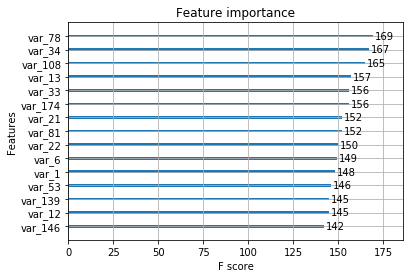

In [24]:
xgb.plot_importance(model, max_num_features = 15)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [28]:
X_train.shape

(200000,)

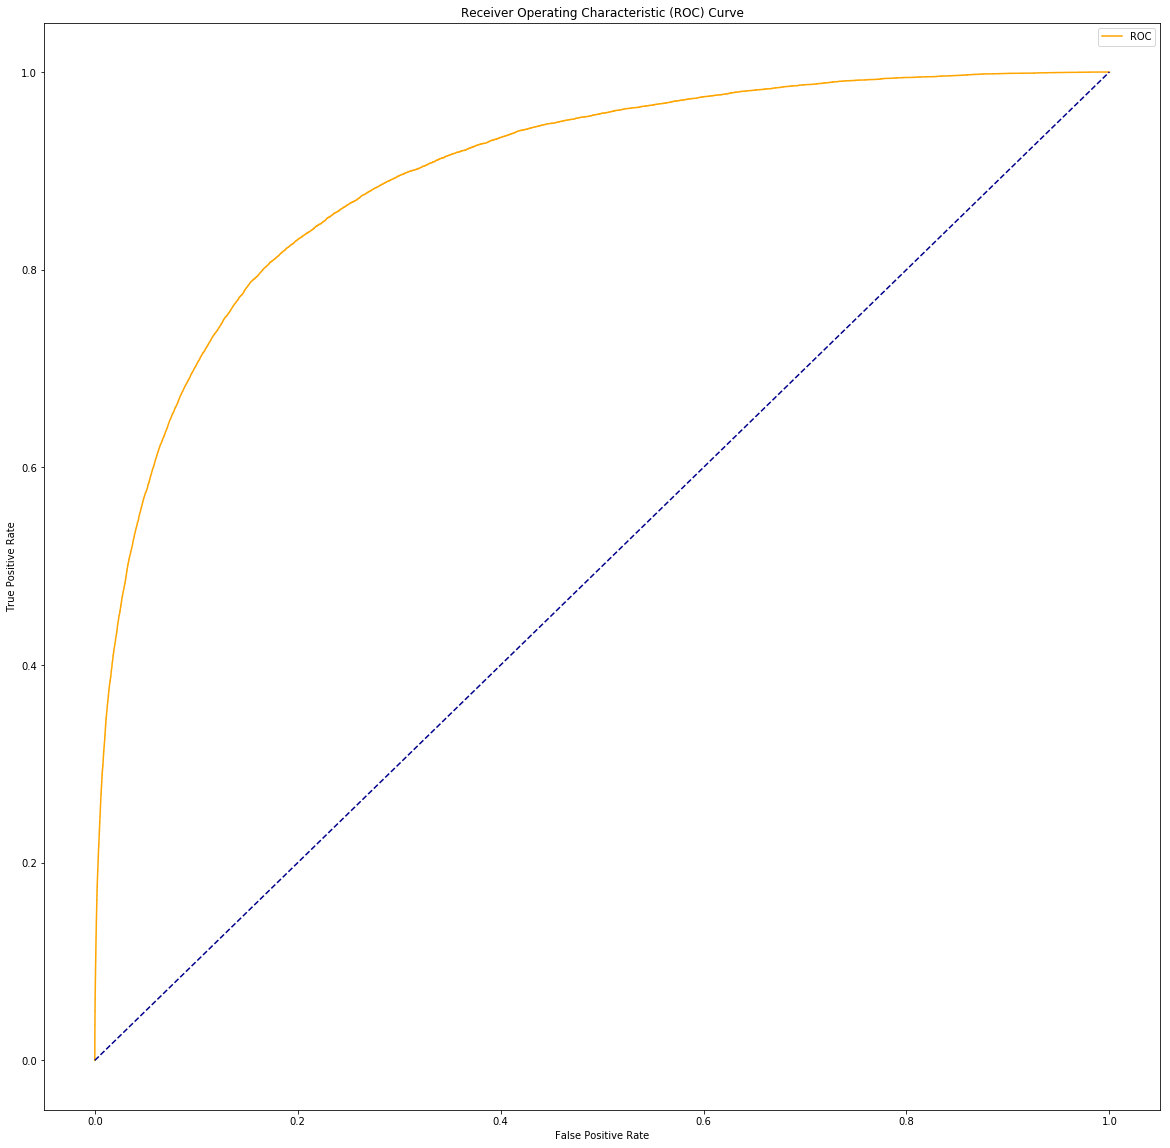

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, oof_xg)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [46]:
sub_df = pd.DataFrame({"ID_code":data_test["ID_code"].values})
sub_df["target"] = predictions_xg
sub_df.to_csv("xgboost_FE.csv", index=False)